## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import train_test
import friedman3Dataset
import network
import dataset
import matplotlib.pyplot as plt
import sanityChecks
import performanceMetrics
import torch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error 
import scrapbook as sb
from statistics import mean
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.tab_model import TabNetRegressor

## Dataset

In [3]:
#Dataset Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [4]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)

          X1           X2        X3        X4         Y
0  70.219241   944.775930  0.047845  2.120596  0.560370
1  31.904457  1247.567206  0.346817  5.601841  1.486814
2  71.595191   686.958705  0.994515  3.786999  1.312392
3  48.089534   616.522348  0.000774  6.809353  0.151498
4  82.392352   617.144224  0.078605  5.581187  0.385198


## Parameters 

In [5]:
n_epochs = 1000
batch_size = 32
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## GAN Model

**Training GAN for n_epochs number of epochs** 

In [6]:
generator = network.GeneratorTabnet(n_features+1).to(device)
discriminator = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.001, betas=(0.5, 0.999))

In [7]:
discLossG1,genLossG1 = train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,device)


tensor([[-0.5407],
        [ 0.3040],
        [-1.6435],
        [-1.2980],
        [-0.9313],
        [-0.5534],
        [-1.2240],
        [-0.0348],
        [-0.0202],
        [-2.1331],
        [-0.2528],
        [-0.0615],
        [ 0.0550],
        [-0.5547],
        [ 0.0900],
        [-0.4055],
        [-3.5176],
        [-0.1518],
        [-1.5890],
        [-0.1252],
        [ 0.1096],
        [-0.8359],
        [ 0.2378],
        [-0.6663],
        [-0.4085],
        [ 0.0859],
        [-0.6741],
        [ 0.6417],
        [ 0.4248],
        [-0.7168],
        [ 0.0525],
        [-2.2221]], grad_fn=<MmBackward>)
tensor([[-1.4214e+00],
        [ 3.7206e-01],
        [-8.9524e-01],
        [-8.1921e-01],
        [-1.0588e+00],
        [-2.4437e-01],
        [-1.1184e+00],
        [-3.4372e-01],
        [ 1.6613e-01],
        [-2.4679e+00],
        [-2.1535e-01],
        [ 3.1890e-02],
        [ 2.6936e-01],
        [-4.1025e-01],
        [ 7.3433e-04],
        [-8.9886e-01],
 

tensor([[ 0.1120],
        [ 1.1174],
        [ 0.4843],
        [-0.3865],
        [-0.2264],
        [-1.1019],
        [ 0.4388],
        [ 0.0675],
        [ 0.1106],
        [-0.1331],
        [-0.3129],
        [-1.6935],
        [-1.3042],
        [-1.6522],
        [-1.0477],
        [ 0.0729],
        [-0.6118],
        [ 0.0891],
        [-1.3250],
        [-0.5010],
        [-0.4095],
        [-1.1945],
        [-2.1128],
        [ 0.0532],
        [-1.0251],
        [-1.1101],
        [-0.6370],
        [ 0.1804],
        [-0.8336],
        [-0.1512],
        [-0.3337],
        [-0.1758]], grad_fn=<MmBackward>)
tensor([[-3.6416],
        [-1.0769],
        [-0.0130],
        [-0.7012],
        [ 0.5529],
        [-0.2707],
        [ 0.5225],
        [-0.0508],
        [-1.8928],
        [-0.2066],
        [ 0.0906],
        [ 0.1021],
        [ 0.3260],
        [-0.5299],
        [ 0.5440],
        [-0.6738],
        [-0.8379],
        [ 0.6430],
        [ 0.7847],
        

tensor([[-1.4207e-01],
        [ 5.8585e-01],
        [-2.9675e-01],
        [ 5.9089e-01],
        [-6.8963e-01],
        [-1.9906e-01],
        [-7.4038e-01],
        [ 1.6856e+00],
        [-2.3222e+00],
        [-1.0194e+00],
        [-9.4027e-02],
        [-4.3931e-01],
        [-1.3367e-01],
        [-5.8322e-01],
        [-1.8708e+00],
        [-1.6039e-03],
        [-8.1115e-01],
        [-5.4905e-01],
        [ 3.0381e-01],
        [ 3.6307e-01],
        [-2.2715e+00],
        [ 3.4527e-01],
        [-2.1850e+00],
        [-2.0685e-01],
        [ 3.6473e-01],
        [-1.4011e-01],
        [-1.5611e-01],
        [-9.7149e-01],
        [ 7.7421e-01],
        [-7.7955e-01],
        [ 8.5786e-01],
        [ 1.5898e-01]], grad_fn=<MmBackward>)
tensor([[-0.0132],
        [ 0.3415],
        [-0.3510],
        [ 0.0255],
        [-0.4732],
        [-0.2933],
        [-0.9962],
        [ 0.5536],
        [-0.6298],
        [-0.8266],
        [-0.1462],
        [-0.5566],
        [-0.2

tensor([[-0.1518],
        [-0.4434],
        [ 0.0764],
        [-0.7084],
        [-0.3234],
        [-0.8826],
        [ 0.1648],
        [ 0.5497],
        [ 0.1009],
        [-1.6582],
        [ 0.2019],
        [-0.2852],
        [-0.1595],
        [-1.0300],
        [ 0.5250],
        [ 0.1004],
        [ 0.4451],
        [-0.8440],
        [ 0.7087],
        [ 1.1446],
        [ 0.8679],
        [-2.1512],
        [-0.3058],
        [-1.2941],
        [ 1.0312],
        [ 0.2793],
        [-0.5365],
        [-0.0355],
        [-0.3106],
        [-0.4449],
        [-0.6637],
        [-0.3131]], grad_fn=<MmBackward>)
tensor([[ 0.2508],
        [-0.3667],
        [-0.2496],
        [-0.1756],
        [-1.5211],
        [-0.3736],
        [-0.3465],
        [-0.6350],
        [ 0.4131],
        [-0.0819],
        [ 0.8790],
        [-0.4083],
        [ 0.7253],
        [-1.3292],
        [-0.5359],
        [ 0.1602]], grad_fn=<MmBackward>)
tensor([[-0.0389],
        [-1.0929],
    

tensor([[ 0.0042],
        [-0.8986],
        [-0.8143],
        [ 0.0331],
        [ 0.1122],
        [-0.6805],
        [ 1.2715],
        [ 0.4344],
        [-0.4771],
        [-0.8594],
        [-0.0529],
        [ 0.4321],
        [-0.4950],
        [ 0.3633],
        [ 0.5573],
        [-0.6796]], grad_fn=<MmBackward>)
tensor([[ 0.3746],
        [-1.9839],
        [-0.7436],
        [ 0.1712],
        [-0.2627],
        [-0.9518],
        [ 0.6046],
        [ 0.3408],
        [ 0.8867],
        [-0.5657],
        [ 0.4459],
        [-0.5835],
        [-0.0408],
        [ 1.0310],
        [-0.1103],
        [-0.3993]], grad_fn=<MmBackward>)
tensor([[ 0.2226],
        [-2.6215],
        [ 0.3628],
        [-1.1593],
        [-0.0886],
        [-0.0814],
        [ 0.2323],
        [ 0.1556],
        [-0.3008],
        [ 1.5161],
        [ 0.2480],
        [ 0.9326],
        [ 0.3987],
        [ 0.8351],
        [ 0.2539],
        [ 0.5309],
        [ 0.0600],
        [-0.3942],
    

tensor([[-0.0626],
        [ 0.1389],
        [ 0.7839],
        [-0.0621],
        [-0.4471],
        [ 0.1182],
        [ 0.9861],
        [-0.5896],
        [ 0.5116],
        [ 0.9661],
        [-0.1097],
        [-1.4213],
        [-1.1702],
        [ 1.6196],
        [ 1.5060],
        [-2.1079]], grad_fn=<MmBackward>)
tensor([[ 0.6350],
        [-0.6199],
        [ 1.5207],
        [ 0.1031],
        [-0.3368],
        [ 0.1904],
        [-0.6135],
        [-0.1668],
        [-0.3388],
        [-1.4918],
        [ 0.8773],
        [-0.0701],
        [ 0.5045],
        [ 0.3012],
        [-0.5758],
        [-0.8585],
        [-0.0253],
        [ 0.0397],
        [ 0.4334],
        [ 0.2330],
        [ 1.0363],
        [ 0.5389],
        [ 0.2142],
        [-0.7821],
        [-0.4840],
        [-0.4338],
        [ 0.2190],
        [ 0.9474],
        [-0.2801],
        [ 0.1614],
        [ 2.8889],
        [-0.8329]], grad_fn=<MmBackward>)
tensor([[ 7.1412e-01],
        [ 9.9916e-0

tensor([[ 0.6212],
        [-1.3159],
        [ 0.5304],
        [-0.2875],
        [ 1.0340],
        [ 0.2606],
        [-0.2408],
        [ 0.3709],
        [-0.0968],
        [ 0.0512],
        [-0.6307],
        [ 0.3346],
        [-0.3051],
        [-0.0965],
        [ 0.6089],
        [-0.4157],
        [ 0.2350],
        [-0.4958],
        [ 1.3831],
        [ 0.5102],
        [ 1.7563],
        [ 0.2367],
        [-0.1708],
        [ 0.1171],
        [ 0.2795],
        [ 0.3173],
        [ 1.1448],
        [ 0.1140],
        [ 1.7951],
        [-1.3746],
        [ 0.4360],
        [ 0.0397]], grad_fn=<MmBackward>)
tensor([[-0.4980],
        [-1.4242],
        [ 0.5060],
        [-0.5759],
        [ 0.9191],
        [-1.5436],
        [-0.0090],
        [ 0.2295],
        [-0.1367],
        [ 0.0742],
        [-0.6964],
        [ 0.2566],
        [-0.0684],
        [ 1.5959],
        [ 0.6353],
        [-0.1612],
        [ 0.1771],
        [-0.7470],
        [ 1.5342],
        

tensor([[ 4.0334e-01],
        [ 2.8774e-01],
        [-5.3455e-02],
        [-5.2850e-01],
        [-3.1822e-01],
        [-1.9822e-01],
        [ 8.6246e-01],
        [ 2.8937e-01],
        [ 1.8311e-02],
        [-2.6745e-01],
        [-7.3592e-01],
        [ 1.6903e+00],
        [ 5.9151e-02],
        [-7.3143e-01],
        [-8.6939e-01],
        [ 4.3309e-04],
        [-1.1952e-02],
        [ 8.3095e-02],
        [ 5.2709e-01],
        [ 7.9804e-01],
        [-2.8772e-01],
        [ 2.5147e+00],
        [ 1.0220e-01],
        [-1.9111e-01],
        [ 1.4515e+00],
        [ 5.2819e-01],
        [-5.3695e-01],
        [ 1.3725e-01],
        [ 1.2326e+00],
        [ 1.1394e+00],
        [-9.9689e-02],
        [-5.0517e-01]], grad_fn=<MmBackward>)
tensor([[ 2.8841e+00],
        [-7.1450e-04],
        [ 1.7089e+00],
        [-9.8160e-01],
        [-1.1666e+00],
        [-6.0808e-01],
        [ 5.3989e-03],
        [ 3.7418e-02],
        [ 6.1251e-02],
        [ 3.0242e-01],
        [ 7

tensor([[ 2.4290],
        [-0.1822],
        [-0.2746],
        [ 1.0195],
        [ 1.2154],
        [ 0.6985],
        [-0.0900],
        [-0.4259],
        [-0.1736],
        [-0.0122],
        [ 0.5340],
        [-0.1928],
        [ 0.1631],
        [ 0.9995],
        [-1.3984],
        [ 0.0982],
        [ 0.9045],
        [-1.6476],
        [ 1.0936],
        [ 1.6448],
        [ 1.4114],
        [ 0.4081],
        [-0.8390],
        [ 0.1705],
        [ 0.2807],
        [ 0.2688],
        [-1.6696],
        [ 0.4819],
        [ 0.8873],
        [ 0.3249],
        [ 1.4937],
        [ 0.3458]], grad_fn=<MmBackward>)
tensor([[ 2.5406],
        [ 0.2126],
        [-1.0724],
        [ 1.0561],
        [ 0.9062],
        [ 1.5705],
        [-0.0996],
        [-0.3327],
        [-0.1593],
        [-0.0530],
        [ 0.2351],
        [ 0.0500],
        [ 0.1025],
        [ 0.8898],
        [-0.9769],
        [-0.0476],
        [ 0.5550],
        [-1.9279],
        [ 0.9488],
        

tensor([[ 1.3244],
        [ 0.0754],
        [-0.0318],
        [-0.0194],
        [ 1.2434],
        [ 1.3909],
        [-0.8574],
        [ 0.3312],
        [ 1.3261],
        [ 0.1190],
        [-0.1367],
        [-0.1496],
        [ 0.6331],
        [ 2.2912],
        [ 0.2713],
        [-0.4530],
        [-0.4315],
        [-0.5982],
        [-1.5634],
        [ 0.3349],
        [ 0.4018],
        [ 1.4550],
        [ 0.2362],
        [ 0.9458],
        [ 0.7325],
        [ 0.8366],
        [ 0.2114],
        [-0.2603],
        [ 0.1030],
        [ 0.4425],
        [ 0.2751],
        [ 1.5586]], grad_fn=<MmBackward>)
tensor([[ 0.6851],
        [ 0.4709],
        [-0.6208],
        [ 1.7556],
        [ 0.3077],
        [-1.7312],
        [ 0.8253],
        [-0.3198],
        [ 0.5152],
        [ 0.1011],
        [ 0.2300],
        [-0.1354],
        [-0.0522],
        [ 0.5645],
        [-0.1992],
        [ 0.0618]], grad_fn=<MmBackward>)
tensor([[ 7.4282e-01],
        [ 1.4576e+0

tensor([[-0.5961],
        [ 1.7146],
        [-0.6169],
        [ 0.4023],
        [ 0.0277],
        [ 0.3299],
        [ 0.6877],
        [ 1.4416],
        [-0.4874],
        [-0.0380],
        [ 1.5237],
        [ 0.0032],
        [ 0.0280],
        [-0.0962],
        [ 0.0259],
        [ 0.9372]], grad_fn=<MmBackward>)
tensor([[-0.2398],
        [ 0.9127],
        [ 0.2253],
        [ 0.0218],
        [ 0.0808],
        [ 0.4019],
        [-1.0218],
        [ 1.6410],
        [-1.1798],
        [ 0.2602],
        [ 0.8851],
        [ 0.5927],
        [ 0.1433],
        [-0.1187],
        [-0.1453],
        [ 1.4295]], grad_fn=<MmBackward>)
tensor([[ 1.5087e-02],
        [-1.3172e+00],
        [ 4.3875e-02],
        [ 1.1587e+00],
        [ 5.7532e-01],
        [-3.4635e-02],
        [ 6.5571e-01],
        [-9.9726e-01],
        [-1.0188e+00],
        [ 7.9249e-01],
        [ 4.2610e-01],
        [-9.1380e-01],
        [ 2.3751e+00],
        [ 5.8138e-01],
        [ 2.8944e-01],
 

tensor([[-0.4247],
        [ 0.4358],
        [ 0.0052],
        [ 0.8107],
        [-0.0546],
        [-0.0710],
        [ 0.9887],
        [ 0.7480],
        [ 0.1251],
        [-0.4393],
        [-0.5987],
        [ 1.4365],
        [ 0.8375],
        [ 0.7334],
        [-1.5094],
        [ 0.0457]], grad_fn=<MmBackward>)
tensor([[ 0.2122],
        [ 0.8205],
        [ 0.2609],
        [ 0.1594],
        [-0.1962],
        [-0.2289],
        [ 0.1775],
        [ 0.6773],
        [ 1.0085],
        [-0.3062],
        [-0.1944],
        [ 1.2088],
        [ 0.3856],
        [ 0.0635],
        [-1.6360],
        [-0.0753]], grad_fn=<MmBackward>)
tensor([[ 0.0341],
        [-0.1397],
        [ 0.0126],
        [ 1.1420],
        [-0.4895],
        [ 1.1950],
        [ 1.9245],
        [-0.2606],
        [ 0.9959],
        [-0.1993],
        [-0.0459],
        [-0.6884],
        [ 0.1208],
        [ 0.0953],
        [ 2.7842],
        [-0.1919],
        [-0.4636],
        [-0.3109],
    

tensor([[-0.2588],
        [-0.0131],
        [ 0.3697],
        [-0.0959],
        [ 0.0770],
        [-0.4956],
        [-0.1234],
        [ 0.3061],
        [ 0.3310],
        [-0.3822],
        [-0.4099],
        [-0.2116],
        [ 2.0586],
        [-0.4019],
        [ 1.2517],
        [ 0.1465]], grad_fn=<MmBackward>)
tensor([[-0.5632],
        [-0.0887],
        [ 0.3928],
        [ 0.3714],
        [ 0.8195],
        [ 0.0694],
        [ 0.1124],
        [-0.4113],
        [-0.1165],
        [ 0.1096],
        [-0.8527],
        [ 0.1348],
        [ 0.9842],
        [-0.2223],
        [-0.0649],
        [-0.5884],
        [-2.1970],
        [-1.0426],
        [ 0.8638],
        [-0.0028],
        [ 0.3161],
        [ 0.0117],
        [ 0.1116],
        [ 0.5153],
        [ 0.6263],
        [-0.0512],
        [ 0.0108],
        [ 0.2635],
        [ 0.0880],
        [-0.9488],
        [ 0.3104],
        [-0.1737]], grad_fn=<MmBackward>)
tensor([[-7.9892e-02],
        [ 2.1474e-0

tensor([[ 0.1320],
        [-0.9065],
        [ 1.1251],
        [-0.3312],
        [-0.0355],
        [-0.0462],
        [ 0.9451],
        [-0.2643],
        [ 0.7929],
        [ 0.2226],
        [-0.2025],
        [-0.2334],
        [-0.0323],
        [-0.3266],
        [-0.8086],
        [-0.3443],
        [ 0.0772],
        [ 0.0931],
        [ 0.2567],
        [-0.1556],
        [ 0.4145],
        [-0.0918],
        [ 0.1120],
        [-0.8515],
        [-0.3224],
        [ 0.0423],
        [ 0.1417],
        [ 0.0344],
        [-0.0713],
        [-0.4461],
        [ 1.8330],
        [ 0.3521]], grad_fn=<MmBackward>)
tensor([[ 0.6459],
        [ 0.4982],
        [ 0.2191],
        [-0.9507],
        [-0.1414],
        [-0.5386],
        [-0.2358],
        [-0.0790],
        [-0.0465],
        [-0.1673],
        [ 0.4534],
        [ 0.0464],
        [-0.0094],
        [ 0.7322],
        [-0.7627],
        [ 0.2979],
        [-0.1282],
        [ 0.7023],
        [ 0.2246],
        

tensor([[-0.7629],
        [ 0.1335],
        [ 0.5481],
        [ 0.0357],
        [ 0.0986],
        [ 2.1046],
        [-0.0971],
        [-0.4369],
        [-0.0579],
        [ 0.1364],
        [ 0.2738],
        [-0.0371],
        [ 0.4808],
        [ 0.3822],
        [-1.8193],
        [-2.0002],
        [ 0.0441],
        [-0.9809],
        [ 0.0949],
        [ 0.4159],
        [ 0.4707],
        [ 0.0573],
        [ 0.6887],
        [ 0.0039],
        [ 1.3148],
        [ 0.5207],
        [ 0.7278],
        [-0.7322],
        [-0.0022],
        [ 0.0529],
        [-0.4731],
        [-0.1422]], grad_fn=<MmBackward>)
tensor([[ 0.3473],
        [-0.0985],
        [ 0.1598],
        [-0.6575],
        [ 0.0275],
        [-0.3503],
        [ 0.1788],
        [ 1.0354],
        [ 0.4486],
        [ 0.5064],
        [ 0.1714],
        [ 0.1481],
        [-0.0586],
        [ 0.2284],
        [ 0.2527],
        [ 0.5368],
        [ 0.4258],
        [-2.9420],
        [-0.1480],
        

tensor([[ 0.3302],
        [ 0.0492],
        [-1.2309],
        [-0.2524],
        [ 0.1944],
        [ 0.1835],
        [-0.3132],
        [ 0.3471],
        [-0.3321],
        [ 0.0522],
        [ 0.5176],
        [-0.4885],
        [ 0.4345],
        [ 0.4772],
        [-0.1776],
        [ 0.0390],
        [-0.7655],
        [-0.3972],
        [ 1.4367],
        [ 0.4092],
        [ 0.0601],
        [-1.6040],
        [ 0.2337],
        [ 0.3735],
        [-0.2764],
        [-0.0425],
        [ 0.0387],
        [ 0.0514],
        [-0.6145],
        [ 0.6657],
        [ 0.1375],
        [-0.0972]], grad_fn=<MmBackward>)
tensor([[ 0.3520],
        [-0.5370],
        [-0.6584],
        [-0.6804],
        [ 0.1333],
        [-0.0473],
        [-0.0595],
        [ 0.8388],
        [ 0.0741],
        [ 0.4510],
        [ 0.5797],
        [-1.6474],
        [ 0.7774],
        [ 0.4729],
        [-1.4578],
        [ 0.9806],
        [-0.1358],
        [-1.2124],
        [ 0.7608],
        

tensor([[-1.2065],
        [-0.0354],
        [ 1.2887],
        [ 0.2206],
        [-0.1938],
        [ 0.6601],
        [-0.1941],
        [ 0.1914],
        [-0.2893],
        [-2.0229],
        [ 0.3427],
        [-1.1419],
        [-0.1075],
        [ 0.0164],
        [ 0.0465],
        [ 1.2887],
        [ 1.1582],
        [ 0.2798],
        [ 0.4286],
        [ 0.5653],
        [-0.4361],
        [-0.5342],
        [ 0.1606],
        [-0.5806],
        [ 0.1217],
        [-0.2713],
        [-0.0622],
        [ 0.0274],
        [-0.1045],
        [ 0.2226],
        [ 0.1315],
        [ 0.4509]], grad_fn=<MmBackward>)
tensor([[-0.3776],
        [-0.2505],
        [ 1.1572],
        [ 0.3720],
        [-0.2293],
        [ 0.4897],
        [-0.3706],
        [-0.1008],
        [ 0.3261],
        [-0.5857],
        [ 0.4845],
        [-0.7241],
        [ 0.0494],
        [ 0.2423],
        [ 0.0307],
        [ 0.1963],
        [-0.5933],
        [ 0.3886],
        [ 1.0750],
        

tensor([[ 0.1190],
        [ 0.0594],
        [-0.0300],
        [ 1.4382],
        [ 0.5400],
        [-0.4474],
        [ 0.5019],
        [-2.9854],
        [ 0.7145],
        [ 0.3450],
        [ 1.5908],
        [-0.9444],
        [ 1.1801],
        [ 0.3483],
        [ 0.7917],
        [-0.7979],
        [ 0.2424],
        [-0.2209],
        [ 0.5009],
        [-1.1353],
        [ 0.4772],
        [-0.8888],
        [ 0.1588],
        [ 0.2760],
        [-0.2530],
        [-0.4288],
        [ 0.1314],
        [ 0.5427],
        [ 0.3472],
        [-2.2545],
        [-0.0354],
        [ 0.4036]], grad_fn=<MmBackward>)
tensor([[ 0.0552],
        [-0.0444],
        [ 0.6160],
        [ 0.6226],
        [-1.1214],
        [ 0.1207],
        [ 0.9371],
        [-2.4163],
        [ 0.6361],
        [-0.5845],
        [-0.5493],
        [ 0.2882],
        [ 0.1240],
        [ 0.0505],
        [ 0.6277],
        [-0.5716]], grad_fn=<MmBackward>)
tensor([[ 0.8883],
        [ 0.6678],
    

tensor([[ 0.6206],
        [ 0.3192],
        [ 0.0759],
        [ 0.4925],
        [ 0.1651],
        [-1.6706],
        [-1.4123],
        [ 0.5616],
        [ 0.2025],
        [ 0.6911],
        [ 1.0711],
        [ 0.5363],
        [-1.2042],
        [ 1.8242],
        [ 0.3126],
        [ 0.3927]], grad_fn=<MmBackward>)
tensor([[ 0.4217],
        [ 0.6858],
        [-0.4553],
        [ 0.6893],
        [ 0.0806],
        [ 0.7139],
        [-0.6076],
        [ 0.6371],
        [ 0.3203],
        [ 0.2000],
        [ 0.8674],
        [ 0.4189],
        [-2.1305],
        [ 0.2241],
        [ 0.0784],
        [ 0.1341]], grad_fn=<MmBackward>)
tensor([[-0.1398],
        [-0.2628],
        [ 0.6839],
        [ 1.2281],
        [ 0.1682],
        [-0.9362],
        [-2.6047],
        [-0.2328],
        [ 0.4504],
        [ 0.5701],
        [ 0.6482],
        [ 0.3818],
        [ 0.3138],
        [ 0.3451],
        [ 1.2112],
        [-0.5142],
        [ 0.6647],
        [ 0.5626],
    

tensor([[-1.0451],
        [-0.8260],
        [ 0.8797],
        [ 0.6957],
        [ 0.5704],
        [ 0.9083],
        [ 0.2108],
        [ 0.4115],
        [-0.9091],
        [-0.4433],
        [ 1.0302],
        [ 0.4205],
        [ 0.6315],
        [-1.0943],
        [ 0.2134],
        [ 0.9844]], grad_fn=<MmBackward>)
tensor([[-0.2087],
        [ 0.0881],
        [ 0.4762],
        [ 0.2474],
        [ 0.1013],
        [ 0.3357],
        [ 0.3251],
        [ 0.8702],
        [ 0.6184],
        [-0.8365],
        [-0.2675],
        [ 0.4118],
        [ 1.5548],
        [ 0.4031],
        [ 0.1550],
        [ 0.2369],
        [ 1.0579],
        [ 0.1098],
        [-0.0597],
        [ 0.6222],
        [ 0.6532],
        [-0.1531],
        [ 0.0313],
        [-0.0665],
        [ 1.0429],
        [ 0.1489],
        [ 0.0239],
        [-3.9789],
        [-1.5595],
        [-0.4025],
        [ 0.7434],
        [ 1.1686]], grad_fn=<MmBackward>)
tensor([[ 0.3490],
        [ 0.1080],
    

tensor([[-0.8291],
        [-0.3964],
        [ 1.0025],
        [ 0.0657],
        [ 0.9873],
        [ 0.4417],
        [ 2.1647],
        [ 0.6467],
        [-2.0478],
        [ 0.3761],
        [-1.6026],
        [ 0.4035],
        [-0.3435],
        [ 0.0571],
        [ 0.6726],
        [ 0.9379],
        [-0.1208],
        [ 0.8495],
        [-0.6116],
        [ 0.0287],
        [ 0.3374],
        [ 0.3611],
        [-0.3472],
        [-0.7337],
        [ 0.0790],
        [ 0.1582],
        [ 0.3374],
        [ 1.4503],
        [-3.2383],
        [ 0.9714],
        [-0.1276],
        [ 0.8167]], grad_fn=<MmBackward>)
tensor([[-1.2890],
        [ 0.4581],
        [ 0.7054],
        [-0.1267],
        [ 1.6965],
        [ 0.5511],
        [ 0.9987],
        [ 0.6600],
        [-2.0306],
        [ 0.5326],
        [ 0.1373],
        [ 0.5906],
        [-0.8571],
        [ 0.1820],
        [ 0.6251],
        [ 1.4214],
        [-0.4110],
        [ 0.7556],
        [-0.7162],
        

tensor([[ 0.5631],
        [ 0.4996],
        [ 0.1653],
        [ 0.5714],
        [ 0.3999],
        [ 0.1359],
        [ 0.7431],
        [-2.8721],
        [-0.3597],
        [ 0.4761],
        [ 0.8996],
        [-0.9061],
        [ 0.1022],
        [ 0.4124],
        [ 0.2905],
        [-0.0291],
        [ 1.8682],
        [-0.2059],
        [ 0.6177],
        [ 0.8721],
        [-0.6712],
        [ 1.4240],
        [-2.3036],
        [ 0.8851],
        [-0.4979],
        [-0.2024],
        [ 0.5777],
        [-0.2363],
        [ 1.6120],
        [-0.7971],
        [ 0.6311],
        [-0.5277]], grad_fn=<MmBackward>)
tensor([[-0.0637],
        [ 0.4295],
        [-0.5927],
        [ 0.2746],
        [ 0.0916],
        [ 0.4246],
        [ 1.0387],
        [ 0.4335],
        [ 0.6118],
        [ 1.1907],
        [-0.7394],
        [-0.2674],
        [ 0.3317],
        [-0.0055],
        [ 0.0429],
        [-0.2456],
        [ 0.3242],
        [-0.4960],
        [ 0.7674],
        

tensor([[ 0.6738],
        [ 0.3338],
        [ 0.2789],
        [ 0.5436],
        [-1.1507],
        [-0.5565],
        [ 0.3452],
        [ 1.0878],
        [-0.5381],
        [ 0.4706],
        [ 0.7109],
        [ 0.3329],
        [ 0.3204],
        [-0.1391],
        [-0.8791],
        [ 0.6022],
        [ 0.7311],
        [ 0.4756],
        [ 0.3056],
        [-2.0744],
        [-0.0180],
        [-3.5500],
        [ 0.2080],
        [-0.5938],
        [ 0.8461],
        [-0.1819],
        [-0.5005],
        [ 1.1549],
        [ 0.1393],
        [-0.7565],
        [ 1.9623],
        [ 0.1114]], grad_fn=<MmBackward>)
tensor([[ 0.9038],
        [ 0.5468],
        [ 0.3784],
        [ 0.2265],
        [ 0.0070],
        [-0.4513],
        [ 0.4434],
        [ 1.4630],
        [-0.4947],
        [ 0.4069],
        [ 0.7255],
        [ 0.0946],
        [ 0.3538],
        [-0.3307],
        [-1.0350],
        [ 0.4236],
        [ 0.3662],
        [ 0.4670],
        [ 0.6299],
        

tensor([[-2.3623e-01],
        [-1.7164e-01],
        [ 4.4918e-01],
        [ 2.7829e-01],
        [-1.1812e+00],
        [-1.3411e+00],
        [ 1.4820e-01],
        [ 8.9261e-02],
        [ 5.9597e-01],
        [ 6.5189e-01],
        [ 5.1617e-01],
        [ 1.9703e-01],
        [-5.0175e-04],
        [ 1.0936e+00],
        [ 2.2257e-01],
        [ 7.5904e-01],
        [ 6.1929e-01],
        [-8.1745e-01],
        [ 8.9508e-01],
        [-8.8871e-01],
        [-1.6300e-01],
        [ 8.8374e-01],
        [ 1.3809e+00],
        [ 1.7769e-02],
        [-6.8114e-03],
        [ 2.8704e-01],
        [-1.7988e-01],
        [-4.4672e-01],
        [ 7.4741e-01],
        [-4.7028e-01],
        [-1.4026e+00],
        [-5.7991e-01]], grad_fn=<MmBackward>)
tensor([[ 1.2017],
        [ 0.7650],
        [ 0.5514],
        [ 0.3790],
        [-0.7122],
        [ 0.5049],
        [ 0.9105],
        [-0.7992],
        [ 0.9386],
        [-4.3634],
        [ 0.9973],
        [ 0.6679],
        [ 0.6

tensor([[ 0.6704],
        [-0.8675],
        [ 0.5233],
        [ 1.0853],
        [-2.2379],
        [ 0.3005],
        [-3.4869],
        [-0.2660],
        [ 0.5174],
        [ 0.0569],
        [-0.7012],
        [ 0.4509],
        [ 0.1183],
        [-0.1418],
        [ 0.4749],
        [ 0.5118]], grad_fn=<MmBackward>)
tensor([[ 0.7713],
        [-0.7427],
        [ 0.6173],
        [ 0.3679],
        [-2.5983],
        [ 0.1520],
        [-1.1062],
        [-0.3960],
        [ 0.3162],
        [ 0.4395],
        [-0.0348],
        [ 0.2151],
        [ 0.5152],
        [-0.2229],
        [ 0.2176],
        [ 0.0798]], grad_fn=<MmBackward>)
tensor([[-3.1135],
        [-1.2350],
        [-0.0575],
        [ 0.1087],
        [-0.3332],
        [ 0.2408],
        [ 0.3153],
        [-0.0553],
        [-0.7145],
        [ 0.0599],
        [ 0.9174],
        [ 1.0810],
        [-0.1939],
        [ 0.2923],
        [ 0.1064],
        [-1.5672],
        [-1.3917],
        [ 0.3396],
    

tensor([[ 0.0811],
        [ 1.0693],
        [ 0.3130],
        [-1.1734],
        [-0.4439],
        [ 0.8625],
        [ 1.1457],
        [ 0.3215],
        [-1.2547],
        [ 0.3524],
        [-0.4146],
        [ 0.6017],
        [ 0.1002],
        [-0.8176],
        [-1.3953],
        [-0.9093]], grad_fn=<MmBackward>)
tensor([[ 0.2045],
        [ 0.9504],
        [-0.9025],
        [-1.4644],
        [-0.8586],
        [ 0.6251],
        [ 1.0939],
        [ 0.4607],
        [ 0.0571],
        [ 0.5753],
        [-1.1445],
        [ 0.0971],
        [ 0.7500],
        [ 0.4284],
        [-1.4679],
        [-0.5164]], grad_fn=<MmBackward>)
tensor([[ 0.1228],
        [ 0.6697],
        [-0.3579],
        [-0.1785],
        [-0.1790],
        [ 1.2705],
        [ 0.6934],
        [ 0.2626],
        [ 0.2150],
        [-0.2595],
        [ 0.5814],
        [-0.6073],
        [ 0.6467],
        [-4.5917],
        [-1.4349],
        [-3.8985],
        [-0.1197],
        [-0.1793],
    

tensor([[ 0.9660],
        [ 0.3791],
        [ 0.3159],
        [-3.2609],
        [ 0.4575],
        [-0.1699],
        [-0.4361],
        [-1.9860],
        [-0.7893],
        [ 0.2202],
        [ 0.2457],
        [-0.6635],
        [ 0.7223],
        [ 0.2705],
        [ 0.8368],
        [ 1.1323]], grad_fn=<MmBackward>)
tensor([[ 0.6016],
        [ 0.7544],
        [-1.3239],
        [ 0.1952],
        [-0.7357],
        [ 0.2242],
        [ 0.1534],
        [ 0.1963],
        [ 0.4040],
        [-0.4181],
        [ 1.7804],
        [ 0.3447],
        [ 0.4005],
        [-0.2136],
        [ 0.4024],
        [ 0.3888],
        [ 0.5849],
        [ 0.9513],
        [ 0.4233],
        [ 0.3356],
        [-0.1047],
        [-0.0164],
        [ 1.0079],
        [ 0.3354],
        [-3.5652],
        [-4.7853],
        [ 0.8724],
        [-2.0418],
        [-0.2623],
        [-0.1076],
        [ 0.4570],
        [ 0.2172]], grad_fn=<MmBackward>)
tensor([[ 6.1844e-01],
        [ 5.2611e-0

tensor([[ 0.9649],
        [-0.2995],
        [-1.3329],
        [-0.5934],
        [-0.4816],
        [ 0.1144],
        [ 0.3582],
        [ 0.2539],
        [ 0.5775],
        [ 0.0374],
        [ 0.7870],
        [-1.5525],
        [-0.4449],
        [-0.0052],
        [ 0.2121],
        [ 0.6309],
        [-2.3672],
        [ 1.9108],
        [ 0.4778],
        [-1.2300],
        [-0.1414],
        [-3.6629],
        [ 0.3375],
        [ 0.4200],
        [ 0.0337],
        [ 0.4186],
        [ 0.8178],
        [ 0.4247],
        [ 0.4659],
        [ 0.7185],
        [-0.1086],
        [ 0.3174]], grad_fn=<MmBackward>)
tensor([[ 0.8877],
        [ 0.1010],
        [-3.7703],
        [-2.1777],
        [-0.1174],
        [-0.1404],
        [ 0.8356],
        [ 0.2281],
        [ 0.8104],
        [-0.3392],
        [ 0.5323],
        [-1.2185],
        [ 0.4399],
        [-0.7830],
        [ 0.0699],
        [ 0.9848],
        [-0.8564],
        [ 0.4738],
        [-1.2109],
        

tensor([[ 0.8608],
        [ 0.7047],
        [-0.4050],
        [-0.3851],
        [ 0.3860],
        [ 0.2319],
        [ 1.4881],
        [ 1.1044],
        [-4.1642],
        [ 0.0382],
        [ 0.2152],
        [ 0.4266],
        [ 1.0541],
        [ 0.5731],
        [ 0.2069],
        [-1.4180],
        [ 0.2893],
        [-0.3909],
        [-0.2353],
        [-0.0798],
        [ 1.1032],
        [-1.3850],
        [ 0.7670],
        [ 0.8434],
        [-0.1281],
        [-3.1954],
        [ 0.3670],
        [ 0.7877],
        [ 0.2377],
        [ 0.7143],
        [ 0.5441],
        [ 0.4049]], grad_fn=<MmBackward>)
tensor([[ 1.1835e-01],
        [-2.7328e-03],
        [-2.4190e-01],
        [ 5.6939e-01],
        [ 3.9569e-01],
        [ 2.5966e-01],
        [-7.5905e-03],
        [ 7.3548e-01],
        [ 1.0852e-01],
        [ 9.7907e-01],
        [ 1.2904e-01],
        [-5.4748e-01],
        [ 1.4039e-01],
        [ 1.0967e+00],
        [ 1.3899e-01],
        [ 5.9392e-01],
 

tensor([[ 0.2976],
        [-1.5339],
        [ 1.2628],
        [ 0.9650],
        [-1.3661],
        [ 0.0601],
        [-0.1321],
        [ 0.1281],
        [-0.6012],
        [-1.3448],
        [ 0.2964],
        [ 0.4989],
        [ 0.9063],
        [ 0.0749],
        [ 0.2805],
        [ 0.2202],
        [ 0.8138],
        [ 0.0653],
        [ 1.0194],
        [-1.0978],
        [ 0.2437],
        [ 0.4610],
        [ 0.0309],
        [-0.8858],
        [ 0.6625],
        [ 0.2370],
        [-0.7506],
        [-0.3236],
        [ 0.8794],
        [ 0.6502],
        [ 0.0041],
        [ 0.0993]], grad_fn=<MmBackward>)
tensor([[ 0.0342],
        [-5.3029],
        [ 1.4040],
        [ 0.7447],
        [-2.4524],
        [-0.0871],
        [-0.2630],
        [ 0.3452],
        [-0.2941],
        [-1.3539],
        [ 0.6178],
        [ 0.1432],
        [ 0.5874],
        [ 0.3269],
        [ 0.0822],
        [ 0.7598],
        [ 0.4507],
        [ 0.0942],
        [ 0.7767],
        

tensor([[-0.4982],
        [-0.0865],
        [ 0.7890],
        [ 0.3523],
        [ 0.2000],
        [-2.0028],
        [ 0.6006],
        [ 0.1997],
        [ 0.2091],
        [-2.2110],
        [ 0.2832],
        [-0.4026],
        [-0.9187],
        [ 0.5042],
        [ 0.1501],
        [ 0.4709],
        [ 0.4536],
        [ 0.4066],
        [ 0.4216],
        [ 0.6682],
        [ 0.6649],
        [-0.4533],
        [ 0.4092],
        [ 0.1167],
        [-4.3722],
        [ 1.0385],
        [ 0.7254],
        [ 0.7772],
        [ 0.3779],
        [ 0.8913],
        [ 0.0349],
        [ 0.9821]], grad_fn=<MmBackward>)
tensor([[-0.2803],
        [-0.7448],
        [ 0.6384],
        [ 0.2207],
        [ 0.1085],
        [-0.7878],
        [-0.1003],
        [ 0.0817],
        [ 0.3155],
        [-1.5963],
        [ 0.5449],
        [ 0.1206],
        [-1.5347],
        [ 0.1632],
        [ 0.4933],
        [ 0.4927],
        [ 0.3380],
        [-0.2146],
        [ 0.4228],
        

tensor([[-4.3774e-01],
        [ 2.6615e-01],
        [-8.1043e-01],
        [-3.8459e-03],
        [-2.3609e-01],
        [-7.1779e-01],
        [ 1.6651e-01],
        [-2.2777e+00],
        [ 5.2758e-01],
        [ 7.3047e-01],
        [ 5.9599e-01],
        [-4.0766e-01],
        [ 3.8701e-01],
        [ 6.2323e-01],
        [ 4.3945e-01],
        [ 6.2812e-03],
        [ 4.1610e-01],
        [ 1.0387e+00],
        [-9.9716e-03],
        [ 3.1212e-01],
        [-4.3175e+00],
        [ 6.9582e-01],
        [ 3.2126e-01],
        [ 4.2059e-01],
        [-9.5026e-01],
        [ 3.9029e-01],
        [ 8.2162e-01],
        [ 4.7449e-01],
        [-5.4160e-01],
        [ 1.9598e-01],
        [ 5.8088e-01],
        [-4.9841e-01]], grad_fn=<MmBackward>)
tensor([[ 0.8836],
        [ 0.3410],
        [ 0.4866],
        [-0.4895],
        [-2.3387],
        [ 0.1396],
        [ 0.5025],
        [ 0.3486],
        [-3.3790],
        [-0.5241],
        [-0.0655],
        [ 0.5427],
        [ 1.0

tensor([[-0.3799],
        [ 0.0613],
        [ 0.2555],
        [ 0.6820],
        [ 0.0052],
        [-0.0402],
        [ 0.9482],
        [ 0.7479],
        [-0.1065],
        [ 0.6624],
        [ 0.8630],
        [-0.0427],
        [-3.1444],
        [-1.4255],
        [-0.5223],
        [ 0.3320]], grad_fn=<MmBackward>)
tensor([[ 1.1186],
        [ 0.4795],
        [-0.7630],
        [-0.2476],
        [-0.0977],
        [-1.9209],
        [ 0.7852],
        [ 0.4457],
        [ 0.3480],
        [ 0.2855],
        [ 1.0288],
        [ 0.0431],
        [-0.2027],
        [-2.2875],
        [-0.2693],
        [ 0.5587]], grad_fn=<MmBackward>)
tensor([[ 0.4861],
        [ 0.1649],
        [ 0.1669],
        [-1.5377],
        [ 0.2713],
        [-0.0386],
        [-0.2785],
        [ 0.1344],
        [ 0.2621],
        [-3.9086],
        [ 0.5398],
        [ 0.6220],
        [ 1.1069],
        [ 0.6515],
        [ 0.3215],
        [ 0.4534],
        [ 0.5988],
        [-1.4665],
    

tensor([[-4.1903],
        [-0.8589],
        [ 0.8487],
        [ 0.4238],
        [ 0.3142],
        [ 0.8443],
        [ 0.2604],
        [-1.4693],
        [ 0.0701],
        [ 0.6228],
        [ 0.3927],
        [ 0.7735],
        [ 0.9165],
        [-0.2950],
        [ 1.1978],
        [ 0.3692]], grad_fn=<MmBackward>)
tensor([[ 0.8722],
        [-1.0290],
        [ 0.6210],
        [-0.7278],
        [ 0.1115],
        [-0.2058],
        [ 0.7453],
        [-2.6460],
        [-0.0147],
        [ 0.9812],
        [-1.7187],
        [ 0.0305],
        [ 0.0381],
        [ 0.3878],
        [ 0.1511],
        [ 0.3501],
        [ 0.0271],
        [-0.7710],
        [ 0.4097],
        [-0.2218],
        [ 0.9180],
        [-0.2270],
        [ 0.6126],
        [ 0.3038],
        [ 0.7487],
        [-0.7978],
        [ 0.5772],
        [ 0.3887],
        [ 0.2659],
        [ 0.4276],
        [ 0.4835],
        [ 0.2560]], grad_fn=<MmBackward>)
tensor([[-0.4496],
        [-0.3773],
    

tensor([[ 0.9505],
        [ 0.3752],
        [-0.5798],
        [ 0.1143],
        [-0.5238],
        [ 0.3373],
        [ 0.7138],
        [-2.6007],
        [ 0.7134],
        [ 0.4260],
        [ 0.1334],
        [ 0.6547],
        [-0.0430],
        [ 0.3452],
        [ 0.4427],
        [-0.2381]], grad_fn=<MmBackward>)
tensor([[ 0.2346],
        [-0.0990],
        [ 0.0398],
        [ 0.3907],
        [-0.3285],
        [-0.5777],
        [-0.0319],
        [-1.1489],
        [ 0.6079],
        [ 1.1816],
        [-0.0741],
        [-0.0069],
        [-0.2366],
        [ 0.3309],
        [ 0.2130],
        [-0.1113],
        [ 0.4628],
        [-0.7362],
        [ 0.3937],
        [ 0.4139],
        [-0.6895],
        [-0.3517],
        [-0.8586],
        [-0.0318],
        [ 0.5468],
        [ 0.1581],
        [-1.4925],
        [ 0.5884],
        [-0.1354],
        [ 0.7913],
        [ 0.5806],
        [-0.0268]], grad_fn=<MmBackward>)
tensor([[ 0.1655],
        [ 0.2084],
    

tensor([[-1.3169],
        [-0.2311],
        [-1.0186],
        [ 0.4276],
        [ 0.9073],
        [-0.0812],
        [ 0.1654],
        [ 0.6371],
        [ 0.5149],
        [-0.4704],
        [-0.8391],
        [-0.4759],
        [ 0.5536],
        [ 0.5658],
        [ 0.6973],
        [ 0.0881]], grad_fn=<MmBackward>)
tensor([[-1.7553],
        [-0.3933],
        [-0.2821],
        [ 0.3909],
        [ 0.3348],
        [ 0.1379],
        [ 0.4763],
        [-0.8730],
        [ 1.0775],
        [ 0.7329],
        [ 0.0853],
        [-0.0511],
        [ 0.4035],
        [ 0.4482],
        [ 0.5280],
        [ 0.1933],
        [-0.0222],
        [ 0.4010],
        [ 0.3560],
        [ 0.2443],
        [ 0.3382],
        [-1.2768],
        [ 0.5254],
        [ 1.0100],
        [ 0.6423],
        [ 0.6020],
        [ 0.5652],
        [-0.0393],
        [ 0.0110],
        [-0.0761],
        [-0.5792],
        [-5.0600]], grad_fn=<MmBackward>)
tensor([[-1.8643],
        [-0.1630],
    

tensor([[ 0.4160],
        [-0.6777],
        [-0.0099],
        [ 0.2224],
        [ 0.2742],
        [-2.1229],
        [ 0.3567],
        [ 0.6627],
        [ 0.5951],
        [ 0.8201],
        [-0.9943],
        [ 0.0969],
        [ 0.1178],
        [-5.7350],
        [ 0.7234],
        [ 0.7740],
        [ 0.3356],
        [ 0.4789],
        [ 0.2977],
        [ 0.5042],
        [-0.4981],
        [ 0.1537],
        [ 0.3062],
        [ 0.5580],
        [ 0.2210],
        [-0.0717],
        [-1.1360],
        [-0.2266],
        [ 0.0256],
        [ 0.3600],
        [ 0.5824],
        [ 0.5063]], grad_fn=<MmBackward>)
tensor([[ 0.4426],
        [ 0.3376],
        [ 0.0111],
        [ 0.3183],
        [ 0.5149],
        [ 0.1942],
        [ 0.3609],
        [ 0.5555],
        [ 0.6685],
        [ 0.7085],
        [-2.1584],
        [ 0.7172],
        [ 0.1694],
        [-5.0827],
        [ 0.5344],
        [ 0.0924],
        [ 0.3316],
        [-1.8977],
        [ 0.2949],
        

tensor([[ 0.7696],
        [ 0.1697],
        [ 0.2059],
        [ 1.0086],
        [-0.7687],
        [ 0.8870],
        [ 0.2096],
        [-0.2639],
        [ 1.3149],
        [-0.9506],
        [ 0.3274],
        [ 0.8494],
        [ 0.3663],
        [ 0.2540],
        [ 0.4546],
        [ 0.7654],
        [ 0.0425],
        [ 0.2381],
        [ 0.2874],
        [-0.7303],
        [ 0.2370],
        [ 0.7317],
        [-1.2897],
        [ 0.2187],
        [-0.4519],
        [ 0.8059],
        [-1.5289],
        [ 0.0481],
        [ 0.4912],
        [-4.8061],
        [ 0.6840],
        [ 0.8022]], grad_fn=<MmBackward>)
tensor([[ 0.3185],
        [ 0.2705],
        [ 0.5651],
        [ 0.2251],
        [ 0.3363],
        [ 0.1630],
        [ 0.9927],
        [ 0.7141],
        [ 0.3505],
        [ 0.0832],
        [ 0.2802],
        [ 0.6444],
        [ 0.6012],
        [-0.1796],
        [ 0.4668],
        [ 0.0319],
        [-0.6766],
        [-0.5230],
        [ 0.4600],
        

tensor([[ 2.6393e-01],
        [ 9.0788e-01],
        [ 3.2073e-01],
        [-2.6315e-01],
        [-1.8542e+00],
        [ 5.4420e-01],
        [ 5.0011e-01],
        [ 1.7770e-01],
        [ 1.7375e-01],
        [ 4.6570e-01],
        [ 1.9537e-02],
        [-1.0321e+00],
        [ 6.0226e-01],
        [-4.8573e-01],
        [ 5.0579e-01],
        [ 3.2626e-01],
        [-2.9125e+00],
        [ 5.4415e-01],
        [ 1.7202e-01],
        [ 6.3478e-01],
        [-1.2038e+00],
        [-7.5204e-01],
        [ 5.5370e-04],
        [ 3.4684e-01],
        [-3.7264e-02],
        [ 1.0118e+00],
        [ 7.0754e-01],
        [ 6.2208e-01],
        [ 2.3020e-01],
        [ 2.0008e-01],
        [-7.5568e-01],
        [ 1.1387e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1758],
        [ 0.4173],
        [ 0.2905],
        [-0.1150],
        [-1.9220],
        [ 0.6030],
        [ 0.7240],
        [ 0.1996],
        [ 0.1618],
        [ 0.6819],
        [-0.2844],
        [-1.2101],
        [ 0.8

tensor([[ 0.9049],
        [-3.1351],
        [ 0.7045],
        [-0.1349],
        [ 0.5426],
        [ 0.2278],
        [-4.0289],
        [ 0.8524],
        [ 0.0380],
        [-0.2897],
        [ 0.6659],
        [ 0.7569],
        [-0.2010],
        [ 0.2574],
        [ 0.1037],
        [ 0.6423],
        [ 0.1314],
        [-0.0685],
        [-0.6513],
        [-0.5756],
        [ 0.2411],
        [ 1.1377],
        [ 0.7033],
        [ 0.6112],
        [-0.3539],
        [ 0.2098],
        [ 0.4002],
        [ 0.5823],
        [-0.7701],
        [ 0.2886],
        [ 0.5886],
        [-1.2887]], grad_fn=<MmBackward>)
tensor([[ 0.8314],
        [ 0.0613],
        [ 0.5038],
        [ 0.6132],
        [ 0.0322],
        [-0.3953],
        [-0.4523],
        [ 0.5734],
        [ 0.1259],
        [-0.7029],
        [-0.0263],
        [-0.3628],
        [ 0.6427],
        [-3.7946],
        [-0.2138],
        [ 0.0178]], grad_fn=<MmBackward>)
tensor([[ 0.7709],
        [ 1.1493],
    

tensor([[-7.4744e-05],
        [ 9.2882e-01],
        [ 4.6308e-01],
        [ 3.1262e-01],
        [-2.9787e-01],
        [ 8.0487e-01],
        [ 4.0522e-01],
        [ 5.3089e-02],
        [ 1.3500e-01],
        [ 4.7261e-01],
        [ 2.3955e-01],
        [ 5.0177e-01],
        [ 4.3596e-02],
        [ 8.4189e-01],
        [-4.4311e+00],
        [ 7.8005e-01],
        [-1.7438e-01],
        [ 1.1142e-01],
        [ 3.3730e-01],
        [-1.4238e-01],
        [ 3.6473e-01],
        [ 1.2748e-01],
        [ 9.8575e-01],
        [-7.0245e-02],
        [ 3.0052e-01],
        [ 4.5506e-01],
        [-5.0366e-01],
        [ 4.7967e-01],
        [ 4.8867e-01],
        [-1.2606e+00],
        [ 1.5966e-01],
        [ 2.7024e-01]], grad_fn=<MmBackward>)
tensor([[-0.6926],
        [-0.3309],
        [ 0.7177],
        [ 0.2585],
        [ 0.7585],
        [ 0.1081],
        [-4.0927],
        [ 0.2031],
        [ 0.9303],
        [ 0.5579],
        [ 0.5884],
        [-0.0052],
        [-0.2

tensor([[-0.2260],
        [ 0.5914],
        [-0.5849],
        [ 0.4614],
        [ 0.5841],
        [ 0.0116],
        [-0.2165],
        [ 0.3352],
        [ 0.3823],
        [-0.1844],
        [ 0.4429],
        [ 0.3026],
        [ 0.1260],
        [-0.6287],
        [-0.5841],
        [ 0.6123]], grad_fn=<MmBackward>)
tensor([[ 0.3013],
        [ 0.6706],
        [-0.8596],
        [ 0.7779],
        [ 0.7930],
        [ 0.1721],
        [ 0.0788],
        [-0.2565],
        [ 0.4357],
        [-0.5896],
        [ 0.3090],
        [ 0.4197],
        [-0.3397],
        [ 0.2303],
        [-0.0772],
        [ 0.3685]], grad_fn=<MmBackward>)
tensor([[-1.9248],
        [ 0.8723],
        [ 0.9858],
        [ 0.1920],
        [ 0.5903],
        [ 0.7956],
        [ 0.7418],
        [-0.1152],
        [ 0.3834],
        [ 0.2953],
        [ 0.2356],
        [ 0.7741],
        [ 0.8545],
        [ 0.6870],
        [ 0.6034],
        [ 0.9357],
        [-0.1454],
        [-0.2237],
    

tensor([[ 0.3906],
        [ 0.5014],
        [ 0.8738],
        [ 0.5066],
        [-0.1416],
        [-0.1291],
        [-1.0751],
        [-0.2042],
        [ 0.1040],
        [-0.7740],
        [ 0.8675],
        [ 0.4672],
        [-0.7856],
        [ 0.6417],
        [ 0.1586],
        [-0.3613]], grad_fn=<MmBackward>)
tensor([[-1.2452],
        [ 0.0728],
        [ 0.4745],
        [ 0.0065],
        [-0.0378],
        [-0.1770],
        [-0.0424],
        [ 0.6552],
        [ 0.7223],
        [ 0.0531],
        [ 0.7877],
        [ 0.5445],
        [ 0.4503],
        [ 0.1806],
        [ 0.1573],
        [ 0.2188],
        [ 0.3573],
        [ 0.1226],
        [ 0.0291],
        [ 0.0443],
        [ 0.5773],
        [ 0.5209],
        [-0.2357],
        [ 0.1653],
        [ 0.9254],
        [ 0.3040],
        [-0.2897],
        [ 0.5349],
        [-0.5483],
        [-0.3398],
        [-4.0080],
        [ 0.8515]], grad_fn=<MmBackward>)
tensor([[-0.7045],
        [-0.0953],
    

tensor([[ 0.5064],
        [-0.7910],
        [ 0.6426],
        [-0.5131],
        [ 0.0310],
        [ 0.8799],
        [ 0.0682],
        [ 0.1404],
        [ 0.4626],
        [ 0.3811],
        [ 0.1558],
        [-0.2664],
        [-0.0936],
        [-0.5695],
        [ 0.5965],
        [-0.0240]], grad_fn=<MmBackward>)
tensor([[-2.1127],
        [ 0.5593],
        [-0.7751],
        [-0.6905],
        [ 0.7085],
        [-0.1268],
        [ 0.5622],
        [ 0.0859],
        [ 0.8579],
        [ 0.5627],
        [ 0.5638],
        [ 0.9676],
        [-0.5811],
        [ 0.4322],
        [ 0.7075],
        [ 0.1991],
        [ 0.8999],
        [ 0.1571],
        [-2.2666],
        [ 0.5656],
        [ 0.5648],
        [ 0.1452],
        [-0.1612],
        [ 0.1863],
        [ 0.7799],
        [-1.2811],
        [ 0.6249],
        [ 0.6439],
        [-2.2739],
        [ 0.4635],
        [ 0.6372],
        [ 0.0906]], grad_fn=<MmBackward>)
tensor([[-8.6686e-01],
        [ 4.7340e-0


tensor([[ 0.6053],
        [ 0.7051],
        [ 0.1295],
        [ 0.5410],
        [ 0.1646],
        [-0.7772],
        [-0.1402],
        [ 0.3929],
        [ 0.5910],
        [ 0.0231],
        [ 0.3312],
        [ 0.3328],
        [-0.2320],
        [-2.4186],
        [-0.3693],
        [-0.7639]], grad_fn=<MmBackward>)
tensor([[ 0.1854],
        [ 0.1718],
        [ 0.6513],
        [ 0.2786],
        [ 0.2528],
        [ 0.6990],
        [-0.3759],
        [ 0.9634],
        [ 0.0058],
        [ 0.1578],
        [ 0.9943],
        [-0.2534],
        [ 0.5893],
        [ 0.4222],
        [ 0.5398],
        [ 0.0189],
        [-0.2427],
        [ 0.3428],
        [-0.9250],
        [ 0.5325],
        [ 0.4205],
        [ 0.3338],
        [ 0.2486],
        [ 0.5633],
        [ 0.0888],
        [ 0.2353],
        [ 0.2365],
        [ 0.1178],
        [-2.8201],
        [-3.9933],
        [-0.4024],
        [ 0.8227]], grad_fn=<MmBackward>)
tensor([[ 0.2350],
        [ 0.2072],
   

tensor([[ 0.7400],
        [-0.2533],
        [ 0.1756],
        [ 0.8006],
        [ 0.5898],
        [ 0.4620],
        [ 0.0994],
        [-2.9028],
        [-0.4388],
        [ 0.6270],
        [-0.0754],
        [ 0.3144],
        [ 0.2857],
        [ 0.4528],
        [ 0.5259],
        [-0.5561],
        [-0.2358],
        [-0.1886],
        [-2.5791],
        [ 0.3684],
        [ 0.6541],
        [ 0.7075],
        [ 0.4906],
        [ 0.5421],
        [ 0.7221],
        [-0.4439],
        [-0.0324],
        [-0.7077],
        [-0.7811],
        [-0.7055],
        [ 0.6353],
        [ 0.1868]], grad_fn=<MmBackward>)
tensor([[ 0.7884],
        [-0.1446],
        [ 0.3627],
        [ 0.9449],
        [ 0.5578],
        [ 0.0868],
        [-0.6065],
        [-3.0908],
        [ 0.4158],
        [ 0.5883],
        [ 0.2905],
        [ 0.1490],
        [ 0.8033],
        [ 0.4153],
        [ 0.4299],
        [-1.1032],
        [-0.1491],
        [-0.0630],
        [-4.1677],
        

tensor([[-0.6569],
        [ 0.2254],
        [ 0.6016],
        [ 0.5398],
        [-0.7453],
        [ 0.5498],
        [-0.1148],
        [-0.1382],
        [ 0.3384],
        [ 0.5091],
        [ 0.1968],
        [ 0.4355],
        [-0.1999],
        [-0.4808],
        [ 0.5580],
        [ 1.1409]], grad_fn=<MmBackward>)
tensor([[-1.6480],
        [-0.3624],
        [ 0.6846],
        [ 0.1220],
        [-3.1167],
        [ 0.3857],
        [-0.7069],
        [ 0.2387],
        [-0.5349],
        [-0.1158],
        [ 0.3684],
        [-0.2608],
        [ 0.5023],
        [ 0.2739],
        [-0.5073],
        [ 0.6223],
        [ 0.7139],
        [-0.2921],
        [ 0.3848],
        [-0.5867],
        [ 0.6331],
        [-1.9013],
        [ 0.4887],
        [ 0.4883],
        [-0.0115],
        [ 0.0876],
        [ 0.6348],
        [ 0.3423],
        [ 1.7421],
        [-0.4564],
        [ 1.1551],
        [ 0.6651]], grad_fn=<MmBackward>)
tensor([[-2.4791],
        [ 0.0173],
    

tensor([[ 0.8325],
        [-0.0613],
        [-0.3744],
        [-0.4014],
        [ 0.1096],
        [ 0.3540],
        [ 1.1848],
        [-0.8254],
        [-0.7154],
        [ 0.4347],
        [ 0.5142],
        [-0.9054],
        [ 0.2449],
        [-0.1022],
        [ 0.4061],
        [ 0.4416]], grad_fn=<MmBackward>)
tensor([[ 0.6356],
        [ 0.0977],
        [ 0.0554],
        [-0.3044],
        [-0.5806],
        [ 0.2511],
        [ 0.6838],
        [-4.0249],
        [-3.3878],
        [-0.3070],
        [ 0.6284],
        [ 0.3866],
        [ 0.6580],
        [ 0.8498],
        [-0.0459],
        [-0.7010],
        [ 1.3927],
        [ 0.2810],
        [ 0.7880],
        [ 0.5044],
        [ 0.8609],
        [ 0.0246],
        [ 0.3075],
        [ 0.2887],
        [-0.1227],
        [ 1.0993],
        [ 0.6028],
        [ 0.2096],
        [ 0.5704],
        [ 0.7309],
        [-0.8758],
        [-0.0166]], grad_fn=<MmBackward>)
tensor([[ 0.5406],
        [-0.0112],
    

tensor([[-0.4169],
        [ 0.4305],
        [ 0.2731],
        [ 0.0485],
        [-0.0125],
        [-0.1662],
        [ 0.3566],
        [ 0.1639],
        [ 1.4364],
        [ 0.0114],
        [ 0.1527],
        [-2.1823],
        [-0.4817],
        [ 0.7991],
        [ 0.0777],
        [ 0.4485]], grad_fn=<MmBackward>)
tensor([[ 0.3661],
        [ 0.9539],
        [-0.1079],
        [ 0.2690],
        [ 0.2783],
        [ 0.1144],
        [ 0.2196],
        [-0.6652],
        [ 0.6944],
        [ 0.3619],
        [ 0.7565],
        [ 0.3453],
        [ 0.6099],
        [ 0.7812],
        [ 0.3577],
        [ 0.1024],
        [ 0.5901],
        [ 0.2203],
        [ 0.4767],
        [-0.8832],
        [-0.2702],
        [ 0.7459],
        [-0.7389],
        [-3.4467],
        [-1.0254],
        [ 0.8153],
        [ 0.1776],
        [-2.5043],
        [ 0.3974],
        [ 0.4350],
        [ 0.3318],
        [ 0.4369]], grad_fn=<MmBackward>)
tensor([[ 0.4417],
        [-1.0964],
    

tensor([[ 0.4423],
        [ 0.6918],
        [ 0.9383],
        [ 0.2978],
        [ 0.2415],
        [-0.2005],
        [ 0.4604],
        [ 0.4706],
        [ 0.3135],
        [-1.8744],
        [ 0.3780],
        [ 0.2758],
        [ 0.8527],
        [-0.4668],
        [ 0.6831],
        [ 0.5997]], grad_fn=<MmBackward>)
tensor([[-1.8246e-01],
        [ 7.3744e-02],
        [ 7.6083e-01],
        [ 6.3290e-01],
        [-7.8824e-04],
        [ 1.1968e+00],
        [ 3.5051e-01],
        [ 6.2359e-01],
        [ 7.1226e-01],
        [-1.9080e+00],
        [ 1.5740e-01],
        [ 6.1306e-01],
        [-5.0772e-01],
        [ 5.7908e-01],
        [ 4.5361e-01],
        [ 2.3615e-01],
        [ 8.2736e-03],
        [ 1.9169e-01],
        [ 5.9915e-01],
        [-5.0302e-01],
        [-2.4121e+00],
        [-1.7800e+00],
        [ 2.2888e-01],
        [-1.3417e+00],
        [ 2.8311e-01],
        [-1.0557e+00],
        [ 8.4398e-01],
        [-6.0688e-01],
        [ 1.9242e-01],
      

tensor([[ 0.8885],
        [ 0.5567],
        [ 0.2770],
        [-1.3383],
        [ 0.2597],
        [-1.3608],
        [ 0.4686],
        [-0.2249],
        [-0.6793],
        [ 0.4623],
        [-0.5952],
        [-0.2653],
        [ 1.0598],
        [ 0.5307],
        [ 0.4133],
        [ 0.3677]], grad_fn=<MmBackward>)
tensor([[-0.1752],
        [ 0.2533],
        [ 0.5732],
        [ 0.1241],
        [-0.1226],
        [-0.2301],
        [ 0.3346],
        [ 0.2508],
        [ 0.2396],
        [ 0.4952],
        [ 0.8485],
        [-0.4939],
        [ 0.3316],
        [ 0.0660],
        [ 0.5250],
        [-1.5266],
        [-0.1278],
        [-0.7741],
        [ 0.3061],
        [ 0.0501],
        [ 0.0809],
        [ 0.7371],
        [ 0.7291],
        [-2.5921],
        [ 0.5725],
        [ 0.4254],
        [ 0.2808],
        [ 0.7409],
        [ 0.3918],
        [ 0.6794],
        [ 0.3463],
        [-2.4956]], grad_fn=<MmBackward>)
tensor([[-0.1815],
        [ 0.2178],
    

tensor([[ 0.3145],
        [ 1.0675],
        [-0.7220],
        [-0.1891],
        [ 0.7967],
        [-0.5093],
        [ 0.1194],
        [-0.0773],
        [-1.0443],
        [ 0.0898],
        [-0.7240],
        [ 0.5749],
        [ 0.3690],
        [ 0.6211],
        [ 0.6481],
        [-1.3503]], grad_fn=<MmBackward>)
tensor([[ 0.4969],
        [ 0.1297],
        [ 0.2102],
        [ 0.0462],
        [-5.9498],
        [ 0.1779],
        [ 0.4035],
        [ 0.1510],
        [-0.1246],
        [ 0.0514],
        [-0.5854],
        [ 0.6390],
        [ 0.7008],
        [ 0.3589],
        [ 0.0263],
        [ 0.0477],
        [ 0.6357],
        [-1.0573],
        [ 0.4506],
        [ 0.9745],
        [ 0.4866],
        [ 0.7502],
        [ 0.2352],
        [-0.6506],
        [ 0.6800],
        [ 0.1441],
        [ 0.0831],
        [-0.9368],
        [ 0.7075],
        [-2.3231],
        [ 0.2782],
        [ 0.2877]], grad_fn=<MmBackward>)
tensor([[ 0.3411],
        [-0.9139],
    

tensor([[-5.4457],
        [ 0.2866],
        [ 0.3614],
        [ 0.6201],
        [-0.8452],
        [ 0.7793],
        [ 0.8805],
        [-1.2903],
        [ 0.3923],
        [ 0.6220],
        [ 0.3597],
        [-0.1350],
        [-0.7048],
        [ 0.5521],
        [ 0.1704],
        [ 0.3008],
        [-0.3856],
        [ 0.1531],
        [ 0.6431],
        [-0.6981],
        [-0.3330],
        [ 0.1428],
        [ 0.8080],
        [ 0.6392],
        [-1.1879],
        [-0.2019],
        [ 0.1422],
        [ 0.3156],
        [ 0.4959],
        [ 0.2310],
        [ 1.2799],
        [ 0.0766]], grad_fn=<MmBackward>)
tensor([[-5.2437],
        [ 0.2207],
        [ 0.3664],
        [ 0.6274],
        [-0.2290],
        [ 0.8237],
        [ 1.2944],
        [-3.7656],
        [ 0.1876],
        [ 0.4733],
        [ 0.3408],
        [-0.0570],
        [-0.8565],
        [ 0.5256],
        [ 0.1032],
        [ 0.2916],
        [-0.6073],
        [ 0.1106],
        [ 0.7579],
        

tensor([[ 0.5895],
        [-0.1032],
        [ 0.0457],
        [ 0.5206],
        [ 0.1042],
        [ 0.4178],
        [-0.6852],
        [ 0.7417],
        [ 0.8793],
        [ 0.3980],
        [ 0.3916],
        [ 0.8482],
        [ 0.3222],
        [-0.4301],
        [ 0.7520],
        [ 0.5954],
        [ 0.6226],
        [ 0.9663],
        [ 0.6065],
        [-2.3010],
        [ 0.2632],
        [-0.3961],
        [ 0.2061],
        [ 0.9084],
        [-0.4802],
        [ 0.4262],
        [-1.5998],
        [ 0.4434],
        [ 0.0903],
        [-0.2947],
        [ 0.0350],
        [-5.1742]], grad_fn=<MmBackward>)
tensor([[-0.3673],
        [ 0.4196],
        [-4.6553],
        [ 0.1682],
        [-0.0409],
        [-0.1701],
        [-0.6523],
        [-0.6033],
        [ 0.4586],
        [ 0.4196],
        [-0.1753],
        [ 0.8743],
        [-0.4611],
        [-0.2974],
        [ 0.4310],
        [ 0.3800],
        [ 0.8399],
        [ 0.3083],
        [ 0.1442],
        

tensor([[ 0.1951],
        [ 0.8376],
        [-0.4481],
        [ 0.4349],
        [-1.8320],
        [ 0.5578],
        [ 1.1425],
        [ 0.0740],
        [-0.0476],
        [-0.1218],
        [ 0.0586],
        [ 0.8218],
        [ 0.3239],
        [-0.4560],
        [ 0.5085],
        [ 0.5595],
        [-2.2447],
        [ 0.5879],
        [ 0.0698],
        [ 0.7102],
        [ 0.5623],
        [ 0.4356],
        [-0.3625],
        [ 0.6348],
        [ 0.3341],
        [-1.8500],
        [ 0.0994],
        [ 0.7940],
        [ 0.1155],
        [ 0.1193],
        [-5.1186],
        [ 0.4534]], grad_fn=<MmBackward>)
tensor([[ 0.1980],
        [ 0.1359],
        [ 0.5535],
        [ 0.7858],
        [ 0.0092],
        [ 0.6034],
        [ 0.2743],
        [ 0.6006],
        [ 0.8433],
        [-0.3435],
        [ 0.1248],
        [ 0.2454],
        [-0.1285],
        [-0.4198],
        [-0.9167],
        [ 0.1798],
        [ 0.5348],
        [ 1.1977],
        [ 0.4085],
        

tensor([[-0.6728],
        [-0.2534],
        [ 0.4187],
        [ 0.5300],
        [ 0.1647],
        [-0.2301],
        [-0.0963],
        [-0.3431],
        [ 0.9919],
        [ 0.4506],
        [ 0.5178],
        [-2.9032],
        [ 0.2770],
        [-1.2394],
        [ 0.7192],
        [ 0.2476],
        [-0.4659],
        [ 0.2696],
        [ 0.0671],
        [ 0.2974],
        [-1.4678],
        [ 0.2203],
        [-0.0179],
        [ 0.7612],
        [ 0.1480],
        [ 0.5746],
        [ 0.4875],
        [ 0.6096],
        [-1.6118],
        [ 0.3045],
        [ 0.3824],
        [ 0.3913]], grad_fn=<MmBackward>)
tensor([[ 0.4676],
        [ 0.8173],
        [ 0.1765],
        [ 0.8385],
        [-0.2891],
        [ 0.2188],
        [ 0.2626],
        [ 0.4622],
        [-0.5575],
        [-0.5277],
        [ 0.5459],
        [ 0.3676],
        [ 0.5139],
        [ 0.5668],
        [-2.4932],
        [-1.9370],
        [ 0.7162],
        [-3.3464],
        [ 0.1524],
        

tensor([[ 1.6934e-01],
        [ 1.1153e-01],
        [ 6.1703e-01],
        [ 6.4917e-01],
        [ 2.4095e-01],
        [ 8.4339e-01],
        [ 5.9669e-01],
        [-2.3441e+00],
        [-1.9869e+00],
        [ 5.8693e-01],
        [ 1.1357e+00],
        [ 2.3416e-01],
        [ 2.5229e-01],
        [ 6.0465e-01],
        [-2.7188e+00],
        [ 5.0837e-01],
        [ 3.1412e-01],
        [-3.2951e-01],
        [ 9.5670e-01],
        [-2.7200e-01],
        [ 6.4521e-01],
        [-1.7263e+00],
        [ 2.2092e-01],
        [ 4.8723e-01],
        [ 9.4048e-01],
        [ 1.1390e+00],
        [ 2.0607e-03],
        [ 4.6109e-01],
        [ 3.1262e-01],
        [-1.7890e-01],
        [ 2.3532e-01],
        [-1.2173e+00]], grad_fn=<MmBackward>)
tensor([[-0.3020],
        [ 0.7765],
        [ 0.1964],
        [ 0.5190],
        [-0.7908],
        [ 0.6375],
        [ 0.4889],
        [-0.4082],
        [-0.5229],
        [-3.4459],
        [ 0.3154],
        [-0.8737],
        [-1.4

tensor([[-4.6554],
        [ 0.2255],
        [ 0.0380],
        [ 0.5959],
        [-0.9624],
        [ 0.5824],
        [-0.8037],
        [ 0.2877],
        [-0.1279],
        [ 1.1029],
        [ 0.1212],
        [-0.6496],
        [ 0.3230],
        [ 0.6014],
        [-1.0951],
        [ 0.5049],
        [-0.4768],
        [ 1.0380],
        [-1.9624],
        [ 0.2723],
        [ 0.2306],
        [-0.7723],
        [ 1.1215],
        [ 0.3869],
        [-0.1799],
        [-0.0676],
        [ 0.8520],
        [ 0.2445],
        [ 0.6129],
        [ 0.2303],
        [ 0.6717],
        [ 0.1417]], grad_fn=<MmBackward>)
tensor([[-0.1537],
        [-0.6404],
        [ 0.2985],
        [ 0.5344],
        [ 0.4574],
        [ 0.0361],
        [ 0.2303],
        [ 0.2711],
        [ 0.2293],
        [ 0.1552],
        [-2.1990],
        [-0.7720],
        [ 0.4707],
        [-0.0143],
        [ 1.5012],
        [ 0.4599],
        [-2.1552],
        [ 0.6723],
        [ 0.1586],
        

tensor([[-0.1945],
        [-0.4509],
        [ 0.0926],
        [ 1.2261],
        [ 1.3166],
        [ 0.3392],
        [ 0.3950],
        [ 0.4809],
        [ 0.5164],
        [ 0.2948],
        [-1.5233],
        [ 0.1037],
        [ 0.1005],
        [ 0.0851],
        [ 0.5533],
        [ 0.1403],
        [-0.3280],
        [ 0.8855],
        [ 0.8640],
        [-0.5586],
        [ 0.1086],
        [ 0.0346],
        [-0.3118],
        [-0.4362],
        [ 0.9485],
        [-1.2938],
        [ 0.5097],
        [ 0.3595],
        [ 0.0487],
        [-1.4229],
        [ 0.5089],
        [ 0.3794]], grad_fn=<MmBackward>)
tensor([[ 0.4594],
        [-0.8129],
        [ 0.1193],
        [ 0.7064],
        [ 1.1538],
        [ 0.4663],
        [ 0.4049],
        [ 0.5739],
        [ 0.5517],
        [ 0.2411],
        [-1.3640],
        [ 0.3703],
        [ 0.9786],
        [-0.6272],
        [-0.0771],
        [ 0.0814],
        [-0.5792],
        [ 0.5087],
        [ 0.6722],
        

tensor([[ 0.4839],
        [-0.2693],
        [ 0.2648],
        [ 0.3638],
        [ 0.4214],
        [ 0.2144],
        [ 0.6209],
        [ 0.2239],
        [-0.4703],
        [-0.8568],
        [ 1.2079],
        [ 0.2375],
        [-2.9265],
        [ 0.0302],
        [ 0.5542],
        [ 0.5142]], grad_fn=<MmBackward>)
tensor([[ 8.7391e-02],
        [-1.0097e+00],
        [ 9.7735e-01],
        [ 3.6818e-01],
        [-2.8334e-01],
        [ 2.3016e-01],
        [-1.9476e+00],
        [ 4.4845e-01],
        [ 4.6813e-01],
        [ 1.1736e+00],
        [ 4.4505e-01],
        [-3.3671e+00],
        [ 1.1358e+00],
        [ 1.6473e-01],
        [ 2.1681e-04],
        [ 4.8553e-01],
        [ 5.0401e-01],
        [ 3.1950e-01],
        [-4.5175e-01],
        [-2.1209e+00],
        [ 5.6180e-01],
        [ 9.2015e-01],
        [-9.6961e-01],
        [ 5.1842e-02],
        [ 6.4548e-01],
        [ 7.1149e-01],
        [-6.8394e-01],
        [ 3.4886e-01],
        [ 5.0462e-01],
      

tensor([[-0.1031],
        [ 0.4028],
        [ 0.0656],
        [ 0.0941],
        [ 0.1707],
        [ 0.5768],
        [ 0.3551],
        [-0.5100],
        [-1.4343],
        [-0.1856],
        [ 0.4136],
        [ 0.2157],
        [ 0.4527],
        [-0.3106],
        [ 0.4067],
        [-0.6116]], grad_fn=<MmBackward>)
tensor([[-0.0400],
        [-0.3456],
        [-0.2287],
        [ 0.5884],
        [ 0.0419],
        [ 0.8035],
        [ 0.6852],
        [-0.9974],
        [-0.3486],
        [-0.5221],
        [ 0.5153],
        [ 0.3319],
        [ 0.5586],
        [-0.2202],
        [ 0.8623],
        [ 0.0873]], grad_fn=<MmBackward>)
tensor([[ 0.0654],
        [ 0.4683],
        [ 0.0090],
        [ 0.6787],
        [ 0.2357],
        [-0.4246],
        [ 0.7300],
        [ 0.1602],
        [ 0.2840],
        [ 0.1408],
        [-3.5269],
        [-0.1652],
        [-2.3295],
        [ 0.4637],
        [ 0.8817],
        [ 0.0928],
        [ 0.4339],
        [ 0.2485],
    

tensor([[ 0.3853],
        [ 0.4274],
        [ 0.5467],
        [ 0.5780],
        [ 0.4278],
        [ 0.5260],
        [-0.5625],
        [ 0.3477],
        [-0.0488],
        [-2.6867],
        [ 0.3646],
        [ 0.3141],
        [-1.4317],
        [-0.2874],
        [ 0.1691],
        [ 0.3147]], grad_fn=<MmBackward>)
tensor([[ 0.2338],
        [ 0.3926],
        [ 0.5226],
        [ 0.3303],
        [ 0.5324],
        [ 0.7278],
        [-0.2813],
        [ 0.2443],
        [-0.8215],
        [-2.3893],
        [ 0.4236],
        [ 0.3328],
        [-0.4412],
        [-0.4000],
        [-0.3358],
        [ 0.7434]], grad_fn=<MmBackward>)
tensor([[ 5.4483e-01],
        [-1.3918e-03],
        [-5.2796e-01],
        [-1.2794e-01],
        [ 7.8159e-01],
        [ 4.6114e-01],
        [ 5.4173e-01],
        [ 3.3964e-01],
        [ 1.6239e-01],
        [ 3.4483e-01],
        [-4.5666e-01],
        [-9.1826e-01],
        [-2.9071e+00],
        [ 4.9142e-01],
        [ 5.4482e-01],
 

tensor([[ 0.8275],
        [-0.6256],
        [ 0.2610],
        [ 0.3568],
        [ 0.8446],
        [ 0.8092],
        [-1.8938],
        [ 0.2477],
        [-0.6358],
        [ 0.2705],
        [ 0.6806],
        [ 0.5292],
        [ 0.4206],
        [ 0.1206],
        [-2.8207],
        [ 0.1132],
        [ 0.8414],
        [-2.3081],
        [ 0.2034],
        [ 0.6417],
        [ 0.4740],
        [ 0.4582],
        [-0.1848],
        [-1.1942],
        [ 0.1074],
        [-0.4946],
        [-0.6274],
        [ 0.5924],
        [ 0.0613],
        [-0.5874],
        [ 0.4268],
        [ 0.6872]], grad_fn=<MmBackward>)
tensor([[-3.0504e-01],
        [ 1.1005e+00],
        [ 2.5060e-01],
        [-1.7748e-02],
        [ 5.5123e-01],
        [-8.2777e-01],
        [ 4.4965e-01],
        [ 4.9813e-01],
        [ 4.9292e-01],
        [-3.9220e-02],
        [-4.1934e-01],
        [-2.1668e+00],
        [ 6.0620e-01],
        [ 5.7604e-01],
        [ 5.8953e-01],
        [ 3.6590e-01],
 

tensor([[ 0.9012],
        [ 0.1401],
        [ 0.9061],
        [ 0.3936],
        [ 0.1048],
        [ 0.3608],
        [ 0.5966],
        [ 0.1683],
        [-1.9015],
        [-0.8571],
        [-0.1841],
        [-1.2887],
        [ 0.4111],
        [ 0.1898],
        [ 0.0254],
        [ 0.3292]], grad_fn=<MmBackward>)
tensor([[ 0.1724],
        [ 1.0196],
        [-2.4744],
        [ 1.1459],
        [ 0.2600],
        [ 0.1668],
        [-0.4261],
        [ 0.7040],
        [ 0.1938],
        [-0.6874],
        [ 0.1882],
        [-0.0050],
        [-0.5177],
        [ 0.6572],
        [-1.0410],
        [ 0.4383],
        [ 0.3958],
        [ 0.3031],
        [-1.3956],
        [ 0.5926],
        [ 0.4194],
        [ 0.7087],
        [-3.0010],
        [ 0.6662],
        [-0.1841],
        [ 0.5397],
        [ 0.7233],
        [ 0.6437],
        [-0.1315],
        [ 0.3978],
        [ 0.1102],
        [ 0.5451]], grad_fn=<MmBackward>)
tensor([[ 0.3148],
        [ 0.9495],
    

tensor([[-0.1972],
        [-0.9667],
        [ 0.6136],
        [ 0.5462],
        [ 0.3295],
        [ 0.5835],
        [ 0.3712],
        [-0.1001],
        [ 0.2617],
        [ 0.3279],
        [ 0.1589],
        [-0.5709],
        [ 0.8435],
        [ 0.5882],
        [-0.0567],
        [-2.0115]], grad_fn=<MmBackward>)
tensor([[-0.1404],
        [-0.9945],
        [ 0.8882],
        [ 0.4910],
        [-0.6236],
        [ 0.6953],
        [ 0.9016],
        [-0.0832],
        [-0.5432],
        [-0.1226],
        [ 0.4533],
        [-0.7605],
        [ 0.7894],
        [ 1.1072],
        [ 0.5381],
        [-2.0334]], grad_fn=<MmBackward>)
tensor([[ 6.5039e-01],
        [-1.4259e+00],
        [ 3.3663e-04],
        [ 1.1109e+00],
        [ 6.5876e-01],
        [ 2.1283e-01],
        [-2.0814e+00],
        [ 1.2012e+00],
        [ 8.0706e-01],
        [ 2.4322e-01],
        [ 1.8029e-01],
        [ 7.1770e-02],
        [ 7.8624e-01],
        [ 4.1835e-01],
        [-2.9130e+00],
 

tensor([[-0.5266],
        [ 0.7789],
        [ 0.5267],
        [ 0.5923],
        [-0.5966],
        [ 0.5273],
        [ 0.3660],
        [ 0.2767],
        [ 0.3209],
        [-4.1945],
        [-1.5920],
        [-0.0354],
        [ 0.4499],
        [ 0.1001],
        [ 0.6366],
        [ 0.3117]], grad_fn=<MmBackward>)
tensor([[-0.4461],
        [ 0.8154],
        [ 0.7129],
        [ 1.2865],
        [-0.3666],
        [ 0.7111],
        [ 0.1784],
        [ 0.9038],
        [ 0.2697],
        [-1.9668],
        [-0.7418],
        [ 0.3581],
        [ 0.5774],
        [ 0.1913],
        [-0.5209],
        [ 0.7122]], grad_fn=<MmBackward>)
tensor([[ 0.7547],
        [-1.6475],
        [ 0.5061],
        [ 0.6085],
        [ 0.7785],
        [-0.0424],
        [ 0.5153],
        [ 0.4552],
        [-0.3433],
        [ 0.8240],
        [-0.2676],
        [ 0.0813],
        [ 0.6288],
        [ 0.2232],
        [-0.8826],
        [ 0.4875],
        [ 1.0670],
        [ 0.1871],
    

tensor([[-0.1424],
        [ 0.2877],
        [-0.7289],
        [ 0.9238],
        [ 0.4983],
        [ 0.4624],
        [ 0.2330],
        [-0.0603],
        [-0.6825],
        [ 0.2757],
        [-0.6911],
        [-0.2187],
        [ 0.2139],
        [ 0.1561],
        [ 0.0817],
        [ 0.5134],
        [ 0.2687],
        [ 0.4816],
        [ 0.4573],
        [-3.2872],
        [-0.3948],
        [-0.1056],
        [ 0.3787],
        [ 0.1725],
        [ 0.7653],
        [ 1.0428],
        [ 0.1638],
        [-1.3705],
        [-0.3439],
        [ 0.1857],
        [ 0.4239],
        [-0.1587]], grad_fn=<MmBackward>)
tensor([[ 0.6405],
        [ 0.7061],
        [ 0.2443],
        [-0.9926],
        [-0.1102],
        [-0.5410],
        [-1.3137],
        [ 0.2682],
        [-0.2193],
        [ 0.4324],
        [ 0.3323],
        [ 0.2619],
        [ 0.6290],
        [-0.1836],
        [ 0.4613],
        [ 0.4477]], grad_fn=<MmBackward>)
tensor([[ 0.9861],
        [ 0.6732],
    

tensor([[ 0.0929],
        [ 0.6092],
        [ 0.9557],
        [ 0.3650],
        [ 0.2702],
        [-1.2073],
        [ 0.4179],
        [-0.2899],
        [ 0.1027],
        [ 0.0593],
        [-1.0053],
        [ 0.6170],
        [ 0.3377],
        [ 0.0357],
        [ 0.1395],
        [-2.6486],
        [-0.9819],
        [ 0.1852],
        [ 0.3889],
        [-0.0252],
        [ 0.0689],
        [ 0.4247],
        [ 0.5319],
        [ 0.2829],
        [ 0.6444],
        [-0.3112],
        [-0.7733],
        [-0.9728],
        [ 0.5122],
        [ 0.2060],
        [ 0.5973],
        [ 0.3942]], grad_fn=<MmBackward>)
tensor([[-1.8430],
        [ 0.3968],
        [-0.1708],
        [-1.9977],
        [ 0.3387],
        [ 0.4701],
        [ 0.2166],
        [-0.1278],
        [ 0.3445],
        [-0.5794],
        [-0.2920],
        [ 0.7710],
        [ 0.3173],
        [ 1.0140],
        [ 1.0362],
        [ 0.4956]], grad_fn=<MmBackward>)
tensor([[-1.1769],
        [-0.0309],
    

tensor([[ 0.5867],
        [-0.1386],
        [ 0.1112],
        [ 0.6338],
        [ 0.4408],
        [ 0.4273],
        [ 0.3713],
        [ 0.2141],
        [-0.1451],
        [ 0.2872],
        [ 0.1943],
        [ 0.3264],
        [-1.4337],
        [ 0.1312],
        [-0.0275],
        [ 0.2669],
        [ 0.4109],
        [ 0.1354],
        [-2.1621],
        [ 1.2173],
        [-0.0732],
        [ 0.2819],
        [-0.3669],
        [-2.3220],
        [ 0.2088],
        [-0.2466],
        [ 0.5343],
        [ 0.7241],
        [ 0.6731],
        [-0.6393],
        [ 0.4949],
        [ 0.2779]], grad_fn=<MmBackward>)
tensor([[-0.1396],
        [ 0.5680],
        [ 0.2928],
        [ 0.3504],
        [ 0.5077],
        [-0.2819],
        [-0.2210],
        [ 0.4421],
        [ 1.4170],
        [-2.1208],
        [ 0.2570],
        [ 0.4363],
        [ 0.3478],
        [ 0.1324],
        [-2.1424],
        [ 0.6295]], grad_fn=<MmBackward>)
tensor([[ 0.5666],
        [ 0.6472],
    

tensor([[ 0.4334],
        [ 0.1999],
        [-1.7347],
        [ 0.3977],
        [ 0.7965],
        [-0.7289],
        [ 0.3988],
        [ 1.0662],
        [-0.1623],
        [ 0.3267],
        [ 0.2714],
        [ 0.1990],
        [ 0.1435],
        [ 0.3151],
        [-1.6508],
        [ 0.6667],
        [ 0.4271],
        [ 0.3720],
        [ 0.1957],
        [-0.0547],
        [-1.6583],
        [ 1.3320],
        [ 0.0946],
        [ 0.8123],
        [ 0.7361],
        [ 0.4642],
        [-4.3029],
        [ 0.4881],
        [-0.0300],
        [ 1.1298],
        [ 0.2755],
        [ 0.4266]], grad_fn=<MmBackward>)
tensor([[-1.3100],
        [ 0.4162],
        [ 0.1166],
        [-1.5913],
        [ 0.2201],
        [-0.1235],
        [ 0.7383],
        [ 0.4409],
        [ 0.2147],
        [ 0.4865],
        [ 0.3659],
        [ 0.2298],
        [-0.0296],
        [ 0.4657],
        [ 0.5820],
        [ 0.0586]], grad_fn=<MmBackward>)
tensor([[-0.0479],
        [ 0.9698],
    

tensor([[ 0.2320],
        [ 0.4499],
        [ 0.4076],
        [-0.0578],
        [ 0.7036],
        [ 0.4329],
        [-0.4884],
        [ 0.1769],
        [-1.9584],
        [-0.2934],
        [-1.4637],
        [ 0.2369],
        [ 0.3954],
        [ 0.8925],
        [ 0.1931],
        [ 0.6582]], grad_fn=<MmBackward>)
tensor([[ 0.4602],
        [ 0.2775],
        [-0.3134],
        [-0.2267],
        [ 0.2769],
        [ 0.6412],
        [-0.4097],
        [ 0.0686],
        [-1.8144],
        [-0.0774],
        [-0.4656],
        [ 0.3458],
        [ 0.0795],
        [ 0.5392],
        [ 0.4206],
        [ 0.7949]], grad_fn=<MmBackward>)
tensor([[-0.3948],
        [ 0.2779],
        [-4.1093],
        [-1.6496],
        [ 0.4758],
        [ 0.2535],
        [ 1.2896],
        [ 0.4596],
        [-0.4572],
        [ 0.3020],
        [ 0.2905],
        [-0.1221],
        [ 0.3095],
        [ 0.5084],
        [-0.4072],
        [-0.6587],
        [ 0.3421],
        [ 1.0420],
    

tensor([[ 0.0967],
        [-0.4160],
        [ 0.0941],
        [ 0.0319],
        [ 0.4898],
        [ 0.5588],
        [ 0.1531],
        [ 0.0666],
        [ 0.8217],
        [-0.9191],
        [-0.4964],
        [ 0.7865],
        [ 0.0971],
        [-0.7728],
        [-1.3064],
        [ 0.0990]], grad_fn=<MmBackward>)
tensor([[ 0.1240],
        [ 0.4745],
        [ 0.2279],
        [ 0.1730],
        [-0.2940],
        [ 0.2232],
        [ 0.6775],
        [ 0.9838],
        [-0.3705],
        [-2.1669],
        [ 0.3042],
        [-1.7250],
        [ 0.2570],
        [-0.0238],
        [ 0.6715],
        [-1.8957],
        [ 0.0980],
        [-4.0507],
        [ 0.2951],
        [ 0.1454],
        [ 0.4583],
        [ 0.3949],
        [ 0.5923],
        [ 1.0607],
        [ 0.5841],
        [ 0.0746],
        [-0.0737],
        [ 0.2657],
        [ 0.3432],
        [ 0.9018],
        [ 0.9445],
        [-0.3601]], grad_fn=<MmBackward>)
tensor([[ 0.0347],
        [ 0.4820],
    

tensor([[ 0.1401],
        [ 0.8415],
        [-2.1774],
        [ 0.1774],
        [-1.2415],
        [-1.6100],
        [ 0.6244],
        [ 0.8219],
        [-0.6957],
        [ 0.1706],
        [ 0.5024],
        [-0.4830],
        [ 0.0403],
        [ 0.5721],
        [ 0.0072],
        [-0.1408],
        [-1.1952],
        [-0.1000],
        [-0.1569],
        [ 0.6259],
        [-0.1083],
        [ 0.4757],
        [ 0.1152],
        [ 0.5070],
        [ 0.7310],
        [-0.4966],
        [ 0.2683],
        [ 0.4090],
        [ 0.2808],
        [ 0.7309],
        [ 0.5540],
        [-1.3470]], grad_fn=<MmBackward>)
tensor([[ 0.1432],
        [ 0.3860],
        [-2.0492],
        [ 0.3405],
        [-2.1204],
        [-1.5584],
        [ 0.6129],
        [ 0.7603],
        [-0.4630],
        [ 0.1540],
        [ 0.7690],
        [-0.2786],
        [-0.0412],
        [ 0.9775],
        [ 0.0648],
        [-0.1683],
        [-1.0279],
        [ 0.3059],
        [ 0.0055],
        

tensor([[ 0.4276],
        [-0.6544],
        [ 0.2617],
        [ 0.2295],
        [-1.3116],
        [-0.7440],
        [-0.5052],
        [ 0.4468],
        [ 0.4096],
        [ 0.1761],
        [-0.5956],
        [ 0.3760],
        [ 0.3153],
        [ 0.5985],
        [ 0.3050],
        [-1.8135],
        [-1.6037],
        [ 0.2608],
        [ 0.9292],
        [ 1.4163],
        [ 0.1635],
        [ 0.3212],
        [ 0.3465],
        [ 0.4884],
        [ 0.6575],
        [ 0.9970],
        [-0.1634],
        [-0.3158],
        [-0.3729],
        [ 0.1978],
        [ 0.6971],
        [-0.3868]], grad_fn=<MmBackward>)
tensor([[ 0.2179],
        [-1.2331],
        [ 0.2218],
        [ 0.1526],
        [-1.2055],
        [-2.2685],
        [-0.6059],
        [ 0.3784],
        [ 0.4643],
        [ 0.1527],
        [-1.2199],
        [ 0.1277],
        [ 0.3577],
        [ 0.3965],
        [ 0.3221],
        [-1.9425],
        [-0.8492],
        [ 0.1707],
        [ 0.2828],
        

tensor([[ 0.2591],
        [ 0.4477],
        [ 0.4905],
        [ 0.2342],
        [-1.7952],
        [ 0.3202],
        [ 0.8572],
        [-0.4324],
        [-0.4822],
        [ 0.3419],
        [-0.1103],
        [ 0.5056],
        [ 0.3911],
        [ 0.4488],
        [ 0.0196],
        [-1.4464],
        [ 1.1245],
        [ 0.4674],
        [ 0.0630],
        [ 0.2226],
        [ 0.9263],
        [ 0.2347],
        [-0.0133],
        [-0.4816],
        [ 0.2538],
        [-4.4102],
        [ 0.2225],
        [-2.6763],
        [ 0.2758],
        [ 0.0781],
        [ 0.4851],
        [ 0.4741]], grad_fn=<MmBackward>)
tensor([[ 1.3311],
        [ 0.8739],
        [-0.0158],
        [ 0.0297],
        [-0.2690],
        [-0.0706],
        [ 0.4406],
        [-0.1003],
        [ 0.2238],
        [-1.3276],
        [ 0.5467],
        [ 0.3001],
        [-0.5185],
        [ 0.5505],
        [-0.7241],
        [-2.1280],
        [-0.1915],
        [ 0.6393],
        [ 0.1446],
        

tensor([[ 0.2889],
        [ 0.1251],
        [ 0.8600],
        [ 0.0968],
        [ 0.1017],
        [ 0.2294],
        [ 0.3392],
        [-1.7206],
        [-1.6839],
        [-5.0998],
        [-1.4444],
        [ 0.4814],
        [-0.8121],
        [-0.5846],
        [ 0.4643],
        [ 0.0255],
        [ 0.5491],
        [ 0.0118],
        [ 0.5916],
        [ 0.7644],
        [ 0.0702],
        [ 0.4799],
        [ 0.3160],
        [ 1.0152],
        [ 0.1708],
        [ 0.2415],
        [ 0.3867],
        [ 0.1195],
        [ 0.9960],
        [-0.5587],
        [ 0.1940],
        [ 0.5394]], grad_fn=<MmBackward>)
tensor([[-0.0116],
        [ 0.6405],
        [ 0.9798],
        [ 0.4185],
        [ 0.6563],
        [-1.9055],
        [ 0.5444],
        [ 0.2611],
        [ 0.4354],
        [ 0.5427],
        [-4.2695],
        [-0.2011],
        [ 0.4689],
        [ 0.1416],
        [-0.0192],
        [ 0.4420],
        [-1.5892],
        [-0.3210],
        [-0.7184],
        

tensor([[ 6.4261e-01],
        [ 8.8170e-02],
        [-2.0847e-03],
        [ 5.0204e-01],
        [ 1.5076e+00],
        [ 5.0115e-01],
        [-1.7171e+00],
        [ 6.2962e-01],
        [ 4.7302e-01],
        [ 6.7821e-01],
        [ 4.4756e-01],
        [ 1.8847e-01],
        [ 1.4632e-01],
        [-7.2702e-01],
        [ 2.4592e-01],
        [ 4.7613e-01],
        [ 5.3456e-01],
        [-1.4188e+00],
        [ 5.3211e-01],
        [-4.8946e-01],
        [ 3.9311e-01],
        [-2.4833e-01],
        [ 4.5248e-01],
        [-4.4224e+00],
        [ 4.4490e-01],
        [ 1.1632e+00],
        [-1.5584e+00],
        [ 1.9998e-01],
        [ 2.5629e-01],
        [ 7.5439e-01],
        [-2.5292e-01],
        [ 4.3887e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5465],
        [ 0.1749],
        [-0.0396],
        [ 0.4695],
        [ 1.2430],
        [ 0.5137],
        [-1.1870],
        [ 0.7368],
        [ 0.4696],
        [ 0.5912],
        [ 0.3478],
        [ 0.1329],
        [ 0.2

tensor([[ 0.4050],
        [-2.6303],
        [ 0.1449],
        [-0.8212],
        [-0.3772],
        [ 0.1348],
        [-3.3686],
        [-0.0120],
        [ 0.0852],
        [ 0.4894],
        [-1.8211],
        [-0.3346],
        [ 0.4574],
        [ 0.7506],
        [ 0.6093],
        [ 0.3667],
        [ 0.5087],
        [-0.1889],
        [-0.0129],
        [ 0.5978],
        [ 0.1476],
        [ 0.9143],
        [ 0.5702],
        [ 0.7751],
        [ 1.1131],
        [ 0.3193],
        [-0.2071],
        [ 0.3617],
        [-0.3168],
        [ 0.1337],
        [ 0.4966],
        [ 0.6029]], grad_fn=<MmBackward>)
tensor([[ 0.1920],
        [-1.6603],
        [ 0.3061],
        [ 0.0201],
        [ 0.3139],
        [ 0.4100],
        [-3.3621],
        [ 0.0579],
        [ 0.1410],
        [ 0.2958],
        [-1.4323],
        [ 0.0131],
        [ 0.3802],
        [ 0.8000],
        [ 0.4911],
        [ 0.3668],
        [ 0.7239],
        [-0.3360],
        [ 0.1528],
        

tensor([[ 2.3075e-01],
        [-4.1393e-01],
        [ 5.6881e-01],
        [-7.4970e-01],
        [ 6.2661e-01],
        [ 5.6628e-01],
        [-5.2538e-01],
        [-9.2714e-02],
        [ 1.8861e-01],
        [ 1.2364e-01],
        [-7.9329e-03],
        [ 2.5412e-01],
        [ 7.5687e-01],
        [-3.6273e-01],
        [ 4.3897e-01],
        [ 7.4436e-01],
        [ 2.7916e-01],
        [ 1.1708e-01],
        [ 3.5428e-01],
        [ 4.8698e-01],
        [ 6.4566e-01],
        [ 3.7326e-03],
        [ 5.8795e-02],
        [ 4.3450e-01],
        [ 6.1176e-01],
        [ 3.6843e-02],
        [-4.1609e+00],
        [-2.2622e+00],
        [-5.8027e-01],
        [ 7.8439e-01],
        [ 6.5348e-01],
        [ 6.2873e-01]], grad_fn=<MmBackward>)
tensor([[ 1.2092e-01],
        [ 7.0943e-02],
        [ 4.9083e-01],
        [-1.1222e+00],
        [ 8.0297e-01],
        [ 7.5335e-01],
        [-1.3313e+00],
        [ 1.2725e-01],
        [-4.2995e-01],
        [ 6.0368e-02],
        [ 4

tensor([[ 1.9859e-02],
        [-9.0552e-01],
        [ 2.1666e-01],
        [-1.6096e+00],
        [ 3.2533e-01],
        [ 1.7186e-01],
        [ 2.0741e-01],
        [ 3.5369e-04],
        [ 8.3787e-01],
        [-3.3234e+00],
        [-2.0310e+00],
        [ 3.9701e-01],
        [ 2.5857e-01],
        [ 1.2718e+00],
        [ 6.5444e-01],
        [ 4.8873e-01],
        [ 1.7152e-01],
        [ 4.0688e-01],
        [ 3.6794e-01],
        [ 8.7045e-01],
        [-4.9765e-01],
        [ 2.8439e-01],
        [ 1.6148e-01],
        [-3.1030e-01],
        [ 7.5477e-01],
        [-1.7073e-01],
        [ 2.7358e-01],
        [ 7.9141e-01],
        [ 5.0668e-01],
        [-8.9428e-01],
        [-5.4438e-01],
        [ 3.8931e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4514],
        [-0.5370],
        [ 1.2755],
        [-0.1057],
        [ 0.1432],
        [ 0.5314],
        [ 0.1995],
        [ 0.5238],
        [ 0.4640],
        [ 0.1351],
        [ 0.2635],
        [-1.6028],
        [ 0.1

tensor([[-2.8593],
        [ 0.1581],
        [ 0.6596],
        [ 0.4045],
        [-0.1860],
        [-3.3205],
        [ 0.2284],
        [-0.3265],
        [ 0.7519],
        [ 0.6285],
        [-0.1148],
        [ 0.4180],
        [ 1.2419],
        [-1.0101],
        [ 0.9303],
        [-0.6343],
        [-1.0049],
        [-2.2999],
        [ 0.7115],
        [ 0.0512],
        [-0.0142],
        [ 0.4324],
        [ 0.2680],
        [-0.1589],
        [ 0.6827],
        [ 0.2472],
        [-1.5496],
        [-0.4080],
        [ 0.9911],
        [ 0.0063],
        [-0.0267],
        [ 0.1316]], grad_fn=<MmBackward>)
tensor([[-3.3619e-01],
        [ 1.2545e-01],
        [-2.0386e+00],
        [ 5.6600e-02],
        [ 3.9899e-01],
        [ 8.1337e-01],
        [-2.7170e-01],
        [ 5.2300e-01],
        [-4.1668e-01],
        [ 6.9047e-01],
        [ 5.0612e-01],
        [-1.1359e+00],
        [-9.9596e-01],
        [ 2.2525e-01],
        [-2.0261e-01],
        [ 8.1155e-01],
 

tensor([[ 1.5558e-01],
        [ 3.1412e-01],
        [ 3.1478e-01],
        [ 8.5379e-01],
        [ 5.0622e-01],
        [-1.2595e-01],
        [ 7.7428e-02],
        [-3.4871e-02],
        [ 1.1386e-02],
        [ 6.3803e-01],
        [-4.4064e+00],
        [-1.5220e+00],
        [ 8.7141e-01],
        [ 4.0104e-02],
        [ 2.8674e-02],
        [-2.4451e+00],
        [ 3.1567e-01],
        [-1.8809e+00],
        [ 9.1215e-01],
        [ 7.0475e-01],
        [ 3.6295e-01],
        [ 6.1757e-01],
        [-4.1649e-01],
        [ 7.6903e-01],
        [-1.4892e-01],
        [ 7.5912e-04],
        [ 1.2577e+00],
        [-1.3845e+00],
        [ 5.8287e-02],
        [ 6.6960e-01],
        [-2.5880e-01],
        [ 4.5501e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2570],
        [ 0.3851],
        [ 0.5227],
        [ 1.1567],
        [ 0.2441],
        [ 0.1103],
        [ 0.2392],
        [ 0.3801],
        [ 0.2344],
        [ 0.5008],
        [-4.5117],
        [-2.3368],
        [ 0.6

tensor([[ 0.9685],
        [ 0.8181],
        [-1.2186],
        [ 1.3238],
        [-2.6809],
        [ 0.2816],
        [ 0.8704],
        [-0.0867],
        [ 0.7283],
        [ 0.3089],
        [ 0.8551],
        [ 0.5266],
        [-0.3194],
        [-1.1665],
        [ 0.3634],
        [ 0.3362],
        [-2.0567],
        [-2.0268],
        [-0.2297],
        [-0.0594],
        [ 0.5878],
        [ 0.2736],
        [ 0.0809],
        [ 0.4771],
        [ 1.1719],
        [-0.1965],
        [ 0.0089],
        [-0.1288],
        [ 0.5875],
        [-0.0787],
        [ 0.2186],
        [ 0.5636]], grad_fn=<MmBackward>)
tensor([[ 0.1035],
        [ 0.5038],
        [ 0.9103],
        [-0.6654],
        [ 0.5141],
        [ 0.7492],
        [ 0.4939],
        [-2.0394],
        [ 0.2931],
        [ 0.3815],
        [ 0.4962],
        [-0.1604],
        [ 0.7090],
        [ 0.1452],
        [-2.2418],
        [ 0.6543],
        [-1.1646],
        [-0.4873],
        [ 0.9255],
        

tensor([[ 0.0675],
        [-1.6561],
        [ 0.5311],
        [ 0.1772],
        [ 0.7334],
        [ 0.2053],
        [-3.4756],
        [ 0.5499],
        [ 0.3463],
        [-0.2924],
        [ 0.6344],
        [ 0.4328],
        [-0.3862],
        [-1.7499],
        [ 0.5882],
        [ 0.1481],
        [-0.8605],
        [ 0.2182],
        [ 0.4058],
        [ 1.3693],
        [ 0.4958],
        [ 0.1928],
        [ 0.9539],
        [ 0.1358],
        [-2.1826],
        [ 0.5269],
        [ 0.3960],
        [ 0.1239],
        [ 0.9757],
        [-2.2936],
        [ 0.4026],
        [ 0.6271]], grad_fn=<MmBackward>)
tensor([[ 0.3926],
        [-0.8312],
        [ 0.5071],
        [ 0.1096],
        [ 0.7883],
        [-0.0339],
        [-3.4287],
        [ 0.4154],
        [ 0.5099],
        [ 0.0265],
        [ 0.5348],
        [ 0.3740],
        [-0.8545],
        [-1.3889],
        [ 0.4313],
        [-0.2568],
        [-0.8760],
        [ 0.1984],
        [ 0.4339],
        

tensor([[ 0.4129],
        [-0.8947],
        [ 0.5240],
        [-3.0707],
        [-0.6398],
        [-0.5202],
        [ 0.9989],
        [-0.3687],
        [ 0.7350],
        [ 0.4078],
        [-0.1506],
        [ 0.5389],
        [ 0.3197],
        [ 0.0862],
        [ 0.2636],
        [-2.1796],
        [-0.7244],
        [ 0.1716],
        [ 1.0446],
        [ 0.0931],
        [ 0.5293],
        [ 0.2872],
        [-0.8324],
        [-0.6475],
        [ 0.3063],
        [ 0.2250],
        [-0.0353],
        [ 0.3067],
        [ 0.4182],
        [-1.9488],
        [ 0.3993],
        [ 0.8721]], grad_fn=<MmBackward>)
tensor([[ 0.4287],
        [-0.3574],
        [ 0.3318],
        [ 0.0451],
        [-0.6239],
        [-0.6243],
        [ 0.9280],
        [-0.0740],
        [ 0.2547],
        [ 0.3613],
        [-0.2794],
        [ 0.7575],
        [-0.0282],
        [ 0.2293],
        [ 0.0515],
        [-1.6964],
        [ 0.1369],
        [ 0.1826],
        [ 0.5257],
        

tensor([[ 0.4972],
        [-2.2625],
        [-0.5195],
        [ 0.2704],
        [-0.3842],
        [-1.5498],
        [ 0.2815],
        [ 0.2485],
        [ 0.8300],
        [-1.8397],
        [-0.6846],
        [ 0.0294],
        [-0.5044],
        [ 0.3274],
        [-1.2702],
        [ 0.4424],
        [-0.1096],
        [-0.0555],
        [-1.3604],
        [ 0.6347],
        [ 0.8037],
        [ 0.2840],
        [ 0.3625],
        [ 0.1259],
        [ 0.2841],
        [ 0.7706],
        [ 0.0590],
        [ 0.5039],
        [ 0.1074],
        [ 0.2498],
        [ 0.8634],
        [ 0.3338]], grad_fn=<MmBackward>)
tensor([[ 0.5965],
        [-1.9613],
        [-0.0318],
        [ 0.2098],
        [-0.2629],
        [ 0.0867],
        [ 0.4791],
        [ 0.4917],
        [ 0.8219],
        [-0.6214],
        [-1.2570],
        [-0.2139],
        [-0.8350],
        [ 0.2039],
        [-1.4869],
        [ 0.8903],
        [-0.0692],
        [-0.1524],
        [-1.2490],
        

tensor([[ 0.2278],
        [ 0.3360],
        [ 0.2787],
        [-0.2654],
        [-0.0626],
        [-0.3751],
        [-0.0129],
        [ 0.0159],
        [-0.1689],
        [ 0.3884],
        [ 0.5249],
        [-0.4900],
        [ 1.1421],
        [ 0.3547],
        [-0.1796],
        [ 0.0821],
        [ 0.2687],
        [-0.3153],
        [ 0.8536],
        [ 0.5649],
        [-0.3157],
        [ 0.2315],
        [-1.4823],
        [-1.5930],
        [ 0.2957],
        [-0.1937],
        [ 0.3459],
        [ 0.6547],
        [-1.3991],
        [ 0.4888],
        [ 0.4608],
        [-0.0900]], grad_fn=<MmBackward>)
tensor([[ 9.6940e-01],
        [ 6.4649e-01],
        [-3.3380e+00],
        [ 1.0380e+00],
        [-2.0881e-02],
        [ 1.2901e-01],
        [-7.2002e-03],
        [-2.4988e+00],
        [ 6.1155e-01],
        [-1.1287e+00],
        [-1.0736e+00],
        [-3.1138e+00],
        [ 2.9805e-01],
        [ 1.9632e-01],
        [ 5.0020e-01],
        [ 1.8090e-01],
 

tensor([[ 0.4034],
        [ 0.5591],
        [ 0.1310],
        [ 0.3740],
        [ 0.2012],
        [ 0.4138],
        [-1.9567],
        [-0.9439],
        [ 0.0504],
        [ 0.4223],
        [ 0.3427],
        [ 0.2909],
        [ 0.4159],
        [ 0.0204],
        [-4.4825],
        [ 0.6005],
        [ 0.1054],
        [ 0.5070],
        [ 0.6564],
        [ 0.3416],
        [-1.5529],
        [ 0.4170],
        [ 1.1071],
        [ 0.5068],
        [ 0.1603],
        [-0.1612],
        [ 0.0323],
        [-0.4239],
        [ 0.5599],
        [ 0.4641],
        [ 0.2595],
        [ 0.2750]], grad_fn=<MmBackward>)
tensor([[ 0.7337],
        [-1.5879],
        [ 0.2762],
        [ 0.7561],
        [ 0.1252],
        [ 0.4895],
        [-0.5773],
        [ 0.7470],
        [ 0.7719],
        [ 0.3873],
        [ 0.1816],
        [ 1.2801],
        [ 0.2232],
        [ 0.3521],
        [ 0.3042],
        [-0.0520],
        [ 0.4820],
        [-1.9590],
        [ 0.1701],
        

tensor([[-1.4336],
        [ 0.2948],
        [ 0.5460],
        [-0.8137],
        [-0.4578],
        [ 0.4508],
        [ 0.5804],
        [ 0.8425],
        [-0.8188],
        [ 0.1983],
        [ 0.2474],
        [ 0.6818],
        [ 0.2215],
        [-0.3941],
        [ 0.6242],
        [ 0.3167],
        [ 0.0410],
        [-1.8492],
        [-0.3255],
        [ 0.4328],
        [ 0.5686],
        [-0.3768],
        [ 0.6305],
        [ 0.8974],
        [ 0.1607],
        [ 0.4927],
        [ 0.0607],
        [ 0.2085],
        [-0.6304],
        [ 0.0312],
        [ 0.8762],
        [ 0.5319]], grad_fn=<MmBackward>)
tensor([[-0.6392],
        [ 0.5489],
        [-2.0976],
        [-2.5994],
        [-3.1791],
        [ 0.2892],
        [ 0.7301],
        [ 0.3565],
        [ 0.5551],
        [ 0.7092],
        [ 0.4859],
        [-3.2605],
        [ 0.0521],
        [ 0.4626],
        [ 1.2057],
        [-0.6169],
        [-0.0711],
        [ 0.6746],
        [-0.5716],
        

tensor([[ 0.6184],
        [-0.4118],
        [ 0.4746],
        [ 0.5641],
        [-1.7973],
        [ 0.7793],
        [-3.7051],
        [-0.9918],
        [-0.4797],
        [ 0.0638],
        [ 0.2494],
        [ 1.2430],
        [-1.6751],
        [-0.2445],
        [ 0.5956],
        [ 0.2560],
        [ 0.2201],
        [ 0.2025],
        [-1.9860],
        [ 0.0371],
        [-1.9632],
        [-0.2370],
        [-0.0388],
        [ 0.3413],
        [ 0.7163],
        [ 0.3297],
        [ 0.4688],
        [ 0.5749],
        [ 0.1607],
        [ 0.3261],
        [ 0.4186],
        [ 0.9861]], grad_fn=<MmBackward>)
tensor([[ 0.5897],
        [-0.6607],
        [ 0.5726],
        [ 0.4178],
        [-0.5766],
        [ 0.5968],
        [-3.9042],
        [-0.2451],
        [-0.3514],
        [ 0.0503],
        [ 0.2785],
        [ 1.0782],
        [-0.2424],
        [-0.1166],
        [ 0.5752],
        [ 0.3046],
        [ 0.2024],
        [ 0.1588],
        [-1.6537],
        

tensor([[-0.7299],
        [ 0.5368],
        [-3.8534],
        [ 0.1774],
        [-0.1151],
        [-0.0079],
        [ 0.0990],
        [ 1.0772],
        [ 0.5658],
        [ 0.9889],
        [ 0.7226],
        [ 0.1165],
        [-0.9695],
        [ 0.3151],
        [ 0.5062],
        [-2.7213],
        [-0.0457],
        [ 0.2053],
        [-0.7977],
        [ 0.5341],
        [-0.1306],
        [ 0.0344],
        [-0.4395],
        [ 0.2023],
        [ 0.3219],
        [ 0.0133],
        [ 0.3620],
        [-0.3045],
        [ 0.3822],
        [ 0.6690],
        [ 0.4368],
        [ 0.2398]], grad_fn=<MmBackward>)
tensor([[-0.3385],
        [ 0.4879],
        [-3.4605],
        [ 0.1576],
        [ 0.1810],
        [ 0.1694],
        [ 0.2092],
        [ 0.9706],
        [ 0.4958],
        [ 0.7854],
        [ 0.6877],
        [ 0.1365],
        [-1.5387],
        [ 0.4387],
        [ 0.4996],
        [-2.7285],
        [-0.0847],
        [ 0.1796],
        [-0.1636],
        

tensor([[ 7.6844e-02],
        [ 2.2669e-01],
        [-1.3343e-01],
        [-2.4934e-01],
        [ 2.4283e-01],
        [ 5.2138e-02],
        [-3.6442e+00],
        [ 3.4908e-01],
        [ 6.3913e-01],
        [ 1.8080e-01],
        [ 2.0857e-01],
        [ 5.3482e-01],
        [-4.0128e-02],
        [ 6.7645e-01],
        [ 6.0612e-01],
        [ 1.3578e-01],
        [ 9.9407e-01],
        [-1.5829e+00],
        [ 3.4301e-03],
        [ 1.6361e-01],
        [ 3.2470e-01],
        [-2.3403e+00],
        [-2.2872e-01],
        [ 7.0584e-01],
        [ 3.9432e-01],
        [-1.2783e+00],
        [ 3.8620e-01],
        [ 1.2545e-01],
        [-1.0826e+00],
        [ 4.7543e-01],
        [ 6.4315e-01],
        [ 2.8412e-01]], grad_fn=<MmBackward>)
tensor([[-0.6204],
        [ 0.7771],
        [ 0.5013],
        [ 0.5291],
        [ 0.1186],
        [-0.9558],
        [-1.9062],
        [-1.4785],
        [ 0.2193],
        [-0.7201],
        [ 0.4699],
        [ 0.2482],
        [ 0.2

tensor([[ 0.3214],
        [ 0.1200],
        [ 0.2517],
        [ 0.4390],
        [ 0.0728],
        [-0.8377],
        [ 0.1277],
        [ 0.4424],
        [ 0.5998],
        [ 0.7845],
        [-2.0217],
        [-3.1149],
        [-0.1683],
        [ 0.3495],
        [ 0.3691],
        [-0.6179],
        [-0.7836],
        [ 0.4881],
        [ 0.8654],
        [ 0.3015],
        [ 1.0419],
        [ 0.2702],
        [-0.8980],
        [ 0.5674],
        [ 0.5213],
        [ 0.1454],
        [ 0.1574],
        [-0.2009],
        [ 0.5850],
        [ 0.5225],
        [ 0.4472],
        [ 0.6152]], grad_fn=<MmBackward>)
tensor([[ 0.7556],
        [-3.3746],
        [ 0.6203],
        [ 0.2547],
        [ 1.2851],
        [-0.8673],
        [ 0.8751],
        [ 0.4888],
        [ 0.8296],
        [-0.6128],
        [ 0.2434],
        [ 0.3247],
        [ 0.4680],
        [ 0.3957],
        [-0.0248],
        [ 0.9788],
        [-0.1519],
        [ 0.5703],
        [ 0.9286],
        

tensor([[-0.3963],
        [-4.1441],
        [ 0.3639],
        [ 0.3981],
        [-0.6780],
        [ 0.6050],
        [ 0.4553],
        [ 0.6303],
        [ 0.1661],
        [-0.4426],
        [ 0.9352],
        [-1.8439],
        [ 0.3531],
        [ 0.1477],
        [-0.1184],
        [ 0.9435],
        [ 1.0915],
        [ 0.4041],
        [ 0.5664],
        [ 0.2487],
        [-0.4249],
        [ 0.6278],
        [ 0.6132],
        [ 0.4872],
        [ 0.0650],
        [ 0.4126],
        [ 0.6412],
        [ 0.6509],
        [-2.5727],
        [-0.0481],
        [ 0.2990],
        [ 0.5737]], grad_fn=<MmBackward>)
tensor([[-0.2928],
        [-4.1434],
        [ 0.1538],
        [ 0.2866],
        [-0.8179],
        [ 0.6461],
        [ 0.4019],
        [ 0.7115],
        [-0.1019],
        [-0.3311],
        [ 0.7596],
        [-0.4689],
        [ 0.2627],
        [ 0.2658],
        [-0.2924],
        [ 0.9015],
        [-0.2773],
        [ 0.3529],
        [ 0.0931],
        

tensor([[ 0.0248],
        [ 0.2695],
        [ 0.1348],
        [-1.7132],
        [ 0.4286],
        [ 0.3842],
        [-0.5024],
        [ 0.1068],
        [ 0.0231],
        [-0.5789],
        [ 0.4498],
        [-1.2404],
        [-1.6408],
        [ 0.2837],
        [ 0.5543],
        [ 1.1293],
        [-0.2943],
        [-0.0159],
        [ 0.2765],
        [ 1.1873],
        [ 0.4236],
        [-2.3105],
        [ 0.3922],
        [ 0.4767],
        [-1.8650],
        [ 0.7948],
        [ 1.1910],
        [ 0.0634],
        [ 0.3429],
        [ 0.1966],
        [-0.0439],
        [ 0.6273]], grad_fn=<MmBackward>)
tensor([[-0.1198],
        [ 0.4612],
        [ 0.2682],
        [-1.4058],
        [ 0.6712],
        [ 0.3307],
        [-0.4640],
        [ 0.2315],
        [ 0.0854],
        [-0.6639],
        [ 0.3369],
        [-3.3527],
        [-0.5371],
        [-1.0338],
        [ 0.7021],
        [ 0.6930],
        [-0.4097],
        [-0.7105],
        [ 0.0676],
        

tensor([[ 0.3108],
        [ 0.1434],
        [ 0.2059],
        [ 0.3064],
        [-1.0012],
        [ 0.3138],
        [ 0.3101],
        [ 0.3276],
        [ 0.7080],
        [ 0.4668],
        [-1.9651],
        [ 0.2406],
        [-0.1631],
        [ 0.8433],
        [ 0.4825],
        [ 0.1476],
        [-0.4594],
        [ 0.3040],
        [-1.1326],
        [-1.8247],
        [ 0.2502],
        [ 0.1198],
        [ 0.2883],
        [ 0.3067],
        [-1.7487],
        [ 0.5965],
        [ 0.1521],
        [ 0.3094],
        [ 0.7408],
        [ 0.2435],
        [ 0.5780],
        [ 0.8692]], grad_fn=<MmBackward>)
tensor([[ 0.1217],
        [ 0.1208],
        [ 0.4185],
        [ 0.4347],
        [-0.8880],
        [ 0.0760],
        [ 0.4496],
        [ 0.4935],
        [ 0.8521],
        [ 0.5568],
        [-1.5344],
        [ 0.2991],
        [-0.3177],
        [ 0.9124],
        [ 0.3481],
        [ 0.5706],
        [-0.8872],
        [ 0.5864],
        [-0.4734],
        

tensor([[-0.0330],
        [-2.3339],
        [ 0.4623],
        [ 0.8358],
        [-2.1291],
        [ 0.1659],
        [ 0.4045],
        [-0.0735],
        [ 0.5094],
        [ 0.5146],
        [ 0.4748],
        [ 0.1964],
        [-0.0185],
        [ 0.0699],
        [ 0.8665],
        [ 0.2944],
        [ 0.2750],
        [ 1.0106],
        [ 0.8432],
        [ 0.2929],
        [ 0.5231],
        [-0.0341],
        [ 0.3956],
        [-0.6698],
        [ 0.3064],
        [ 0.4740],
        [ 0.4019],
        [-1.8563],
        [-1.8484],
        [-0.5518],
        [ 0.2781],
        [-0.1488]], grad_fn=<MmBackward>)
tensor([[ 0.8806],
        [ 0.9523],
        [ 0.1662],
        [ 0.1112],
        [-0.5244],
        [ 0.6372],
        [-2.4047],
        [ 0.2305],
        [ 0.2842],
        [-0.8867],
        [ 0.9133],
        [ 0.7019],
        [ 0.2902],
        [-0.8516],
        [-1.8596],
        [-0.2332],
        [ 0.3094],
        [ 0.9159],
        [-0.6232],
        

tensor([[-0.6852],
        [ 0.5226],
        [-0.0614],
        [-0.8561],
        [ 0.6828],
        [-0.1816],
        [ 0.4053],
        [ 0.8114],
        [ 0.4044],
        [ 1.2217],
        [ 0.3437],
        [-2.4415],
        [ 0.3028],
        [ 0.6553],
        [ 0.3406],
        [ 0.3990],
        [-0.0080],
        [-0.8244],
        [ 0.3861],
        [-1.8402],
        [ 0.3826],
        [ 0.3062],
        [ 0.0929],
        [-3.8340],
        [ 0.6015],
        [ 0.7415],
        [ 0.6130],
        [-0.6671],
        [ 0.7698],
        [ 0.6056],
        [-1.2372],
        [-0.1460]], grad_fn=<MmBackward>)
tensor([[-0.9258],
        [ 0.6202],
        [ 0.1033],
        [-0.7435],
        [ 0.9179],
        [-0.0762],
        [ 0.7049],
        [ 0.6283],
        [ 0.1826],
        [ 1.3852],
        [ 0.3842],
        [-1.7471],
        [ 0.3153],
        [ 0.8683],
        [ 0.6162],
        [ 0.5289],
        [-2.5088],
        [-0.4065],
        [ 0.3378],
        

tensor([[ 0.0192],
        [ 0.0594],
        [ 0.2354],
        [ 0.5401],
        [-0.1868],
        [ 0.6912],
        [ 0.0111],
        [ 0.3316],
        [ 0.9056],
        [ 0.2528],
        [ 0.4246],
        [ 1.1249],
        [ 0.3292],
        [-0.0497],
        [-0.4243],
        [ 0.1526],
        [ 1.0301],
        [ 0.1257],
        [-2.9996],
        [-0.8526],
        [ 0.1811],
        [-1.7418],
        [ 0.1897],
        [ 0.3198],
        [ 0.3627],
        [-0.9143],
        [ 0.3478],
        [ 0.6047],
        [ 1.3367],
        [-0.8372],
        [ 0.2477],
        [-1.2030]], grad_fn=<MmBackward>)
tensor([[-0.1864],
        [-0.8687],
        [ 0.2527],
        [-1.7574],
        [ 0.2547],
        [ 0.7076],
        [ 0.4652],
        [ 0.7919],
        [ 0.5232],
        [-0.3572],
        [ 1.1530],
        [ 1.0501],
        [ 0.5959],
        [-0.3254],
        [-0.2168],
        [ 0.2982],
        [ 1.2764],
        [ 0.2890],
        [-3.5273],
        

tensor([[-0.0840],
        [ 0.8435],
        [ 0.0719],
        [-1.7904],
        [ 0.6183],
        [ 0.7580],
        [ 0.7078],
        [-3.9907],
        [-0.1533],
        [ 0.2456],
        [ 0.4641],
        [ 1.0496],
        [-0.2087],
        [ 0.4308],
        [ 0.5061],
        [ 0.1328],
        [ 0.0779],
        [-1.4084],
        [ 0.3185],
        [-1.7383],
        [ 0.5548],
        [ 0.7625],
        [ 0.0710],
        [ 0.4370],
        [ 0.3230],
        [ 0.7184],
        [-2.6433],
        [ 0.2915],
        [ 1.0231],
        [ 0.1575],
        [-0.3874],
        [-0.4875]], grad_fn=<MmBackward>)
tensor([[-2.1628],
        [ 0.7660],
        [ 0.3592],
        [-2.1220],
        [ 0.7790],
        [ 0.5711],
        [ 0.6117],
        [-3.1054],
        [-0.5243],
        [ 0.1393],
        [ 0.4759],
        [ 1.2528],
        [-0.1711],
        [ 0.4106],
        [ 0.4390],
        [ 0.1131],
        [ 0.4118],
        [ 0.3314],
        [ 0.3203],
        

tensor([[-0.4474],
        [ 0.6538],
        [-1.4396],
        [-1.5178],
        [ 0.1844],
        [ 0.2436],
        [-0.0070],
        [ 0.1632],
        [-0.3483],
        [ 0.6463],
        [ 0.1526],
        [ 0.5063],
        [ 0.4066],
        [-0.7790],
        [ 0.6143],
        [ 0.1269]], grad_fn=<MmBackward>)
tensor([[-0.6322],
        [-0.3216],
        [ 0.3302],
        [-2.9221],
        [ 0.2639],
        [ 0.5677],
        [ 1.0190],
        [ 0.4198],
        [ 0.5669],
        [-0.7050],
        [ 0.3458],
        [ 0.9045],
        [ 0.7643],
        [ 0.7100],
        [-0.1121],
        [-1.3331],
        [ 0.2972],
        [ 0.4565],
        [ 0.7843],
        [-0.1119],
        [-0.5301],
        [-0.3266],
        [-3.1232],
        [ 0.3881],
        [ 0.1825],
        [ 0.5809],
        [-0.6703],
        [ 0.0403],
        [ 0.5918],
        [ 0.1043],
        [ 0.4948],
        [ 0.4466]], grad_fn=<MmBackward>)
tensor([[-0.5368],
        [-0.3457],
    

tensor([[ 0.2427],
        [ 0.6403],
        [ 0.1846],
        [ 0.4471],
        [-1.0094],
        [-1.0191],
        [-0.0955],
        [ 0.8037],
        [ 0.4487],
        [ 0.7339],
        [-2.1133],
        [-4.0561],
        [ 1.2155],
        [-1.1025],
        [ 0.6919],
        [ 0.2764],
        [ 0.1510],
        [ 0.5027],
        [ 1.0624],
        [-2.2683],
        [-0.8273],
        [ 0.2344],
        [ 0.5131],
        [ 0.0060],
        [ 0.1990],
        [-0.4063],
        [ 0.6585],
        [ 1.0555],
        [ 0.1373],
        [ 0.2695],
        [ 0.4710],
        [ 0.3099]], grad_fn=<MmBackward>)
tensor([[ 0.2981],
        [ 1.2156],
        [-0.5607],
        [ 0.8765],
        [-2.7460],
        [ 0.0048],
        [ 0.4462],
        [ 0.5588],
        [ 0.6827],
        [ 0.3912],
        [-0.1845],
        [ 0.5675],
        [ 0.2068],
        [ 0.9511],
        [-3.1476],
        [ 0.4471]], grad_fn=<MmBackward>)
tensor([[-0.5941],
        [ 1.2084],
    

tensor([[-2.3702],
        [ 0.1443],
        [ 0.7698],
        [ 0.2918],
        [-0.0759],
        [-0.4206],
        [ 0.4616],
        [ 0.8734],
        [ 0.0517],
        [-0.1904],
        [ 0.6568],
        [-0.9390],
        [ 1.0755],
        [ 0.3192],
        [-0.3649],
        [ 0.4844]], grad_fn=<MmBackward>)
tensor([[ 0.8994],
        [ 0.4994],
        [-0.9379],
        [ 1.0899],
        [ 0.8777],
        [ 0.4768],
        [ 0.4650],
        [ 0.7331],
        [ 0.1898],
        [ 0.0252],
        [-0.8416],
        [ 1.1724],
        [-0.8653],
        [ 0.7111],
        [ 0.4310],
        [ 1.1102],
        [ 0.4273],
        [ 0.6238],
        [-1.4265],
        [ 0.4886],
        [-1.7406],
        [-0.4110],
        [-0.1438],
        [ 0.9809],
        [ 0.8027],
        [ 0.5437],
        [-2.8774],
        [-3.1272],
        [ 0.0747],
        [ 0.6082],
        [-2.3797],
        [ 0.6405]], grad_fn=<MmBackward>)
tensor([[ 4.8431e-01],
        [ 2.4856e-0

tensor([[-0.3519],
        [ 0.2278],
        [ 0.3062],
        [-0.2018],
        [ 0.7598],
        [-0.0369],
        [-1.3765],
        [ 0.3933],
        [ 0.4765],
        [-1.2568],
        [ 0.1815],
        [ 0.1576],
        [ 0.2722],
        [ 0.9825],
        [-1.7697],
        [-0.5484],
        [-0.5436],
        [ 0.5415],
        [ 0.2798],
        [ 0.5009],
        [-0.5821],
        [ 0.6406],
        [ 0.5608],
        [-3.8893],
        [ 0.9075],
        [ 0.4155],
        [ 0.7347],
        [-0.5836],
        [ 0.1922],
        [ 0.1346],
        [-1.4105],
        [ 0.4069]], grad_fn=<MmBackward>)
tensor([[-0.6177],
        [ 0.4688],
        [-0.0439],
        [ 0.4707],
        [ 0.1004],
        [ 0.2518],
        [-1.5754],
        [ 0.4659],
        [ 0.8494],
        [ 0.3494],
        [ 0.1175],
        [-0.2312],
        [ 0.4529],
        [ 1.2343],
        [-1.0380],
        [-0.3788],
        [-1.2303],
        [ 0.5196],
        [ 0.2383],
        

tensor([[ 0.3982],
        [-0.4021],
        [-0.0369],
        [ 1.1074],
        [ 0.6797],
        [-0.4941],
        [-0.2654],
        [-0.7593],
        [ 0.2241],
        [ 0.3182],
        [ 0.0090],
        [ 0.2896],
        [-1.2204],
        [ 0.6205],
        [ 0.6036],
        [ 0.5382],
        [ 0.4445],
        [ 0.2214],
        [ 0.4950],
        [ 0.8292],
        [ 0.7658],
        [-3.0852],
        [ 0.1313],
        [ 0.9371],
        [-2.2506],
        [ 0.7899],
        [ 1.1237],
        [-0.0984],
        [-2.7406],
        [ 0.3536],
        [-0.5709],
        [-2.7318]], grad_fn=<MmBackward>)
tensor([[ 0.2094],
        [ 0.2370],
        [ 0.4260],
        [-0.4925],
        [ 0.5595],
        [ 0.9407],
        [ 0.5826],
        [-2.6754],
        [ 0.3271],
        [ 0.3283],
        [-2.6769],
        [-1.0178],
        [-0.6024],
        [ 0.5488],
        [-0.1891],
        [ 0.5363],
        [ 0.2951],
        [ 0.3557],
        [-0.1304],
        

tensor([[-0.0868],
        [ 0.5159],
        [-0.7895],
        [ 0.2445],
        [-0.8971],
        [ 0.2737],
        [ 0.3397],
        [ 1.1112],
        [-0.0854],
        [ 0.2379],
        [ 0.4928],
        [ 0.4208],
        [ 0.3459],
        [ 0.4517],
        [ 1.1075],
        [ 0.1822],
        [-0.0975],
        [-0.0747],
        [ 0.3070],
        [-3.3218],
        [ 0.3222],
        [-1.6035],
        [-0.2339],
        [ 0.0925],
        [ 1.0299],
        [-0.8756],
        [ 0.3274],
        [-1.5517],
        [ 0.2435],
        [ 0.0285],
        [ 0.3142],
        [ 0.1661]], grad_fn=<MmBackward>)
tensor([[-0.2563],
        [-0.0686],
        [-1.3677],
        [ 0.2557],
        [-0.9366],
        [-0.5472],
        [ 0.7768],
        [ 0.5115],
        [-0.4965],
        [ 0.3275],
        [ 0.4610],
        [ 0.6127],
        [ 0.3008],
        [ 0.5597],
        [ 1.1688],
        [ 0.2370],
        [ 0.3879],
        [ 0.1052],
        [ 0.2383],
        

tensor([[ 0.7596],
        [ 0.8072],
        [ 0.1078],
        [-0.3894],
        [ 0.4538],
        [ 0.3194],
        [ 0.5722],
        [ 0.7065],
        [-0.0788],
        [ 0.5307],
        [ 0.4405],
        [-0.9990],
        [ 0.1568],
        [-0.8084],
        [ 0.4511],
        [ 0.3891],
        [ 0.2057],
        [ 0.8049],
        [ 0.1251],
        [-3.1754],
        [-1.3426],
        [ 0.3626],
        [-0.0491],
        [ 0.3591],
        [ 0.3237],
        [ 0.5017],
        [ 0.2851],
        [ 0.0583],
        [-0.0712],
        [-2.5227],
        [ 0.3856],
        [ 0.1879]], grad_fn=<MmBackward>)
tensor([[ 0.7843],
        [ 0.7952],
        [-0.1475],
        [-0.4753],
        [ 0.3727],
        [ 0.4589],
        [ 0.5124],
        [ 0.7833],
        [-0.5675],
        [ 0.5840],
        [ 0.4755],
        [-0.8750],
        [ 0.2520],
        [-0.1896],
        [ 0.2474],
        [ 0.7471],
        [ 0.2474],
        [ 0.5899],
        [ 0.1079],
        

tensor([[-0.1683],
        [ 0.4100],
        [ 0.2786],
        [ 0.5143],
        [ 0.6660],
        [ 0.8938],
        [ 0.6451],
        [ 0.0514],
        [ 0.0611],
        [ 0.1807],
        [ 0.2754],
        [ 0.8763],
        [ 0.5500],
        [-0.5777],
        [ 0.3665],
        [ 0.2139],
        [ 0.1098],
        [ 0.2517],
        [ 0.4768],
        [ 0.3597],
        [-2.7584],
        [-1.8745],
        [-2.1343],
        [ 0.8276],
        [-0.2360],
        [ 0.2644],
        [-0.2035],
        [ 0.6743],
        [ 0.5585],
        [-0.3708],
        [-1.1495],
        [-2.5590]], grad_fn=<MmBackward>)
tensor([[-0.6204],
        [ 0.1617],
        [ 0.3918],
        [ 0.9165],
        [ 0.6856],
        [ 0.9454],
        [ 0.6651],
        [ 0.1559],
        [ 1.0562],
        [ 0.0387],
        [ 0.2640],
        [ 0.4341],
        [ 0.3852],
        [-0.3475],
        [ 0.1670],
        [ 0.3248],
        [ 0.3986],
        [ 0.0825],
        [ 0.4337],
        

tensor([[ 0.2774],
        [ 0.4155],
        [ 0.2133],
        [ 0.2958],
        [ 0.3595],
        [-0.3888],
        [ 0.5175],
        [ 0.8416],
        [ 0.6572],
        [-0.0364],
        [ 0.4582],
        [ 0.7430],
        [ 0.6331],
        [-0.6046],
        [ 0.4274],
        [ 0.5431],
        [-1.2995],
        [ 0.6533],
        [ 0.2386],
        [ 0.4966],
        [ 0.7153],
        [-3.0154],
        [-2.3596],
        [-0.7845],
        [-1.7464],
        [-0.6779],
        [ 0.3789],
        [ 0.2004],
        [-1.0827],
        [ 0.4586],
        [ 0.6105],
        [ 0.6629]], grad_fn=<MmBackward>)
tensor([[ 0.4369],
        [-0.5552],
        [-0.2244],
        [ 0.0592],
        [ 0.6308],
        [ 0.2050],
        [ 0.0036],
        [-0.2918],
        [ 1.2236],
        [ 0.2915],
        [-0.0871],
        [-1.8867],
        [ 0.4051],
        [ 0.3960],
        [-0.5527],
        [ 0.6903]], grad_fn=<MmBackward>)
tensor([[ 0.5849],
        [-0.8121],
    

tensor([[ 1.1574],
        [ 0.7410],
        [-2.4146],
        [ 0.1488],
        [ 0.4996],
        [ 0.3788],
        [ 0.5045],
        [ 0.5836],
        [-1.7063],
        [ 0.2324],
        [ 0.9186],
        [-0.2906],
        [ 0.4654],
        [ 0.2013],
        [ 0.3724],
        [ 0.2395],
        [ 1.0453],
        [ 0.2877],
        [ 0.9839],
        [-0.5530],
        [-3.5077],
        [ 0.4722],
        [ 0.3535],
        [-2.5313],
        [ 0.5174],
        [ 0.9114],
        [ 0.1394],
        [ 0.4739],
        [-0.5394],
        [ 0.1679],
        [-0.5400],
        [ 0.4463]], grad_fn=<MmBackward>)
tensor([[ 1.0998],
        [ 0.5857],
        [-1.6201],
        [ 0.2174],
        [ 0.6943],
        [ 0.3242],
        [ 0.2999],
        [ 0.5186],
        [-1.6317],
        [ 0.3523],
        [ 0.9177],
        [ 0.3056],
        [ 0.7915],
        [ 0.3927],
        [ 0.1755],
        [ 0.1324],
        [ 1.0847],
        [ 0.0831],
        [ 0.5855],
        

tensor([[ 1.7674e-01],
        [ 3.6675e-01],
        [-3.5734e-01],
        [-5.3404e-01],
        [ 9.1768e-01],
        [-1.8738e+00],
        [ 3.4236e-01],
        [ 2.4468e-01],
        [ 9.3575e-02],
        [ 2.9300e-01],
        [-4.1606e-01],
        [-1.4090e-01],
        [ 7.9106e-02],
        [ 5.3270e-01],
        [ 1.0667e+00],
        [ 7.2149e-01],
        [ 1.8623e-01],
        [ 6.3385e-01],
        [ 6.5468e-01],
        [-1.5985e-01],
        [ 6.0699e-01],
        [-1.4460e+00],
        [ 6.6879e-01],
        [ 2.6344e-01],
        [ 3.6576e-01],
        [ 1.0873e-01],
        [ 5.5605e-04],
        [ 1.9137e-01],
        [-2.1960e+00],
        [ 4.0659e-01],
        [-4.1754e-01],
        [-1.0393e+00]], grad_fn=<MmBackward>)
tensor([[ 0.3434],
        [-0.0786],
        [ 0.2639],
        [ 0.6539],
        [ 0.1636],
        [ 0.5147],
        [ 0.0437],
        [ 0.6879],
        [ 0.5349],
        [ 0.5122],
        [ 0.8686],
        [ 0.9217],
        [ 0.3

tensor([[ 0.6615],
        [ 0.4060],
        [ 0.6481],
        [-0.2009],
        [ 0.1995],
        [ 0.6489],
        [-1.9040],
        [ 0.1996],
        [ 0.6303],
        [-0.1590],
        [ 0.7280],
        [-0.2248],
        [ 0.1429],
        [-0.1094],
        [ 0.6191],
        [-0.9824]], grad_fn=<MmBackward>)
tensor([[ 0.5379],
        [ 0.5767],
        [ 0.5898],
        [-0.2340],
        [ 0.3753],
        [-0.1283],
        [-2.1939],
        [-0.9612],
        [ 1.2638],
        [ 0.5345],
        [ 0.7928],
        [-0.3193],
        [ 0.0042],
        [-0.1369],
        [ 0.8279],
        [-1.0714]], grad_fn=<MmBackward>)
tensor([[ 0.5653],
        [ 0.3439],
        [ 0.4295],
        [ 0.3472],
        [ 0.6257],
        [-0.8349],
        [-0.9672],
        [ 0.6457],
        [-0.6201],
        [ 1.0574],
        [ 0.7039],
        [-0.1738],
        [-3.2424],
        [ 0.4453],
        [-0.7687],
        [-0.5913],
        [ 0.5194],
        [-2.8365],
    

tensor([[ 0.2764],
        [-0.1669],
        [-2.8277],
        [-0.1936],
        [ 0.5282],
        [ 1.1228],
        [-0.3965],
        [ 0.5376],
        [ 0.2457],
        [ 0.5932],
        [ 0.4539],
        [ 1.0119],
        [-0.4965],
        [-3.9486],
        [ 0.4420],
        [ 0.3114]], grad_fn=<MmBackward>)
tensor([[ 0.2381],
        [-0.0906],
        [-1.4213],
        [ 0.4664],
        [ 0.2957],
        [ 0.6946],
        [-1.0080],
        [ 0.7197],
        [-0.7507],
        [ 0.5047],
        [ 0.0491],
        [-0.3299],
        [ 0.0093],
        [-1.5518],
        [ 0.3869],
        [ 0.2333]], grad_fn=<MmBackward>)
tensor([[ 0.3084],
        [ 0.5130],
        [ 0.5809],
        [ 0.1064],
        [ 0.4199],
        [ 1.2243],
        [ 0.4040],
        [-3.2385],
        [ 0.4604],
        [-0.5964],
        [ 0.6193],
        [-3.0266],
        [ 1.0895],
        [-0.2374],
        [ 0.4312],
        [ 0.3380],
        [-2.2942],
        [ 0.5351],
    

tensor([[-1.2973],
        [ 0.1324],
        [ 0.4021],
        [ 0.1497],
        [-0.1004],
        [ 0.6592],
        [ 0.8279],
        [-0.6033],
        [-2.5390],
        [ 0.7772],
        [ 0.1644],
        [ 0.8724],
        [-1.9901],
        [ 0.1670],
        [ 0.2244],
        [-0.0206]], grad_fn=<MmBackward>)
tensor([[-2.7360],
        [ 0.4264],
        [ 0.1777],
        [ 0.5425],
        [ 0.2261],
        [-1.6594],
        [ 0.3169],
        [-0.3239],
        [ 0.8209],
        [ 0.2339],
        [ 0.8389],
        [ 0.4723],
        [ 0.0821],
        [-3.3157],
        [ 0.7784],
        [-0.0379],
        [ 0.2510],
        [-1.4670],
        [ 0.4341],
        [-0.7261],
        [-0.4705],
        [-1.4761],
        [ 0.5172],
        [-0.2327],
        [ 0.4684],
        [ 0.0865],
        [-0.1177],
        [ 0.5889],
        [ 0.0626],
        [ 0.2826],
        [ 0.1279],
        [ 0.2119]], grad_fn=<MmBackward>)
tensor([[-2.8048],
        [ 0.6560],
    

tensor([[-0.7290],
        [ 0.2067],
        [ 0.1531],
        [-0.4911],
        [-0.7669],
        [ 0.1849],
        [-1.4306],
        [ 0.3325],
        [ 0.3628],
        [-0.5183],
        [-0.2122],
        [ 0.4189],
        [ 0.4498],
        [ 0.2563],
        [-0.9921],
        [ 0.4138],
        [ 0.8111],
        [-0.9975],
        [ 0.9823],
        [ 0.6203],
        [-0.2722],
        [ 0.1597],
        [ 0.4520],
        [-0.3248],
        [ 0.4504],
        [ 0.9460],
        [ 0.6143],
        [-3.1718],
        [-0.2026],
        [ 0.1630],
        [-1.3927],
        [ 0.4952]], grad_fn=<MmBackward>)
tensor([[-0.6437],
        [ 0.6474],
        [ 0.1745],
        [-0.5410],
        [-0.5155],
        [ 0.2783],
        [-2.1463],
        [ 0.1755],
        [ 0.1440],
        [-0.0067],
        [-0.3325],
        [ 0.3297],
        [ 0.2337],
        [ 0.3128],
        [-0.7489],
        [ 0.4976],
        [ 0.6852],
        [-0.7473],
        [ 0.5826],
        

tensor([[-0.2443],
        [ 1.0178],
        [ 0.4226],
        [ 0.4451],
        [ 0.2632],
        [ 0.7262],
        [ 0.3976],
        [ 0.4024],
        [ 0.7288],
        [ 0.5211],
        [ 0.5014],
        [-0.6159],
        [ 0.3244],
        [ 0.0199],
        [ 0.2110],
        [ 0.6520],
        [-0.6040],
        [-0.1576],
        [-1.1556],
        [ 0.3172],
        [-0.2787],
        [ 0.2883],
        [ 0.2965],
        [ 0.1900],
        [ 0.4000],
        [ 0.2512],
        [-0.1745],
        [-1.2905],
        [-0.1770],
        [ 0.2111],
        [-3.8527],
        [ 0.6923]], grad_fn=<MmBackward>)
tensor([[ 1.4758],
        [ 1.0150],
        [ 0.4182],
        [ 0.4659],
        [ 0.7251],
        [ 0.7316],
        [ 0.2942],
        [ 0.2493],
        [ 0.6005],
        [ 0.5126],
        [ 0.5647],
        [-1.4786],
        [ 0.2745],
        [ 0.1129],
        [ 0.2796],
        [ 0.7401],
        [-0.7085],
        [-0.5382],
        [-1.0328],
        

tensor([[-0.0338],
        [-1.1731],
        [-0.0704],
        [ 0.8994],
        [ 0.5637],
        [ 0.1860],
        [ 0.5102],
        [-2.2717],
        [ 0.7049],
        [ 0.2845],
        [ 0.5520],
        [-0.1806],
        [ 0.2191],
        [ 0.6550],
        [ 0.6979],
        [ 0.4555],
        [-1.8627],
        [ 0.7789],
        [ 0.1089],
        [-2.4027],
        [-0.7649],
        [ 0.7374],
        [ 0.1855],
        [ 0.7193],
        [ 0.3112],
        [ 0.5922],
        [-1.0018],
        [ 0.2666],
        [ 0.5937],
        [ 0.3050],
        [-2.6677],
        [ 0.4904]], grad_fn=<MmBackward>)
tensor([[ 4.1725e-01],
        [-1.6336e-01],
        [ 4.4937e-01],
        [-1.7140e+00],
        [ 2.2732e-01],
        [-4.3848e-04],
        [-3.2395e-04],
        [-7.8573e-01],
        [-1.7254e+00],
        [-3.2284e+00],
        [-2.7311e-01],
        [ 1.9481e-01],
        [ 3.8110e-01],
        [ 3.2216e-01],
        [-2.0747e+00],
        [ 7.4295e-01],
 

tensor([[-0.5489],
        [ 0.8897],
        [-0.1452],
        [ 0.3859],
        [-0.7153],
        [ 0.4852],
        [ 0.2934],
        [ 0.5482],
        [-2.0670],
        [ 0.2779],
        [ 0.4628],
        [ 0.1219],
        [ 0.3871],
        [ 0.2161],
        [ 0.4474],
        [ 0.4157],
        [ 0.9186],
        [-0.2147],
        [ 0.4861],
        [ 0.5360],
        [ 0.7572],
        [-2.4376],
        [ 0.0833],
        [-0.0604],
        [-1.4425],
        [ 0.2936],
        [-1.2424],
        [ 0.3719],
        [-0.7956],
        [ 0.7013],
        [ 0.6725],
        [-0.7261]], grad_fn=<MmBackward>)
tensor([[ 0.1800],
        [ 0.5509],
        [-0.5176],
        [ 0.1162],
        [ 0.5160],
        [ 0.6488],
        [-1.1351],
        [ 0.3564],
        [ 0.7134],
        [ 0.3856],
        [-1.9542],
        [ 0.4165],
        [ 0.5484],
        [ 0.0907],
        [ 0.7966],
        [ 0.3671],
        [ 0.2545],
        [ 0.5731],
        [-3.9222],
        

tensor([[ 0.4778],
        [ 0.6183],
        [-0.3448],
        [-2.5465],
        [-0.8911],
        [ 0.5086],
        [ 0.1009],
        [-0.1358],
        [ 0.4875],
        [ 0.5893],
        [-0.7037],
        [ 0.6060],
        [ 0.1929],
        [ 0.9828],
        [-2.8589],
        [ 0.7107],
        [ 0.4045],
        [ 0.6700],
        [-0.0077],
        [ 0.1475],
        [ 1.2488],
        [-0.6813],
        [ 0.1929],
        [ 0.4144],
        [ 0.3638],
        [ 0.2407],
        [-0.3390],
        [ 0.0635],
        [-0.5654],
        [ 0.0555],
        [ 0.2496],
        [ 0.4045]], grad_fn=<MmBackward>)
tensor([[ 0.2709],
        [-1.2460],
        [ 0.5811],
        [ 0.4538],
        [ 0.4283],
        [ 0.7988],
        [ 0.9183],
        [ 0.7356],
        [-1.0758],
        [ 0.9159],
        [-2.1481],
        [-0.1721],
        [ 0.0248],
        [ 0.3524],
        [ 0.3426],
        [ 0.2594]], grad_fn=<MmBackward>)
tensor([[ 0.4814],
        [-0.2273],
    

tensor([[ 0.5505],
        [-0.1888],
        [ 0.6712],
        [-4.1525],
        [-0.8076],
        [ 0.3043],
        [-0.3488],
        [ 0.3943],
        [-0.4612],
        [ 0.6386],
        [-0.7137],
        [ 0.5761],
        [ 0.4479],
        [ 0.0778],
        [ 0.1586],
        [ 0.8593],
        [ 0.7200],
        [-0.5197],
        [ 0.5271],
        [ 0.0405],
        [ 0.6252],
        [ 0.4050],
        [ 1.0791],
        [ 0.2190],
        [ 0.2347],
        [-1.3788],
        [ 0.7217],
        [ 0.6733],
        [ 0.1022],
        [ 0.5424],
        [ 0.3642],
        [-2.7076]], grad_fn=<MmBackward>)
tensor([[ 0.8184],
        [-0.4317],
        [ 0.7050],
        [-3.0755],
        [-2.7707],
        [ 0.4843],
        [-0.5096],
        [ 0.3233],
        [-1.3468],
        [ 0.6703],
        [-0.8997],
        [ 0.4551],
        [ 0.5915],
        [ 0.3337],
        [ 0.4201],
        [ 0.9249],
        [ 0.8109],
        [-0.8926],
        [ 0.6285],
        

tensor([[ 0.9369],
        [ 0.8852],
        [-1.1576],
        [-3.9991],
        [ 0.2471],
        [-0.1261],
        [ 0.6439],
        [ 0.4174],
        [ 0.2730],
        [-1.1695],
        [ 0.6581],
        [-2.1976],
        [-0.1711],
        [ 0.6325],
        [ 0.7543],
        [ 0.4748],
        [ 0.6864],
        [ 1.0480],
        [ 0.3770],
        [-0.3018],
        [-0.2919],
        [ 0.5265],
        [-0.4093],
        [-0.9124],
        [-0.2586],
        [ 0.2413],
        [ 0.2442],
        [ 0.4131],
        [ 0.6635],
        [ 0.4603],
        [-0.2127],
        [ 0.5443]], grad_fn=<MmBackward>)
tensor([[-0.6159],
        [-0.5147],
        [ 0.3899],
        [-0.5129],
        [ 0.2556],
        [ 0.3745],
        [ 0.5224],
        [ 0.1256],
        [ 0.4744],
        [ 0.3986],
        [-0.2329],
        [ 0.3985],
        [ 0.9501],
        [-0.2451],
        [ 0.5827],
        [ 0.2759],
        [ 0.4531],
        [ 0.2548],
        [ 0.4130],
        

tensor([[ 0.1569],
        [ 0.0690],
        [ 0.3103],
        [ 0.1314],
        [-2.1859],
        [ 0.6997],
        [-1.6287],
        [-0.1417],
        [ 0.2847],
        [-0.6068],
        [ 0.3687],
        [ 0.3352],
        [-0.1609],
        [ 0.3139],
        [ 0.4256],
        [ 0.2228],
        [ 0.5450],
        [ 0.1750],
        [ 0.5070],
        [-0.2468],
        [ 0.3178],
        [-0.0736],
        [-0.0823],
        [-0.4188],
        [-0.1845],
        [ 0.4317],
        [ 0.4535],
        [-0.2905],
        [-0.7506],
        [-0.0547],
        [ 0.5957],
        [ 0.1963]], grad_fn=<MmBackward>)
tensor([[-0.1485],
        [-0.1636],
        [-0.3705],
        [ 0.1951],
        [ 0.3583],
        [ 0.3718],
        [-0.1461],
        [ 0.4692],
        [-0.2737],
        [ 0.2875],
        [ 0.2924],
        [ 0.3023],
        [-0.4092],
        [ 0.4156],
        [-3.1225],
        [ 0.3241],
        [ 0.3243],
        [ 0.0759],
        [-1.3122],
        

tensor([[ 0.3194],
        [ 0.3766],
        [ 0.7282],
        [ 0.4032],
        [-0.0793],
        [ 0.2589],
        [-0.6505],
        [-0.7158],
        [ 0.6935],
        [ 0.3053],
        [-1.9503],
        [ 0.3705],
        [ 0.3861],
        [ 0.3073],
        [-0.4059],
        [-0.1766]], grad_fn=<MmBackward>)
tensor([[ 5.3882e-01],
        [-4.0930e-01],
        [ 2.7108e-01],
        [ 9.0599e-05],
        [ 4.9022e-01],
        [-3.2429e-01],
        [-1.0697e+00],
        [ 2.2272e-01],
        [ 8.8369e-01],
        [ 2.6791e-02],
        [ 1.0694e+00],
        [ 1.0183e-01],
        [-2.8965e-01],
        [ 4.5708e-01],
        [ 4.0470e-01],
        [-6.8797e-01],
        [ 4.4938e-01],
        [ 8.8761e-03],
        [-1.0268e+00],
        [ 4.0948e-01],
        [ 8.9890e-01],
        [ 3.5720e-01],
        [ 7.9795e-01],
        [ 5.1095e-03],
        [ 2.7401e-01],
        [-2.5356e+00],
        [ 7.7389e-01],
        [-3.3027e+00],
        [-1.5328e-01],
      

tensor([[ 0.4022],
        [-1.7796],
        [ 0.7675],
        [-3.2621],
        [ 0.9563],
        [-1.3632],
        [-1.2735],
        [ 0.6666],
        [ 0.4759],
        [ 0.0712],
        [-0.4704],
        [ 0.4111],
        [ 0.6571],
        [-0.2224],
        [ 0.3420],
        [ 0.2911],
        [ 0.5313],
        [-0.5340],
        [ 0.4504],
        [ 0.5391],
        [ 0.6420],
        [ 0.0535],
        [ 0.1661],
        [ 1.1466],
        [ 0.1076],
        [-1.1963],
        [ 0.1941],
        [ 0.3561],
        [ 0.4431],
        [ 0.4366],
        [-1.0640],
        [ 0.4945]], grad_fn=<MmBackward>)
tensor([[ 0.3305],
        [ 0.2518],
        [-0.1435],
        [-1.1837],
        [ 0.8494],
        [-0.4534],
        [-1.5784],
        [ 0.1755],
        [ 0.1950],
        [ 0.1707],
        [ 0.6126],
        [ 0.6596],
        [ 0.3282],
        [-2.9756],
        [ 0.3826],
        [ 0.7547]], grad_fn=<MmBackward>)
tensor([[ 0.4656],
        [ 0.0756],
    

tensor([[-2.4352],
        [-0.8081],
        [ 0.1287],
        [ 0.3413],
        [ 0.1675],
        [-1.0647],
        [ 0.5349],
        [ 0.8152],
        [ 0.7442],
        [ 1.0181],
        [ 0.7219],
        [ 0.2470],
        [ 0.4517],
        [-2.7383],
        [ 0.3809],
        [ 0.2519]], grad_fn=<MmBackward>)
tensor([[-0.1702],
        [-0.0355],
        [-0.3780],
        [ 0.3831],
        [ 0.2694],
        [ 0.2460],
        [ 0.5908],
        [-0.8367],
        [ 0.6338],
        [ 0.8896],
        [ 0.3139],
        [-1.6003],
        [ 0.4332],
        [-3.0891],
        [ 0.4952],
        [ 0.0980]], grad_fn=<MmBackward>)
tensor([[ 0.1395],
        [ 0.0919],
        [ 0.3532],
        [-3.2925],
        [ 0.3405],
        [-0.3151],
        [ 0.4226],
        [ 0.6993],
        [-1.8359],
        [-0.3505],
        [ 1.0516],
        [-2.9178],
        [ 0.2675],
        [ 0.3773],
        [ 0.1280],
        [-0.0837],
        [ 0.2022],
        [-2.5809],
    

tensor([[-5.7514e-01],
        [ 4.6252e-01],
        [ 5.9207e-01],
        [ 8.5921e-01],
        [ 5.6594e-01],
        [ 3.2230e-01],
        [-2.6190e-01],
        [ 3.2441e-01],
        [-1.1236e+00],
        [-5.8324e-01],
        [ 4.3566e-01],
        [-3.5294e+00],
        [-1.4677e-02],
        [-3.8370e+00],
        [ 5.2338e-01],
        [ 6.1641e-01],
        [ 5.7204e-01],
        [ 8.0243e-01],
        [ 1.1438e-01],
        [ 5.2751e-01],
        [ 2.9991e-01],
        [ 2.6159e-01],
        [ 1.0169e+00],
        [-1.4249e+00],
        [ 5.1012e-01],
        [ 1.8420e-02],
        [ 6.5512e-01],
        [ 1.2590e-03],
        [-5.6902e-01],
        [-8.7395e-01],
        [-3.3308e-01],
        [ 4.1096e-01]], grad_fn=<MmBackward>)
tensor([[-0.4541],
        [ 0.5333],
        [ 0.5926],
        [ 0.8678],
        [ 0.5421],
        [ 0.2912],
        [-0.2249],
        [ 0.7017],
        [-1.0015],
        [-0.6401],
        [ 0.3126],
        [-3.4995],
        [ 0.1

tensor([[-1.3662],
        [ 0.8935],
        [ 0.3869],
        [-2.2494],
        [ 0.2325],
        [ 0.4680],
        [ 0.4476],
        [ 0.2914],
        [-0.5805],
        [-0.8615],
        [ 0.3218],
        [ 0.4164],
        [ 0.2267],
        [ 0.4924],
        [ 0.7144],
        [-1.1146]], grad_fn=<MmBackward>)
tensor([[-0.4727],
        [ 0.5569],
        [-0.0594],
        [ 0.3996],
        [-2.3034],
        [ 0.0603],
        [ 1.0490],
        [ 0.4726],
        [ 0.4393],
        [-0.1132],
        [-1.7200],
        [ 0.7326],
        [ 1.0167],
        [ 0.4178],
        [ 0.2518],
        [-1.0810],
        [ 0.9678],
        [ 0.5784],
        [ 0.5357],
        [ 0.4977],
        [ 0.5080],
        [ 0.7487],
        [ 0.5166],
        [ 0.3541],
        [-0.0827],
        [-2.5134],
        [ 0.6803],
        [ 0.5998],
        [ 0.4689],
        [-2.5214],
        [ 0.3246],
        [-0.6557]], grad_fn=<MmBackward>)
tensor([[-0.6812],
        [ 0.6145],
    

tensor([[-0.1577],
        [-0.3182],
        [-0.3657],
        [ 0.1646],
        [-0.3030],
        [-2.8159],
        [ 0.2411],
        [-0.3570],
        [ 0.1006],
        [-0.1616],
        [ 0.6108],
        [ 0.1188],
        [ 0.3838],
        [ 0.2266],
        [ 0.5297],
        [ 0.7108],
        [-0.4282],
        [ 0.8428],
        [ 1.1962],
        [ 0.8994],
        [ 0.4524],
        [ 0.5402],
        [ 0.5346],
        [-1.2809],
        [ 0.1385],
        [ 0.1152],
        [ 0.7195],
        [ 0.7817],
        [ 0.5035],
        [ 0.3146],
        [-1.5021],
        [-2.4557]], grad_fn=<MmBackward>)
tensor([[ 0.5800],
        [-0.4234],
        [-0.0595],
        [ 0.0060],
        [ 0.4455],
        [-0.0652],
        [ 0.6336],
        [-1.2451],
        [ 0.2618],
        [-0.2523],
        [ 0.4829],
        [-1.5806],
        [-0.1764],
        [ 0.2648],
        [ 1.0089],
        [-1.4196]], grad_fn=<MmBackward>)
tensor([[ 0.7105],
        [-0.5643],
    

tensor([[ 0.3650],
        [ 0.0942],
        [ 0.6193],
        [ 0.5117],
        [ 0.2703],
        [ 0.2276],
        [-0.1048],
        [ 0.4468],
        [-1.5489],
        [-0.0893],
        [ 0.3678],
        [-2.3343],
        [ 0.6949],
        [ 0.8645],
        [ 0.6381],
        [-1.5980]], grad_fn=<MmBackward>)
tensor([[ 1.1389],
        [ 0.2294],
        [ 0.7254],
        [ 0.4356],
        [-1.0557],
        [ 0.9797],
        [ 0.4549],
        [ 0.4229],
        [ 0.4511],
        [ 0.1932],
        [-0.4408],
        [-0.1092],
        [ 0.5679],
        [-0.1371],
        [ 0.7072],
        [-1.5903],
        [ 0.6814],
        [ 0.5680],
        [ 0.0799],
        [ 0.5744],
        [ 0.2704],
        [ 0.8995],
        [-1.0342],
        [-0.8818],
        [-3.1098],
        [ 0.3277],
        [ 0.4940],
        [ 0.4877],
        [ 0.1737],
        [-2.4650],
        [ 0.8511],
        [-3.6019]], grad_fn=<MmBackward>)
tensor([[ 1.2444],
        [ 0.4671],
    

tensor([[ 0.2426],
        [ 0.5686],
        [ 0.6966],
        [ 0.5700],
        [ 0.5847],
        [ 0.0636],
        [ 0.3100],
        [-2.7192],
        [ 0.1531],
        [ 0.2838],
        [-0.5787],
        [-1.7153],
        [ 0.1168],
        [ 0.7222],
        [ 0.4405],
        [-0.0418],
        [ 0.5061],
        [ 0.2723],
        [ 0.5854],
        [ 0.0374],
        [-3.8386],
        [-0.0837],
        [ 0.8186],
        [ 0.5270],
        [ 0.6210],
        [-0.0397],
        [ 0.4115],
        [ 0.3944],
        [-0.4057],
        [ 0.4040],
        [ 0.5009],
        [-0.7643]], grad_fn=<MmBackward>)
tensor([[ 0.2938],
        [ 0.8003],
        [ 0.7551],
        [ 0.7927],
        [ 0.4958],
        [ 0.4518],
        [ 0.3415],
        [-1.9852],
        [ 0.0815],
        [ 0.4548],
        [-1.4624],
        [-2.1767],
        [ 0.2419],
        [ 0.6009],
        [ 0.5184],
        [ 0.0717],
        [ 0.4306],
        [ 0.6374],
        [ 0.6059],
        

tensor([[ 0.3606],
        [ 0.2850],
        [-0.1976],
        [ 0.6311],
        [ 0.3777],
        [ 0.3668],
        [ 0.5482],
        [-1.1001],
        [ 0.8211],
        [-1.2696],
        [ 0.6974],
        [ 0.8177],
        [-0.9169],
        [-1.0724],
        [ 0.3299],
        [ 0.4857],
        [ 0.7365],
        [ 0.8656],
        [-1.6674],
        [ 0.4995],
        [ 0.8572],
        [ 0.0893],
        [ 0.0117],
        [ 0.5595],
        [-3.4023],
        [ 0.5116],
        [ 0.4229],
        [ 0.3136],
        [-0.9040],
        [ 0.6038],
        [ 0.7904],
        [ 0.5811]], grad_fn=<MmBackward>)
tensor([[-0.0156],
        [-0.0515],
        [ 0.5039],
        [ 0.8984],
        [ 0.6417],
        [-1.2140],
        [ 0.4627],
        [-0.1606],
        [-0.6342],
        [ 0.4974],
        [-0.9581],
        [ 0.7021],
        [ 0.4761],
        [ 0.3633],
        [ 0.2744],
        [-1.3197],
        [-0.1183],
        [-0.1871],
        [ 0.6955],
        

tensor([[-1.0572],
        [ 0.2216],
        [ 0.1320],
        [ 0.2704],
        [-0.1516],
        [ 0.0677],
        [ 0.3636],
        [ 0.6547],
        [ 0.2228],
        [-0.3970],
        [-0.3281],
        [ 0.0999],
        [-1.0724],
        [-0.0387],
        [ 0.5611],
        [ 0.7223],
        [ 0.2574],
        [-1.4866],
        [ 0.1725],
        [ 0.6886],
        [-1.8144],
        [ 0.2331],
        [ 0.4031],
        [-1.4490],
        [ 0.5036],
        [ 0.7284],
        [ 0.4696],
        [ 0.5298],
        [ 0.5492],
        [ 0.7345],
        [ 0.3089],
        [-0.4396]], grad_fn=<MmBackward>)
tensor([[-1.1278],
        [ 0.1673],
        [ 0.1593],
        [ 0.3229],
        [ 0.2801],
        [ 0.3257],
        [ 0.3867],
        [ 0.6986],
        [ 0.1891],
        [-0.1436],
        [-0.8747],
        [ 0.5063],
        [-0.9169],
        [ 0.0842],
        [ 0.5270],
        [ 0.5357],
        [ 0.1192],
        [-1.5661],
        [ 0.2054],
        

tensor([[ 0.7830],
        [-0.6442],
        [ 0.4519],
        [-0.6990],
        [ 0.1902],
        [ 0.0644],
        [ 0.1507],
        [ 0.0894],
        [-1.8520],
        [ 0.2497],
        [ 0.7622],
        [ 0.4893],
        [ 0.3090],
        [ 1.0814],
        [ 0.2142],
        [ 0.5451],
        [-1.0404],
        [ 0.6784],
        [-1.0661],
        [ 0.0049],
        [ 0.3689],
        [-1.6118],
        [ 0.1610],
        [ 0.4560],
        [-1.4930],
        [ 0.4901],
        [ 0.4943],
        [ 0.0901],
        [-0.4615],
        [ 0.0900],
        [ 0.0060],
        [ 0.4039]], grad_fn=<MmBackward>)
tensor([[ 0.2841],
        [ 0.9413],
        [-0.1108],
        [ 0.4129],
        [-2.1759],
        [ 0.6593],
        [-0.7606],
        [ 0.4166],
        [-0.9241],
        [-1.5664],
        [ 0.2584],
        [ 0.4646],
        [ 0.8044],
        [ 0.5774],
        [ 0.1781],
        [ 0.4740]], grad_fn=<MmBackward>)
tensor([[ 0.1826],
        [ 0.5810],
    

tensor([[ 0.1728],
        [-1.2699],
        [ 0.3658],
        [ 0.4016],
        [ 0.2918],
        [ 0.5179],
        [ 0.0813],
        [ 0.6641],
        [-2.7439],
        [ 0.1057],
        [ 0.7651],
        [ 0.6107],
        [ 0.5987],
        [-0.6516],
        [-0.5144],
        [ 0.4892]], grad_fn=<MmBackward>)
tensor([[ 0.2836],
        [ 0.1332],
        [ 0.1794],
        [ 0.0096],
        [ 0.2946],
        [ 0.6529],
        [ 0.3608],
        [ 0.5028],
        [-3.2149],
        [ 0.1301],
        [ 0.7237],
        [ 0.6368],
        [ 0.2731],
        [-0.2671],
        [-0.4713],
        [-1.5732]], grad_fn=<MmBackward>)
tensor([[ 0.4864],
        [ 0.3715],
        [ 0.3071],
        [-0.2379],
        [ 0.6601],
        [-0.3120],
        [-0.5785],
        [ 0.5679],
        [ 0.4219],
        [ 0.5297],
        [ 0.8202],
        [-0.2804],
        [-0.2330],
        [ 0.1149],
        [-0.3184],
        [ 0.6444],
        [-3.1989],
        [ 0.8471],
    

tensor([[ 0.4319],
        [ 0.1328],
        [ 0.5142],
        [-0.4434],
        [ 0.3503],
        [ 0.4003],
        [ 0.1631],
        [ 0.0250],
        [ 0.7784],
        [-0.3691],
        [ 0.3605],
        [ 0.1070],
        [ 0.2760],
        [-0.0197],
        [ 0.2441],
        [-1.2625]], grad_fn=<MmBackward>)
tensor([[-0.0864],
        [ 0.8067],
        [ 0.4659],
        [ 0.3816],
        [-0.2053],
        [ 0.8581],
        [ 0.1000],
        [ 0.4771],
        [ 0.5758],
        [-0.2458],
        [-0.2451],
        [ 0.3618],
        [ 0.5240],
        [-0.9363],
        [ 0.3820],
        [ 0.3302],
        [-0.0206],
        [-0.8924],
        [-0.0028],
        [-0.9389],
        [-0.5122],
        [ 0.0054],
        [-0.1298],
        [-0.7540],
        [ 0.1443],
        [ 0.6650],
        [ 0.1360],
        [ 0.1469],
        [-0.0914],
        [ 0.3302],
        [ 0.4511],
        [ 0.2618]], grad_fn=<MmBackward>)
tensor([[ 0.3034],
        [ 0.1975],
    

tensor([[-3.5783],
        [ 0.3881],
        [-0.8835],
        [ 0.4808],
        [ 0.1529],
        [ 0.1973],
        [ 0.5062],
        [-0.4370],
        [ 0.5954],
        [ 0.6328],
        [ 0.3709],
        [-1.5874],
        [ 0.6608],
        [ 0.1677],
        [ 0.5032],
        [ 0.4588],
        [ 0.2114],
        [ 0.5963],
        [ 0.4229],
        [-0.9158],
        [ 0.7767],
        [ 0.8630],
        [ 0.2852],
        [ 0.0417],
        [ 0.4222],
        [ 0.3134],
        [-2.6862],
        [-0.2882],
        [ 0.8478],
        [ 0.4293],
        [-0.3048],
        [ 0.8886]], grad_fn=<MmBackward>)
tensor([[-3.2294],
        [ 0.5448],
        [-1.2587],
        [ 0.8149],
        [ 0.2436],
        [ 0.2000],
        [ 0.3861],
        [-0.5839],
        [ 0.5660],
        [ 0.8213],
        [ 0.5951],
        [-1.5112],
        [ 0.7698],
        [ 0.2390],
        [ 0.4018],
        [ 0.4304],
        [ 0.5345],
        [ 0.5694],
        [ 0.4637],
        

tensor([[ 0.2926],
        [ 0.1605],
        [ 0.4659],
        [ 0.9157],
        [-0.8666],
        [ 0.8025],
        [-0.1149],
        [ 0.4724],
        [ 0.5009],
        [ 0.5496],
        [ 0.5919],
        [ 0.3161],
        [-1.6964],
        [ 0.3229],
        [ 0.4087],
        [-3.1912],
        [ 0.4662],
        [-3.6436],
        [ 0.3702],
        [-1.0203],
        [ 0.2606],
        [ 0.1564],
        [ 0.0420],
        [ 0.6212],
        [ 0.5501],
        [ 0.7508],
        [ 0.4590],
        [ 0.6897],
        [ 0.4274],
        [-0.3001],
        [ 0.3155],
        [ 0.7684]], grad_fn=<MmBackward>)
tensor([[ 0.7979],
        [-2.1571],
        [ 0.4516],
        [ 0.2213],
        [ 0.5864],
        [ 0.4554],
        [ 0.2600],
        [-0.3881],
        [ 0.5809],
        [ 0.4066],
        [ 0.6003],
        [-0.8366],
        [-2.6899],
        [ 0.3409],
        [-1.2880],
        [-0.0756],
        [ 0.2242],
        [ 0.5275],
        [ 0.3441],
        

tensor([[ 0.2781],
        [ 0.3895],
        [ 0.7898],
        [-0.0084],
        [ 0.4395],
        [-0.0830],
        [ 0.6168],
        [ 1.2206],
        [-0.1037],
        [ 0.3267],
        [-2.3264],
        [ 0.8607],
        [ 0.6191],
        [ 0.0791],
        [ 0.2061],
        [ 0.5184],
        [-1.4078],
        [ 0.6338],
        [ 0.2219],
        [ 0.8715],
        [ 0.1561],
        [ 0.3826],
        [ 0.6901],
        [ 0.6572],
        [-3.6722],
        [ 0.4555],
        [ 0.2429],
        [ 0.5257],
        [-0.5604],
        [-1.2840],
        [-0.5706],
        [-0.3591]], grad_fn=<MmBackward>)
tensor([[ 0.2612],
        [ 0.4490],
        [ 1.0387],
        [-1.5572],
        [ 0.4702],
        [ 0.4423],
        [ 0.6370],
        [ 1.1502],
        [-0.9875],
        [ 0.3799],
        [-1.8732],
        [ 0.8547],
        [ 0.4752],
        [ 0.1545],
        [ 0.2616],
        [ 0.5904],
        [-0.2100],
        [ 0.7795],
        [ 0.2334],
        

tensor([[ 0.3958],
        [-3.0418],
        [-2.3283],
        [ 0.4008],
        [ 0.1593],
        [ 0.4888],
        [ 0.7678],
        [ 0.2343],
        [ 0.7787],
        [ 1.2049],
        [ 0.5203],
        [-1.0627],
        [-0.1982],
        [ 0.4661],
        [-0.9582],
        [ 0.5610],
        [-0.0549],
        [ 0.5004],
        [ 0.8999],
        [ 0.3279],
        [ 0.5604],
        [ 0.4352],
        [ 0.2727],
        [ 0.6584],
        [-0.3453],
        [-2.7709],
        [ 0.7610],
        [ 0.4573],
        [ 0.7987],
        [ 0.1871],
        [-0.6526],
        [ 0.5512]], grad_fn=<MmBackward>)
tensor([[-0.5564],
        [ 0.4763],
        [ 0.3527],
        [ 0.6047],
        [ 0.0204],
        [-0.5446],
        [ 0.3029],
        [ 0.6998],
        [ 0.6320],
        [-0.4101],
        [ 0.6811],
        [-2.1153],
        [-0.4980],
        [ 0.9602],
        [ 0.6314],
        [ 0.1685]], grad_fn=<MmBackward>)
tensor([[ 0.2743],
        [ 0.2074],
    

tensor([[-0.9317],
        [-0.4579],
        [ 0.3057],
        [ 0.3476],
        [ 0.8176],
        [ 0.2513],
        [ 0.3084],
        [ 0.7030],
        [ 0.1749],
        [ 0.2515],
        [ 0.4159],
        [ 0.1692],
        [-1.1556],
        [ 0.5298],
        [ 0.2961],
        [ 0.2711]], grad_fn=<MmBackward>)
tensor([[-1.4322],
        [-0.7234],
        [ 0.5186],
        [ 0.2028],
        [ 0.6383],
        [-0.2504],
        [ 0.1309],
        [ 0.6970],
        [ 0.2374],
        [ 0.5137],
        [ 0.3426],
        [ 0.6075],
        [-1.5736],
        [-0.4986],
        [ 0.4436],
        [ 0.3023]], grad_fn=<MmBackward>)
tensor([[ 0.5022],
        [ 0.7132],
        [-0.2668],
        [-1.1941],
        [ 0.1524],
        [-0.1722],
        [ 1.1958],
        [ 1.0584],
        [-3.8385],
        [ 0.3325],
        [ 0.4545],
        [ 0.3848],
        [ 0.6899],
        [ 0.5857],
        [-0.8337],
        [ 0.2182],
        [ 0.3826],
        [-0.6341],
    

tensor([[ 0.4480],
        [-0.0491],
        [-2.9891],
        [-0.4005],
        [ 0.9244],
        [ 0.0286],
        [-0.3205],
        [-0.6489],
        [ 0.3201],
        [-0.0317],
        [ 0.1032],
        [ 0.5529],
        [ 0.0783],
        [ 0.0892],
        [-0.4942],
        [ 0.3408]], grad_fn=<MmBackward>)
tensor([[ 0.1470],
        [ 0.4520],
        [ 0.2887],
        [ 0.4669],
        [-0.7510],
        [ 0.4461],
        [-0.5054],
        [ 0.6016],
        [ 0.9846],
        [-3.4781],
        [-0.9597],
        [-2.6051],
        [-0.1963],
        [-0.1193],
        [ 0.4452],
        [-0.0856],
        [ 0.4298],
        [-0.4110],
        [ 0.2385],
        [ 0.3140],
        [-0.4359],
        [ 0.4182],
        [ 0.4573],
        [ 0.4406],
        [ 0.3827],
        [-1.2524],
        [ 0.5935],
        [-0.4512],
        [ 0.7616],
        [ 0.7189],
        [ 0.6483],
        [ 0.3253]], grad_fn=<MmBackward>)
tensor([[-0.5579],
        [ 0.1408],
    

tensor([[ 8.1073e-01],
        [ 3.7978e-01],
        [ 1.8703e-01],
        [ 6.3817e-01],
        [ 7.7450e-02],
        [ 5.1941e-01],
        [ 5.6125e-01],
        [-2.2055e+00],
        [ 1.6693e-01],
        [ 5.6082e-01],
        [ 4.2170e-01],
        [ 1.7244e-01],
        [ 5.9545e-01],
        [-1.1423e-01],
        [-9.7334e-05],
        [-4.8796e-01],
        [ 7.6705e-01],
        [-3.4097e+00],
        [ 5.0474e-01],
        [ 4.9167e-01],
        [-2.1331e+00],
        [-6.1575e-01],
        [ 5.3742e-01],
        [ 6.9463e-01],
        [ 5.6332e-01],
        [ 4.4714e-01],
        [-5.2101e-01],
        [ 3.4514e-01],
        [ 2.2403e-01],
        [-2.6416e-02],
        [-9.6813e-02],
        [-3.7844e-01]], grad_fn=<MmBackward>)
tensor([[ 0.8405],
        [ 0.4555],
        [-0.0542],
        [ 0.1598],
        [-0.0651],
        [ 0.5905],
        [ 0.0891],
        [-2.2510],
        [ 0.1060],
        [ 0.5072],
        [ 0.0947],
        [ 0.3160],
        [ 0.6

tensor([[ 0.6452],
        [-0.0226],
        [ 0.5092],
        [-2.0189],
        [ 0.5253],
        [ 0.4235],
        [-2.4151],
        [ 0.5744],
        [ 0.4430],
        [ 0.7375],
        [-0.3463],
        [ 0.5755],
        [ 0.6717],
        [-0.6146],
        [ 0.5840],
        [-2.8081],
        [ 0.6277],
        [-1.1083],
        [ 0.6592],
        [ 0.4818],
        [-0.0966],
        [ 0.4337],
        [ 0.7813],
        [ 0.3304],
        [ 0.1379],
        [-0.9073],
        [ 0.0782],
        [-0.4649],
        [ 1.0955],
        [-1.2837],
        [ 0.4225],
        [ 0.6799]], grad_fn=<MmBackward>)
tensor([[ 0.4150],
        [ 0.9328],
        [ 0.5030],
        [-1.5970],
        [ 0.5555],
        [ 0.0426],
        [-2.1691],
        [ 0.6378],
        [ 0.5092],
        [ 0.6543],
        [ 0.0605],
        [ 0.7144],
        [ 0.6068],
        [-0.9743],
        [ 0.5802],
        [-2.5212],
        [ 0.6353],
        [-2.1668],
        [ 0.5206],
        

tensor([[-0.2521],
        [ 0.1580],
        [ 0.2408],
        [ 0.5119],
        [ 0.2587],
        [ 0.5693],
        [ 0.0521],
        [ 0.4098],
        [ 0.6824],
        [-0.1590],
        [ 0.2066],
        [ 0.2920],
        [-2.0392],
        [-0.0093],
        [ 0.4157],
        [ 0.2756],
        [ 0.3836],
        [-2.9861],
        [ 0.4871],
        [ 0.1695],
        [-0.0099],
        [-0.1956],
        [ 0.5577],
        [ 0.3628],
        [ 1.1130],
        [ 0.2412],
        [-1.3556],
        [-0.0248],
        [ 0.5057],
        [ 0.6812],
        [-2.7387],
        [ 0.2922]], grad_fn=<MmBackward>)
tensor([[-0.1627],
        [ 0.1178],
        [ 0.3698],
        [ 0.5777],
        [ 0.0234],
        [ 0.5994],
        [-0.1422],
        [ 0.5979],
        [ 0.5737],
        [-0.5512],
        [ 0.3483],
        [ 0.0983],
        [-1.9231],
        [ 0.0713],
        [ 0.4766],
        [ 0.2033],
        [ 0.6003],
        [-2.8398],
        [ 0.3547],
        

tensor([[ 0.1886],
        [ 0.4163],
        [ 0.5843],
        [ 0.3710],
        [-0.5002],
        [-0.6333],
        [ 0.4857],
        [ 0.4159],
        [ 0.5602],
        [-0.3318],
        [ 0.7368],
        [-4.1128],
        [-1.0729],
        [ 0.3769],
        [-0.8938],
        [ 0.0472],
        [ 0.6719],
        [ 0.4350],
        [ 0.5134],
        [ 0.6539],
        [ 0.4462],
        [-1.9887],
        [ 0.4504],
        [ 0.3110],
        [ 0.5723],
        [-0.5501],
        [ 0.6785],
        [-0.3680],
        [ 0.3265],
        [ 0.2127],
        [ 0.4846],
        [ 0.7733]], grad_fn=<MmBackward>)
tensor([[ 0.1989],
        [ 0.5537],
        [ 0.4459],
        [-3.4935],
        [-1.5711],
        [-0.0508],
        [ 0.3578],
        [ 0.3681],
        [-2.5422],
        [ 0.4415],
        [-1.1430],
        [ 0.8423],
        [ 0.4920],
        [ 0.5196],
        [ 0.3573],
        [ 0.3317],
        [ 0.5458],
        [ 0.4958],
        [ 0.6269],
        

tensor([[ 0.8183],
        [ 0.1751],
        [-1.6999],
        [ 0.0758],
        [ 0.0346],
        [ 0.0687],
        [ 0.5848],
        [-1.4646],
        [-0.1704],
        [ 0.2600],
        [ 0.1590],
        [ 0.7582],
        [ 0.0526],
        [ 0.7870],
        [ 0.3092],
        [ 0.5377]], grad_fn=<MmBackward>)
tensor([[-2.7064],
        [ 0.3237],
        [ 0.2073],
        [ 0.7070],
        [ 0.8180],
        [-1.7620],
        [ 0.2466],
        [ 0.5431],
        [-2.6624],
        [-1.3037],
        [ 0.9852],
        [ 0.4262],
        [ 0.2288],
        [ 0.3714],
        [-0.4707],
        [-0.6185],
        [ 0.8965],
        [ 0.5530],
        [ 0.5491],
        [-0.4574],
        [-0.4202],
        [ 0.2449],
        [ 0.3775],
        [ 0.5077],
        [-0.4486],
        [ 0.7200],
        [ 0.4422],
        [-1.0647],
        [ 0.3250],
        [ 0.4839],
        [ 0.6796],
        [ 0.4374]], grad_fn=<MmBackward>)
tensor([[-3.0172],
        [ 0.1298],
    

tensor([[ 0.6508],
        [ 0.1276],
        [ 0.5893],
        [ 0.5227],
        [-0.6103],
        [ 0.5239],
        [ 0.6459],
        [-0.0950],
        [ 0.4044],
        [ 0.2870],
        [ 0.5601],
        [ 0.5311],
        [-2.2725],
        [ 0.3166],
        [ 0.4993],
        [-0.7557],
        [ 0.9565],
        [ 0.1558],
        [ 0.6107],
        [-0.9097],
        [ 0.3405],
        [ 0.1990],
        [-2.5765],
        [ 0.4770],
        [ 0.4713],
        [ 0.0667],
        [-2.6093],
        [-0.0507],
        [-0.5981],
        [ 0.8250],
        [ 0.5252],
        [ 0.9013]], grad_fn=<MmBackward>)
tensor([[ 0.8336],
        [ 0.1192],
        [ 0.8175],
        [ 0.1436],
        [-1.6717],
        [-0.1500],
        [-0.4545],
        [ 0.4203],
        [-0.0249],
        [ 0.4917],
        [ 0.3858],
        [ 0.3574],
        [ 0.6783],
        [ 1.0408],
        [-2.7245],
        [-0.7935]], grad_fn=<MmBackward>)
tensor([[ 0.9747],
        [ 0.3974],
    

tensor([[ 0.4877],
        [-0.8826],
        [-1.0137],
        [ 0.1936],
        [ 0.3613],
        [ 0.0090],
        [-3.5584],
        [-0.3898],
        [-0.0616],
        [ 0.5306],
        [ 0.7006],
        [ 0.2261],
        [ 0.2674],
        [ 0.4316],
        [ 0.1631],
        [ 0.8371],
        [ 0.4834],
        [ 0.3469],
        [ 0.3853],
        [ 0.7405],
        [ 0.2696],
        [ 0.2554],
        [ 0.4807],
        [ 0.0877],
        [ 0.4092],
        [ 0.7733],
        [-0.6230],
        [ 0.4323],
        [ 0.2412],
        [ 0.2822],
        [-0.3774],
        [ 0.3472]], grad_fn=<MmBackward>)
tensor([[ 0.2798],
        [ 0.3536],
        [-0.3269],
        [-1.5873],
        [ 0.4287],
        [ 0.1209],
        [-0.7798],
        [ 0.5191],
        [ 0.4519],
        [-2.4542],
        [ 0.4790],
        [-0.1196],
        [ 0.4394],
        [ 0.4699],
        [ 0.5913],
        [ 0.5663]], grad_fn=<MmBackward>)
tensor([[ 0.2993],
        [ 0.4628],
    

tensor([[-0.0479],
        [ 0.1763],
        [ 0.4432],
        [ 0.3384],
        [ 0.4457],
        [-0.0167],
        [ 0.0904],
        [ 0.1578],
        [ 0.1413],
        [-0.3327],
        [-0.4051],
        [-0.1898],
        [-0.5093],
        [ 0.2607],
        [ 0.2086],
        [ 0.1591],
        [-0.1214],
        [-3.5214],
        [ 0.6101],
        [-3.1373],
        [ 1.0344],
        [ 0.4203],
        [ 0.1177],
        [ 0.6115],
        [ 0.7496],
        [-0.4825],
        [-0.2907],
        [-0.3789],
        [ 0.4361],
        [ 0.4444],
        [ 0.4253],
        [-1.7285]], grad_fn=<MmBackward>)
tensor([[ 0.1081],
        [ 0.1238],
        [ 0.4625],
        [ 0.0697],
        [-1.2452],
        [ 0.2148],
        [ 0.8147],
        [ 0.5473],
        [ 0.5169],
        [-1.6743],
        [-0.8064],
        [ 0.7541],
        [ 0.5009],
        [ 0.1473],
        [ 0.3707],
        [-0.6409]], grad_fn=<MmBackward>)
tensor([[ 0.1496],
        [ 0.0101],
    

tensor([[ 0.4021],
        [ 0.1933],
        [ 1.1322],
        [ 0.0378],
        [ 0.0834],
        [-1.7896],
        [-1.9306],
        [ 0.1827],
        [ 0.3469],
        [ 0.3765],
        [ 0.7220],
        [ 0.2255],
        [-0.6300],
        [ 0.5543],
        [-0.0538],
        [ 0.1307]], grad_fn=<MmBackward>)
tensor([[ 0.2282],
        [ 0.1214],
        [ 0.1850],
        [ 0.2409],
        [ 0.7255],
        [-1.7530],
        [-2.4530],
        [ 0.2068],
        [ 0.3374],
        [ 0.3254],
        [ 0.6165],
        [ 0.5161],
        [-1.6816],
        [ 0.8103],
        [-0.1053],
        [ 0.1871]], grad_fn=<MmBackward>)
tensor([[ 0.3635],
        [ 0.2938],
        [-2.5184],
        [ 0.3886],
        [ 0.3202],
        [ 0.6189],
        [ 0.9082],
        [ 0.4910],
        [ 0.5851],
        [-2.5987],
        [ 0.8126],
        [ 0.3436],
        [ 0.2525],
        [-0.2221],
        [-1.4966],
        [ 0.6076],
        [-2.8452],
        [ 0.3280],
    

tensor([[ 0.1385],
        [-0.7046],
        [ 0.2195],
        [-0.1927],
        [-0.0376],
        [ 0.8336],
        [ 0.1101],
        [-2.7008],
        [ 0.5480],
        [ 0.4788],
        [ 0.6615],
        [ 0.5167],
        [ 0.5846],
        [ 0.3277],
        [-1.4887],
        [ 0.6123]], grad_fn=<MmBackward>)
tensor([[-0.5891],
        [-0.2478],
        [ 0.7794],
        [ 0.3017],
        [-1.9145],
        [ 0.6466],
        [ 0.0299],
        [ 0.8594],
        [ 0.3761],
        [ 0.1822],
        [ 0.7562],
        [-0.3226],
        [ 0.3158],
        [-2.2392],
        [ 0.3410],
        [ 0.3943],
        [-0.2843],
        [-3.0605],
        [-1.6354],
        [ 0.2190],
        [ 0.2882],
        [ 0.1634],
        [-0.5190],
        [ 0.5116],
        [-0.0671],
        [ 0.5551],
        [ 0.3940],
        [ 0.1532],
        [ 0.4195],
        [ 0.0964],
        [ 1.0210],
        [-0.6734]], grad_fn=<MmBackward>)
tensor([[-0.0365],
        [-0.9725],
    

tensor([[-1.6291],
        [ 0.0562],
        [ 0.4373],
        [ 0.3958],
        [ 0.0119],
        [-1.1294],
        [ 0.4615],
        [ 0.8278],
        [-1.5254],
        [ 0.3290],
        [ 0.2026],
        [ 0.2245],
        [ 0.5955],
        [ 0.1876],
        [ 0.6068],
        [-0.0770]], grad_fn=<MmBackward>)
tensor([[ 0.5539],
        [-1.0030],
        [ 0.3193],
        [ 0.3667],
        [-1.4156],
        [ 0.8246],
        [ 0.8508],
        [ 0.2981],
        [ 0.0791],
        [ 0.9663],
        [ 0.2470],
        [ 0.4762],
        [-1.2765],
        [ 0.2632],
        [ 0.6638],
        [ 0.2226],
        [ 0.3475],
        [ 0.4794],
        [-0.0190],
        [ 0.4177],
        [ 0.1391],
        [ 0.6410],
        [-0.5718],
        [-1.3799],
        [ 0.4026],
        [ 0.0322],
        [-0.1916],
        [-0.1075],
        [ 0.2834],
        [ 0.4333],
        [-3.9573],
        [ 0.1957]], grad_fn=<MmBackward>)
tensor([[ 0.6210],
        [-0.7196],
    

tensor([[ 1.0316],
        [ 0.1558],
        [ 0.6481],
        [ 0.7766],
        [-0.7060],
        [ 0.1492],
        [ 0.2367],
        [ 0.6519],
        [ 0.4832],
        [ 0.3837],
        [ 0.7025],
        [ 0.4479],
        [ 0.2538],
        [-3.9963],
        [ 0.2882],
        [ 0.2642]], grad_fn=<MmBackward>)
tensor([[-0.5478],
        [-0.4827],
        [ 0.4266],
        [-0.5978],
        [ 0.3329],
        [-0.9287],
        [ 0.5304],
        [ 0.4103],
        [ 0.3375],
        [ 0.4352],
        [ 0.3710],
        [ 0.1037],
        [ 0.4157],
        [-0.2268],
        [ 0.9668],
        [ 0.4357],
        [ 0.1389],
        [-1.2482],
        [ 0.1066],
        [-3.4280],
        [ 0.7895],
        [-0.2945],
        [ 0.6430],
        [ 1.1144],
        [-0.5834],
        [ 0.4309],
        [ 0.3160],
        [-0.4698],
        [ 0.3956],
        [ 0.6751],
        [ 0.3886],
        [ 0.6142]], grad_fn=<MmBackward>)
tensor([[-2.0414e-01],
        [-5.0952e-0

tensor([[-1.1108],
        [ 1.2861],
        [ 0.7778],
        [ 0.7334],
        [-0.1365],
        [ 0.5631],
        [-2.0923],
        [ 0.5105],
        [ 0.3164],
        [ 0.4638],
        [ 0.2467],
        [-0.0801],
        [-0.6164],
        [-1.8888],
        [ 0.7328],
        [ 0.6563]], grad_fn=<MmBackward>)
tensor([[ 0.5051],
        [-4.1193],
        [ 0.5533],
        [-3.1940],
        [-1.1026],
        [-0.8805],
        [ 0.2389],
        [-1.5599],
        [ 0.6813],
        [ 0.3450],
        [ 0.9195],
        [ 0.2948],
        [ 0.4854],
        [ 0.5806],
        [-0.0192],
        [ 0.7310],
        [ 0.4039],
        [ 0.1459],
        [ 0.2034],
        [ 1.0785],
        [ 0.4722],
        [ 0.0256],
        [-1.0990],
        [ 0.3746],
        [ 0.3368],
        [-0.0883],
        [ 0.4629],
        [ 0.2881],
        [ 0.2806],
        [ 0.9615],
        [ 0.3544],
        [-0.8259]], grad_fn=<MmBackward>)
tensor([[ 0.5172],
        [-4.1232],
    

tensor([[ 0.4037],
        [-0.4412],
        [-1.3877],
        [ 0.2825],
        [ 0.7293],
        [ 0.7690],
        [ 0.6722],
        [ 0.1480],
        [-3.3738],
        [ 0.5960],
        [ 0.2446],
        [ 0.3308],
        [-0.9999],
        [ 0.3612],
        [ 0.5777],
        [-0.3547]], grad_fn=<MmBackward>)
tensor([[ 3.4457e-01],
        [-7.2822e-02],
        [ 4.9852e-01],
        [-1.1332e+00],
        [ 2.6566e-01],
        [-6.0453e-01],
        [ 5.6267e-01],
        [-5.3279e-02],
        [ 6.4952e-01],
        [ 4.1337e-01],
        [ 6.6106e-01],
        [ 5.7066e-01],
        [-2.1807e-01],
        [-2.8265e+00],
        [ 7.6435e-01],
        [ 2.0390e-03],
        [ 5.9231e-01],
        [ 6.0277e-01],
        [ 9.6162e-01],
        [ 7.5641e-01],
        [-3.6853e-01],
        [ 3.0271e-02],
        [-1.4903e+00],
        [ 4.3643e-02],
        [ 1.2421e-01],
        [-1.0931e+00],
        [-6.5674e-02],
        [-2.5855e+00],
        [ 1.5943e-01],
      

tensor([[ 0.4636],
        [-0.0987],
        [ 0.3727],
        [-3.7184],
        [ 0.3067],
        [ 0.1051],
        [ 0.4771],
        [ 0.2704],
        [-0.4860],
        [ 0.7107],
        [-1.6487],
        [-0.2262],
        [ 0.1969],
        [ 0.4077],
        [ 0.4513],
        [ 0.4116],
        [ 0.0523],
        [ 0.9037],
        [ 0.1595],
        [-2.5212],
        [-0.4947],
        [ 0.3678],
        [-0.3655],
        [ 0.9005],
        [ 0.2926],
        [ 0.4853],
        [ 1.0432],
        [ 0.2701],
        [-3.1622],
        [ 0.2698],
        [ 0.5338],
        [ 0.6871]], grad_fn=<MmBackward>)
tensor([[ 0.4709],
        [-0.3906],
        [ 0.2754],
        [-3.9201],
        [ 0.3077],
        [ 0.5176],
        [ 0.3898],
        [ 0.1352],
        [-0.2048],
        [ 0.6408],
        [-1.9110],
        [-0.2321],
        [ 0.7118],
        [ 0.2868],
        [ 0.3419],
        [ 0.2387],
        [ 0.0744],
        [ 0.8279],
        [ 0.0942],
        

tensor([[-0.5424],
        [ 0.6329],
        [ 0.4983],
        [-0.5262],
        [ 0.4987],
        [ 0.2531],
        [ 0.4037],
        [ 0.8258],
        [ 0.0222],
        [ 0.0347],
        [ 0.0772],
        [ 0.1420],
        [-2.9772],
        [-0.8261],
        [-0.2563],
        [ 0.3995],
        [ 0.4367],
        [-0.9446],
        [ 0.5382],
        [ 0.2706],
        [ 0.4838],
        [ 0.3638],
        [ 0.4140],
        [ 0.6666],
        [-0.0132],
        [-0.3630],
        [-0.0875],
        [ 0.3660],
        [ 0.2742],
        [-0.8865],
        [ 0.2903],
        [ 0.5161]], grad_fn=<MmBackward>)
tensor([[ 0.2278],
        [ 0.5157],
        [ 0.2700],
        [-0.2993],
        [ 0.5815],
        [ 0.3000],
        [ 0.4151],
        [ 0.3375],
        [ 0.1440],
        [ 0.0647],
        [-0.1063],
        [ 0.2864],
        [-3.1036],
        [-0.6872],
        [ 0.0714],
        [ 0.5540],
        [ 0.4065],
        [-0.3882],
        [ 0.5691],
        

tensor([[ 0.5276],
        [ 0.2806],
        [-1.9118],
        [ 0.1248],
        [-0.3662],
        [ 0.3633],
        [ 0.8171],
        [-0.9142],
        [ 0.7047],
        [-3.6028],
        [ 0.0786],
        [ 0.7121],
        [ 0.1813],
        [ 0.5162],
        [ 0.5530],
        [ 0.5718]], grad_fn=<MmBackward>)
tensor([[ 0.5065],
        [ 0.2220],
        [-1.1160],
        [-0.2670],
        [-0.2429],
        [ 0.1637],
        [ 0.8250],
        [-0.8788],
        [ 0.6660],
        [-3.7101],
        [ 0.0325],
        [ 0.7560],
        [ 0.1984],
        [ 0.4888],
        [ 0.5401],
        [ 0.6431]], grad_fn=<MmBackward>)
tensor([[-0.0755],
        [ 0.0064],
        [-0.9189],
        [ 0.0362],
        [ 0.2721],
        [ 0.6350],
        [ 0.4102],
        [-1.2488],
        [ 0.3828],
        [-0.0882],
        [-0.4852],
        [ 0.4007],
        [ 0.8887],
        [ 0.3781],
        [ 1.2630],
        [ 0.5008],
        [-2.0220],
        [ 0.5521],
    

tensor([[ 0.6769],
        [ 0.3721],
        [ 0.9008],
        [ 0.1037],
        [-1.5160],
        [ 0.2083],
        [ 0.6275],
        [ 0.4509],
        [ 0.1958],
        [ 0.2714],
        [ 0.4138],
        [-0.4077],
        [ 0.2850],
        [ 0.3975],
        [-0.3773],
        [ 0.5880]], grad_fn=<MmBackward>)
tensor([[ 1.0101],
        [ 0.5776],
        [ 0.2084],
        [-0.2612],
        [-0.9004],
        [-0.2146],
        [ 0.4916],
        [-0.5737],
        [ 0.4382],
        [ 0.5358],
        [-0.4315],
        [-0.5535],
        [ 0.2214],
        [ 0.1219],
        [-0.6438],
        [ 0.3434]], grad_fn=<MmBackward>)
tensor([[ 0.8878],
        [ 0.1863],
        [ 0.4021],
        [ 0.5120],
        [ 0.3800],
        [ 0.2006],
        [ 0.0177],
        [ 0.5413],
        [-0.0815],
        [ 0.3284],
        [ 0.4198],
        [ 0.7072],
        [ 0.2838],
        [-0.8514],
        [ 0.3317],
        [-0.0471],
        [ 0.6485],
        [-2.6209],
    

tensor([[ 0.7150],
        [ 0.0293],
        [ 0.1823],
        [-1.7010],
        [-2.3170],
        [-0.2842],
        [ 0.3556],
        [ 0.1052],
        [ 0.2909],
        [ 0.6567],
        [ 0.3415],
        [ 0.2882],
        [ 0.1858],
        [ 0.3939],
        [-0.1584],
        [ 0.6977]], grad_fn=<MmBackward>)
tensor([[-2.4327],
        [ 0.5497],
        [ 0.4838],
        [-0.1675],
        [-0.5988],
        [-1.5807],
        [ 0.1818],
        [ 0.4590],
        [ 0.2717],
        [ 1.6656],
        [ 0.1824],
        [ 0.2460],
        [ 0.5957],
        [ 0.2690],
        [-0.7169],
        [-0.4085],
        [-1.7374],
        [ 0.4716],
        [ 0.3380],
        [ 0.5092],
        [ 0.3553],
        [ 0.3266],
        [-0.1835],
        [-2.9587],
        [ 0.0796],
        [ 0.1245],
        [ 0.8340],
        [ 0.7413],
        [-0.5656],
        [ 0.1283],
        [ 0.4806],
        [ 0.5005]], grad_fn=<MmBackward>)
tensor([[-1.9023],
        [ 0.4953],
    

tensor([[ 0.3816],
        [-2.4726],
        [ 0.8056],
        [ 0.6495],
        [-0.7357],
        [ 0.0466],
        [ 1.2813],
        [ 0.5170],
        [ 0.3613],
        [ 0.1313],
        [ 0.3252],
        [-3.2220],
        [ 0.3217],
        [-0.9827],
        [ 0.8144],
        [ 0.5284],
        [ 0.5745],
        [-0.3384],
        [ 0.5500],
        [ 0.2551],
        [-0.3899],
        [ 0.2215],
        [-2.1699],
        [-0.0129],
        [ 0.3555],
        [ 0.3424],
        [ 0.1668],
        [ 0.6349],
        [ 0.4036],
        [ 0.1951],
        [ 0.2465],
        [ 0.6065]], grad_fn=<MmBackward>)
tensor([[ 0.3552],
        [-3.0466],
        [ 0.6774],
        [ 0.6108],
        [-0.7172],
        [ 0.6715],
        [ 1.3527],
        [ 0.6007],
        [ 0.4279],
        [-0.3252],
        [-0.5012],
        [-3.0232],
        [ 0.3208],
        [-0.7243],
        [ 0.9670],
        [ 0.5415],
        [ 0.6716],
        [ 0.3121],
        [ 0.6583],
        

tensor([[ 0.4157],
        [-0.7985],
        [ 0.2078],
        [-2.0439],
        [ 0.3478],
        [-2.7433],
        [ 0.2602],
        [ 0.3842],
        [ 0.7202],
        [ 0.4948],
        [ 0.1598],
        [ 0.6775],
        [ 0.5910],
        [ 1.2118],
        [ 0.5327],
        [ 0.5257],
        [ 0.1750],
        [ 0.4831],
        [-1.6902],
        [ 0.0491],
        [-2.9691],
        [ 0.5406],
        [ 0.4914],
        [-0.0129],
        [-1.4954],
        [ 1.0306],
        [ 0.8211],
        [ 0.0150],
        [ 0.5070],
        [ 0.2648],
        [ 0.5881],
        [-0.0214]], grad_fn=<MmBackward>)
tensor([[ 0.3909],
        [-0.8030],
        [ 0.4448],
        [-1.6542],
        [ 0.1765],
        [-2.4179],
        [ 0.1187],
        [ 0.3625],
        [ 0.7459],
        [ 0.5183],
        [ 0.2821],
        [ 0.5888],
        [ 0.4999],
        [ 1.1613],
        [ 0.5250],
        [ 0.4670],
        [ 0.1407],
        [ 0.3919],
        [-0.5658],
        

tensor([[ 0.1131],
        [ 0.5158],
        [-1.0750],
        [-1.9279],
        [ 0.3188],
        [-1.9295],
        [ 0.3153],
        [ 0.5748],
        [-3.1364],
        [ 0.5810],
        [ 0.4054],
        [-1.6595],
        [ 0.5312],
        [-0.0428],
        [ 0.5816],
        [-0.8503],
        [ 0.9133],
        [ 0.4404],
        [-0.4823],
        [ 0.2103],
        [ 0.3048],
        [ 0.3015],
        [ 1.0680],
        [ 0.4342],
        [ 0.7735],
        [ 0.3709],
        [ 0.3224],
        [ 0.1830],
        [ 0.3943],
        [-0.1447],
        [-0.0541],
        [ 0.2092]], grad_fn=<MmBackward>)
tensor([[ 0.3009],
        [ 0.8220],
        [ 0.1033],
        [-3.0305],
        [ 0.2857],
        [-1.2313],
        [ 0.1279],
        [ 0.6546],
        [-3.1462],
        [ 0.4976],
        [ 0.2366],
        [-0.7273],
        [ 0.5155],
        [-0.0618],
        [ 0.2986],
        [-1.1811],
        [ 0.7625],
        [ 0.3082],
        [-0.6912],
        

tensor([[ 0.6029],
        [ 0.2031],
        [ 0.1654],
        [-0.0947],
        [-0.0794],
        [-2.3497],
        [ 0.4271],
        [-1.2188],
        [ 0.8137],
        [ 0.9699],
        [ 0.5520],
        [ 0.5925],
        [ 0.6745],
        [-0.2039],
        [ 0.5221],
        [ 0.4659],
        [ 0.2759],
        [ 0.5853],
        [ 0.1470],
        [ 0.2897],
        [-0.8263],
        [ 0.5958],
        [ 0.4224],
        [ 0.8562],
        [ 0.2605],
        [-4.0321],
        [ 0.4950],
        [ 0.0727],
        [-1.5102],
        [-0.1965],
        [ 0.1456],
        [ 0.4478]], grad_fn=<MmBackward>)
tensor([[-2.6805],
        [ 0.7210],
        [ 0.2513],
        [ 0.4509],
        [ 0.2295],
        [-0.5056],
        [ 0.1264],
        [-1.0376],
        [ 0.0857],
        [ 1.1920],
        [-2.9073],
        [ 0.3815],
        [-2.7580],
        [ 0.5015],
        [ 0.3312],
        [ 0.3671],
        [ 0.1774],
        [-0.7892],
        [ 0.3344],
        

tensor([[ 0.4831],
        [ 0.9642],
        [ 0.4592],
        [ 0.4128],
        [ 0.1069],
        [ 0.0821],
        [-0.1512],
        [ 0.5076],
        [-1.7850],
        [-0.0645],
        [-2.4248],
        [ 0.5654],
        [-0.6272],
        [-0.3674],
        [ 0.3893],
        [ 0.3719],
        [ 0.3255],
        [ 0.4158],
        [ 0.3648],
        [-1.1928],
        [-0.5025],
        [ 0.4958],
        [ 0.3873],
        [ 0.0994],
        [ 0.3515],
        [ 0.8036],
        [ 1.0987],
        [ 0.0649],
        [ 0.3395],
        [ 0.2150],
        [ 0.5994],
        [ 0.2452]], grad_fn=<MmBackward>)
tensor([[ 0.7145],
        [ 1.0436],
        [ 0.5949],
        [ 0.3687],
        [ 0.2768],
        [ 0.0645],
        [ 0.0844],
        [ 0.4174],
        [-1.4054],
        [-0.2510],
        [-2.6257],
        [ 0.5011],
        [-0.1398],
        [-0.7907],
        [ 0.5301],
        [ 0.3933],
        [ 0.4221],
        [-0.8669],
        [ 0.4500],
        

tensor([[ 0.0543],
        [-2.8757],
        [-0.2573],
        [ 0.2895],
        [ 0.2323],
        [ 0.4747],
        [-0.1128],
        [ 0.2814],
        [ 0.3888],
        [-1.4336],
        [ 0.4496],
        [ 0.6847],
        [ 0.3656],
        [ 0.3067],
        [ 0.7258],
        [ 0.6877],
        [ 0.3805],
        [ 0.2899],
        [ 0.7903],
        [ 0.2780],
        [-0.2558],
        [ 0.5162],
        [ 0.0068],
        [-3.1767],
        [-0.1456],
        [ 0.5848],
        [ 0.9230],
        [ 0.0994],
        [ 0.5549],
        [-0.1302],
        [-1.2934],
        [ 1.2293]], grad_fn=<MmBackward>)
tensor([[-1.5630e-01],
        [-2.9636e+00],
        [-1.2919e-01],
        [ 2.3542e-01],
        [-4.3036e-01],
        [-1.1955e-01],
        [-2.3363e-01],
        [ 2.7051e-01],
        [ 3.0853e-01],
        [-1.6367e+00],
        [ 5.0312e-01],
        [ 4.5369e-01],
        [ 6.1170e-02],
        [ 3.1634e-01],
        [ 6.8112e-01],
        [ 7.6196e-01],
 

tensor([[ 0.5682],
        [ 0.4702],
        [ 0.8867],
        [ 0.6013],
        [ 0.3217],
        [ 0.1835],
        [ 0.3386],
        [ 0.0684],
        [ 0.4953],
        [ 0.3820],
        [-1.1127],
        [ 0.7067],
        [-0.3431],
        [ 0.8552],
        [-1.8262],
        [ 0.4349],
        [ 0.0882],
        [ 0.4299],
        [-0.3132],
        [ 0.2264],
        [ 0.3484],
        [ 0.7541],
        [-0.3370],
        [ 0.5874],
        [ 0.6381],
        [-1.2237],
        [-0.4783],
        [ 0.4819],
        [ 0.2409],
        [ 0.5396],
        [ 0.4152],
        [-3.4123]], grad_fn=<MmBackward>)
tensor([[-1.6469],
        [-3.4946],
        [ 0.4188],
        [ 0.9441],
        [ 0.5851],
        [ 0.3938],
        [ 0.6619],
        [-0.2798],
        [ 0.9964],
        [ 0.5143],
        [ 0.2159],
        [-0.5684],
        [ 0.8192],
        [ 0.6121],
        [ 0.4667],
        [ 0.2754],
        [ 0.7163],
        [-0.0626],
        [-3.7946],
        


tensor([[ 0.1385],
        [ 0.5835],
        [ 0.2000],
        [-0.3263],
        [-0.6198],
        [ 0.0754],
        [-0.0443],
        [ 0.6541],
        [-1.9601],
        [ 0.7150],
        [ 0.1323],
        [-0.0246],
        [-0.1946],
        [ 0.2821],
        [ 0.0186],
        [ 0.3860]], grad_fn=<MmBackward>)
tensor([[ 0.4491],
        [-1.2837],
        [ 0.4922],
        [-0.3288],
        [ 1.2282],
        [ 0.6895],
        [ 0.3454],
        [ 0.2698],
        [ 0.2801],
        [-2.6142],
        [ 0.1475],
        [ 0.4518],
        [ 0.4526],
        [-1.2153],
        [ 0.5204],
        [ 1.2900],
        [ 0.3566],
        [-0.1872],
        [ 0.5090],
        [ 0.6507],
        [ 0.6358],
        [ 0.5430],
        [-3.0819],
        [ 0.1075],
        [-0.0235],
        [-0.6438],
        [ 0.3017],
        [-1.6137],
        [-0.6142],
        [ 0.3425],
        [ 0.2684],
        [ 1.0193]], grad_fn=<MmBackward>)
tensor([[ 0.4001],
        [-0.0577],
   

tensor([[ 0.2069],
        [ 0.3521],
        [ 0.3291],
        [ 0.5473],
        [ 0.5271],
        [ 0.4743],
        [-0.1997],
        [-0.1459],
        [ 0.0535],
        [ 0.1805],
        [-0.2378],
        [ 0.4783],
        [ 0.5254],
        [-0.2547],
        [-0.0430],
        [-0.4785]], grad_fn=<MmBackward>)
tensor([[-0.0772],
        [ 1.1505],
        [ 0.1370],
        [ 0.4248],
        [-1.3225],
        [ 0.5768],
        [ 0.6965],
        [ 0.2484],
        [ 0.4831],
        [ 0.1295],
        [-0.0326],
        [-4.4177],
        [-2.8063],
        [ 0.6108],
        [ 0.4803],
        [ 0.3634],
        [ 0.1222],
        [-1.1904],
        [ 0.5141],
        [ 0.0925],
        [ 0.1024],
        [ 0.2132],
        [ 0.5842],
        [ 0.9548],
        [ 0.6183],
        [ 0.1593],
        [ 0.4583],
        [ 0.3457],
        [ 0.2993],
        [ 0.5183],
        [ 0.7358],
        [ 0.4425]], grad_fn=<MmBackward>)
tensor([[ 0.7151],
        [ 0.9620],
    

tensor([[-1.3120],
        [ 0.4051],
        [ 0.4913],
        [-0.0644],
        [ 0.4196],
        [ 0.3747],
        [ 0.8861],
        [ 0.3835],
        [ 0.1732],
        [ 0.2406],
        [ 0.2861],
        [ 0.9598],
        [-0.1904],
        [ 0.3124],
        [ 0.1648],
        [-1.3219],
        [ 0.2018],
        [ 0.1685],
        [ 0.0917],
        [ 0.0051],
        [-3.0148],
        [-0.7992],
        [ 0.3563],
        [ 0.5552],
        [ 0.3879],
        [ 0.5001],
        [-0.8852],
        [ 0.5553],
        [ 0.8409],
        [ 0.1608],
        [ 0.5461],
        [-2.3936]], grad_fn=<MmBackward>)
tensor([[ 0.9364],
        [ 0.2096],
        [ 0.2770],
        [-2.7500],
        [ 0.7238],
        [ 0.9462],
        [-1.3583],
        [ 0.3175],
        [-1.3389],
        [-0.6212],
        [ 0.2733],
        [ 0.6993],
        [ 0.8913],
        [ 0.4367],
        [ 0.5119],
        [ 0.8047]], grad_fn=<MmBackward>)
tensor([[ 1.0227],
        [-0.3088],
    

tensor([[-2.9078],
        [ 0.3160],
        [ 0.4087],
        [ 0.5499],
        [ 0.4953],
        [ 0.4522],
        [ 0.3408],
        [ 0.4671],
        [-0.8030],
        [-0.1825],
        [ 0.4293],
        [ 0.5966],
        [ 0.1691],
        [-1.2454],
        [ 0.5845],
        [ 0.8113]], grad_fn=<MmBackward>)
tensor([[-3.3997],
        [ 0.5348],
        [ 0.5364],
        [ 0.5976],
        [ 0.3584],
        [ 0.3399],
        [ 0.7486],
        [ 0.3130],
        [-1.0870],
        [-0.2529],
        [ 0.2845],
        [ 0.7166],
        [-0.2879],
        [-0.7215],
        [ 0.3732],
        [ 0.5352]], grad_fn=<MmBackward>)
tensor([[ 0.5158],
        [ 0.7146],
        [ 0.2409],
        [ 0.0796],
        [ 0.3750],
        [ 0.2584],
        [-0.0593],
        [ 0.7975],
        [ 0.4268],
        [-3.0753],
        [ 0.5186],
        [ 0.4294],
        [ 0.1457],
        [-0.2733],
        [ 1.1006],
        [-1.8525],
        [-0.1678],
        [-3.6618],
    

tensor([[ 0.7403],
        [-2.5345],
        [-2.8253],
        [ 0.2901],
        [ 0.4718],
        [-1.5602],
        [ 0.4593],
        [ 0.8956],
        [-1.4005],
        [-0.1030],
        [ 0.5378],
        [ 0.3337],
        [ 0.6063],
        [ 0.2344],
        [ 0.4746],
        [ 0.9750]], grad_fn=<MmBackward>)
tensor([[ 0.5611],
        [ 0.5217],
        [ 0.6163],
        [-0.5659],
        [-0.9439],
        [ 0.2376],
        [ 0.5722],
        [ 0.0420],
        [ 0.9159],
        [-0.5827],
        [-0.2371],
        [-0.4368],
        [ 0.2801],
        [ 0.7561],
        [-1.6597],
        [ 0.6661],
        [ 0.6402],
        [ 0.7875],
        [ 0.0887],
        [-0.5737],
        [ 0.7005],
        [ 0.3460],
        [ 0.0299],
        [-0.7617],
        [ 0.5659],
        [ 0.0429],
        [ 1.0774],
        [-1.9339],
        [-0.0770],
        [-3.2393],
        [ 0.5805],
        [-2.3402]], grad_fn=<MmBackward>)
tensor([[ 5.8352e-01],
        [ 3.9584e-0

tensor([[ 0.4078],
        [ 0.9012],
        [ 0.5722],
        [-0.1288],
        [ 0.4650],
        [-2.4522],
        [ 0.1348],
        [ 0.3349],
        [ 0.9070],
        [ 0.5358],
        [-0.8001],
        [-0.4558],
        [ 0.1930],
        [ 0.1825],
        [-1.9724],
        [ 0.5358]], grad_fn=<MmBackward>)
tensor([[ 0.3937],
        [ 0.3693],
        [ 0.6270],
        [-4.2215],
        [ 0.0463],
        [-1.1522],
        [ 0.1606],
        [ 0.3646],
        [ 0.0684],
        [ 0.1238],
        [ 0.4220],
        [-0.2310],
        [ 0.5330],
        [ 0.3496],
        [ 0.2308],
        [ 1.0980],
        [ 0.3202],
        [ 0.6204],
        [-0.8372],
        [ 0.3174],
        [ 0.3562],
        [-0.1136],
        [-0.0818],
        [ 0.4821],
        [ 0.3620],
        [-0.0511],
        [-0.8260],
        [-2.3283],
        [ 0.3957],
        [-0.1492],
        [ 0.1864],
        [ 0.7909]], grad_fn=<MmBackward>)
tensor([[ 0.5126],
        [ 0.3664],
    

tensor([[ 0.4206],
        [ 0.5662],
        [ 0.3969],
        [ 0.3332],
        [-2.2564],
        [ 0.4190],
        [ 0.3594],
        [ 0.1328],
        [ 0.6225],
        [ 0.3931],
        [-3.0817],
        [-0.0514],
        [ 0.2870],
        [-0.4347],
        [-1.0601],
        [ 0.3453],
        [ 1.1354],
        [-2.7868],
        [-0.6041],
        [ 0.0590],
        [ 0.3059],
        [-0.0532],
        [ 0.8321],
        [-1.1933],
        [ 0.1843],
        [-1.7228],
        [ 0.3355],
        [ 0.7692],
        [ 0.3758],
        [ 0.1075],
        [ 0.5379],
        [ 0.4021]], grad_fn=<MmBackward>)
tensor([[ 0.5015],
        [ 0.5374],
        [ 0.4320],
        [ 0.4101],
        [-2.3920],
        [ 0.3671],
        [ 0.2109],
        [ 0.0302],
        [ 0.6124],
        [ 0.5389],
        [-3.5147],
        [-0.0769],
        [ 0.3175],
        [-0.6282],
        [-1.2933],
        [ 0.4710],
        [ 1.3349],
        [-2.7527],
        [-0.9783],
        

tensor([[-0.5385],
        [ 0.4652],
        [ 0.1676],
        [ 0.2895],
        [ 0.5720],
        [-1.0098],
        [-2.4862],
        [-0.0285],
        [ 0.4097],
        [-0.2820],
        [ 1.3235],
        [ 0.5797],
        [-0.1057],
        [ 0.7249],
        [-1.4838],
        [ 0.3635],
        [ 0.4018],
        [ 0.2917],
        [-0.3283],
        [-0.4731],
        [ 0.5083],
        [ 0.6768],
        [ 0.6245],
        [-0.9506],
        [-0.3030],
        [ 0.2349],
        [ 0.4745],
        [ 0.2603],
        [ 0.3089],
        [ 0.0679],
        [ 0.0211],
        [ 0.6781]], grad_fn=<MmBackward>)
tensor([[-0.0385],
        [-4.5426],
        [ 0.5783],
        [ 0.9761],
        [ 0.4124],
        [ 0.0995],
        [ 0.3997],
        [ 0.4500],
        [-1.2233],
        [ 0.2392],
        [ 0.0797],
        [ 0.3917],
        [ 0.4429],
        [ 0.0050],
        [ 1.0449],
        [ 0.7352],
        [ 0.3164],
        [-0.1193],
        [-0.1803],
        

tensor([[-2.0913],
        [-0.8748],
        [ 0.5469],
        [ 0.9429],
        [ 0.4835],
        [-0.3036],
        [ 0.0806],
        [ 0.4205],
        [ 0.2355],
        [ 0.1574],
        [ 0.1911],
        [ 0.0256],
        [ 0.1427],
        [ 0.5220],
        [-2.6764],
        [ 0.4999],
        [-0.6257],
        [ 0.6331],
        [ 0.4328],
        [ 0.4239],
        [ 0.7358],
        [ 1.3906],
        [-0.3514],
        [-0.0326],
        [-4.1520],
        [ 0.3179],
        [ 0.2692],
        [ 0.0760],
        [ 1.0432],
        [ 0.4078],
        [ 0.4231],
        [ 0.3169]], grad_fn=<MmBackward>)
tensor([[-1.9047e+00],
        [-1.3151e-01],
        [ 5.2273e-01],
        [ 7.6504e-01],
        [ 1.1453e+00],
        [-3.6509e-01],
        [-2.6388e-01],
        [ 4.4803e-01],
        [ 2.3476e-01],
        [ 2.2207e-02],
        [ 2.5603e-01],
        [ 1.6616e-01],
        [ 1.3316e-01],
        [ 4.0447e-01],
        [-2.9391e+00],
        [ 3.8348e-01],
 

tensor([[ 0.1668],
        [ 0.3342],
        [ 0.4326],
        [-1.2754],
        [ 0.5429],
        [ 0.2587],
        [ 0.2103],
        [-2.1559],
        [ 0.7066],
        [-1.4497],
        [ 0.5455],
        [-0.0669],
        [-3.3475],
        [-0.1178],
        [ 0.2170],
        [ 0.0699],
        [ 0.5452],
        [ 0.9059],
        [ 0.3276],
        [ 0.1628],
        [-0.4234],
        [-0.3880],
        [ 0.4107],
        [ 0.9222],
        [ 0.5877],
        [-0.4701],
        [ 0.1883],
        [ 1.0104],
        [ 1.0106],
        [-0.5205],
        [ 0.4031],
        [ 0.4264]], grad_fn=<MmBackward>)
tensor([[ 0.2228],
        [ 0.1941],
        [ 0.5019],
        [-1.6709],
        [ 0.5460],
        [ 0.3676],
        [ 0.0353],
        [-2.5665],
        [-1.3882],
        [-1.8625],
        [ 0.4555],
        [-0.1514],
        [-2.9872],
        [ 0.0231],
        [ 0.3518],
        [-0.2140],
        [ 0.5609],
        [ 1.0450],
        [ 0.6640],
        

tensor([[ 0.4294],
        [ 0.5292],
        [-0.5610],
        [ 0.1875],
        [-1.1717],
        [ 0.1886],
        [-0.2396],
        [-1.4592],
        [-2.5685],
        [ 0.4123],
        [ 0.0573],
        [ 0.7641],
        [ 0.1820],
        [ 0.4783],
        [ 0.1734],
        [ 0.6745],
        [ 0.5007],
        [ 0.9869],
        [ 0.5420],
        [-1.8586],
        [ 0.5588],
        [-2.2335],
        [ 0.5728],
        [-0.2530],
        [ 0.4569],
        [-0.6094],
        [-0.7987],
        [ 0.4549],
        [ 0.3770],
        [ 0.4110],
        [ 1.1222],
        [ 0.9558]], grad_fn=<MmBackward>)
tensor([[ 0.1574],
        [ 0.3556],
        [ 0.0346],
        [ 1.1280],
        [ 0.2328],
        [ 0.1267],
        [-0.3352],
        [ 0.4904],
        [ 0.1874],
        [-1.3666],
        [ 0.4353],
        [-1.3704],
        [ 0.6457],
        [-2.5776],
        [ 0.1172],
        [ 0.0817]], grad_fn=<MmBackward>)
tensor([[ 3.4947e-01],
        [-6.8852e-0

tensor([[ 0.3948],
        [-0.3177],
        [ 0.7580],
        [-0.5097],
        [-0.0843],
        [ 0.0863],
        [ 0.8106],
        [ 0.2334],
        [-0.1893],
        [-2.9764],
        [-0.3741],
        [-0.0407],
        [ 0.5774],
        [-0.8041],
        [ 0.6847],
        [ 0.5463]], grad_fn=<MmBackward>)
tensor([[ 0.1786],
        [-0.3411],
        [ 0.6873],
        [-0.4289],
        [-0.0229],
        [-0.0607],
        [ 0.4834],
        [ 0.2002],
        [ 0.2462],
        [-2.8011],
        [-0.2256],
        [ 0.3256],
        [ 0.4050],
        [-0.3559],
        [ 0.2240],
        [ 0.6846]], grad_fn=<MmBackward>)
tensor([[ 0.3540],
        [ 0.0805],
        [ 0.7684],
        [-0.6694],
        [ 0.2317],
        [ 0.2165],
        [-0.0333],
        [ 0.6351],
        [ 0.4622],
        [-2.9958],
        [ 0.4535],
        [ 0.1032],
        [ 1.3206],
        [-0.0514],
        [ 0.9808],
        [ 0.9836],
        [ 0.7726],
        [-0.8686],
    

tensor([[ 0.1822],
        [-1.6303],
        [ 0.6707],
        [-0.4220],
        [ 0.6439],
        [-0.2610],
        [ 0.2308],
        [ 0.5119],
        [ 0.6414],
        [ 0.1766],
        [-0.0168],
        [ 0.3387],
        [ 0.3334],
        [-0.2810],
        [ 0.8563],
        [-2.9053]], grad_fn=<MmBackward>)
tensor([[ 0.1276],
        [ 0.7069],
        [ 0.0652],
        [ 0.6180],
        [ 0.4095],
        [ 0.9367],
        [ 0.4228],
        [-0.2501],
        [-2.9659],
        [-1.0661],
        [-0.0167],
        [ 0.4084],
        [-0.4082],
        [-2.9448],
        [-0.1357],
        [-0.7892],
        [ 0.2426],
        [ 0.3920],
        [ 0.1250],
        [-1.8937],
        [ 0.2503],
        [ 0.6181],
        [ 0.8875],
        [-0.2151],
        [-1.1038],
        [ 0.4503],
        [ 0.2304],
        [ 0.6816],
        [ 0.3942],
        [ 0.2533],
        [ 0.3895],
        [ 0.3073]], grad_fn=<MmBackward>)
tensor([[ 0.0765],
        [ 0.4659],
    

tensor([[ 0.2584],
        [-0.6318],
        [-2.7244],
        [ 0.1692],
        [-0.1612],
        [ 0.9527],
        [-2.6008],
        [-0.0087],
        [-0.3147],
        [ 0.4902],
        [-0.4421],
        [ 0.7774],
        [ 0.5270],
        [ 0.4355],
        [ 0.2079],
        [ 0.3576],
        [-0.7309],
        [-0.0729],
        [ 0.4478],
        [ 0.3150],
        [-2.3949],
        [ 0.8205],
        [ 1.3705],
        [ 0.5100],
        [ 0.5592],
        [-0.0276],
        [ 0.4519],
        [ 0.0686],
        [ 0.5377],
        [ 0.5990],
        [ 1.0559],
        [ 0.1989]], grad_fn=<MmBackward>)
tensor([[ 0.2481],
        [-0.8585],
        [-2.6360],
        [ 0.1383],
        [-0.0557],
        [ 1.4090],
        [-2.4491],
        [ 0.0589],
        [-0.6366],
        [ 0.5280],
        [ 0.1026],
        [ 0.1411],
        [ 0.6702],
        [ 0.3849],
        [ 0.5569],
        [ 0.3629],
        [-1.3901],
        [ 0.0119],
        [ 0.4222],
        

tensor([[-8.3631e-02],
        [-4.5587e-02],
        [-3.0681e+00],
        [ 6.5127e-01],
        [ 5.6926e-01],
        [ 4.2303e-01],
        [-1.3093e+00],
        [ 5.0871e-01],
        [-6.8647e-01],
        [ 7.5652e-01],
        [ 5.1824e-02],
        [-2.4870e-01],
        [ 5.7893e-01],
        [ 1.0575e-01],
        [ 6.0498e-01],
        [ 3.0887e-01],
        [ 4.5499e-01],
        [ 5.5837e-01],
        [ 2.2983e-01],
        [ 7.2406e-01],
        [ 3.9082e-01],
        [ 3.6172e-01],
        [-2.5293e+00],
        [-6.8199e-01],
        [ 4.2107e-01],
        [ 1.3543e+00],
        [-3.7835e-02],
        [-2.7301e-01],
        [ 2.6320e-03],
        [ 1.5453e-01],
        [ 2.4503e-01],
        [ 8.5793e-01]], grad_fn=<MmBackward>)
tensor([[-0.0330],
        [ 0.2497],
        [-3.2625],
        [ 0.6359],
        [ 0.5328],
        [ 0.5086],
        [-1.1112],
        [ 0.6501],
        [-0.3390],
        [ 0.7030],
        [-0.1824],
        [ 0.2007],
        [ 0.7

tensor([[ 0.2387],
        [ 0.0598],
        [ 0.3365],
        [-1.5799],
        [ 0.8516],
        [ 0.5324],
        [-1.5784],
        [ 0.2690],
        [ 0.1787],
        [-0.7009],
        [ 0.2878],
        [ 0.1147],
        [ 0.9053],
        [ 0.4261],
        [ 0.8069],
        [-0.2174],
        [-0.7263],
        [ 0.3515],
        [-1.9727],
        [-0.2712],
        [ 0.5507],
        [ 0.2946],
        [-1.9464],
        [ 0.5885],
        [ 0.1127],
        [ 0.4492],
        [ 0.3860],
        [ 0.4241],
        [ 0.8546],
        [ 0.3887],
        [ 0.3153],
        [ 0.3624]], grad_fn=<MmBackward>)
tensor([[-4.6030e+00],
        [-1.7117e-01],
        [ 2.7145e-01],
        [ 5.1283e-01],
        [ 2.2211e-01],
        [ 4.6927e-01],
        [-7.5180e-02],
        [ 7.6306e-02],
        [ 6.3996e-01],
        [-4.4405e-03],
        [-1.1081e+00],
        [-1.7595e-01],
        [ 3.1460e-01],
        [-2.3098e-01],
        [-2.2244e+00],
        [ 1.0908e-01],
 

tensor([[ 0.8458],
        [ 0.0340],
        [ 0.1587],
        [ 0.2483],
        [-0.5445],
        [-0.0891],
        [-1.2241],
        [-2.9877],
        [-2.7476],
        [ 0.9293],
        [ 0.2847],
        [-1.1490],
        [ 0.4135],
        [ 0.3935],
        [ 0.4397],
        [ 1.2625],
        [ 0.6399],
        [ 0.3886],
        [ 0.4562],
        [ 0.4300],
        [ 0.4906],
        [ 0.4481],
        [-2.2904],
        [ 0.3793],
        [ 0.6169],
        [ 0.3121],
        [-0.1460],
        [ 0.2710],
        [-0.4948],
        [ 0.3554],
        [ 0.1614],
        [ 0.4709]], grad_fn=<MmBackward>)
tensor([[ 0.7977],
        [-0.3652],
        [ 0.0576],
        [ 0.3390],
        [-0.5325],
        [-0.1220],
        [-1.2288],
        [-3.4491],
        [-3.1905],
        [ 0.9156],
        [ 0.3682],
        [-0.2413],
        [ 0.4466],
        [ 0.3091],
        [ 0.5006],
        [ 0.5899],
        [ 0.5676],
        [ 0.3681],
        [ 0.3594],
        

tensor([[ 0.2021],
        [ 0.2946],
        [ 0.1405],
        [-0.3421],
        [-0.0679],
        [ 0.4948],
        [ 0.3524],
        [ 0.8401],
        [ 0.3902],
        [ 0.6108],
        [ 0.0155],
        [-1.3940],
        [ 0.1824],
        [ 0.5774],
        [ 0.7065],
        [-0.4064],
        [ 1.0559],
        [ 0.7334],
        [ 0.1137],
        [ 0.4212],
        [ 0.3147],
        [ 0.5764],
        [ 0.5169],
        [-0.2358],
        [ 0.3600],
        [ 0.6559],
        [ 0.9575],
        [ 0.1442],
        [ 0.0932],
        [ 0.4029],
        [-3.7184],
        [-3.3435]], grad_fn=<MmBackward>)
tensor([[ 0.5940],
        [ 0.3462],
        [ 0.5730],
        [ 0.4324],
        [-0.5389],
        [ 0.3262],
        [ 1.0567],
        [ 0.7120],
        [-0.6229],
        [-3.2446],
        [ 0.1947],
        [ 0.2068],
        [ 1.3558],
        [ 0.3161],
        [ 0.5841],
        [ 0.4638]], grad_fn=<MmBackward>)
tensor([[ 0.3862],
        [ 0.1377],
    

tensor([[ 0.3051],
        [ 0.2992],
        [-0.4415],
        [ 0.5650],
        [ 0.1611],
        [ 1.1766],
        [-2.7224],
        [ 0.1480],
        [ 0.1832],
        [-0.0390],
        [-2.4628],
        [ 0.8423],
        [ 0.6606],
        [ 0.5348],
        [ 0.3614],
        [ 0.4132]], grad_fn=<MmBackward>)
tensor([[ 0.3417],
        [ 0.4740],
        [-0.2939],
        [ 0.6180],
        [ 0.2677],
        [ 1.0851],
        [-2.7032],
        [ 0.0379],
        [ 0.4955],
        [-0.1762],
        [-2.4834],
        [ 1.2612],
        [ 0.6827],
        [ 0.3959],
        [ 0.1661],
        [ 0.6584]], grad_fn=<MmBackward>)
tensor([[ 0.3485],
        [-0.3017],
        [ 0.5583],
        [ 0.4667],
        [ 0.3515],
        [ 0.8921],
        [ 0.2780],
        [-4.5860],
        [ 0.1353],
        [ 0.5149],
        [ 0.5008],
        [ 0.1957],
        [ 0.6245],
        [ 0.7600],
        [ 0.1870],
        [ 1.0546],
        [ 0.2452],
        [ 0.5130],
    

tensor([[ 0.2945],
        [ 0.1939],
        [ 0.7568],
        [ 0.8083],
        [-3.3074],
        [-0.0997],
        [-0.3373],
        [-0.1148],
        [ 0.6209],
        [ 0.1409],
        [ 0.1546],
        [ 0.5143],
        [ 0.4440],
        [ 0.0835],
        [ 0.4547],
        [-0.8740]], grad_fn=<MmBackward>)
tensor([[ 0.4256],
        [-0.1035],
        [ 0.8652],
        [ 0.7912],
        [-3.0465],
        [-0.1382],
        [ 0.1594],
        [ 0.3567],
        [ 0.4724],
        [ 0.4962],
        [ 0.3369],
        [ 0.3536],
        [ 0.2208],
        [ 0.2385],
        [ 0.4362],
        [-0.2949]], grad_fn=<MmBackward>)
tensor([[ 0.2257],
        [ 0.5304],
        [ 0.3078],
        [-1.0160],
        [-3.9410],
        [ 0.9827],
        [-0.0267],
        [ 0.0776],
        [-0.3977],
        [ 0.5575],
        [ 0.3987],
        [ 0.3925],
        [ 0.1415],
        [-0.9254],
        [ 0.7930],
        [-0.4592],
        [ 0.9928],
        [ 0.3444],
    

tensor([[ 0.5093],
        [ 0.3729],
        [ 0.6163],
        [-1.2071],
        [ 0.5487],
        [ 0.4798],
        [-0.4029],
        [ 0.2509],
        [ 0.1082],
        [-0.2096],
        [ 0.4017],
        [ 0.2966],
        [-1.1915],
        [ 0.2087],
        [-0.0864],
        [-2.5604]], grad_fn=<MmBackward>)
tensor([[ 0.5997],
        [ 0.9122],
        [-0.7435],
        [ 0.3216],
        [-0.8381],
        [ 0.2489],
        [-2.2888],
        [ 0.4490],
        [-0.0966],
        [ 0.8665],
        [-1.6972],
        [ 0.3372],
        [ 0.7961],
        [ 0.8574],
        [ 0.7875],
        [ 0.5038],
        [ 0.7527],
        [ 0.4706],
        [ 0.3230],
        [ 0.5885],
        [ 0.3177],
        [ 0.1794],
        [ 0.3839],
        [-0.0138],
        [ 0.9938],
        [ 0.0191],
        [-3.0970],
        [-1.2408],
        [-0.1911],
        [ 0.4215],
        [-2.2497],
        [-0.4398]], grad_fn=<MmBackward>)
tensor([[ 0.5629],
        [ 0.9542],
    

tensor([[-1.8625],
        [-2.0543],
        [ 0.6792],
        [ 0.1971],
        [ 0.5832],
        [-0.1356],
        [ 0.7855],
        [ 0.5984],
        [-0.7061],
        [-0.0443],
        [ 0.6726],
        [-0.2307],
        [ 0.7270],
        [ 0.4328],
        [ 0.6254],
        [-0.4293],
        [ 0.5232],
        [ 0.4159],
        [ 0.6266],
        [ 0.4290],
        [ 0.1914],
        [ 0.4723],
        [ 0.4187],
        [ 0.1293],
        [-0.4394],
        [ 0.4587],
        [ 0.4525],
        [ 0.7382],
        [ 0.5604],
        [-2.2446],
        [ 0.6978],
        [-0.0508]], grad_fn=<MmBackward>)
tensor([[-2.0505],
        [-2.3836],
        [ 0.6412],
        [-0.0340],
        [ 0.5753],
        [-0.1960],
        [ 1.0156],
        [ 0.4447],
        [-0.6259],
        [-0.0599],
        [ 0.6670],
        [-0.1249],
        [ 0.8020],
        [ 0.4005],
        [ 0.6964],
        [-0.3454],
        [ 0.3675],
        [ 0.5444],
        [ 0.5890],
        

tensor([[ 0.5526],
        [ 0.4820],
        [ 0.6106],
        [ 0.0515],
        [-0.1632],
        [ 0.3850],
        [ 0.5552],
        [-0.3187],
        [ 0.6073],
        [ 0.1281],
        [ 0.0202],
        [-0.1622],
        [ 0.2510],
        [-3.0362],
        [-1.2322],
        [ 0.7829],
        [-0.9252],
        [ 1.0560],
        [ 0.4006],
        [ 0.5031],
        [ 0.2776],
        [ 0.1235],
        [ 0.0635],
        [ 1.1218],
        [ 0.8461],
        [-0.1244],
        [ 0.2838],
        [ 0.4122],
        [ 0.3879],
        [ 0.4679],
        [-3.0728],
        [ 0.0249]], grad_fn=<MmBackward>)
tensor([[ 0.2843],
        [-0.5084],
        [ 0.3062],
        [-1.8131],
        [ 0.4519],
        [ 0.3896],
        [ 0.4430],
        [ 0.3645],
        [-2.8455],
        [ 0.3300],
        [ 0.0936],
        [ 0.1053],
        [ 1.1028],
        [ 0.6677],
        [ 0.3241],
        [ 0.3420],
        [-2.4622],
        [ 0.7516],
        [ 0.4011],
        

tensor([[ 0.3103],
        [ 0.2828],
        [-1.0452],
        [ 0.5490],
        [ 0.2349],
        [ 0.6284],
        [-0.0774],
        [ 0.8060],
        [ 0.9356],
        [ 0.4370],
        [-0.0770],
        [-1.8446],
        [ 0.3987],
        [ 0.3551],
        [-2.2936],
        [ 0.8591],
        [ 0.4297],
        [-0.2074],
        [-0.0665],
        [-0.0913],
        [-0.1099],
        [-0.7149],
        [-1.4494],
        [-0.0658],
        [ 1.2340],
        [-2.7122],
        [ 0.2006],
        [-0.0849],
        [ 0.4062],
        [ 0.7479],
        [ 1.1203],
        [ 0.2163]], grad_fn=<MmBackward>)
tensor([[ 0.3455],
        [ 0.1879],
        [ 0.3020],
        [-2.0319],
        [-1.3312],
        [ 0.4676],
        [ 0.3971],
        [ 0.3290],
        [ 0.3008],
        [ 0.8688],
        [-1.0567],
        [ 0.4777],
        [-3.6125],
        [ 0.2922],
        [ 0.0949],
        [ 0.4471],
        [ 1.0109],
        [ 0.3251],
        [-0.4711],
        

tensor([[ 1.0107],
        [ 0.4960],
        [-0.4567],
        [-1.5844],
        [ 0.4153],
        [ 0.6731],
        [ 0.2855],
        [ 0.7217],
        [ 0.5317],
        [ 0.3324],
        [-0.5280],
        [ 0.2918],
        [-0.3013],
        [ 0.3843],
        [-0.8233],
        [ 0.4311],
        [ 0.4165],
        [ 0.4567],
        [-2.7619],
        [ 0.6308],
        [-1.3916],
        [ 0.2931],
        [ 0.7315],
        [-1.2488],
        [ 0.7174],
        [ 0.6745],
        [-0.1231],
        [ 0.0285],
        [-0.3512],
        [ 0.2342],
        [ 0.1117],
        [-0.1062]], grad_fn=<MmBackward>)
tensor([[ 1.0684],
        [ 0.4201],
        [-0.2094],
        [-2.3143],
        [ 0.5056],
        [ 0.5173],
        [ 0.2645],
        [ 0.6179],
        [ 0.4483],
        [-0.2015],
        [-1.9367],
        [-0.1038],
        [-0.3722],
        [ 0.3128],
        [-0.9740],
        [ 0.5176],
        [ 0.3419],
        [ 0.4033],
        [-2.7536],
        

tensor([[ 4.0019e-01],
        [-2.0502e-01],
        [ 4.8817e-01],
        [-4.4065e-01],
        [ 1.4902e-01],
        [ 8.1380e-01],
        [ 2.7290e-01],
        [ 7.2405e-01],
        [ 8.5024e-01],
        [-2.0679e+00],
        [ 1.7117e-03],
        [ 8.2651e-01],
        [ 4.9966e-01],
        [-5.3781e-02],
        [-2.4672e+00],
        [-2.1839e+00],
        [-3.1102e-01],
        [ 5.7889e-01],
        [ 3.3138e-01],
        [ 7.3035e-01],
        [ 4.7958e-01],
        [-1.6561e+00],
        [ 2.1432e-01],
        [ 5.3362e-01],
        [ 5.4812e-01],
        [ 3.9896e-01],
        [ 8.7670e-01],
        [-3.2934e-01],
        [ 7.0001e-01],
        [-5.4866e-04],
        [ 7.2485e-01],
        [-1.3970e+00]], grad_fn=<MmBackward>)
tensor([[ 0.3750],
        [-0.0741],
        [-2.3393],
        [-0.2451],
        [-0.0317],
        [ 0.8236],
        [ 0.2556],
        [ 0.6348],
        [ 0.6902],
        [-2.0583],
        [ 0.1338],
        [ 0.6603],
        [ 0.3

tensor([[-0.4539],
        [ 0.2987],
        [-0.5065],
        [ 0.3402],
        [-0.2185],
        [ 0.3349],
        [ 0.0763],
        [-3.6215],
        [-0.3347],
        [-1.6282],
        [ 0.3225],
        [ 0.6149],
        [ 0.5203],
        [ 0.3969],
        [ 0.2205],
        [ 0.0071],
        [ 0.1606],
        [ 0.5598],
        [ 0.3090],
        [ 0.0568],
        [ 0.5682],
        [ 0.3804],
        [ 0.3843],
        [ 0.5079],
        [ 0.3737],
        [ 0.3406],
        [-0.3942],
        [ 0.7088],
        [-0.8382],
        [ 0.3095],
        [ 0.0399],
        [ 1.0911]], grad_fn=<MmBackward>)
tensor([[ 0.8493],
        [-0.2089],
        [ 0.1591],
        [-1.0205],
        [ 0.3453],
        [-0.0342],
        [ 0.3419],
        [ 1.2007],
        [-3.1878],
        [ 0.9796],
        [ 0.7818],
        [ 0.4566],
        [-0.2943],
        [ 0.8294],
        [ 0.1707],
        [ 0.4286]], grad_fn=<MmBackward>)
tensor([[ 0.8424],
        [ 0.0282],
    

tensor([[ 0.4025],
        [-0.1521],
        [-0.1939],
        [ 0.8351],
        [ 0.4459],
        [ 0.2279],
        [-0.0874],
        [ 0.2774],
        [ 0.0939],
        [ 0.9122],
        [ 0.2912],
        [ 0.2727],
        [ 0.4263],
        [-2.0827],
        [-2.1202],
        [-0.1002]], grad_fn=<MmBackward>)
tensor([[ 0.4307],
        [-0.1573],
        [-0.1940],
        [ 0.7363],
        [ 0.3011],
        [ 0.3587],
        [ 0.3975],
        [ 0.2730],
        [ 0.0800],
        [ 0.8630],
        [ 0.3435],
        [ 0.2837],
        [ 0.2375],
        [-1.5276],
        [-2.5205],
        [-0.3271]], grad_fn=<MmBackward>)
tensor([[ 0.0794],
        [ 0.8662],
        [ 0.6082],
        [ 0.6898],
        [ 0.5035],
        [ 1.0461],
        [ 0.5927],
        [ 0.5593],
        [ 0.5851],
        [ 1.0184],
        [-0.0456],
        [ 0.5541],
        [-0.2227],
        [-0.0980],
        [ 0.2812],
        [ 0.3986],
        [-0.2139],
        [-1.0418],
    

tensor([[-0.2106],
        [ 0.8123],
        [ 0.4530],
        [-0.0380],
        [ 0.5048],
        [ 0.0759],
        [-2.6275],
        [-0.5550],
        [-0.2918],
        [ 0.1613],
        [ 0.4657],
        [ 0.5426],
        [-1.3941],
        [ 0.4639],
        [ 0.0890],
        [ 0.4583]], grad_fn=<MmBackward>)
tensor([[-0.0185],
        [ 0.9680],
        [ 0.5624],
        [-0.1194],
        [ 0.9247],
        [ 0.0506],
        [-2.2249],
        [-1.8819],
        [ 0.0129],
        [ 0.0626],
        [-0.0478],
        [ 0.4241],
        [-0.8835],
        [ 0.6752],
        [ 0.2445],
        [ 0.9011]], grad_fn=<MmBackward>)
tensor([[ 0.0693],
        [-1.8140],
        [-0.1523],
        [ 0.2477],
        [ 0.9116],
        [ 0.2922],
        [ 0.4293],
        [ 0.8421],
        [-0.8539],
        [ 0.6383],
        [-0.0701],
        [ 0.0851],
        [-0.5129],
        [ 0.0529],
        [ 1.1508],
        [ 0.2489],
        [ 0.4566],
        [ 0.7599],
    

tensor([[ 0.5017],
        [-1.9445],
        [ 0.6360],
        [-0.5826],
        [-1.1407],
        [ 0.4578],
        [ 0.4202],
        [-3.6612],
        [ 0.6659],
        [ 1.0311],
        [ 0.9101],
        [ 0.5490],
        [ 0.4728],
        [ 0.3350],
        [ 0.2253],
        [ 0.3209]], grad_fn=<MmBackward>)
tensor([[ 0.5108],
        [-1.5909],
        [ 0.8962],
        [-0.0612],
        [-1.4440],
        [ 0.5233],
        [ 0.5532],
        [-3.6086],
        [ 0.4917],
        [ 0.8647],
        [ 0.6182],
        [ 0.5270],
        [ 0.5083],
        [ 0.4675],
        [ 0.3057],
        [ 0.2047]], grad_fn=<MmBackward>)
tensor([[ 0.3492],
        [ 0.4027],
        [-0.0406],
        [ 0.1664],
        [ 0.9955],
        [-0.3875],
        [ 0.8374],
        [ 1.1307],
        [ 0.4002],
        [ 0.6655],
        [ 0.5015],
        [-0.0386],
        [ 0.3443],
        [ 0.1659],
        [ 0.2163],
        [ 0.4813],
        [ 1.0670],
        [-0.8661],
    

tensor([[ 0.1468],
        [ 0.7502],
        [-3.2347],
        [ 0.2886],
        [-1.0179],
        [ 0.1519],
        [-2.9786],
        [ 0.0857],
        [-0.0804],
        [ 0.3374],
        [ 0.6291],
        [ 0.6877],
        [ 0.7496],
        [ 0.7698],
        [ 0.6225],
        [ 1.0404]], grad_fn=<MmBackward>)
tensor([[ 0.9546],
        [ 0.4294],
        [ 0.3103],
        [ 0.6352],
        [ 0.4194],
        [ 0.5076],
        [-0.4934],
        [ 0.8928],
        [ 0.6235],
        [ 0.1736],
        [ 0.3248],
        [ 1.0598],
        [-0.2197],
        [ 0.0584],
        [ 0.3817],
        [ 0.3293],
        [ 0.1582],
        [ 0.3852],
        [-1.3372],
        [ 0.0763],
        [ 0.2586],
        [-0.8237],
        [-2.1801],
        [-0.2486],
        [ 0.3524],
        [-2.2194],
        [ 0.4102],
        [-0.0959],
        [ 0.4012],
        [-3.3184],
        [ 0.1851],
        [ 0.4353]], grad_fn=<MmBackward>)
tensor([[ 0.9265],
        [ 0.4268],
    

tensor([[ 0.4803],
        [-1.7037],
        [ 0.4862],
        [ 0.5496],
        [ 0.7520],
        [-1.0872],
        [-3.2154],
        [ 0.0873],
        [ 0.4331],
        [ 0.2666],
        [-0.1942],
        [ 0.5469],
        [ 0.4280],
        [ 0.5980],
        [ 0.4816],
        [ 0.5011],
        [ 0.1181],
        [ 0.3572],
        [ 0.0744],
        [-0.5890],
        [ 0.6607],
        [ 0.7028],
        [-0.8285],
        [ 0.1970],
        [ 0.2489],
        [ 0.7273],
        [ 0.5090],
        [ 0.7625],
        [-0.5250],
        [ 0.5094],
        [ 0.3762],
        [-0.0232]], grad_fn=<MmBackward>)
tensor([[ 0.3246],
        [-1.4207],
        [ 0.1534],
        [ 0.5086],
        [ 0.7960],
        [-1.2314],
        [-3.5770],
        [-0.0219],
        [ 0.4662],
        [ 0.1050],
        [ 0.1721],
        [ 0.6190],
        [ 0.3247],
        [ 0.5104],
        [ 0.5285],
        [ 0.5014],
        [ 0.1932],
        [ 0.3907],
        [ 0.0347],
        

tensor([[ 0.5991],
        [ 0.3770],
        [ 0.1180],
        [-0.4860],
        [-1.8000],
        [-0.7778],
        [ 1.0792],
        [ 0.4579],
        [ 1.3238],
        [ 0.4314],
        [ 0.8098],
        [-0.0317],
        [ 0.3367],
        [ 0.3385],
        [-0.1235],
        [-2.3809],
        [ 0.4284],
        [-0.4515],
        [ 0.6146],
        [-0.7101],
        [ 0.6341],
        [ 0.3607],
        [ 0.5546],
        [ 0.5882],
        [ 0.1206],
        [ 0.2486],
        [-1.4321],
        [-2.6446],
        [ 0.0937],
        [ 0.3847],
        [ 0.4111],
        [-0.0648]], grad_fn=<MmBackward>)
tensor([[ 0.0743],
        [ 0.9577],
        [ 0.7547],
        [-1.1370],
        [ 0.6349],
        [ 0.3189],
        [-3.0008],
        [ 0.2327],
        [ 0.6040],
        [ 0.3636],
        [ 0.8291],
        [-1.0730],
        [ 0.2845],
        [ 0.6987],
        [ 0.6912],
        [ 0.9158],
        [ 0.4871],
        [-1.2307],
        [ 0.4651],
        

tensor([[ 0.0552],
        [ 0.4168],
        [-0.8868],
        [ 0.3446],
        [-0.7886],
        [ 0.4212],
        [ 0.3100],
        [-0.5399],
        [ 1.2176],
        [ 0.4252],
        [-0.5072],
        [-0.0463],
        [ 0.8196],
        [ 0.6557],
        [ 0.4316],
        [ 0.2364],
        [-1.6439],
        [-3.0947],
        [-1.9640],
        [ 0.0800],
        [ 0.3600],
        [ 0.3267],
        [-1.0513],
        [ 0.5748],
        [-0.1458],
        [ 0.0958],
        [ 0.2760],
        [ 0.1467],
        [ 0.5587],
        [ 0.7949],
        [-0.9176],
        [ 0.4278]], grad_fn=<MmBackward>)
tensor([[ 0.1689],
        [ 0.4140],
        [-1.0957],
        [ 0.3639],
        [-0.4587],
        [ 0.5365],
        [ 0.1679],
        [-0.2298],
        [ 0.9477],
        [ 0.3694],
        [-0.0760],
        [ 0.1375],
        [ 0.8519],
        [ 0.5543],
        [ 0.4250],
        [ 0.0549],
        [-1.6228],
        [-3.2922],
        [-1.9300],
        

tensor([[ 0.8393],
        [ 0.7148],
        [ 0.5310],
        [ 0.4248],
        [ 0.1498],
        [ 0.1812],
        [ 0.8528],
        [ 0.2551],
        [-1.3314],
        [ 0.7253],
        [-0.8253],
        [-0.2145],
        [ 0.1658],
        [ 0.1419],
        [ 0.2104],
        [ 0.4334],
        [-4.4414],
        [-2.1987],
        [-0.2583],
        [ 1.3373],
        [ 0.1283],
        [ 0.4069],
        [ 0.8574],
        [ 1.2797],
        [ 0.1150],
        [ 0.2274],
        [ 0.4806],
        [-1.0618],
        [ 0.3434],
        [-0.2092],
        [ 0.3702],
        [-0.9036]], grad_fn=<MmBackward>)
tensor([[ 0.9045],
        [ 0.4573],
        [ 0.5877],
        [ 0.4208],
        [ 0.1861],
        [-0.0245],
        [ 0.8281],
        [ 0.0749],
        [-1.2118],
        [ 0.6645],
        [-0.5867],
        [-0.2826],
        [ 0.0654],
        [ 0.1698],
        [ 0.1462],
        [ 0.2755],
        [-4.4674],
        [-2.2817],
        [-0.2652],
        

tensor([[-1.0161],
        [ 0.6735],
        [-0.3396],
        [ 0.3797],
        [-0.2039],
        [ 0.5124],
        [ 0.4009],
        [ 0.5374],
        [ 0.1283],
        [ 0.0536],
        [ 0.5986],
        [ 0.1269],
        [ 0.4595],
        [ 0.0258],
        [ 0.7104],
        [ 0.6033],
        [ 0.5465],
        [ 0.2653],
        [-0.0099],
        [ 0.5246],
        [-0.0452],
        [ 0.8661],
        [-0.4768],
        [ 0.1709],
        [ 0.4792],
        [ 0.9583],
        [-2.4136],
        [-0.5452],
        [-0.7108],
        [-0.5284],
        [-2.2642],
        [-1.0496]], grad_fn=<MmBackward>)
tensor([[ 0.8594],
        [-2.6740],
        [ 1.1989],
        [-3.1409],
        [ 0.3782],
        [ 0.8452],
        [ 0.5238],
        [-0.0614],
        [-0.1603],
        [ 0.1016],
        [ 0.8358],
        [ 0.0475],
        [ 0.0413],
        [ 0.3233],
        [ 0.1731],
        [ 0.8201],
        [ 0.3434],
        [ 0.4284],
        [-1.9677],
        

tensor([[ 0.3038],
        [ 0.9966],
        [ 0.3299],
        [-1.4900],
        [-1.7046],
        [-0.4813],
        [ 0.4225],
        [-0.0408],
        [ 0.8171],
        [-2.9528],
        [ 1.1640],
        [ 0.5710],
        [ 0.7781],
        [ 0.3161],
        [-1.0859],
        [-0.0366],
        [ 0.4233],
        [ 0.4512],
        [ 0.5816],
        [ 0.0193],
        [ 0.5472],
        [ 0.4860],
        [ 0.2345],
        [-2.6207],
        [ 0.0486],
        [-0.0623],
        [ 0.4049],
        [ 0.4237],
        [ 0.6202],
        [ 0.0636],
        [ 0.0534],
        [-0.3276]], grad_fn=<MmBackward>)
tensor([[ 0.4221],
        [ 0.8186],
        [ 0.4947],
        [-1.1256],
        [-1.7627],
        [-0.7687],
        [ 0.4840],
        [-0.0847],
        [ 0.8205],
        [-3.1657],
        [ 1.1429],
        [ 0.5096],
        [ 0.8528],
        [ 0.4205],
        [-1.0486],
        [-0.1229],
        [ 0.3055],
        [ 0.2824],
        [ 0.1530],
        

tensor([[ 0.7179],
        [ 0.4250],
        [ 0.6786],
        [ 0.6788],
        [ 1.3776],
        [ 0.5084],
        [-2.4701],
        [-1.3278],
        [-2.6270],
        [-1.6973],
        [ 0.3006],
        [-0.2796],
        [ 0.2739],
        [ 0.3978],
        [ 0.7111],
        [ 0.7238],
        [-1.0600],
        [ 0.7901],
        [ 0.3054],
        [ 0.4537],
        [-0.0172],
        [-0.0046],
        [ 0.5520],
        [ 0.3449],
        [-0.7036],
        [ 0.3810],
        [ 0.5999],
        [-1.4642],
        [ 0.1122],
        [ 0.0566],
        [ 0.4204],
        [ 0.0076]], grad_fn=<MmBackward>)
tensor([[-0.1176],
        [ 0.4366],
        [ 0.0051],
        [ 0.3995],
        [ 0.9286],
        [ 0.1714],
        [-0.2432],
        [ 0.2575],
        [ 0.3275],
        [-3.0304],
        [-0.1099],
        [ 0.6634],
        [ 0.8469],
        [-0.3310],
        [ 0.5268],
        [-0.0539]], grad_fn=<MmBackward>)
tensor([[-0.1884],
        [-0.0979],
    

tensor([[-0.2817],
        [ 1.0126],
        [ 0.4596],
        [-0.9074],
        [ 0.7290],
        [ 0.0757],
        [-1.9790],
        [ 0.3956],
        [ 0.4690],
        [-0.8275],
        [-0.2846],
        [-0.1457],
        [ 0.4591],
        [ 0.5654],
        [-0.8607],
        [ 0.8231]], grad_fn=<MmBackward>)
tensor([[-0.5944],
        [ 0.7882],
        [ 0.2262],
        [-0.6440],
        [ 0.4544],
        [-0.4247],
        [-2.0267],
        [ 0.3243],
        [ 0.5598],
        [-0.6101],
        [-0.3244],
        [ 1.0056],
        [ 0.4692],
        [ 0.4726],
        [ 0.2173],
        [ 0.7589]], grad_fn=<MmBackward>)
tensor([[ 0.2060],
        [ 1.0522],
        [ 0.4103],
        [ 0.2660],
        [-0.1764],
        [ 0.0168],
        [ 0.4068],
        [ 0.1488],
        [ 0.3616],
        [ 0.4858],
        [ 0.2405],
        [-3.2007],
        [ 0.1741],
        [ 0.4278],
        [-0.0838],
        [ 0.6177],
        [-0.1888],
        [ 0.2036],
    

tensor([[ 0.1402],
        [-0.0517],
        [-0.1272],
        [ 0.2584],
        [ 0.5763],
        [ 0.2500],
        [-1.6990],
        [ 0.0902],
        [-1.9390],
        [-0.3703],
        [ 0.7724],
        [ 0.4602],
        [ 0.6207],
        [ 0.4921],
        [ 0.4136],
        [ 0.2775]], grad_fn=<MmBackward>)
tensor([[-3.6691],
        [-0.0139],
        [ 0.2686],
        [ 0.6397],
        [ 1.0212],
        [-0.1118],
        [ 0.0527],
        [ 0.2872],
        [ 0.9398],
        [-2.3188],
        [ 0.2117],
        [-1.2348],
        [ 0.6044],
        [ 0.3267],
        [ 0.2004],
        [ 0.2829],
        [ 0.1605],
        [ 0.3522],
        [ 0.7607],
        [-0.0252],
        [ 0.1774],
        [ 0.2021],
        [ 0.3864],
        [ 0.8960],
        [ 1.1078],
        [-0.9661],
        [ 0.4251],
        [-0.2397],
        [-1.3199],
        [ 0.5945],
        [ 1.1759],
        [ 0.3804]], grad_fn=<MmBackward>)
tensor([[-3.0425],
        [ 0.0049],
    

tensor([[-0.6478],
        [-0.0249],
        [ 0.8254],
        [ 0.9393],
        [ 0.5718],
        [ 0.2750],
        [-0.5803],
        [ 0.2199],
        [ 0.4537],
        [ 0.2125],
        [ 0.5865],
        [ 0.2260],
        [-1.3738],
        [ 0.8324],
        [-0.1569],
        [ 0.3886],
        [ 0.0882],
        [ 0.1522],
        [-0.2722],
        [ 0.3476],
        [ 0.7354],
        [-2.9960],
        [ 0.6575],
        [ 0.6218],
        [ 0.1146],
        [-2.5035],
        [ 0.1289],
        [ 0.4291],
        [-0.0108],
        [ 1.0512],
        [-0.0931],
        [-0.2305]], grad_fn=<MmBackward>)
tensor([[-0.7902],
        [ 0.1409],
        [ 0.6899],
        [ 0.9497],
        [ 0.5343],
        [ 0.0252],
        [-0.6710],
        [ 0.2320],
        [ 0.5841],
        [ 0.8482],
        [ 0.4677],
        [-0.1265],
        [-1.5614],
        [ 0.7987],
        [-0.0084],
        [ 0.0924],
        [ 0.0812],
        [ 0.1044],
        [ 0.0974],
        

tensor([[-3.4615],
        [ 0.1608],
        [ 0.8784],
        [ 0.2128],
        [-0.1106],
        [ 0.4551],
        [ 0.0571],
        [ 0.0681],
        [-0.1013],
        [ 0.7676],
        [-0.2033],
        [ 0.4814],
        [-0.6546],
        [ 0.5427],
        [ 0.3389],
        [-0.0180],
        [ 0.2030],
        [ 0.7869],
        [ 0.1015],
        [ 0.2191],
        [ 0.4997],
        [ 1.1598],
        [ 0.7152],
        [-0.1656],
        [ 0.4203],
        [ 1.0265],
        [ 0.2294],
        [ 0.6400],
        [ 0.1949],
        [-3.5119],
        [ 0.2249],
        [-0.5240]], grad_fn=<MmBackward>)
tensor([[-3.3807],
        [ 0.2226],
        [ 0.4684],
        [-1.0921],
        [ 0.3776],
        [ 0.4245],
        [ 0.5250],
        [ 0.1369],
        [ 0.7093],
        [ 0.3589],
        [-0.5119],
        [ 0.8264],
        [ 1.0401],
        [ 0.4265],
        [-1.0482],
        [-2.3691],
        [-1.3807],
        [ 0.5174],
        [ 1.1623],
        

tensor([[ 1.0877],
        [-0.3933],
        [ 0.4196],
        [ 1.0677],
        [ 0.2156],
        [ 0.4653],
        [-0.7706],
        [ 0.3362],
        [ 0.1548],
        [ 0.1450],
        [-3.0403],
        [-0.0716],
        [ 0.0979],
        [-0.0709],
        [ 0.4773],
        [ 0.2676],
        [ 0.1946],
        [ 0.6572],
        [-3.0502],
        [ 0.0469],
        [ 0.4515],
        [ 0.1315],
        [-0.5440],
        [ 0.5231],
        [ 0.6632],
        [ 0.5186],
        [ 0.2947],
        [ 0.1624],
        [ 0.6219],
        [ 0.4050],
        [ 0.1934],
        [ 0.2756]], grad_fn=<MmBackward>)
tensor([[ 2.0223e-01],
        [-6.9676e-04],
        [ 9.7355e-01],
        [-1.5276e+00],
        [ 5.8201e-01],
        [ 3.4853e-01],
        [ 1.0194e+00],
        [ 3.1531e-01],
        [ 3.6412e-01],
        [-1.5436e+00],
        [ 4.8341e-01],
        [ 1.5558e-01],
        [-9.2721e-02],
        [-1.4561e+00],
        [ 4.8070e-01],
        [ 3.0837e-01],
 

tensor([[ 0.1594],
        [-0.6251],
        [ 0.4255],
        [ 0.3890],
        [ 0.3130],
        [ 0.2437],
        [ 0.5934],
        [-1.1221],
        [-0.0939],
        [ 0.7352],
        [-0.1011],
        [ 0.0292],
        [ 0.0932],
        [ 0.5042],
        [ 0.2068],
        [ 0.4696],
        [ 0.4154],
        [-0.6746],
        [ 0.0598],
        [ 0.8662],
        [ 0.3759],
        [ 0.3068],
        [-0.0119],
        [-1.9737],
        [-2.9467],
        [-1.0282],
        [ 0.7118],
        [-0.0476],
        [ 0.5029],
        [ 0.2769],
        [ 0.8626],
        [ 0.1629]], grad_fn=<MmBackward>)
tensor([[ 0.4490],
        [-1.1085],
        [ 0.4324],
        [-0.2068],
        [ 0.2418],
        [ 0.1454],
        [ 0.2765],
        [-1.7045],
        [-0.1589],
        [-0.4447],
        [-0.0887],
        [ 0.2075],
        [ 0.2351],
        [ 0.3250],
        [ 0.2656],
        [ 0.3039],
        [ 0.4996],
        [-1.0789],
        [ 0.1270],
        

tensor([[ 0.0409],
        [ 0.0655],
        [ 0.3475],
        [ 0.3740],
        [ 0.3988],
        [ 0.1982],
        [ 0.1179],
        [ 0.6136],
        [ 0.7865],
        [ 0.1308],
        [ 0.2536],
        [ 0.4771],
        [ 0.9787],
        [-0.0967],
        [ 0.1300],
        [-0.1061],
        [ 0.9171],
        [ 0.5337],
        [ 0.4560],
        [ 0.3966],
        [-2.3015],
        [-1.4577],
        [ 0.2596],
        [ 0.1790],
        [ 0.2989],
        [-0.1154],
        [-1.4212],
        [ 0.4876],
        [-0.1400],
        [ 0.8202],
        [ 0.0407],
        [-1.6812]], grad_fn=<MmBackward>)
tensor([[ 0.5630],
        [ 0.2139],
        [ 0.3016],
        [ 0.4701],
        [ 0.1323],
        [-0.6325],
        [ 0.4930],
        [ 1.1252],
        [ 0.5139],
        [ 0.4119],
        [ 0.6476],
        [ 0.4938],
        [ 0.5277],
        [ 0.5700],
        [-2.3479],
        [ 0.2351],
        [ 0.1552],
        [-0.0934],
        [-2.2352],
        

tensor([[ 0.1435],
        [ 0.8137],
        [ 0.0450],
        [ 0.3300],
        [-0.2012],
        [-2.2907],
        [-0.2590],
        [ 0.9021],
        [ 0.2855],
        [ 0.1099],
        [ 0.5637],
        [ 0.3832],
        [-0.0928],
        [-2.2013],
        [ 0.0801],
        [ 0.4860],
        [ 0.5210],
        [-0.6666],
        [ 0.6596],
        [ 0.4553],
        [-2.5600],
        [ 0.1205],
        [ 0.4508],
        [-0.3931],
        [-1.8860],
        [-0.7720],
        [-0.4321],
        [ 0.1597],
        [ 0.4083],
        [ 0.6946],
        [-0.1498],
        [ 0.8594]], grad_fn=<MmBackward>)
tensor([[-0.1247],
        [ 0.8277],
        [-0.0519],
        [ 0.4305],
        [ 0.1198],
        [-2.4254],
        [ 0.0078],
        [ 0.9649],
        [ 0.3802],
        [ 0.2347],
        [ 0.8022],
        [ 0.3846],
        [-0.1289],
        [-2.3419],
        [ 0.1524],
        [ 0.3922],
        [ 0.5504],
        [-0.4482],
        [ 0.4202],
        

tensor([[ 1.0920],
        [-2.7250],
        [ 0.1771],
        [ 0.1209],
        [ 0.1740],
        [ 0.0145],
        [ 0.4143],
        [ 0.1603],
        [ 1.0401],
        [ 0.5820],
        [ 0.1152],
        [-0.9778],
        [ 0.1296],
        [ 0.4387],
        [ 0.5986],
        [-0.1737],
        [-1.4120],
        [-1.8297],
        [ 0.3944],
        [-0.4687],
        [ 0.7047],
        [ 0.4622],
        [ 0.3982],
        [ 0.0802],
        [ 0.1531],
        [-0.0658],
        [ 0.4483],
        [ 0.0227],
        [ 0.0778],
        [ 0.9139],
        [ 0.4807],
        [ 0.4018]], grad_fn=<MmBackward>)
tensor([[-0.2053],
        [-1.0080],
        [ 0.5374],
        [ 0.3440],
        [ 0.1169],
        [ 0.0775],
        [ 0.5515],
        [ 0.3380],
        [ 0.7240],
        [ 0.4651],
        [ 0.5131],
        [ 0.5732],
        [ 0.8246],
        [-3.4531],
        [ 0.7123],
        [ 0.2224]], grad_fn=<MmBackward>)
tensor([[-0.8705],
        [-0.9045],
    

tensor([[ 0.3365],
        [-0.6519],
        [ 1.4255],
        [-2.7754],
        [ 0.6502],
        [ 0.6523],
        [-2.7553],
        [ 0.5582],
        [-0.1347],
        [ 0.8872],
        [ 0.1222],
        [-0.2569],
        [ 0.7287],
        [ 0.4375],
        [ 0.2317],
        [ 0.3895]], grad_fn=<MmBackward>)
tensor([[ 0.4317],
        [-0.5041],
        [ 1.2935],
        [-2.6530],
        [ 0.5520],
        [ 0.4857],
        [-2.6449],
        [ 0.4777],
        [-0.1491],
        [ 0.9457],
        [ 0.1247],
        [-0.7033],
        [ 0.4194],
        [ 0.3282],
        [ 0.1351],
        [ 0.4090]], grad_fn=<MmBackward>)
tensor([[ 0.4257],
        [ 0.0993],
        [-0.2185],
        [ 0.3505],
        [-3.3132],
        [ 0.4314],
        [ 0.3131],
        [ 0.0793],
        [ 0.0397],
        [-0.9918],
        [-0.6006],
        [ 0.0444],
        [ 1.0026],
        [ 0.0043],
        [-0.0561],
        [ 0.4211],
        [ 0.2979],
        [-1.7001],
    

tensor([[ 0.3966],
        [-2.2530],
        [-0.1562],
        [ 0.0616],
        [-0.0731],
        [ 0.5463],
        [ 0.1414],
        [-2.7942],
        [ 0.3913],
        [ 0.7334],
        [-0.6802],
        [ 0.9260],
        [ 0.1083],
        [ 0.0259],
        [ 0.4100],
        [-0.1410]], grad_fn=<MmBackward>)
tensor([[-0.0946],
        [-3.1287],
        [ 0.7257],
        [ 0.2115],
        [-0.3948],
        [ 0.3951],
        [-1.2197],
        [-2.4661],
        [-1.0503],
        [ 0.0777],
        [ 0.2729],
        [ 1.0455],
        [-0.5027],
        [-2.4236],
        [ 0.3746],
        [ 0.9295],
        [ 0.4816],
        [ 0.5381],
        [ 0.0751],
        [ 0.6280],
        [ 0.3718],
        [ 0.1384],
        [ 0.3561],
        [ 0.5091],
        [ 0.2505],
        [ 0.1803],
        [-0.1380],
        [ 0.4244],
        [-0.7331],
        [-0.4280],
        [ 0.3617],
        [-0.2525]], grad_fn=<MmBackward>)
tensor([[-0.0396],
        [-3.4946],
    

tensor([[-1.2089],
        [ 0.2399],
        [ 0.1197],
        [-2.1828],
        [ 0.8729],
        [ 0.8785],
        [ 1.3059],
        [ 0.2898],
        [-0.1302],
        [-0.2529],
        [ 0.5848],
        [-0.3552],
        [ 1.1047],
        [ 0.4576],
        [ 0.3745],
        [ 0.4949],
        [-0.1573],
        [ 0.8131],
        [-2.6382],
        [-0.3053],
        [ 0.6071],
        [ 0.4111],
        [-0.0069],
        [ 0.4553],
        [ 0.0624],
        [ 0.0663],
        [ 0.9440],
        [ 0.4356],
        [ 0.1309],
        [ 0.3101],
        [-2.8990],
        [ 0.3011]], grad_fn=<MmBackward>)
tensor([[-1.2196],
        [ 0.2951],
        [ 0.0126],
        [-2.1461],
        [ 1.0117],
        [ 0.7201],
        [ 1.3416],
        [ 0.3689],
        [-0.1115],
        [-0.1739],
        [ 0.8265],
        [-0.0204],
        [ 1.1834],
        [ 0.1888],
        [ 0.5973],
        [ 0.6011],
        [-0.4497],
        [ 0.7411],
        [-3.0058],
        

tensor([[ 0.1623],
        [-0.9466],
        [ 0.1102],
        [ 0.4019],
        [ 0.5071],
        [-1.0737],
        [-1.0761],
        [ 0.6031],
        [ 0.4696],
        [ 0.5970],
        [ 0.9420],
        [ 0.6590],
        [-0.6964],
        [-0.2709],
        [-0.0914],
        [ 0.8273],
        [ 0.7983],
        [ 0.3727],
        [ 0.3874],
        [ 0.7696],
        [ 0.8360],
        [ 0.2017],
        [-1.7355],
        [ 0.3152],
        [ 1.0573],
        [ 0.6152],
        [-0.6699],
        [ 0.3972],
        [ 0.1174],
        [-0.0178],
        [-1.7830],
        [ 0.0286]], grad_fn=<MmBackward>)
tensor([[ 1.0364e+00],
        [ 3.1167e-01],
        [-1.2197e+00],
        [ 3.6514e-01],
        [ 3.9006e-01],
        [-1.1423e-02],
        [-3.6159e+00],
        [ 2.4032e-01],
        [ 8.8762e-02],
        [ 4.7006e-01],
        [ 3.5809e-01],
        [ 1.4908e-01],
        [ 4.3010e-01],
        [ 2.5428e-01],
        [ 4.1087e-01],
        [ 1.8734e-01],
 

tensor([[ 0.3676],
        [-3.1005],
        [ 0.0116],
        [ 0.0671],
        [-0.2329],
        [ 0.5905],
        [ 0.5380],
        [ 0.4732],
        [ 1.1084],
        [ 0.4390],
        [ 0.6651],
        [-0.0503],
        [ 0.6232],
        [-0.3720],
        [ 0.3559],
        [ 0.5518],
        [-0.5598],
        [ 0.4817],
        [ 0.1476],
        [ 0.2129],
        [-1.0305],
        [ 0.2921],
        [ 0.1887],
        [ 0.3263],
        [ 0.3769],
        [ 0.1274],
        [-2.9818],
        [ 0.6510],
        [-1.4817],
        [ 0.8468],
        [-2.7863],
        [ 0.3274]], grad_fn=<MmBackward>)
tensor([[ 0.4211],
        [-3.3357],
        [ 0.1352],
        [ 0.1746],
        [-0.1918],
        [ 0.3413],
        [ 0.4716],
        [ 0.4284],
        [ 1.0351],
        [ 0.4776],
        [ 0.7089],
        [ 0.0451],
        [ 0.6686],
        [-0.4058],
        [ 0.4129],
        [ 0.5899],
        [-0.5186],
        [ 0.2633],
        [-0.2954],
        

tensor([[-1.0220],
        [-3.0898],
        [ 0.8588],
        [ 0.2789],
        [ 0.6760],
        [ 1.0325],
        [ 0.0990],
        [-0.2405],
        [ 0.4427],
        [-4.1869],
        [ 0.1393],
        [ 0.7703],
        [ 0.3917],
        [ 0.5267],
        [ 0.0235],
        [ 0.4219],
        [ 0.0704],
        [ 0.4440],
        [ 0.5021],
        [ 0.5130],
        [ 1.1380],
        [-0.2042],
        [-0.6406],
        [-2.7695],
        [ 0.4702],
        [-0.0591],
        [ 0.3858],
        [ 0.5479],
        [-0.1123],
        [ 0.6344],
        [ 0.5692],
        [-0.7414]], grad_fn=<MmBackward>)
tensor([[-0.1895],
        [ 0.4699],
        [ 0.6542],
        [ 0.1361],
        [-2.2263],
        [-0.2635],
        [ 0.8500],
        [ 0.3877],
        [ 0.5178],
        [ 0.0909],
        [ 0.2776],
        [-2.8574],
        [ 0.2991],
        [-0.0782],
        [ 0.7676],
        [ 1.0840]], grad_fn=<MmBackward>)
tensor([[-0.0875],
        [ 0.7215],
    

tensor([[-0.5964],
        [ 0.4330],
        [ 0.2973],
        [-0.5657],
        [ 0.1839],
        [-0.0196],
        [-0.2593],
        [ 0.6009],
        [ 0.4618],
        [-2.1255],
        [ 1.0516],
        [-0.0584],
        [-0.1963],
        [ 0.5452],
        [ 0.1950],
        [ 0.4160]], grad_fn=<MmBackward>)
tensor([[-0.7280],
        [ 0.5620],
        [ 0.4709],
        [-0.6178],
        [-0.1412],
        [ 1.0036],
        [-0.5317],
        [ 0.4718],
        [-0.0979],
        [-1.5162],
        [ 0.8307],
        [-0.1122],
        [ 0.0897],
        [ 0.2000],
        [ 0.1509],
        [ 0.4290]], grad_fn=<MmBackward>)
tensor([[-2.4670],
        [-0.1720],
        [ 0.0234],
        [-0.5417],
        [ 0.7130],
        [ 1.1810],
        [-0.0051],
        [ 0.0169],
        [ 0.4404],
        [ 0.5260],
        [ 0.4505],
        [-3.0275],
        [ 0.1331],
        [-0.1306],
        [ 0.4199],
        [ 0.3962],
        [ 0.6703],
        [ 0.1610],
    

tensor([[-2.5545],
        [ 0.6936],
        [ 0.6066],
        [ 0.5050],
        [ 0.2784],
        [-0.9597],
        [ 0.4152],
        [ 0.2217],
        [ 0.0270],
        [ 0.5573],
        [ 0.2823],
        [-2.5973],
        [ 0.2421],
        [-1.0937],
        [ 0.8526],
        [ 0.6075]], grad_fn=<MmBackward>)
tensor([[-0.4422],
        [ 0.4214],
        [ 0.3549],
        [ 0.5298],
        [-0.0949],
        [ 0.3999],
        [ 0.6010],
        [-0.0221],
        [ 0.1938],
        [ 0.4570],
        [ 0.4551],
        [ 0.4591],
        [ 0.3406],
        [-2.2444],
        [-1.2230],
        [ 1.1089],
        [-3.1160],
        [ 0.4179],
        [ 1.2349],
        [ 0.9267],
        [ 0.4652],
        [-2.6894],
        [ 0.4515],
        [ 0.4792],
        [-0.9131],
        [ 0.5877],
        [ 0.2640],
        [ 0.5321],
        [ 0.1339],
        [ 0.6077],
        [-2.3053],
        [ 0.4962]], grad_fn=<MmBackward>)
tensor([[-0.2191],
        [ 0.4934],
    

tensor([[ 1.1186],
        [-0.8360],
        [ 0.7637],
        [ 0.0081],
        [-1.2807],
        [-0.5982],
        [ 0.6278],
        [ 0.5940],
        [ 0.5329],
        [ 0.1120],
        [ 0.8991],
        [-0.7074],
        [ 0.2979],
        [ 0.1756],
        [ 0.5102],
        [ 0.2026],
        [-1.3520],
        [ 0.5352],
        [ 0.5297],
        [ 0.2539],
        [ 0.3035],
        [-0.4614],
        [-1.2712],
        [ 0.6701],
        [-2.0281],
        [ 0.3910],
        [-0.6508],
        [-0.1927],
        [-0.6612],
        [-0.0730],
        [ 0.9643],
        [ 0.9709]], grad_fn=<MmBackward>)
tensor([[ 0.8757],
        [ 0.2528],
        [ 0.2508],
        [ 0.1853],
        [-1.5949],
        [-0.4409],
        [ 0.6802],
        [ 0.5552],
        [ 0.5529],
        [ 0.2039],
        [ 1.0335],
        [-1.1519],
        [ 0.2566],
        [ 0.1085],
        [ 0.4025],
        [ 0.1367],
        [-0.6059],
        [ 0.4452],
        [ 0.5138],
        

tensor([[ 0.4204],
        [ 0.3136],
        [-0.0372],
        [ 0.2050],
        [ 0.4972],
        [-3.3345],
        [ 0.5886],
        [-0.0465],
        [ 0.0264],
        [ 0.9340],
        [ 0.3343],
        [-0.2154],
        [-2.4328],
        [ 0.5613],
        [ 0.3324],
        [ 0.4489],
        [ 0.3067],
        [-0.0860],
        [-0.3172],
        [ 0.9862],
        [ 0.2412],
        [ 0.6211],
        [-0.1511],
        [ 0.3928],
        [ 0.7208],
        [ 0.4334],
        [-0.0628],
        [-1.1383],
        [ 0.2278],
        [ 0.3235],
        [ 0.4406],
        [ 0.7992]], grad_fn=<MmBackward>)
tensor([[ 0.4829],
        [ 0.2272],
        [-1.0331],
        [ 0.5216],
        [ 0.7533],
        [-1.1729],
        [ 0.2190],
        [ 0.6456],
        [ 0.1800],
        [ 0.1219],
        [ 0.1934],
        [ 0.2267],
        [ 0.4448],
        [-0.5293],
        [ 0.4183],
        [-1.2834],
        [ 0.4472],
        [ 0.4491],
        [ 0.4632],
        

tensor([[ 0.2421],
        [ 0.3475],
        [ 0.5462],
        [-0.7065],
        [-0.0600],
        [-0.0315],
        [ 0.3987],
        [-0.0360],
        [-0.0787],
        [ 0.5437],
        [-2.1857],
        [ 0.2068],
        [-0.4363],
        [ 0.3419],
        [-0.2492],
        [ 0.3459],
        [ 0.7041],
        [ 0.2677],
        [ 1.2124],
        [ 0.3881],
        [-0.1873],
        [ 0.5546],
        [-0.0550],
        [-0.2023],
        [-0.2303],
        [ 0.3719],
        [ 0.9142],
        [-0.4948],
        [-3.2407],
        [-3.0004],
        [-0.1426],
        [ 0.5675]], grad_fn=<MmBackward>)
tensor([[ 1.0291],
        [ 0.5659],
        [ 0.7560],
        [ 0.2496],
        [-1.7214],
        [ 0.6783],
        [ 0.5602],
        [-1.1638],
        [ 0.2970],
        [-0.2494],
        [ 0.0458],
        [ 0.4338],
        [ 0.6135],
        [ 0.2897],
        [ 0.4006],
        [-1.3516],
        [ 0.0939],
        [-0.0502],
        [ 0.3326],
        

tensor([[-4.1795e-01],
        [ 6.1795e-01],
        [-1.6734e-01],
        [ 2.6861e-01],
        [-3.3421e-01],
        [-1.4522e+00],
        [-1.3561e+00],
        [ 1.0923e+00],
        [ 2.7102e-01],
        [ 4.6826e-01],
        [ 1.0346e+00],
        [ 3.8916e-01],
        [ 4.6098e-01],
        [ 3.7535e-01],
        [ 4.5723e-04],
        [ 5.6460e-01],
        [ 3.4694e-01],
        [ 5.8160e-02],
        [-6.1398e-01],
        [-1.3752e+00],
        [ 1.0664e+00],
        [-7.3274e-02],
        [ 3.5340e-01],
        [ 3.1688e-01],
        [ 3.3688e-01],
        [-2.7422e+00],
        [-8.1895e-01],
        [-1.4066e+00],
        [ 6.9396e-01],
        [ 2.9113e-01],
        [ 1.9232e-01],
        [ 5.2386e-01]], grad_fn=<MmBackward>)
tensor([[-0.2746],
        [ 0.6548],
        [ 0.1594],
        [ 0.3574],
        [-0.0660],
        [-1.5443],
        [-1.6487],
        [ 0.8732],
        [ 0.3776],
        [ 0.4712],
        [ 1.0522],
        [ 0.3577],
        [ 0.4

tensor([[ 0.3728],
        [ 0.4441],
        [ 0.4023],
        [ 0.5214],
        [ 0.0699],
        [-3.6573],
        [ 0.0938],
        [ 0.5661],
        [ 0.5195],
        [ 0.7480],
        [ 0.4228],
        [-0.3346],
        [ 0.1918],
        [ 0.1705],
        [ 1.1232],
        [ 0.3215],
        [ 0.4853],
        [ 0.7776],
        [ 0.6145],
        [ 0.8985],
        [ 0.1843],
        [-0.1069],
        [ 0.6009],
        [ 0.5690],
        [ 0.5437],
        [-3.4837],
        [ 0.6600],
        [-1.3675],
        [ 0.2877],
        [-0.5648],
        [-0.6860],
        [-0.0584]], grad_fn=<MmBackward>)
tensor([[-0.9069],
        [ 0.1993],
        [-0.2305],
        [-2.6330],
        [ 0.1194],
        [ 0.6930],
        [-0.9826],
        [ 0.1149],
        [ 0.4785],
        [-0.2477],
        [ 0.6422],
        [ 0.4939],
        [ 0.6571],
        [ 0.6105],
        [ 0.8498],
        [ 0.1603]], grad_fn=<MmBackward>)
tensor([[-1.8686],
        [ 0.3433],
    

tensor([[-2.2309e+00],
        [ 6.7657e-02],
        [-2.5685e-02],
        [ 5.3511e-01],
        [-4.8094e-01],
        [ 1.0789e-01],
        [-1.7633e+00],
        [-2.1989e-03],
        [ 3.1965e-01],
        [ 2.4679e-01],
        [ 2.0137e-01],
        [ 3.2123e-01],
        [ 4.4214e-02],
        [ 9.6629e-01],
        [ 8.3512e-01],
        [ 6.1105e-01]], grad_fn=<MmBackward>)
tensor([[-2.4147],
        [ 0.1276],
        [ 0.0977],
        [ 0.6175],
        [-0.2540],
        [ 0.1188],
        [-1.3362],
        [ 0.0678],
        [ 0.3622],
        [ 0.4101],
        [ 0.1031],
        [ 0.3434],
        [ 0.0352],
        [ 0.9266],
        [ 0.8799],
        [ 0.7290]], grad_fn=<MmBackward>)
tensor([[ 0.9595],
        [ 0.4136],
        [ 0.4584],
        [-0.5394],
        [ 0.4924],
        [ 0.5939],
        [ 0.2382],
        [ 0.3201],
        [ 0.5707],
        [-0.6063],
        [ 0.2332],
        [ 0.1134],
        [ 0.7033],
        [ 0.7831],
        [ 0.3892

tensor([[ 1.1067],
        [ 0.1451],
        [ 1.0707],
        [ 0.4914],
        [-1.7630],
        [-3.1753],
        [-0.5681],
        [ 0.2544],
        [ 0.5108],
        [ 0.3935],
        [ 0.5553],
        [ 0.4955],
        [ 0.3918],
        [ 0.4075],
        [ 0.0329],
        [-0.0517]], grad_fn=<MmBackward>)
tensor([[ 1.1075],
        [ 0.1164],
        [ 1.0312],
        [ 0.3988],
        [-1.7774],
        [-3.3364],
        [-0.4861],
        [ 0.1354],
        [ 0.5842],
        [ 0.4509],
        [-0.1439],
        [ 0.5421],
        [ 0.1697],
        [ 0.6890],
        [ 0.3502],
        [-0.0999]], grad_fn=<MmBackward>)
tensor([[ 0.8416],
        [ 0.5883],
        [ 0.4265],
        [-0.3730],
        [-0.3772],
        [ 1.0268],
        [-1.4574],
        [ 0.2323],
        [-0.1000],
        [ 0.4043],
        [ 0.8664],
        [ 0.2280],
        [ 0.9850],
        [-0.6288],
        [ 0.5524],
        [ 0.5540],
        [ 0.4951],
        [-0.1942],
    

tensor([[ 0.3487],
        [ 0.4234],
        [-2.5504],
        [ 0.3655],
        [ 0.8228],
        [ 0.4020],
        [-0.0967],
        [-0.8518],
        [ 0.5443],
        [-0.6036],
        [ 0.4637],
        [ 0.3608],
        [-0.1371],
        [ 0.4975],
        [ 0.7840],
        [-2.1932]], grad_fn=<MmBackward>)
tensor([[ 0.1062],
        [ 0.3794],
        [ 0.7239],
        [ 0.0998],
        [-0.3398],
        [-2.0709],
        [ 0.3576],
        [-0.3903],
        [-0.0383],
        [ 0.4705],
        [ 0.4228],
        [-0.0075],
        [ 0.3018],
        [-0.1088],
        [-0.3297],
        [ 0.4364],
        [-2.2562],
        [ 1.0630],
        [ 0.7461],
        [ 0.3258],
        [ 0.1692],
        [ 0.9232],
        [-1.6020],
        [-1.4856],
        [ 0.2633],
        [ 0.3993],
        [ 0.3511],
        [ 0.0847],
        [ 0.2348],
        [-0.3494],
        [ 0.2494],
        [-2.0567]], grad_fn=<MmBackward>)
tensor([[ 0.1117],
        [ 0.4839],
    

tensor([[-9.3446e-01],
        [ 4.4875e-02],
        [ 1.3296e+00],
        [ 2.9331e-01],
        [ 1.2287e-01],
        [ 1.0650e-01],
        [-3.3623e-01],
        [ 5.4408e-01],
        [ 1.3012e+00],
        [-2.3632e-02],
        [-3.7770e+00],
        [ 5.4126e-01],
        [ 4.1349e-01],
        [ 3.8556e-01],
        [ 1.0152e-01],
        [ 4.4326e-01],
        [ 6.7209e-01],
        [-1.4370e+00],
        [ 5.4956e-01],
        [-7.9927e-04],
        [ 3.8119e-01],
        [-1.2251e-01],
        [ 7.8868e-01],
        [ 4.2594e-01],
        [ 4.3237e-01],
        [ 3.2851e-01],
        [-1.3329e-01],
        [ 4.5264e-01],
        [-5.3391e-02],
        [-2.8937e-01],
        [ 2.1823e-01],
        [-3.1265e+00]], grad_fn=<MmBackward>)
tensor([[-0.9550],
        [ 0.0049],
        [ 1.1954],
        [ 0.2379],
        [-0.2066],
        [ 0.1023],
        [-0.8933],
        [ 0.4533],
        [ 1.2622],
        [ 0.5998],
        [-2.9938],
        [ 0.6497],
        [ 0.4

tensor([[ 0.4678],
        [ 0.3651],
        [ 1.0183],
        [ 0.3228],
        [-0.2288],
        [-1.2907],
        [ 0.7805],
        [ 0.2629],
        [ 0.2362],
        [ 0.4228],
        [ 1.0399],
        [ 1.0101],
        [-0.1051],
        [ 0.1940],
        [ 0.0615],
        [-3.4718],
        [-1.6849],
        [ 0.4583],
        [ 0.5895],
        [-0.0634],
        [-0.5434],
        [ 0.1631],
        [-0.3121],
        [-0.3267],
        [-0.9579],
        [ 0.5368],
        [ 0.3128],
        [ 0.4449],
        [ 0.2715],
        [ 0.9127],
        [ 0.1856],
        [ 0.1608]], grad_fn=<MmBackward>)
tensor([[ 0.0230],
        [ 0.1602],
        [ 0.0696],
        [-0.2037],
        [ 0.8970],
        [ 0.3055],
        [ 0.1750],
        [ 0.2141],
        [-1.2734],
        [ 0.4977],
        [-2.3978],
        [-0.4407],
        [ 0.2646],
        [ 0.4967],
        [-0.0336],
        [ 0.5627],
        [-0.7872],
        [ 0.2337],
        [ 0.2035],
        

tensor([[ 0.5269],
        [ 0.3673],
        [ 0.8515],
        [-0.2593],
        [ 0.4625],
        [ 0.5210],
        [ 0.6339],
        [ 0.4179],
        [ 0.0296],
        [ 0.8518],
        [ 0.3035],
        [ 0.7376],
        [ 0.4576],
        [ 0.4769],
        [ 0.4106],
        [-2.5002],
        [ 0.2405],
        [ 0.1592],
        [ 0.0193],
        [-0.5805],
        [ 0.5851],
        [-0.5631],
        [-0.0580],
        [-0.0276],
        [ 0.6562],
        [-0.1957],
        [ 0.2572],
        [-1.9335],
        [-0.4319],
        [ 1.0143],
        [-3.0007],
        [-0.2653]], grad_fn=<MmBackward>)
tensor([[ 0.6897],
        [ 0.4200],
        [ 0.7991],
        [-0.3183],
        [ 0.4349],
        [ 0.6232],
        [ 0.2951],
        [ 0.2842],
        [ 0.1060],
        [ 0.7543],
        [ 0.2203],
        [ 0.4803],
        [ 0.6721],
        [ 0.5143],
        [ 0.4396],
        [-2.7158],
        [ 0.4288],
        [ 0.1253],
        [ 0.0706],
        

tensor([[-0.2452],
        [ 0.6307],
        [ 0.2990],
        [-3.3655],
        [-0.1761],
        [-1.1273],
        [ 0.3277],
        [ 0.2630],
        [ 0.1699],
        [-0.0820],
        [ 1.0413],
        [ 0.4809],
        [ 0.1838],
        [-0.3213],
        [-3.1920],
        [-0.1452],
        [ 0.1121],
        [-0.4468],
        [ 0.2419],
        [ 1.0520],
        [ 0.3533],
        [ 0.4385],
        [-1.2529],
        [ 0.5420],
        [ 0.5358],
        [ 1.0572],
        [ 0.5723],
        [-0.0489],
        [-1.1505],
        [ 0.6482],
        [ 0.6516],
        [-0.0918]], grad_fn=<MmBackward>)
tensor([[-0.3098],
        [ 0.6747],
        [ 0.5783],
        [-2.9898],
        [-0.0667],
        [-1.3453],
        [ 0.4285],
        [ 0.4907],
        [ 0.3452],
        [-0.1691],
        [ 0.9656],
        [ 0.4674],
        [ 0.7024],
        [-0.3902],
        [-2.9261],
        [-0.1427],
        [ 0.1402],
        [-1.4105],
        [ 0.1660],
        

tensor([[-0.3563],
        [ 0.6873],
        [ 0.5627],
        [ 0.0705],
        [ 0.8291],
        [ 0.3413],
        [ 0.6264],
        [ 0.6047],
        [ 0.5694],
        [-0.5764],
        [-2.7831],
        [ 0.4326],
        [ 0.3651],
        [ 0.7586],
        [-1.1186],
        [-0.2538],
        [-0.1238],
        [ 0.1314],
        [-2.4258],
        [-0.1586],
        [-1.9357],
        [ 0.3240],
        [-0.0876],
        [ 0.5945],
        [ 0.1930],
        [ 0.5013],
        [ 0.3952],
        [ 0.1991],
        [ 0.4589],
        [ 0.4447],
        [ 0.3592],
        [-0.5295]], grad_fn=<MmBackward>)
tensor([[-2.9279e+00],
        [-9.8548e-01],
        [ 6.1909e-01],
        [ 3.9719e-01],
        [ 6.8122e-01],
        [ 9.2530e-01],
        [ 6.6936e-01],
        [-2.7379e+00],
        [ 5.1423e-01],
        [ 6.8076e-01],
        [ 2.8983e-01],
        [-2.9158e-01],
        [-6.1534e-04],
        [ 5.4650e-01],
        [ 8.2578e-01],
        [ 9.7460e-01]], 

tensor([[ 0.2449],
        [-0.0602],
        [ 0.2098],
        [ 0.4580],
        [-3.3170],
        [ 0.6419],
        [ 0.5893],
        [ 0.6296],
        [-1.1949],
        [-0.0190],
        [ 0.5451],
        [ 0.0624],
        [ 0.1626],
        [ 0.5609],
        [ 0.4564],
        [ 0.8216]], grad_fn=<MmBackward>)
tensor([[ 0.5748],
        [-0.6142],
        [-0.0719],
        [ 0.4264],
        [-3.3298],
        [ 0.7081],
        [ 0.5558],
        [ 0.6949],
        [-1.1996],
        [ 0.2645],
        [ 0.4732],
        [ 0.2551],
        [ 0.2716],
        [ 0.3775],
        [ 0.5107],
        [ 0.9313]], grad_fn=<MmBackward>)
tensor([[ 0.9443],
        [ 0.5639],
        [ 0.2996],
        [ 0.3326],
        [-0.0601],
        [ 0.2591],
        [ 0.8409],
        [-0.2882],
        [ 0.4760],
        [-1.7368],
        [ 0.2454],
        [-1.0057],
        [ 0.6074],
        [-0.9433],
        [ 0.1951],
        [ 0.3769],
        [ 0.4243],
        [-1.2414],
    

tensor([[ 0.4030],
        [-0.2238],
        [-0.2257],
        [ 0.9208],
        [ 0.3813],
        [-0.1883],
        [ 0.6969],
        [ 0.3812],
        [-2.3088],
        [-0.2176],
        [ 0.2758],
        [-0.4798],
        [-0.1808],
        [ 0.3784],
        [ 0.4463],
        [ 0.1292]], grad_fn=<MmBackward>)
tensor([[-0.1355],
        [-0.3048],
        [ 0.7598],
        [ 0.3132],
        [ 1.0506],
        [ 0.3129],
        [-1.0928],
        [ 0.9770],
        [-2.6416],
        [-0.1454],
        [-0.0068],
        [-0.8686],
        [-3.0046],
        [ 0.4896],
        [ 0.2544],
        [ 0.5713],
        [-0.0690],
        [ 0.3204],
        [ 0.4900],
        [-0.0354],
        [ 0.6370],
        [ 0.1293],
        [ 0.7188],
        [ 0.4248],
        [-0.3142],
        [-0.2568],
        [ 0.8137],
        [ 0.3022],
        [-1.1528],
        [ 0.2903],
        [ 0.4063],
        [ 0.4962]], grad_fn=<MmBackward>)
tensor([[-0.1303],
        [-0.9309],
    

tensor([[ 0.8042],
        [ 0.4157],
        [-0.9140],
        [ 0.3878],
        [-3.5083],
        [ 0.2251],
        [ 0.5052],
        [ 0.1497],
        [-2.4360],
        [ 0.7687],
        [-0.1891],
        [ 0.0226],
        [-0.1727],
        [ 0.1657],
        [ 0.7477],
        [ 0.3958],
        [-0.1339],
        [ 0.4748],
        [ 0.1629],
        [-0.2958],
        [ 0.2119],
        [ 0.3279],
        [-0.3883],
        [ 0.5625],
        [ 0.9780],
        [-0.3380],
        [ 0.6263],
        [-0.7662],
        [ 0.9238],
        [ 0.7442],
        [ 0.1757],
        [-0.3227]], grad_fn=<MmBackward>)
tensor([[ 0.7611],
        [ 0.3284],
        [-1.4205],
        [ 0.3670],
        [-3.3146],
        [-0.2823],
        [ 0.4098],
        [ 0.1621],
        [-2.0280],
        [ 0.8843],
        [-0.0858],
        [ 0.0621],
        [ 0.1369],
        [ 0.3590],
        [ 0.6455],
        [ 0.3614],
        [-0.2057],
        [ 0.4701],
        [ 0.1338],
        

tensor([[ 0.3609],
        [-0.1891],
        [ 0.4997],
        [-0.0069],
        [-0.1939],
        [-0.3142],
        [-0.3565],
        [-0.0678],
        [-2.1307],
        [-1.0583],
        [ 0.5703],
        [ 0.4078],
        [-2.4239],
        [ 0.6731],
        [-1.6693],
        [-0.0734],
        [ 0.4554],
        [ 0.9007],
        [ 0.6473],
        [-0.1549],
        [-0.2238],
        [ 0.8178],
        [-0.0945],
        [-0.4215],
        [ 0.2760],
        [ 0.4003],
        [ 0.1126],
        [ 0.8865],
        [ 0.6152],
        [-0.8638],
        [ 0.6256],
        [ 0.4255]], grad_fn=<MmBackward>)
tensor([[ 0.2715],
        [-0.5719],
        [ 0.4684],
        [-0.0068],
        [-0.1016],
        [-0.3305],
        [-0.3613],
        [ 0.0455],
        [-1.9555],
        [-1.1718],
        [ 0.5806],
        [ 0.3511],
        [-2.2209],
        [ 0.5147],
        [-1.6818],
        [-0.1410],
        [ 0.4474],
        [ 0.9374],
        [ 0.4711],
        

tensor([[-0.1787],
        [ 0.2552],
        [ 0.9623],
        [ 0.3463],
        [-0.0396],
        [ 0.4007],
        [ 0.7858],
        [ 0.7050],
        [-0.3883],
        [ 0.6826],
        [ 0.5398],
        [-2.4079],
        [ 0.5337],
        [ 0.4863],
        [ 0.9376],
        [-0.2868],
        [-2.9110],
        [-1.2131],
        [-0.1187],
        [-0.0961],
        [ 0.6633],
        [ 0.3130],
        [ 0.8370],
        [ 0.4428],
        [-0.0290],
        [ 0.3720],
        [-0.4390],
        [ 0.1070],
        [-2.4705],
        [ 0.8091],
        [ 0.4504],
        [ 0.2607]], grad_fn=<MmBackward>)
tensor([[ 0.5395],
        [-2.6627],
        [-0.0539],
        [-1.1880],
        [ 0.1474],
        [ 1.0707],
        [ 0.2632],
        [ 0.3178],
        [ 0.8593],
        [-1.0057],
        [ 0.1185],
        [-0.5134],
        [ 0.7143],
        [ 0.1676],
        [-0.0258],
        [-2.5130],
        [ 0.6510],
        [ 0.5417],
        [ 0.4449],
        

tensor([[ 0.0333],
        [-0.2638],
        [-0.7031],
        [-2.0362],
        [ 0.3685],
        [ 0.6499],
        [-2.3355],
        [ 0.7316],
        [ 0.6745],
        [ 0.2191],
        [ 0.4178],
        [ 0.2375],
        [ 0.5228],
        [ 0.2947],
        [ 0.2549],
        [-0.0503],
        [ 0.3365],
        [-0.0988],
        [-0.7079],
        [ 0.5727],
        [-1.8826],
        [ 0.9487],
        [ 0.3602],
        [ 0.6258],
        [-0.2069],
        [-0.3722],
        [ 0.3436],
        [ 0.1792],
        [ 0.1331],
        [ 0.6077],
        [-0.8787],
        [ 0.3954]], grad_fn=<MmBackward>)
tensor([[ 0.2005],
        [-0.1531],
        [-1.3314],
        [-2.1332],
        [ 0.8993],
        [ 0.5982],
        [-2.2424],
        [ 0.7613],
        [ 0.5875],
        [ 0.2271],
        [ 0.4138],
        [ 0.0816],
        [ 0.5903],
        [ 0.3164],
        [ 0.4730],
        [ 0.2345],
        [-0.2572],
        [-0.1081],
        [-0.8271],
        

tensor([[ 7.1331e-01],
        [ 5.3194e-01],
        [ 3.9524e-01],
        [-2.8051e-02],
        [-2.2599e-03],
        [-9.4332e-01],
        [ 4.8481e-01],
        [-8.9639e-01],
        [-1.1936e+00],
        [ 3.4926e-01],
        [ 3.4156e-01],
        [-2.1570e+00],
        [ 5.2400e-01],
        [ 2.6321e-01],
        [ 1.9941e-01],
        [-3.2314e+00],
        [ 2.8376e-01],
        [ 3.3960e-01],
        [ 5.0931e-01],
        [ 4.3198e-01],
        [ 1.0582e+00],
        [-6.9275e-03],
        [ 4.3098e-01],
        [ 7.4455e-01],
        [-2.7082e+00],
        [ 6.9467e-02],
        [ 1.8328e-01],
        [ 4.3074e-01],
        [ 5.0113e-01],
        [ 1.0626e-02],
        [-6.0345e-01],
        [ 7.3964e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7967],
        [ 0.3859],
        [ 1.0915],
        [ 0.2694],
        [-3.4996],
        [ 0.6749],
        [ 0.0756],
        [ 0.4407],
        [-0.2418],
        [ 0.1513],
        [ 0.1959],
        [ 0.1071],
        [-0.2

tensor([[-1.2792],
        [-0.4207],
        [ 0.3385],
        [ 0.2523],
        [ 0.7047],
        [ 0.4477],
        [ 0.0675],
        [ 0.4250],
        [-0.3809],
        [ 0.5161],
        [-0.6607],
        [-0.1411],
        [ 0.7007],
        [ 0.1814],
        [ 0.2624],
        [-1.8784]], grad_fn=<MmBackward>)
tensor([[-1.7424],
        [-0.4423],
        [ 0.1124],
        [ 0.5721],
        [ 0.4121],
        [ 0.7203],
        [ 0.4920],
        [ 0.4531],
        [-0.3427],
        [ 0.2777],
        [-0.7597],
        [ 0.3097],
        [ 0.1282],
        [-0.0406],
        [ 0.2057],
        [-1.7240]], grad_fn=<MmBackward>)
tensor([[ 0.2068],
        [ 0.9150],
        [ 0.7002],
        [ 0.7055],
        [ 0.2119],
        [ 0.5459],
        [ 0.1054],
        [-0.9402],
        [ 0.1939],
        [-3.3383],
        [ 0.4730],
        [-0.2184],
        [ 0.4578],
        [ 0.2023],
        [ 0.2193],
        [ 0.1183],
        [-1.0862],
        [-1.5000],
    

tensor([[ 0.1759],
        [ 0.3612],
        [-0.1545],
        [ 0.1964],
        [ 0.4717],
        [ 0.0629],
        [ 0.1564],
        [ 0.6000],
        [ 0.4169],
        [-2.2246],
        [ 0.5548],
        [-1.8578],
        [ 0.8091],
        [ 0.7928],
        [-0.9782],
        [ 0.7879]], grad_fn=<MmBackward>)
tensor([[-0.1119],
        [ 0.4489],
        [-0.2109],
        [ 0.4416],
        [ 0.5291],
        [ 0.1296],
        [ 0.2506],
        [ 0.6759],
        [ 0.2629],
        [-2.1394],
        [ 0.4963],
        [-1.5293],
        [ 0.9475],
        [ 0.8483],
        [-0.6562],
        [ 0.8435]], grad_fn=<MmBackward>)
tensor([[ 0.6233],
        [ 0.4749],
        [-1.7720],
        [ 0.1815],
        [ 1.1819],
        [ 0.6683],
        [-1.7282],
        [ 0.7422],
        [-3.6578],
        [-0.8173],
        [ 0.6660],
        [ 0.5905],
        [ 0.6423],
        [-1.9777],
        [ 0.3257],
        [ 0.4840],
        [-1.2450],
        [ 0.5619],
    

tensor([[ 0.5233],
        [-1.2961],
        [-1.8884],
        [ 0.4904],
        [ 0.4594],
        [ 0.3831],
        [-0.7402],
        [ 0.4392],
        [-0.1402],
        [ 0.2199],
        [ 0.1589],
        [ 0.6768],
        [ 0.6418],
        [-0.2558],
        [ 0.3223],
        [ 0.4851]], grad_fn=<MmBackward>)
tensor([[ 0.5078],
        [ 0.8994],
        [ 0.3171],
        [-0.2716],
        [-0.3111],
        [ 0.4450],
        [-0.1143],
        [-1.7255],
        [ 0.3851],
        [ 0.2535],
        [ 0.2542],
        [ 0.4326],
        [ 0.2795],
        [-0.3362],
        [-0.1898],
        [ 0.8490],
        [ 1.2713],
        [ 0.5478],
        [-1.8315],
        [ 0.0697],
        [ 0.4100],
        [-3.4048],
        [-1.4832],
        [-0.0040],
        [ 0.2875],
        [ 0.2341],
        [-0.3099],
        [ 0.6491],
        [-0.2018],
        [ 0.9018],
        [ 0.5709],
        [ 0.3713]], grad_fn=<MmBackward>)
tensor([[ 0.6662],
        [ 0.5068],
    

tensor([[-1.2522],
        [-2.7209],
        [ 0.4347],
        [ 0.0865],
        [ 0.5836],
        [-3.1420],
        [ 0.5729],
        [ 0.8619],
        [ 0.6556],
        [ 0.3392],
        [-1.1983],
        [-0.1218],
        [ 0.4129],
        [ 0.0308],
        [ 0.5617],
        [ 0.5282],
        [-0.7010],
        [ 0.2661],
        [ 0.2073],
        [ 0.5817],
        [-2.1036],
        [ 0.6539],
        [ 0.3374],
        [ 0.2225],
        [ 0.8278],
        [-0.1427],
        [ 0.1854],
        [ 0.5887],
        [-0.1481],
        [ 0.2498],
        [ 0.3670],
        [-0.4748]], grad_fn=<MmBackward>)
tensor([[-1.3409],
        [-2.7041],
        [ 0.3306],
        [ 0.3320],
        [ 0.5815],
        [-3.2416],
        [ 0.4495],
        [ 0.8434],
        [ 0.7023],
        [ 0.4267],
        [-0.9306],
        [-0.2835],
        [ 0.7098],
        [ 0.1323],
        [ 0.8672],
        [ 0.4064],
        [-0.8159],
        [ 0.1676],
        [ 0.0804],
        

tensor([[ 0.7059],
        [ 0.6079],
        [-3.4634],
        [ 0.0983],
        [ 0.1648],
        [ 0.2389],
        [-0.2349],
        [ 0.2092],
        [-2.5910],
        [ 0.2846],
        [ 0.2178],
        [ 0.6306],
        [-0.2744],
        [ 0.2461],
        [ 0.2244],
        [ 0.7738],
        [ 0.2219],
        [ 0.4713],
        [ 0.2142],
        [-0.7776],
        [-0.6273],
        [ 1.0497],
        [-0.0192],
        [ 0.5581],
        [-0.6421],
        [ 0.0872],
        [-1.5204],
        [ 0.9119],
        [ 1.0708],
        [ 0.5116],
        [ 0.2976],
        [ 0.3342]], grad_fn=<MmBackward>)
tensor([[ 4.8513e-01],
        [ 4.1855e-01],
        [-5.9264e-01],
        [ 5.3630e-01],
        [ 6.3725e-01],
        [-3.6279e-02],
        [-3.5290e-01],
        [-7.6246e-01],
        [ 2.6831e-01],
        [ 1.6540e-01],
        [-2.1147e-03],
        [-1.5141e-01],
        [ 2.3522e-01],
        [ 3.9804e-01],
        [-1.6538e+00],
        [ 5.0391e-01],
 

tensor([[ 0.1750],
        [ 0.2970],
        [ 0.0353],
        [ 0.8963],
        [ 0.2688],
        [ 0.1403],
        [ 0.3854],
        [-0.9936],
        [-0.3655],
        [ 0.6610],
        [ 0.3099],
        [-0.6149],
        [ 0.3747],
        [ 0.0164],
        [ 0.2751],
        [ 0.3458],
        [ 0.1608],
        [ 0.7795],
        [-0.4532],
        [ 0.7606],
        [ 0.7260],
        [ 0.3106],
        [-2.1973],
        [ 0.2107],
        [-2.2239],
        [ 0.5120],
        [-2.2864],
        [-2.1979],
        [ 0.5811],
        [ 0.3232],
        [ 0.1773],
        [-0.2655]], grad_fn=<MmBackward>)
tensor([[ 0.0293],
        [ 0.3571],
        [-0.4846],
        [ 0.6357],
        [ 0.2560],
        [ 0.0523],
        [ 0.3098],
        [-0.6414],
        [-0.2927],
        [ 0.5511],
        [ 0.5285],
        [-0.8156],
        [ 0.3317],
        [ 0.1692],
        [ 0.5026],
        [ 0.2591],
        [ 0.2774],
        [ 1.0007],
        [-0.2547],
        

tensor([[ 0.7564],
        [ 0.8614],
        [ 0.3702],
        [-2.2105],
        [-0.7484],
        [-3.3080],
        [ 0.4863],
        [ 0.5278],
        [-0.6672],
        [ 0.2522],
        [-2.3521],
        [ 0.1237],
        [ 0.4306],
        [-1.3976],
        [ 0.2439],
        [ 0.5654],
        [ 0.4565],
        [ 0.3278],
        [ 0.4594],
        [ 0.1468],
        [ 0.5737],
        [ 0.3839],
        [ 0.4704],
        [ 0.0557],
        [ 0.5784],
        [-0.0481],
        [ 0.3833],
        [-0.3510],
        [ 0.4986],
        [ 0.9114],
        [ 0.3422],
        [-0.0086]], grad_fn=<MmBackward>)
tensor([[ 0.6239],
        [ 0.8409],
        [ 0.5746],
        [-1.8456],
        [-0.2513],
        [-3.6321],
        [-0.0181],
        [ 0.5142],
        [-0.5447],
        [ 0.4427],
        [-2.5947],
        [ 0.1119],
        [ 0.4881],
        [-0.7490],
        [ 0.3548],
        [ 0.5321],
        [ 0.3962],
        [ 0.3428],
        [ 0.3339],
        

tensor([[ 0.5694],
        [ 0.3899],
        [-0.6257],
        [ 1.1907],
        [ 0.8923],
        [-2.5628],
        [-0.1143],
        [ 0.4805],
        [-0.5996],
        [ 0.3303],
        [ 0.4680],
        [ 0.1510],
        [-0.6999],
        [-3.8315],
        [ 0.7136],
        [ 0.6534],
        [ 1.2858],
        [ 0.3594],
        [ 0.4047],
        [ 0.1598],
        [-2.7313],
        [ 0.1442],
        [-0.2612],
        [-0.2519],
        [ 0.4985],
        [ 0.2331],
        [-0.0159],
        [ 0.4573],
        [ 0.7149],
        [-0.1616],
        [ 0.1668],
        [ 0.9776]], grad_fn=<MmBackward>)
tensor([[-1.7907],
        [ 0.2327],
        [-1.0333],
        [ 0.1092],
        [-1.3662],
        [ 0.1225],
        [ 0.1116],
        [ 0.1585],
        [ 0.6149],
        [ 0.6468],
        [ 0.2543],
        [ 0.3461],
        [-0.2338],
        [ 0.6291],
        [ 0.1939],
        [ 0.4512]], grad_fn=<MmBackward>)
tensor([[-2.5326],
        [ 0.0656],
    

tensor([[-0.8456],
        [ 0.6299],
        [ 0.7151],
        [ 0.6943],
        [ 0.5809],
        [ 0.5230],
        [-0.6051],
        [-2.0374],
        [ 0.0538],
        [ 0.5071],
        [ 0.5352],
        [-1.1876],
        [-1.7112],
        [ 0.5217],
        [ 0.4648],
        [ 0.7626]], grad_fn=<MmBackward>)
tensor([[-1.0891],
        [ 0.5732],
        [ 0.7631],
        [ 0.1130],
        [ 0.4949],
        [ 0.4526],
        [-0.6391],
        [-2.1767],
        [ 0.1052],
        [ 0.4763],
        [ 0.4815],
        [-1.2434],
        [-1.4225],
        [ 0.4824],
        [ 0.7165],
        [ 0.4992]], grad_fn=<MmBackward>)
tensor([[ 0.4602],
        [ 0.3680],
        [ 0.2256],
        [ 0.3861],
        [ 0.5057],
        [ 0.7610],
        [-2.2096],
        [ 0.1435],
        [ 0.5618],
        [ 0.4521],
        [ 0.8971],
        [-0.4109],
        [ 0.6894],
        [-1.4437],
        [ 0.1582],
        [ 0.0691],
        [-2.5537],
        [ 0.3960],
    

tensor([[ 0.7114],
        [ 0.3586],
        [ 0.2120],
        [-3.1215],
        [-3.4652],
        [ 0.7732],
        [ 0.0776],
        [ 0.3639],
        [-0.2279],
        [ 0.4255],
        [ 0.4124],
        [-0.5559],
        [ 0.7730],
        [ 0.0309],
        [ 0.1220],
        [-0.5570],
        [ 0.5688],
        [-0.4898],
        [ 0.3697],
        [ 0.1194],
        [-0.2031],
        [ 0.4213],
        [ 0.5576],
        [ 0.5094],
        [ 0.4025],
        [-0.2964],
        [ 0.0213],
        [ 0.9633],
        [ 0.5412],
        [ 0.1057],
        [-0.0757],
        [ 0.5479]], grad_fn=<MmBackward>)
tensor([[ 0.7144],
        [ 0.5952],
        [ 0.2903],
        [-3.3206],
        [-3.3520],
        [ 0.8361],
        [ 0.2787],
        [ 0.3471],
        [-0.0919],
        [ 0.2724],
        [ 0.4068],
        [-0.4831],
        [ 0.8390],
        [-0.0177],
        [ 0.2387],
        [-0.2855],
        [ 0.6437],
        [-0.5091],
        [ 0.4368],
        

tensor([[-0.4318],
        [ 0.1195],
        [-0.3505],
        [-3.1572],
        [ 0.3488],
        [-0.9271],
        [ 0.8145],
        [ 0.0741],
        [ 0.4361],
        [-1.5268],
        [ 0.0822],
        [-0.6079],
        [-0.5963],
        [ 0.4810],
        [ 0.9298],
        [-1.0815],
        [ 0.8202],
        [ 1.0384],
        [-0.5979],
        [ 0.4997],
        [ 0.2558],
        [ 0.1018],
        [ 0.0247],
        [ 0.1235],
        [ 0.3458],
        [-0.0673],
        [ 0.0511],
        [ 0.5584],
        [ 0.5212],
        [ 0.4487],
        [-3.1031],
        [ 0.6180]], grad_fn=<MmBackward>)
tensor([[ 3.5108e-01],
        [-2.6299e+00],
        [-1.8547e-01],
        [-6.8533e-01],
        [ 1.9041e-01],
        [ 5.8755e-01],
        [ 2.8292e-01],
        [-4.2653e-01],
        [ 3.4332e-01],
        [ 4.3777e-01],
        [ 3.2267e-01],
        [ 2.7541e-02],
        [-4.1616e-01],
        [ 2.8429e-01],
        [-4.7518e-01],
        [ 5.1392e-01],
 

tensor([[ 0.1300],
        [-2.9416],
        [ 0.0129],
        [ 0.0342],
        [ 0.7727],
        [ 0.4250],
        [ 0.6813],
        [ 0.8098],
        [ 0.6410],
        [ 0.6432],
        [ 0.1771],
        [ 0.1790],
        [-2.4968],
        [ 0.5232],
        [ 0.3617],
        [ 0.9436],
        [ 0.1215],
        [ 0.4527],
        [-0.0595],
        [ 0.5823],
        [-0.7247],
        [ 0.3151],
        [-0.0502],
        [ 0.5594],
        [-0.2299],
        [ 0.2612],
        [-0.0592],
        [-0.2663],
        [ 0.4319],
        [ 0.3404],
        [-1.9359],
        [ 0.0541]], grad_fn=<MmBackward>)
tensor([[ 0.2302],
        [-2.8284],
        [-0.0199],
        [ 0.2568],
        [ 0.7738],
        [ 0.5187],
        [ 0.5412],
        [ 0.6615],
        [ 0.8007],
        [ 0.5345],
        [ 0.3286],
        [ 0.0629],
        [-3.0819],
        [ 0.4824],
        [ 0.4928],
        [ 0.8280],
        [-0.6218],
        [ 0.5466],
        [ 0.1054],
        

tensor([[ 0.2010],
        [ 0.3137],
        [ 0.1306],
        [-3.5900],
        [ 0.1717],
        [-0.2065],
        [ 0.8180],
        [-3.0640],
        [-1.1185],
        [ 0.1260],
        [-0.3247],
        [ 0.8673],
        [ 0.1613],
        [-0.3628],
        [ 0.1114],
        [ 0.4665],
        [ 1.1380],
        [ 0.4764],
        [ 0.2511],
        [ 0.5720],
        [ 0.5711],
        [ 0.2069],
        [ 0.5886],
        [ 0.1995],
        [ 1.5031],
        [ 0.5189],
        [ 0.6771],
        [ 0.9930],
        [ 0.5132],
        [-2.7656],
        [ 0.0154],
        [ 0.6982]], grad_fn=<MmBackward>)
tensor([[ 0.3292],
        [ 0.5900],
        [-0.3369],
        [ 0.2639],
        [ 0.4026],
        [-0.2146],
        [ 0.5787],
        [ 0.1042],
        [-0.2769],
        [ 0.2209],
        [ 0.0053],
        [-0.9141],
        [ 0.6782],
        [ 0.0670],
        [ 0.4358],
        [ 0.2881]], grad_fn=<MmBackward>)
tensor([[ 0.2692],
        [ 0.4628],
    

tensor([[ 0.6621],
        [ 0.8475],
        [ 0.6343],
        [-0.3344],
        [ 0.0984],
        [ 0.4356],
        [ 0.3605],
        [ 0.7453],
        [ 0.9824],
        [ 0.5587],
        [-0.5467],
        [ 0.2733],
        [-2.5585],
        [-1.1848],
        [ 0.4099],
        [-0.5206]], grad_fn=<MmBackward>)
tensor([[ 0.0443],
        [ 0.9576],
        [ 0.5116],
        [-0.2245],
        [ 0.3979],
        [ 0.3848],
        [ 0.1543],
        [ 0.6613],
        [ 0.9711],
        [ 0.3396],
        [-0.8450],
        [ 0.4220],
        [-2.3249],
        [-1.1534],
        [ 0.5016],
        [-0.4484]], grad_fn=<MmBackward>)
tensor([[ 0.0142],
        [ 0.3161],
        [-0.5135],
        [ 0.3655],
        [ 0.6479],
        [ 0.2019],
        [ 0.0558],
        [ 0.2268],
        [ 0.1223],
        [-3.2785],
        [ 0.3364],
        [-0.9401],
        [ 0.5937],
        [ 0.2412],
        [ 0.6785],
        [ 0.5173],
        [-0.0362],
        [ 0.8297],
    

tensor([[ 0.4137],
        [-0.6344],
        [-0.3741],
        [ 0.0062],
        [ 0.3442],
        [ 0.4830],
        [ 0.5602],
        [ 0.1137],
        [ 0.1484],
        [-1.3095],
        [ 0.5733],
        [ 0.3995],
        [ 0.4199],
        [ 0.9811],
        [ 0.2107],
        [ 0.2448]], grad_fn=<MmBackward>)
tensor([[ 0.5606],
        [ 0.4288],
        [ 0.2192],
        [ 0.0425],
        [-0.0521],
        [ 0.5215],
        [ 1.0657],
        [ 0.6736],
        [ 0.0054],
        [ 0.2832],
        [ 0.5817],
        [ 0.4991],
        [ 0.4110],
        [-2.6668],
        [-0.6957],
        [ 0.4262],
        [-0.4821],
        [-0.4314],
        [-1.2302],
        [ 0.4542],
        [ 0.4110],
        [ 0.2745],
        [ 1.0552],
        [ 0.2852],
        [ 0.8657],
        [ 0.4375],
        [-0.0269],
        [ 0.4019],
        [-1.3515],
        [ 0.4353],
        [ 0.5414],
        [ 0.6701]], grad_fn=<MmBackward>)
tensor([[ 0.5121],
        [ 0.5659],
    

tensor([[ 0.2373],
        [-1.0447],
        [-0.2826],
        [ 1.0323],
        [ 0.3324],
        [ 0.5403],
        [ 0.3463],
        [ 0.3589],
        [ 0.7090],
        [ 0.2241],
        [-0.4861],
        [-1.1956],
        [ 0.1216],
        [ 0.7109],
        [-0.4717],
        [-0.0582]], grad_fn=<MmBackward>)
tensor([[ 0.7952],
        [ 0.4008],
        [ 0.3972],
        [ 0.0569],
        [ 0.6581],
        [ 0.2530],
        [-0.0389],
        [ 0.3582],
        [ 0.8081],
        [-1.3248],
        [-1.8445],
        [-0.6151],
        [ 0.6807],
        [-3.3212],
        [ 1.0132],
        [ 0.5762],
        [ 0.5109],
        [ 0.5744],
        [ 0.1389],
        [-3.0876],
        [-0.0040],
        [ 0.4848],
        [ 0.9469],
        [-0.4491],
        [ 0.4439],
        [-0.6038],
        [ 0.3967],
        [ 0.5454],
        [-0.4760],
        [ 0.4003],
        [ 0.4410],
        [ 0.5800]], grad_fn=<MmBackward>)
tensor([[ 0.8141],
        [ 0.4554],
    

tensor([[ 0.6338],
        [-0.8883],
        [-1.9725],
        [ 0.4600],
        [ 0.2179],
        [ 0.2756],
        [ 0.9402],
        [ 0.6021],
        [-0.0244],
        [ 0.3597],
        [ 0.5371],
        [-0.3252],
        [ 0.4707],
        [ 0.6973],
        [-0.1519],
        [ 0.1699]], grad_fn=<MmBackward>)
tensor([[ 2.7267e-01],
        [-5.4878e-01],
        [ 5.1242e-01],
        [-1.3317e+00],
        [-3.5726e+00],
        [ 6.5403e-01],
        [-6.5008e-01],
        [ 1.2780e-01],
        [ 1.2047e-01],
        [ 6.5216e-01],
        [-6.7576e-02],
        [ 4.4656e-01],
        [-2.7977e-03],
        [ 1.2318e+00],
        [ 3.1542e-01],
        [ 7.2365e-01],
        [ 4.9151e-02],
        [ 2.0069e-01],
        [-1.8274e+00],
        [ 3.9413e-01],
        [ 6.1723e-01],
        [ 9.4508e-01],
        [ 5.7386e-01],
        [ 6.1263e-01],
        [ 6.4293e-01],
        [-3.5189e-01],
        [-3.1620e+00],
        [ 3.1027e-01],
        [ 2.1242e-01],
      

tensor([[ 3.3193e-01],
        [-6.3356e-01],
        [ 1.0097e-01],
        [-5.3372e-01],
        [-1.1479e+00],
        [ 5.1095e-01],
        [ 3.9001e-01],
        [ 5.4976e-01],
        [ 5.2316e-01],
        [ 8.9593e-03],
        [ 5.6059e-03],
        [-3.1425e+00],
        [ 4.5251e-01],
        [-2.4302e-03],
        [-2.8828e-02],
        [-1.2646e+00],
        [ 2.7890e-02],
        [ 7.0357e-01],
        [ 9.3920e-01],
        [-1.7549e-03],
        [ 5.1030e-01],
        [ 9.5576e-01],
        [-6.1495e-02],
        [ 1.7541e-01],
        [ 1.0866e-01],
        [ 7.1081e-01],
        [ 3.3753e-01],
        [ 2.2461e-01],
        [ 5.6672e-01],
        [ 3.8547e-01],
        [ 6.2676e-01],
        [ 9.9072e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4372],
        [-0.1737],
        [-0.0774],
        [-0.6699],
        [-0.8414],
        [ 0.4833],
        [ 0.5405],
        [ 0.5742],
        [ 0.6579],
        [-0.2760],
        [-0.1226],
        [-2.6225],
        [ 0.2

tensor([[-0.1192],
        [-0.3746],
        [ 0.3783],
        [ 0.4680],
        [-0.1276],
        [-2.1756],
        [ 0.6533],
        [ 0.0661],
        [ 1.0661],
        [ 0.6129],
        [-0.9145],
        [-2.3975],
        [ 0.1478],
        [-0.5561],
        [ 0.4763],
        [-0.1241],
        [ 0.7130],
        [ 0.1410],
        [ 0.3040],
        [ 0.3725],
        [-2.1513],
        [-0.1154],
        [ 0.7398],
        [ 1.0580],
        [-3.1970],
        [ 0.2790],
        [ 1.0385],
        [ 0.4407],
        [ 0.5222],
        [-0.5238],
        [-0.0622],
        [ 0.2756]], grad_fn=<MmBackward>)
tensor([[ 0.2005],
        [ 0.1692],
        [ 0.0042],
        [-0.7015],
        [-0.1369],
        [ 0.7774],
        [ 0.0976],
        [-3.5759],
        [ 0.4496],
        [ 0.2708],
        [ 0.0396],
        [-0.1405],
        [-0.6893],
        [ 0.5957],
        [-1.6229],
        [-0.2453],
        [ 0.3977],
        [ 0.4776],
        [ 0.0791],
        

tensor([[ 6.4867e-01],
        [ 5.4948e-01],
        [ 4.7718e-01],
        [ 9.4564e-01],
        [-3.9125e-01],
        [ 5.0168e-01],
        [-1.8005e+00],
        [ 4.7986e-01],
        [ 4.9481e-01],
        [ 8.0547e-02],
        [-5.0126e-01],
        [ 3.0676e-01],
        [-8.1556e-01],
        [ 4.6928e-01],
        [ 1.9904e-01],
        [ 3.3884e-01],
        [ 6.8209e-01],
        [-1.9152e+00],
        [ 1.2125e-03],
        [-6.4014e-01],
        [ 5.5358e-01],
        [ 2.5028e-01],
        [-2.0999e+00],
        [-1.9169e+00],
        [-1.2486e-01],
        [ 1.1396e-01],
        [ 5.8652e-01],
        [-3.6593e-01],
        [-1.1455e+00],
        [ 7.7717e-02],
        [ 6.6758e-01],
        [-6.2627e-02]], grad_fn=<MmBackward>)
tensor([[ 0.5085],
        [ 0.5030],
        [ 0.4777],
        [ 1.0139],
        [-0.2395],
        [ 0.3014],
        [-1.5629],
        [ 0.5336],
        [ 0.4981],
        [-0.0614],
        [-1.2019],
        [ 0.1678],
        [ 0.2

tensor([[ 1.0898],
        [-2.5646],
        [ 0.1050],
        [ 0.2254],
        [-0.0726],
        [ 0.1950],
        [ 0.3039],
        [ 0.3878],
        [ 0.4817],
        [ 0.3997],
        [-1.3556],
        [ 0.7088],
        [ 0.3629],
        [ 0.8144],
        [ 0.3871],
        [ 0.2694],
        [-0.0318],
        [-0.4837],
        [ 0.3905],
        [ 0.7901],
        [ 1.2489],
        [-1.8035],
        [ 0.4770],
        [ 0.1891],
        [-0.4450],
        [ 0.4391],
        [ 0.3175],
        [-0.2408],
        [-0.0640],
        [ 0.0478],
        [ 0.0610],
        [ 0.5293]], grad_fn=<MmBackward>)
tensor([[ 0.9624],
        [-2.4572],
        [ 0.2431],
        [ 0.1339],
        [-0.1250],
        [-0.0092],
        [ 0.3653],
        [ 0.4846],
        [ 0.4685],
        [ 0.4546],
        [-1.5883],
        [ 0.5119],
        [ 0.2663],
        [ 0.8091],
        [ 0.6623],
        [ 0.1618],
        [ 0.1525],
        [-0.5383],
        [ 0.1975],
        

tensor([[-0.2174],
        [ 0.3422],
        [ 0.5916],
        [ 0.1764],
        [-1.3314],
        [ 0.5030],
        [ 0.6808],
        [ 0.7373],
        [ 0.2660],
        [ 0.4490],
        [ 0.6225],
        [-0.1131],
        [ 0.2068],
        [ 0.3959],
        [-0.1727],
        [-2.9078],
        [ 0.3920],
        [-0.0137],
        [ 0.3565],
        [-1.0747],
        [-0.5251],
        [ 0.3882],
        [ 0.4704],
        [-2.6044],
        [-0.2409],
        [-0.8442],
        [ 0.2011],
        [ 0.4822],
        [ 0.4205],
        [ 0.1354],
        [ 1.1215],
        [ 0.6167]], grad_fn=<MmBackward>)
tensor([[ 0.5786],
        [ 0.1882],
        [ 0.3213],
        [-0.0878],
        [-0.3049],
        [-0.8426],
        [ 0.4414],
        [ 0.4794],
        [ 0.6931],
        [ 0.3384],
        [ 0.2805],
        [ 0.4906],
        [-0.3699],
        [ 0.5884],
        [-1.3103],
        [ 0.3852]], grad_fn=<MmBackward>)
tensor([[ 0.4292],
        [ 0.3736],
    

tensor([[ 0.0058],
        [-3.9704],
        [-0.2696],
        [ 0.3555],
        [ 0.4254],
        [ 0.5484],
        [ 0.9733],
        [ 0.5802],
        [-2.5874],
        [ 0.3462],
        [ 0.5612],
        [ 0.1176],
        [ 0.2273],
        [ 0.4143],
        [ 0.4228],
        [ 0.7855],
        [ 0.4138],
        [-1.1644],
        [ 0.6451],
        [ 0.3255],
        [-1.1205],
        [ 0.5969],
        [ 0.3869],
        [ 0.3920],
        [ 0.2255],
        [ 0.1395],
        [-0.3113],
        [ 0.9232],
        [ 0.2797],
        [ 0.3856],
        [ 0.3268],
        [ 0.2730]], grad_fn=<MmBackward>)
tensor([[-3.0335],
        [ 0.4288],
        [ 0.6322],
        [-0.4380],
        [ 0.1187],
        [ 0.7416],
        [ 0.4670],
        [ 0.5374],
        [ 0.4034],
        [ 0.6033],
        [ 0.2882],
        [ 0.3025],
        [ 0.7152],
        [-0.2273],
        [-0.3595],
        [-0.5735]], grad_fn=<MmBackward>)
tensor([[-2.9229],
        [ 0.5125],
    

tensor([[-0.0036],
        [ 0.5494],
        [ 1.0006],
        [ 0.5411],
        [-0.2458],
        [-0.4144],
        [-0.2850],
        [ 0.0588],
        [ 0.3850],
        [ 0.0565],
        [-0.1673],
        [ 0.1832],
        [-0.6257],
        [ 0.4772],
        [ 0.7032],
        [ 0.5317]], grad_fn=<MmBackward>)
tensor([[ 0.1106],
        [ 0.7976],
        [ 1.2119],
        [ 0.4689],
        [-0.2119],
        [-0.4203],
        [-0.0712],
        [-0.0854],
        [ 0.4051],
        [ 0.4495],
        [ 0.0307],
        [ 0.1115],
        [-1.7545],
        [-0.0357],
        [ 0.9874],
        [ 0.4086]], grad_fn=<MmBackward>)
tensor([[-0.0183],
        [-0.3677],
        [ 0.3473],
        [ 0.7531],
        [ 0.3264],
        [-0.1025],
        [ 0.4809],
        [ 0.4876],
        [-3.1543],
        [ 0.2599],
        [ 0.2632],
        [-0.5981],
        [ 0.0833],
        [-1.0352],
        [-1.3352],
        [ 0.0959],
        [ 1.0220],
        [-1.2557],
    

tensor([[ 0.4469],
        [ 1.0565],
        [-0.8188],
        [ 0.1298],
        [ 0.4606],
        [-3.1630],
        [ 0.6208],
        [ 0.4199],
        [ 0.5385],
        [ 0.5750],
        [-0.4541],
        [-0.3403],
        [ 0.6683],
        [ 0.4986],
        [ 0.1979],
        [ 0.5087]], grad_fn=<MmBackward>)
tensor([[ 0.0738],
        [-1.1253],
        [ 0.4083],
        [ 0.8075],
        [ 0.5268],
        [ 0.0389],
        [ 0.9024],
        [ 0.6632],
        [ 0.7402],
        [-0.4350],
        [-0.1733],
        [ 0.4329],
        [ 0.2235],
        [ 0.4382],
        [-3.1238],
        [ 0.4278],
        [-0.3186],
        [ 0.5875],
        [-0.1398],
        [ 0.4022],
        [-2.6335],
        [ 0.4123],
        [ 0.3556],
        [ 0.4884],
        [ 0.2554],
        [-0.2054],
        [ 1.1203],
        [-0.0876],
        [ 0.5141],
        [ 0.8264],
        [ 0.4131],
        [ 1.0009]], grad_fn=<MmBackward>)
tensor([[ 0.1598],
        [-1.0622],
    

tensor([[-0.1300],
        [-1.6814],
        [ 0.2844],
        [ 0.2941],
        [-0.0898],
        [ 0.3882],
        [ 0.4800],
        [ 0.3178],
        [ 0.4620],
        [-0.6837],
        [ 0.8856],
        [ 0.1871],
        [ 0.1784],
        [ 0.2822],
        [-0.1609],
        [-0.9741]], grad_fn=<MmBackward>)
tensor([[ 3.2617e-01],
        [ 4.7814e-01],
        [-4.2608e-01],
        [-1.6226e+00],
        [ 6.0539e-01],
        [ 2.0795e-01],
        [ 5.7701e-01],
        [ 4.4942e-01],
        [ 6.3034e-01],
        [-2.5025e+00],
        [ 1.2871e+00],
        [ 3.8843e-01],
        [-2.5634e+00],
        [ 2.7603e-01],
        [ 5.5536e-01],
        [ 6.6999e-01],
        [-6.4537e-02],
        [ 1.5747e-01],
        [ 1.5262e-01],
        [-6.2721e-04],
        [ 7.5608e-01],
        [ 5.1225e-02],
        [-1.3056e-01],
        [ 5.0631e-01],
        [ 1.9998e-01],
        [ 4.5872e-01],
        [ 6.7168e-01],
        [ 3.2408e-01],
        [ 4.7473e-01],
      

tensor([[ 0.4781],
        [ 0.6111],
        [ 0.3939],
        [ 0.2226],
        [ 0.0721],
        [ 0.8389],
        [ 0.5393],
        [ 0.4260],
        [ 0.0797],
        [ 0.5214],
        [-0.4976],
        [ 0.1336],
        [-0.3694],
        [-0.1444],
        [-0.3323],
        [ 0.0521],
        [ 0.6525],
        [-2.8779],
        [ 0.4457],
        [ 0.3201],
        [-0.2236],
        [ 0.9199],
        [-0.0415],
        [ 0.6181],
        [ 0.4030],
        [ 0.4041],
        [ 0.4798],
        [ 0.1460],
        [-3.4764],
        [-0.5270],
        [ 0.1787],
        [-0.1891]], grad_fn=<MmBackward>)
tensor([[ 0.4864],
        [ 0.5435],
        [ 0.4358],
        [ 0.2684],
        [-0.0393],
        [ 0.7675],
        [ 0.4609],
        [-0.1479],
        [ 0.1922],
        [ 0.5628],
        [-0.5128],
        [ 0.1360],
        [-0.1286],
        [-1.8781],
        [-0.0658],
        [ 0.2531],
        [ 0.6354],
        [-2.7883],
        [ 0.5348],
        

tensor([[ 0.1030],
        [ 0.4805],
        [ 0.6133],
        [ 0.4590],
        [ 0.2159],
        [ 0.5017],
        [-0.4278],
        [ 0.5978],
        [ 0.4527],
        [-0.1576],
        [-0.5104],
        [ 0.7618],
        [ 0.5228],
        [ 0.6886],
        [ 0.0918],
        [ 1.5969],
        [ 0.2909],
        [-3.8238],
        [ 0.2075],
        [ 0.4613],
        [-0.7735],
        [-3.1128],
        [ 1.1134],
        [ 0.2807],
        [-0.6383],
        [-0.2698],
        [ 0.2287],
        [ 0.3177],
        [ 0.6163],
        [ 0.3662],
        [-0.9757],
        [ 0.4831]], grad_fn=<MmBackward>)
tensor([[-2.1552],
        [ 0.2357],
        [ 1.0745],
        [-0.0976],
        [ 0.3577],
        [ 0.5681],
        [-1.4449],
        [ 0.6976],
        [ 0.3549],
        [ 1.0268],
        [ 0.0511],
        [-0.6444],
        [ 0.7239],
        [ 0.5478],
        [ 1.0566],
        [ 0.2917],
        [ 0.6147],
        [ 0.3552],
        [-1.0473],
        

tensor([[-2.3277],
        [ 0.4420],
        [-0.3956],
        [ 0.3295],
        [ 0.8613],
        [ 0.6265],
        [ 0.8275],
        [ 0.7131],
        [-1.2069],
        [-0.4583],
        [-0.4399],
        [ 1.2102],
        [ 1.1478],
        [ 0.5429],
        [ 0.7557],
        [ 0.3141],
        [ 0.6572],
        [-0.2824],
        [ 0.6026],
        [ 0.4204],
        [ 0.5772],
        [ 0.2171],
        [ 0.2795],
        [ 0.0874],
        [-0.1272],
        [-0.6007],
        [ 0.3810],
        [ 0.4142],
        [ 0.1640],
        [ 0.4872],
        [-3.0762],
        [-0.2171]], grad_fn=<MmBackward>)
tensor([[-2.3186],
        [ 0.3996],
        [ 0.0860],
        [ 0.6520],
        [ 0.7347],
        [ 0.6894],
        [ 0.8030],
        [ 0.5876],
        [-1.0582],
        [-0.5332],
        [-0.7416],
        [ 1.1057],
        [ 1.1288],
        [ 0.4690],
        [ 0.7779],
        [ 0.4084],
        [ 0.4453],
        [-1.3419],
        [ 0.3999],
        

tensor([[ 0.4905],
        [-0.4143],
        [-1.5921],
        [-0.4455],
        [ 0.3973],
        [ 0.3572],
        [ 0.4172],
        [ 0.5063],
        [ 0.9094],
        [ 0.1677],
        [ 0.4265],
        [ 0.5367],
        [ 0.1443],
        [ 0.5489],
        [ 0.1068],
        [ 0.3751],
        [ 0.0265],
        [-0.9781],
        [ 0.4935],
        [-0.2113],
        [ 0.7787],
        [ 0.8582],
        [-0.1785],
        [ 0.9234],
        [-1.7192],
        [ 0.4212],
        [ 0.3253],
        [-2.7340],
        [ 0.2684],
        [-0.0258],
        [-0.8992],
        [ 0.8710]], grad_fn=<MmBackward>)
tensor([[ 0.2843],
        [-0.7190],
        [ 0.6064],
        [-1.7674],
        [ 0.3617],
        [ 0.5309],
        [ 0.4864],
        [ 0.6838],
        [ 0.9555],
        [ 0.2429],
        [ 0.4875],
        [ 0.6980],
        [ 0.3720],
        [-1.1058],
        [ 0.2574],
        [ 0.4590],
        [ 0.2809],
        [-0.6564],
        [ 0.4211],
        

tensor([[-0.0158],
        [ 0.2169],
        [ 0.2120],
        [ 0.4131],
        [-1.7408],
        [ 0.2556],
        [-1.5125],
        [-2.7199],
        [-0.2377],
        [ 0.2233],
        [ 0.1603],
        [ 0.3791],
        [ 0.2090],
        [-0.4101],
        [ 0.2388],
        [ 0.3886],
        [-2.9470],
        [ 0.5773],
        [ 0.5385],
        [ 0.8218],
        [ 0.4860],
        [ 0.4705],
        [ 0.7034],
        [ 0.7058],
        [ 0.9749],
        [ 0.9533],
        [-0.3891],
        [-0.4468],
        [-0.5746],
        [ 0.4324],
        [-0.1466],
        [ 0.6745]], grad_fn=<MmBackward>)
tensor([[ 0.8836],
        [ 0.7556],
        [-2.6212],
        [ 0.6934],
        [ 0.1824],
        [-1.0644],
        [ 0.8575],
        [-0.2022],
        [ 0.4016],
        [ 0.3455],
        [ 0.2217],
        [ 0.4141],
        [ 0.2887],
        [ 0.0925],
        [-0.7899],
        [ 0.1362]], grad_fn=<MmBackward>)
tensor([[ 0.8552],
        [ 0.7365],
    

tensor([[ 0.4747],
        [ 0.5323],
        [ 0.7532],
        [ 0.5228],
        [ 0.6233],
        [ 0.2588],
        [ 0.9389],
        [-1.2595],
        [ 0.3867],
        [-3.2667],
        [ 0.6484],
        [-0.6052],
        [ 0.1931],
        [-0.4402],
        [ 0.0966],
        [-0.7690]], grad_fn=<MmBackward>)
tensor([[ 0.5027],
        [ 0.4014],
        [ 0.9835],
        [ 0.6649],
        [ 0.5021],
        [ 0.1329],
        [ 0.7938],
        [-0.6442],
        [ 0.3507],
        [-2.3766],
        [ 0.5640],
        [-0.1609],
        [ 0.1405],
        [-0.8921],
        [-0.4078],
        [-0.7407]], grad_fn=<MmBackward>)
tensor([[ 0.1005],
        [ 0.6070],
        [-1.0345],
        [-1.5341],
        [ 0.7499],
        [ 0.5424],
        [ 0.4686],
        [-3.9456],
        [ 0.3257],
        [ 0.3981],
        [-0.1056],
        [-3.1599],
        [ 0.5927],
        [ 0.0903],
        [-0.1160],
        [ 0.8621],
        [-0.3988],
        [ 0.4304],
    

tensor([[ 0.0301],
        [ 0.2710],
        [-0.4512],
        [-0.0572],
        [-0.1982],
        [ 0.4648],
        [ 0.7922],
        [ 0.8377],
        [ 0.4596],
        [-1.7953],
        [-0.0806],
        [ 0.3038],
        [ 0.0624],
        [ 0.2881],
        [ 0.6396],
        [ 0.7884]], grad_fn=<MmBackward>)
tensor([[ 8.6579e-01],
        [ 9.9642e-01],
        [ 3.3230e-01],
        [-9.7891e-01],
        [-3.0263e+00],
        [-2.1971e-01],
        [-5.0985e-01],
        [-3.1339e-02],
        [ 3.8513e-01],
        [ 8.9145e-01],
        [-7.8959e-02],
        [ 3.4435e-02],
        [-3.3585e+00],
        [ 2.1451e-03],
        [ 4.8003e-01],
        [-1.7845e+00],
        [-1.3617e+00],
        [ 6.0110e-01],
        [ 3.2904e-01],
        [ 4.7872e-01],
        [-3.7084e-01],
        [ 3.0006e-01],
        [ 3.3603e-01],
        [ 2.9417e-01],
        [ 5.7893e-01],
        [ 4.7445e-01],
        [ 3.5519e-01],
        [ 2.2350e-01],
        [ 5.7414e-01],
      

tensor([[ 1.0143e-01],
        [ 4.5036e-01],
        [ 2.1201e-01],
        [ 6.0145e-01],
        [-1.7054e-03],
        [ 5.3852e-01],
        [ 3.3787e-01],
        [ 5.4354e-01],
        [-6.2392e-01],
        [ 1.2237e+00],
        [ 5.5985e-01],
        [-8.2172e-02],
        [ 6.1786e-01],
        [ 3.7431e-01],
        [ 1.0940e-01],
        [ 3.1842e-01],
        [ 4.5552e-01],
        [ 8.1559e-02],
        [-9.3300e-01],
        [ 4.3221e-01],
        [-3.6276e+00],
        [ 4.5448e-01],
        [ 4.2260e-01],
        [ 5.9003e-01],
        [ 9.6105e-01],
        [ 9.1629e-02],
        [ 4.6819e-01],
        [ 1.9403e-01],
        [-3.5383e-02],
        [-2.2907e+00],
        [ 7.2454e-01],
        [-3.5028e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1962],
        [ 0.3266],
        [ 0.1818],
        [ 0.5964],
        [-0.0066],
        [ 0.4490],
        [ 0.3058],
        [ 0.2117],
        [-0.6591],
        [ 1.2411],
        [ 0.3387],
        [-0.1192],
        [ 0.6

tensor([[ 0.7952],
        [-1.8380],
        [ 1.0860],
        [ 0.2099],
        [ 0.3671],
        [-0.1851],
        [ 0.4563],
        [ 0.8503],
        [-0.1649],
        [ 0.0404],
        [-0.1554],
        [ 0.3547],
        [-2.6708],
        [-0.1402],
        [ 0.9605],
        [ 0.0409],
        [-0.3747],
        [ 0.4794],
        [-0.1626],
        [ 0.4487],
        [ 0.3640],
        [ 0.6323],
        [ 0.3881],
        [-0.0481],
        [ 0.3781],
        [ 0.2638],
        [ 0.5726],
        [ 0.4797],
        [-3.1875],
        [ 0.3394],
        [ 0.9708],
        [-0.0360]], grad_fn=<MmBackward>)
tensor([[ 0.7872],
        [-2.0591],
        [ 1.1493],
        [ 0.2519],
        [ 0.2341],
        [-0.1687],
        [ 0.4663],
        [ 0.8375],
        [-0.1398],
        [-0.0957],
        [-0.3161],
        [ 0.4181],
        [-1.6547],
        [-0.1379],
        [ 1.0946],
        [-0.0147],
        [-0.3336],
        [ 0.6273],
        [-0.2583],
        

tensor([[-0.4608],
        [ 0.2385],
        [ 0.1002],
        [ 0.4950],
        [ 0.4082],
        [ 0.2295],
        [-2.9758],
        [ 0.4165],
        [ 0.8159],
        [-0.6708],
        [-0.6258],
        [ 0.7927],
        [ 0.2191],
        [ 0.7557],
        [-0.7624],
        [-2.8113],
        [ 0.4008],
        [-1.4041],
        [-0.2558],
        [ 0.2907],
        [ 0.3596],
        [-0.0340],
        [ 0.3332],
        [ 1.0064],
        [ 1.0097],
        [ 0.4365],
        [ 1.0133],
        [ 0.7073],
        [ 0.3217],
        [ 0.7192],
        [ 0.0955],
        [-1.2065]], grad_fn=<MmBackward>)
tensor([[ 0.3209],
        [ 0.6590],
        [ 0.4855],
        [ 0.5000],
        [ 0.2417],
        [ 0.3564],
        [ 0.0608],
        [ 0.6110],
        [-1.6326],
        [-0.2280],
        [ 0.0286],
        [ 0.1299],
        [ 0.2455],
        [-0.2913],
        [ 0.2361],
        [ 0.2678],
        [ 0.0540],
        [ 0.6401],
        [ 0.4821],
        

tensor([[-1.1393],
        [ 1.0142],
        [ 0.8599],
        [ 0.4380],
        [ 0.2717],
        [ 0.1101],
        [-2.3001],
        [ 0.7615],
        [ 0.6454],
        [-0.2578],
        [ 0.5516],
        [ 0.4730],
        [ 0.3322],
        [ 0.0391],
        [ 0.5861],
        [ 0.6972],
        [-0.0310],
        [-0.6540],
        [ 0.2989],
        [-2.0708],
        [-3.2311],
        [ 0.3473],
        [ 0.4208],
        [-0.3269],
        [-0.1963],
        [ 0.1242],
        [-0.0997],
        [-2.8982],
        [ 0.1976],
        [ 0.4194],
        [ 0.5797],
        [ 0.2474]], grad_fn=<MmBackward>)
tensor([[-9.4692e-01],
        [ 9.1556e-01],
        [ 8.8248e-01],
        [ 3.3271e-01],
        [ 3.9709e-01],
        [-3.0477e-03],
        [-2.0418e+00],
        [ 7.6449e-01],
        [ 8.9622e-01],
        [-2.7549e-01],
        [ 5.4588e-01],
        [ 5.0053e-01],
        [ 3.9447e-01],
        [ 3.1615e-01],
        [ 6.3396e-01],
        [ 7.3723e-01],
 

tensor([[ 0.2396],
        [-0.4429],
        [ 0.4502],
        [ 0.5204],
        [-0.7399],
        [-1.3231],
        [ 0.5232],
        [ 0.3958],
        [-0.3395],
        [ 0.3887],
        [ 0.0555],
        [-2.6921],
        [ 0.2081],
        [-0.1955],
        [ 0.9774],
        [ 0.2672],
        [-0.3275],
        [-0.4345],
        [-0.0146],
        [ 0.6815],
        [ 0.3923],
        [ 0.7481],
        [ 0.4058],
        [ 0.3873],
        [ 0.1997],
        [ 0.6658],
        [ 0.4647],
        [ 1.1074],
        [ 0.1613],
        [ 0.3130],
        [-2.8804],
        [ 0.3157]], grad_fn=<MmBackward>)
tensor([[ 0.2624],
        [-0.0374],
        [ 0.4631],
        [ 0.4440],
        [-2.5327],
        [ 0.7893],
        [-1.1632],
        [ 0.4807],
        [-0.4097],
        [-0.2432],
        [ 0.7682],
        [-0.1065],
        [ 0.6690],
        [ 0.4180],
        [ 0.0457],
        [ 0.2464]], grad_fn=<MmBackward>)
tensor([[ 0.0919],
        [ 0.0483],
    

tensor([[ 0.3203],
        [ 0.3428],
        [-0.7905],
        [ 0.0944],
        [-0.1026],
        [ 0.4166],
        [ 0.4722],
        [ 0.2292],
        [-0.3110],
        [-0.3657],
        [ 0.8926],
        [ 1.0534],
        [-0.7285],
        [-2.5458],
        [ 0.2639],
        [ 0.8239]], grad_fn=<MmBackward>)
tensor([[-0.6220],
        [ 0.2304],
        [-1.0484],
        [-0.0696],
        [ 0.0893],
        [ 0.3883],
        [ 0.7669],
        [ 0.2982],
        [-0.1161],
        [-0.2905],
        [ 0.9474],
        [ 1.0986],
        [-0.4809],
        [-2.4909],
        [ 0.4630],
        [ 0.6954]], grad_fn=<MmBackward>)
tensor([[ 0.5259],
        [ 0.1325],
        [ 0.7565],
        [ 0.8423],
        [ 0.7423],
        [ 0.7138],
        [-0.5733],
        [ 0.9047],
        [-0.1280],
        [-2.6302],
        [ 0.2264],
        [-0.3158],
        [ 0.4095],
        [ 0.5091],
        [-0.2548],
        [-2.5678],
        [ 0.4090],
        [ 0.4986],
    

tensor([[ 0.7537],
        [-0.2484],
        [-0.2241],
        [-0.2130],
        [ 0.9949],
        [ 0.1276],
        [-0.1412],
        [ 0.9972],
        [-1.2736],
        [ 0.2079],
        [ 0.6043],
        [-1.9593],
        [ 0.1264],
        [ 0.5049],
        [ 0.3851],
        [ 0.4856]], grad_fn=<MmBackward>)
tensor([[ 0.6862],
        [ 0.1502],
        [-0.1446],
        [ 0.1975],
        [ 0.2487],
        [ 0.1939],
        [-0.4054],
        [ 0.7411],
        [-1.5097],
        [ 0.4090],
        [ 0.7567],
        [-2.5581],
        [ 0.2638],
        [ 0.4768],
        [ 0.5925],
        [ 0.6159]], grad_fn=<MmBackward>)
tensor([[ 0.0666],
        [ 0.2720],
        [ 0.4543],
        [ 0.6780],
        [ 0.3958],
        [ 0.2861],
        [ 0.2662],
        [-1.3134],
        [ 0.0275],
        [ 0.2672],
        [-0.0797],
        [ 0.2956],
        [ 0.1203],
        [ 0.3305],
        [ 0.5481],
        [ 0.4575],
        [-0.4573],
        [ 0.0297],
    

tensor([[ 0.3308],
        [ 0.2357],
        [ 0.0514],
        [-0.3890],
        [ 0.5871],
        [ 0.3064],
        [ 0.8836],
        [ 0.4505],
        [ 0.8588],
        [ 0.6987],
        [-0.6126],
        [-2.4094],
        [-2.9485],
        [-0.0882],
        [ 0.6639],
        [ 0.7764]], grad_fn=<MmBackward>)
tensor([[ 0.3742],
        [ 0.7901],
        [ 0.4660],
        [ 0.0739],
        [ 0.5136],
        [ 0.9505],
        [ 0.4322],
        [ 0.4641],
        [-2.0538],
        [ 0.3516],
        [-0.1654],
        [-1.9445],
        [ 0.5625],
        [ 0.6314],
        [ 0.0318],
        [ 0.6828],
        [-0.0931],
        [ 0.7633],
        [ 1.2536],
        [-2.1301],
        [ 0.3731],
        [ 0.2965],
        [ 0.4429],
        [ 0.0583],
        [ 0.8281],
        [-0.2881],
        [ 0.7056],
        [ 0.6015],
        [-2.2550],
        [ 0.2833],
        [-0.4530],
        [-1.9239]], grad_fn=<MmBackward>)
tensor([[ 0.4295],
        [ 0.8441],
    

tensor([[ 0.0957],
        [ 0.3145],
        [ 0.4127],
        [-0.0158],
        [ 1.1073],
        [-0.0310],
        [-0.3667],
        [ 0.4315],
        [ 0.0919],
        [ 0.5997],
        [ 0.3738],
        [ 0.2309],
        [ 0.9074],
        [ 0.2333],
        [ 0.1651],
        [-2.7514],
        [-2.5296],
        [-0.3005],
        [ 0.8408],
        [ 0.4215],
        [-0.2833],
        [ 0.8072],
        [ 0.3283],
        [ 0.1313],
        [-1.5874],
        [ 0.6524],
        [ 0.6248],
        [ 0.3810],
        [-0.7450],
        [ 0.4349],
        [ 0.7269],
        [-0.1667]], grad_fn=<MmBackward>)
tensor([[-1.9836],
        [ 0.2834],
        [ 0.3969],
        [-0.0111],
        [ 1.1261],
        [ 0.1805],
        [-0.2752],
        [ 0.4676],
        [ 0.1101],
        [ 0.5885],
        [ 0.2725],
        [-0.1106],
        [ 0.9169],
        [ 0.2950],
        [ 0.3119],
        [-3.1217],
        [-2.3708],
        [-0.3436],
        [ 0.8506],
        

tensor([[ 0.4031],
        [ 0.8394],
        [-0.1051],
        [-2.1225],
        [-0.0792],
        [ 0.3478],
        [ 0.2077],
        [ 0.3430],
        [ 0.2630],
        [-1.5397],
        [-2.2939],
        [-0.0561],
        [-1.2698],
        [ 0.0048],
        [ 0.0604],
        [ 0.1914],
        [ 1.2702],
        [ 0.1622],
        [ 0.3994],
        [-0.1516],
        [ 0.3652],
        [-1.1930],
        [ 0.3180],
        [ 0.4394],
        [ 0.1201],
        [ 0.0963],
        [ 0.3642],
        [ 1.0833],
        [ 0.7857],
        [ 0.9975],
        [ 0.2029],
        [ 0.6094]], grad_fn=<MmBackward>)
tensor([[ 0.4379],
        [ 0.9550],
        [-0.0937],
        [-2.3287],
        [-0.2421],
        [ 0.4487],
        [ 0.2379],
        [ 0.3477],
        [ 0.1362],
        [ 0.1987],
        [-2.5657],
        [-0.1787],
        [-1.9030],
        [ 0.1064],
        [-0.0254],
        [ 0.1502],
        [ 0.4876],
        [ 0.1002],
        [ 0.4191],
        

tensor([[ 0.3922],
        [ 0.7225],
        [ 0.5027],
        [ 0.4027],
        [ 1.3300],
        [-2.7144],
        [ 0.4634],
        [ 0.6932],
        [ 0.0060],
        [ 0.2401],
        [ 0.6414],
        [-0.2320],
        [ 0.3690],
        [ 0.8392],
        [ 0.1350],
        [ 0.4744],
        [ 0.5162],
        [-0.7654],
        [-0.1027],
        [ 0.5925],
        [-1.3522],
        [ 0.6715],
        [ 0.6554],
        [-2.6972],
        [-2.5071],
        [ 0.8988],
        [-2.5202],
        [ 0.2099],
        [ 0.5664],
        [-0.2348],
        [ 0.3337],
        [ 0.4424]], grad_fn=<MmBackward>)
tensor([[ 0.2310],
        [ 0.4247],
        [ 0.4555],
        [ 0.2502],
        [ 0.9966],
        [ 0.9938],
        [-0.0168],
        [ 0.4319],
        [ 0.7526],
        [ 0.5490],
        [-0.3284],
        [ 1.0171],
        [ 0.4473],
        [ 0.5373],
        [ 0.2342],
        [-1.1428],
        [ 0.5859],
        [-0.0341],
        [ 0.0575],
        

tensor([[ 0.0663],
        [ 1.1633],
        [ 0.3181],
        [-0.3634],
        [ 0.0737],
        [ 0.2556],
        [-2.4416],
        [-1.9705],
        [-0.3640],
        [ 0.6972],
        [ 0.8175],
        [ 0.8901],
        [ 0.0679],
        [ 0.4022],
        [ 0.2054],
        [-0.6715],
        [ 0.2907],
        [-2.2362],
        [ 0.4412],
        [ 0.8057],
        [ 0.2586],
        [ 0.7601],
        [ 0.1855],
        [-0.0916],
        [ 0.9063],
        [ 0.3530],
        [ 0.4754],
        [-1.5589],
        [ 0.2566],
        [-0.0259],
        [ 0.1517],
        [-1.9064]], grad_fn=<MmBackward>)
tensor([[ 0.0272],
        [ 1.1773],
        [ 0.3690],
        [-0.1789],
        [ 0.1772],
        [-0.1239],
        [-2.6836],
        [-0.9133],
        [-0.3019],
        [ 0.6795],
        [ 0.8520],
        [ 0.8512],
        [ 0.1427],
        [ 0.4150],
        [-0.2308],
        [-0.6411],
        [ 0.3488],
        [-2.4580],
        [ 0.5132],
        

tensor([[ 0.1107],
        [ 0.2671],
        [ 0.2458],
        [ 0.4757],
        [ 0.8091],
        [ 0.4822],
        [-0.1351],
        [ 0.1438],
        [-3.0427],
        [ 1.0445],
        [ 0.5925],
        [-0.0811],
        [ 0.4909],
        [ 0.9195],
        [-0.2281],
        [ 0.6867],
        [ 0.5086],
        [ 0.2510],
        [-0.1980],
        [-0.2203],
        [ 0.1873],
        [ 0.1312],
        [ 0.5350],
        [ 0.7481],
        [-0.8131],
        [ 0.3331],
        [ 0.3390],
        [ 0.4226],
        [ 0.4080],
        [ 0.6430],
        [-3.2939],
        [ 0.3900]], grad_fn=<MmBackward>)
tensor([[ 0.6450],
        [ 0.4286],
        [-0.0999],
        [ 0.1149],
        [ 0.8842],
        [ 0.4726],
        [-0.0799],
        [ 0.7382],
        [ 0.7393],
        [ 0.5309],
        [ 1.0119],
        [ 0.7639],
        [ 0.7715],
        [ 0.4559],
        [-1.2639],
        [-0.0369],
        [-2.4364],
        [-1.0049],
        [-2.5972],
        

tensor([[ 5.1174e-01],
        [-2.7432e+00],
        [ 4.7777e-02],
        [-4.0959e-01],
        [-3.2759e-01],
        [ 6.1258e-01],
        [ 6.1237e-01],
        [ 8.6545e-01],
        [-1.0825e-01],
        [ 8.1526e-01],
        [ 1.1693e+00],
        [ 5.0278e-01],
        [-8.8507e-02],
        [-1.9344e+00],
        [ 1.7099e-01],
        [ 4.3511e-01],
        [ 3.5006e-01],
        [ 2.6450e-01],
        [-6.0795e-01],
        [-2.5617e+00],
        [-2.4241e+00],
        [-3.2267e-01],
        [-2.6541e-03],
        [ 5.6662e-02],
        [ 6.7114e-01],
        [ 2.4381e-01],
        [ 8.0172e-01],
        [ 8.8314e-01],
        [-1.5628e-01],
        [ 4.0817e-01],
        [ 2.1262e-01],
        [ 2.4088e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4816],
        [-2.5644],
        [ 0.6801],
        [-0.2805],
        [-0.3490],
        [-0.2497],
        [ 0.5518],
        [ 0.8707],
        [ 0.1984],
        [ 0.7829],
        [ 1.1599],
        [ 0.4244],
        [-0.1

tensor([[-1.6345e-01],
        [-3.1335e-01],
        [ 1.7114e-01],
        [ 7.9831e-01],
        [ 9.3391e-01],
        [ 6.9528e-01],
        [ 6.4583e-02],
        [ 8.5199e-01],
        [ 5.5362e-01],
        [ 3.7141e-01],
        [ 4.8126e-01],
        [-3.0319e+00],
        [-2.4404e+00],
        [ 3.5708e-01],
        [-1.2720e-04],
        [-5.0573e-01],
        [ 9.3947e-01],
        [ 2.5398e-01],
        [ 5.2923e-01],
        [-1.8955e+00],
        [ 9.3188e-02],
        [ 5.7312e-01],
        [ 3.7458e-01],
        [-1.9019e-01],
        [ 4.1732e-01],
        [ 3.4167e-01],
        [-1.5787e-01],
        [ 9.2905e-03],
        [ 1.7927e-01],
        [ 4.5745e-01],
        [-3.6055e-01],
        [-1.1876e-01]], grad_fn=<MmBackward>)
tensor([[-2.4789e+00],
        [ 3.6831e-01],
        [ 8.9667e-01],
        [ 3.8261e-01],
        [ 2.0198e-04],
        [-8.3173e-01],
        [ 8.9811e-01],
        [ 1.9835e-01],
        [ 3.9564e-01],
        [-1.6017e+00],
        [-2

tensor([[-0.1835],
        [ 0.7227],
        [ 0.2524],
        [-0.0859],
        [ 0.5475],
        [ 0.4245],
        [ 0.9782],
        [-0.3306],
        [ 0.5536],
        [-2.3698],
        [ 0.4413],
        [ 0.4841],
        [-2.9741],
        [ 0.5507],
        [ 0.2995],
        [-0.0276]], grad_fn=<MmBackward>)
tensor([[-0.1012],
        [ 0.7949],
        [ 0.3182],
        [-0.0481],
        [ 0.4782],
        [-0.4016],
        [ 0.8854],
        [-0.3841],
        [ 0.6470],
        [-2.3978],
        [-0.3642],
        [ 0.3762],
        [-2.8555],
        [ 0.6763],
        [ 0.3119],
        [-0.2179]], grad_fn=<MmBackward>)
tensor([[-1.8667],
        [ 0.7195],
        [-0.3335],
        [ 0.7556],
        [-1.3004],
        [ 0.3369],
        [ 0.4017],
        [ 0.4039],
        [ 0.7264],
        [-2.9163],
        [ 0.3787],
        [-0.9859],
        [ 0.5199],
        [-0.2458],
        [ 0.2381],
        [-0.2701],
        [ 0.8961],
        [ 0.1795],
    

tensor([[ 0.5001],
        [-0.0421],
        [ 0.5268],
        [ 0.2103],
        [-1.3828],
        [ 1.3637],
        [ 0.5063],
        [ 0.6567],
        [-0.0889],
        [ 0.0423],
        [ 0.5883],
        [ 0.7411],
        [ 0.1191],
        [-0.7815],
        [-3.1921],
        [ 0.5475]], grad_fn=<MmBackward>)
tensor([[ 0.5575],
        [-0.0714],
        [ 0.4696],
        [ 0.0056],
        [-1.1896],
        [ 1.4016],
        [-0.4255],
        [ 0.5645],
        [ 0.0857],
        [-0.1289],
        [ 0.4243],
        [ 0.8478],
        [ 0.0574],
        [-0.6211],
        [-2.5355],
        [ 0.6312]], grad_fn=<MmBackward>)
tensor([[ 0.4690],
        [ 0.5394],
        [-3.0097],
        [ 0.2892],
        [ 0.6157],
        [-0.1318],
        [ 0.4377],
        [ 0.3893],
        [-0.2610],
        [-2.5191],
        [-0.2523],
        [ 0.7973],
        [ 0.7119],
        [ 0.4130],
        [-1.6348],
        [ 0.6083],
        [ 0.0663],
        [-2.7608],
    

tensor([[ 0.0427],
        [ 0.3317],
        [ 0.6399],
        [ 0.3040],
        [ 0.3066],
        [ 0.4925],
        [ 0.4295],
        [ 0.4301],
        [ 0.4992],
        [-0.0330],
        [ 0.0460],
        [ 0.7782],
        [-1.2710],
        [ 0.2389],
        [-0.2743],
        [-3.9912]], grad_fn=<MmBackward>)
tensor([[-0.1333],
        [ 0.2431],
        [ 0.7807],
        [-0.0453],
        [ 0.3097],
        [ 0.3862],
        [ 0.3457],
        [-2.8044],
        [ 0.3750],
        [ 0.3512],
        [-0.1906],
        [ 0.2727],
        [ 0.2821],
        [-0.0509],
        [ 0.5101],
        [ 0.1813],
        [-0.0862],
        [ 0.6315],
        [ 0.5680],
        [ 0.1036],
        [-0.0549],
        [-2.5785],
        [ 0.4033],
        [ 0.2461],
        [ 0.8490],
        [-0.3070],
        [ 0.3389],
        [-0.7867],
        [ 0.2612],
        [-0.1486],
        [ 0.4195],
        [ 0.3952]], grad_fn=<MmBackward>)
tensor([[-0.0415],
        [ 0.1749],
    

tensor([[ 0.0430],
        [-0.0975],
        [ 0.3262],
        [ 0.5989],
        [-1.0748],
        [-0.4600],
        [ 0.8668],
        [ 0.0767],
        [ 0.4206],
        [ 0.4467],
        [-0.3542],
        [ 0.2162],
        [ 0.4166],
        [ 0.6079],
        [-0.2310],
        [ 0.4851],
        [-0.1693],
        [-0.0320],
        [-0.0337],
        [ 1.0039],
        [ 0.3424],
        [-0.2051],
        [ 0.6585],
        [-2.9370],
        [ 0.3040],
        [-1.7026],
        [ 0.2154],
        [ 0.0114],
        [-2.7292],
        [ 0.5167],
        [ 0.9190],
        [ 0.1084]], grad_fn=<MmBackward>)
tensor([[ 0.1046],
        [-0.1630],
        [ 0.3837],
        [ 0.7388],
        [-2.4842],
        [-0.1268],
        [ 0.7982],
        [ 0.1599],
        [ 0.3995],
        [-0.2434],
        [-0.1169],
        [ 0.2442],
        [ 0.4111],
        [ 0.6511],
        [ 0.0930],
        [ 0.5438],
        [-1.0714],
        [ 0.0565],
        [-0.1294],
        

tensor([[ 0.9438],
        [-1.7867],
        [ 0.0803],
        [-0.0142],
        [-0.1393],
        [ 0.2053],
        [-0.0085],
        [-0.4458],
        [ 0.2902],
        [ 0.5212],
        [-3.2578],
        [ 0.5322],
        [ 0.6052],
        [-0.1836],
        [ 0.4384],
        [ 0.6616],
        [ 0.4662],
        [ 0.4438],
        [ 0.0165],
        [ 0.8116],
        [ 0.3494],
        [-0.5145],
        [ 0.5253],
        [-2.6310],
        [ 0.6087],
        [ 0.5511],
        [ 0.5179],
        [-0.4006],
        [ 0.6092],
        [ 0.8985],
        [-0.3541],
        [ 0.3688]], grad_fn=<MmBackward>)
tensor([[ 0.4276],
        [-0.0546],
        [-0.1439],
        [ 0.2369],
        [ 0.4262],
        [ 0.5014],
        [-2.4533],
        [-0.3429],
        [ 0.4996],
        [ 0.3323],
        [ 0.4048],
        [ 0.8331],
        [ 0.8198],
        [ 0.2954],
        [ 0.4784],
        [ 0.2810],
        [ 0.0583],
        [-0.0609],
        [-0.3169],
        

tensor([[ 1.0919],
        [-0.7523],
        [-0.5227],
        [-2.4650],
        [-0.1672],
        [ 0.6470],
        [ 0.6457],
        [ 0.3660],
        [ 0.0395],
        [ 0.4713],
        [ 0.3247],
        [ 0.4821],
        [ 0.3067],
        [ 1.1631],
        [-0.8352],
        [ 0.4039],
        [ 0.3640],
        [-0.2663],
        [-0.1759],
        [ 0.2866],
        [-0.2200],
        [-3.1601],
        [ 0.0929],
        [ 0.9681],
        [ 0.7753],
        [ 0.2759],
        [ 0.4311],
        [-2.5005],
        [ 0.8384],
        [-2.3258],
        [ 0.5496],
        [ 0.8069]], grad_fn=<MmBackward>)
tensor([[ 0.1293],
        [ 0.1485],
        [ 0.2314],
        [ 0.3771],
        [-0.6889],
        [ 0.5037],
        [-2.4836],
        [ 0.0125],
        [ 0.3710],
        [-0.0577],
        [-1.6780],
        [ 0.4794],
        [ 0.2120],
        [ 0.5625],
        [ 0.6117],
        [ 0.5836],
        [ 0.6723],
        [ 0.9590],
        [-0.1553],
        

tensor([[-0.1958],
        [-2.4858],
        [-1.7688],
        [ 0.2907],
        [ 0.5894],
        [ 0.0049],
        [ 0.5570],
        [-0.0545],
        [-0.8706],
        [ 0.2325],
        [-0.1163],
        [ 0.2870],
        [ 0.2637],
        [-0.0255],
        [ 0.4284],
        [-0.1390],
        [ 0.7688],
        [ 0.4182],
        [ 0.0480],
        [-0.2193],
        [ 0.3711],
        [ 0.4842],
        [ 0.3545],
        [-2.5804],
        [ 0.4648],
        [ 0.5783],
        [ 0.2453],
        [ 0.5920],
        [ 0.4145],
        [ 0.5238],
        [ 0.5036],
        [ 1.0259]], grad_fn=<MmBackward>)
tensor([[ 0.2978],
        [-2.9269],
        [-2.0687],
        [ 0.2250],
        [ 0.6858],
        [ 0.0843],
        [ 0.4185],
        [-0.1797],
        [-0.6063],
        [ 0.2047],
        [-0.0494],
        [ 0.2115],
        [ 0.4213],
        [-0.1004],
        [ 0.4814],
        [-0.2436],
        [ 0.9049],
        [ 0.3461],
        [ 0.0318],
        

tensor([[ 0.3011],
        [ 0.7398],
        [ 0.7290],
        [ 0.0700],
        [-0.1533],
        [ 0.1716],
        [ 0.0292],
        [-2.8537],
        [ 0.6162],
        [-0.8741],
        [ 0.0164],
        [ 0.5616],
        [ 1.0766],
        [-1.0016],
        [ 0.5143],
        [-3.1797],
        [ 0.6078],
        [ 0.6082],
        [ 0.5995],
        [ 0.2110],
        [ 0.6264],
        [ 0.5272],
        [ 0.3310],
        [-1.0278],
        [ 0.5810],
        [ 0.4954],
        [ 0.6490],
        [-0.8845],
        [-0.4392],
        [ 0.5337],
        [ 0.3376],
        [-0.7943]], grad_fn=<MmBackward>)
tensor([[ 1.0445],
        [ 0.4625],
        [ 0.9449],
        [-2.3607],
        [-0.0330],
        [ 0.6225],
        [-0.0120],
        [ 0.7613],
        [ 0.0201],
        [ 0.2595],
        [-1.8791],
        [-0.0222],
        [-0.3968],
        [-0.3787],
        [ 0.4289],
        [-0.0671]], grad_fn=<MmBackward>)
tensor([[ 0.9580],
        [ 0.3460],
    

tensor([[ 0.3647],
        [-0.3797],
        [-2.3453],
        [ 0.8173],
        [ 0.1120],
        [-0.2681],
        [ 0.3221],
        [-0.0435],
        [ 0.5356],
        [ 0.1328],
        [ 0.1185],
        [ 1.3210],
        [-1.7010],
        [ 0.3222],
        [-0.1022],
        [ 0.7501]], grad_fn=<MmBackward>)
tensor([[ 0.2651],
        [-0.0808],
        [-1.3605],
        [ 0.5879],
        [ 0.3787],
        [-0.4252],
        [ 0.7708],
        [-0.0712],
        [ 0.4180],
        [-0.0200],
        [-0.2660],
        [ 1.2781],
        [-2.0390],
        [ 0.6075],
        [ 0.0094],
        [ 0.8707]], grad_fn=<MmBackward>)
tensor([[ 0.6777],
        [-1.7809],
        [ 1.0614],
        [ 0.3133],
        [ 0.0623],
        [ 0.2430],
        [-0.0694],
        [-0.5223],
        [-0.0530],
        [-0.1959],
        [ 0.6768],
        [ 0.3640],
        [ 0.3494],
        [ 0.1155],
        [ 0.4648],
        [ 0.8342],
        [ 0.8866],
        [-1.1267],
    

tensor([[-0.0254],
        [ 0.4661],
        [ 0.7786],
        [ 0.4517],
        [ 0.2530],
        [-0.3835],
        [ 0.6750],
        [ 0.1758],
        [ 0.4320],
        [ 0.4160],
        [ 0.1121],
        [ 0.0948],
        [-0.1712],
        [-1.5442],
        [-0.4790],
        [-3.4758],
        [ 0.6051],
        [-0.1203],
        [ 0.3203],
        [ 0.3744],
        [ 0.0986],
        [ 0.5979],
        [ 0.4487],
        [-3.1008],
        [ 0.7981],
        [ 0.4175],
        [ 0.0424],
        [ 0.5281],
        [ 1.1438],
        [-1.6833],
        [-2.2621],
        [ 0.3559]], grad_fn=<MmBackward>)
tensor([[ 0.0665],
        [ 0.5271],
        [ 0.8098],
        [ 0.4014],
        [ 0.3735],
        [-0.5670],
        [ 0.7124],
        [ 0.2453],
        [ 0.5428],
        [ 0.3605],
        [ 0.1872],
        [-0.0305],
        [-0.0761],
        [-0.9017],
        [-0.4396],
        [-3.5949],
        [ 0.5019],
        [ 0.0806],
        [ 0.3601],
        

tensor([[ 0.1125],
        [ 0.6084],
        [ 0.1864],
        [ 0.2082],
        [ 0.0288],
        [-0.8063],
        [-1.8669],
        [ 0.5348],
        [ 0.1695],
        [ 0.7806],
        [ 0.9368],
        [-2.1077],
        [ 0.5407],
        [ 0.5855],
        [ 0.5925],
        [ 0.4883],
        [ 0.5546],
        [ 0.4536],
        [ 0.4189],
        [ 0.0856],
        [ 0.3433],
        [ 0.3179],
        [-0.1004],
        [ 0.4721],
        [-2.4528],
        [ 0.1171],
        [-0.2828],
        [ 0.2533],
        [ 0.7786],
        [-0.2641],
        [-1.2050],
        [ 0.3138]], grad_fn=<MmBackward>)
tensor([[ 0.1016],
        [ 0.6412],
        [-1.3195],
        [ 0.6156],
        [ 0.7218],
        [-0.5917],
        [-0.5915],
        [ 0.7051],
        [ 0.7949],
        [-0.0853],
        [ 0.5237],
        [ 0.5175],
        [ 0.4561],
        [-1.8796],
        [ 0.2928],
        [ 0.1179]], grad_fn=<MmBackward>)
tensor([[ 0.5212],
        [ 0.6258],
    

tensor([[-2.9426],
        [ 0.7344],
        [-0.2845],
        [-0.5995],
        [ 0.6981],
        [ 0.0686],
        [-1.1569],
        [ 0.3489],
        [ 0.3798],
        [ 1.1506],
        [-1.1260],
        [ 0.6794],
        [-0.3098],
        [ 0.5688],
        [-2.4366],
        [ 0.2009],
        [ 0.4849],
        [ 0.5473],
        [ 1.0773],
        [ 0.1722],
        [-2.6959],
        [ 0.3362],
        [ 0.6032],
        [ 0.7472],
        [ 0.1111],
        [ 0.7560],
        [ 0.7754],
        [ 0.5260],
        [-1.5658],
        [ 0.3741],
        [ 0.1315],
        [ 0.2376]], grad_fn=<MmBackward>)
tensor([[-2.7868],
        [ 0.5855],
        [-0.4545],
        [-0.7437],
        [ 0.4055],
        [ 0.0391],
        [ 0.1562],
        [-0.0080],
        [ 0.3397],
        [ 1.0928],
        [-1.4919],
        [ 0.6766],
        [-0.1033],
        [ 0.4184],
        [-2.4750],
        [-0.2383],
        [ 0.3491],
        [ 0.5476],
        [ 0.9398],
        

tensor([[-1.0877],
        [ 0.6558],
        [ 0.4840],
        [ 0.5952],
        [-1.3201],
        [-1.1224],
        [ 0.7476],
        [ 0.3804],
        [ 0.4015],
        [-0.0465],
        [ 0.1204],
        [-0.0088],
        [ 0.5264],
        [-0.2109],
        [ 0.3723],
        [-2.6352],
        [ 0.0616],
        [ 0.6967],
        [-3.0872],
        [ 0.7849],
        [-0.5763],
        [ 0.7305],
        [ 0.1256],
        [-1.2276],
        [ 0.3794],
        [ 0.3947],
        [-0.1837],
        [ 0.7030],
        [-0.5541],
        [ 0.6587],
        [ 0.3101],
        [ 0.6302]], grad_fn=<MmBackward>)
tensor([[ 0.5020],
        [ 0.6412],
        [ 0.6880],
        [-2.1828],
        [ 0.4524],
        [-0.1009],
        [ 0.4853],
        [-0.2834],
        [ 0.4388],
        [ 0.5639],
        [ 0.4299],
        [ 0.6396],
        [-0.1079],
        [ 0.6811],
        [ 0.2707],
        [ 0.6054],
        [ 0.3833],
        [-0.0890],
        [-3.2185],
        


tensor([[ 0.4635],
        [-0.2141],
        [ 0.3483],
        [ 0.6356],
        [-0.2108],
        [-0.3290],
        [-3.3675],
        [ 0.3786],
        [ 0.3925],
        [ 0.4564],
        [ 0.4431],
        [ 0.1506],
        [ 0.0885],
        [ 0.3140],
        [ 0.4930],
        [ 0.5386],
        [ 1.0016],
        [-2.9476],
        [ 0.5091],
        [ 0.3381],
        [ 0.8736],
        [ 0.0667],
        [ 0.5225],
        [-1.3278],
        [-0.2773],
        [ 0.9255],
        [ 0.5460],
        [ 0.2364],
        [-0.4667],
        [ 0.4456],
        [ 0.0762],
        [ 0.5351]], grad_fn=<MmBackward>)
tensor([[ 0.0654],
        [ 0.3981],
        [ 0.8171],
        [-2.7152],
        [-1.5332],
        [-1.6082],
        [-0.5730],
        [ 0.9181],
        [ 0.6723],
        [ 0.0382],
        [-0.4546],
        [ 0.3233],
        [ 0.5272],
        [ 0.3264],
        [ 0.0523],
        [ 0.3268]], grad_fn=<MmBackward>)
tensor([[-0.0915],
        [ 0.4084],
   

tensor([[-0.9153],
        [ 0.5845],
        [-0.0439],
        [ 0.1825],
        [ 0.4121],
        [ 0.1598],
        [-1.6408],
        [-1.5303],
        [-2.1473],
        [ 0.4904],
        [ 0.7405],
        [ 0.5706],
        [ 0.6181],
        [ 0.4650],
        [ 1.0577],
        [ 0.0153]], grad_fn=<MmBackward>)
tensor([[-0.9473],
        [ 0.5987],
        [-0.0928],
        [ 0.0912],
        [ 0.4069],
        [ 0.2333],
        [-1.6958],
        [-1.2456],
        [-2.5740],
        [ 0.6388],
        [ 0.6769],
        [ 0.6296],
        [ 0.1464],
        [ 0.3285],
        [ 1.0719],
        [ 0.4225]], grad_fn=<MmBackward>)
tensor([[-2.3240],
        [ 0.1473],
        [ 0.6114],
        [-3.2297],
        [ 0.1090],
        [-0.0929],
        [ 0.2117],
        [-0.6895],
        [ 0.2290],
        [ 0.2124],
        [ 0.7520],
        [-0.2264],
        [-0.5360],
        [ 0.7071],
        [-0.2418],
        [ 0.3343],
        [-0.2869],
        [ 0.4610],
    

tensor([[-4.7032e-01],
        [ 6.0230e-04],
        [ 6.6660e-01],
        [ 6.4169e-01],
        [-5.6060e-02],
        [ 5.2506e-01],
        [ 2.8504e-01],
        [ 4.4642e-01],
        [ 3.7951e-01],
        [ 2.4679e-01],
        [ 4.4950e-01],
        [-1.7419e-01],
        [ 9.2308e-01],
        [ 2.4262e-01],
        [-6.8561e-01],
        [ 1.3570e-01],
        [ 8.2459e-01],
        [ 1.0646e-01],
        [-1.5979e+00],
        [ 8.1083e-01],
        [-3.0696e+00],
        [ 1.3628e-01],
        [ 1.6259e-01],
        [-2.1006e+00],
        [ 4.1326e-01],
        [-1.2176e-01],
        [-9.2701e-02],
        [ 4.6110e-01],
        [ 9.3180e-01],
        [ 4.2127e-01],
        [ 5.3491e-01],
        [ 5.2205e-01]], grad_fn=<MmBackward>)
tensor([[-0.0667],
        [-0.0390],
        [ 0.5883],
        [ 0.7449],
        [-0.1006],
        [ 0.5194],
        [ 0.1686],
        [ 0.3456],
        [ 0.4298],
        [-0.1845],
        [ 0.4045],
        [ 0.0814],
        [ 0.8

tensor([[-0.4665],
        [ 0.4839],
        [ 0.3823],
        [ 0.2666],
        [ 0.7160],
        [-1.0928],
        [ 0.1072],
        [ 0.5910],
        [ 0.4787],
        [ 0.5982],
        [ 0.1857],
        [-0.6898],
        [ 0.3661],
        [ 1.0821],
        [ 0.4687],
        [ 0.3118],
        [-0.5218],
        [-1.3002],
        [ 0.6721],
        [-0.0253],
        [-0.1991],
        [ 0.7959],
        [ 0.9041],
        [-2.6572],
        [-0.0872],
        [-0.3161],
        [ 0.2791],
        [ 0.4145],
        [-0.3255],
        [ 0.4783],
        [ 0.3650],
        [-0.9123]], grad_fn=<MmBackward>)
tensor([[-0.5366],
        [ 0.6809],
        [ 0.4305],
        [ 0.3464],
        [ 0.6089],
        [-1.1949],
        [ 0.2463],
        [ 0.5455],
        [ 0.5159],
        [ 0.6286],
        [ 0.1045],
        [-0.6131],
        [ 0.4253],
        [ 1.0560],
        [ 0.7317],
        [ 0.2428],
        [-0.5986],
        [-1.2589],
        [ 0.4808],
        

tensor([[ 0.6305],
        [ 1.1632],
        [ 0.5893],
        [ 0.4932],
        [ 0.7122],
        [ 0.5781],
        [ 1.0384],
        [ 0.1088],
        [-2.9756],
        [-1.7538],
        [-0.5589],
        [ 0.4536],
        [ 0.6628],
        [-0.1152],
        [ 0.7296],
        [ 0.4542],
        [ 0.3527],
        [-0.3624],
        [ 0.4842],
        [ 0.5288],
        [-0.4934],
        [ 0.4300],
        [ 0.4740],
        [-0.0233],
        [-0.3169],
        [ 0.4948],
        [-0.3673],
        [ 0.0273],
        [-0.1893],
        [-0.0819],
        [-2.2830],
        [ 0.5820]], grad_fn=<MmBackward>)
tensor([[-1.0255],
        [-0.7291],
        [ 0.6236],
        [-1.0802],
        [ 0.6055],
        [-2.5190],
        [ 0.1459],
        [ 0.8038],
        [ 0.5316],
        [-0.0396],
        [ 0.5060],
        [-0.2149],
        [-0.2988],
        [ 0.3623],
        [ 0.1897],
        [-1.5247]], grad_fn=<MmBackward>)
tensor([[-1.0011],
        [-0.9323],
    


tensor([[ 0.6082],
        [ 0.5409],
        [ 0.5993],
        [-0.3760],
        [ 0.5004],
        [ 1.0811],
        [ 0.0620],
        [ 0.5210],
        [-0.7691],
        [-2.5012],
        [ 0.9673],
        [-0.2259],
        [ 0.2168],
        [ 0.3992],
        [ 0.3322],
        [ 0.1856],
        [ 0.3023],
        [ 0.8414],
        [ 0.7280],
        [-0.0084],
        [-2.0739],
        [-2.3887],
        [ 0.0106],
        [-1.2182],
        [ 0.3182],
        [-2.7581],
        [ 0.9422],
        [ 0.3504],
        [ 0.5683],
        [ 0.5585],
        [ 0.2568],
        [-0.0341]], grad_fn=<MmBackward>)
tensor([[ 5.0828e-01],
        [ 5.9510e-01],
        [ 6.0005e-01],
        [-3.2583e-01],
        [ 5.0667e-01],
        [ 1.0073e+00],
        [ 5.7018e-01],
        [ 4.2432e-01],
        [-9.6992e-01],
        [-2.7928e+00],
        [ 9.2120e-01],
        [-3.5098e-01],
        [ 2.5247e-01],
        [ 4.6550e-01],
        [ 2.8541e-01],
        [ 1.5540e-01],


tensor([[ 0.3978],
        [ 0.7532],
        [ 0.4246],
        [ 0.0336],
        [ 0.6495],
        [ 0.5009],
        [-0.0334],
        [-3.4271],
        [ 0.3314],
        [-1.0048],
        [-0.7707],
        [ 0.2612],
        [ 0.3414],
        [ 0.2848],
        [ 0.8456],
        [-1.4960],
        [ 0.5524],
        [ 0.3519],
        [-2.3860],
        [ 0.6362],
        [ 0.2782],
        [-0.0741],
        [-1.4713],
        [ 0.1950],
        [ 0.1784],
        [-0.2880],
        [ 0.6434],
        [ 0.8245],
        [ 0.3182],
        [ 0.7029],
        [ 0.0072],
        [-0.0408]], grad_fn=<MmBackward>)
tensor([[ 0.4261],
        [ 0.7905],
        [ 0.6443],
        [ 0.0276],
        [ 0.6257],
        [ 0.5283],
        [-0.2535],
        [-3.6733],
        [ 0.3878],
        [-1.3289],
        [-0.7542],
        [ 0.3173],
        [ 0.4091],
        [ 0.2457],
        [ 0.9787],
        [-1.7116],
        [ 0.6972],
        [ 0.3339],
        [-2.7570],
        

tensor([[ 0.2189],
        [ 0.1628],
        [ 0.6450],
        [ 0.4752],
        [ 0.7967],
        [ 0.5381],
        [-0.3421],
        [-1.5531],
        [ 0.3026],
        [ 0.5213],
        [ 0.3825],
        [ 0.3097],
        [-0.0800],
        [ 0.2198],
        [ 0.3926],
        [-2.8092]], grad_fn=<MmBackward>)
tensor([[ 5.8210e-02],
        [ 5.0609e-01],
        [ 1.5190e-01],
        [-7.0534e-01],
        [ 2.4433e-02],
        [ 1.8544e-01],
        [-4.9654e-01],
        [ 7.3897e-01],
        [-3.6911e+00],
        [ 6.3140e-01],
        [ 3.6619e-01],
        [ 1.2012e+00],
        [ 4.7310e-01],
        [ 5.8135e-01],
        [ 6.4846e-01],
        [-3.4098e+00],
        [-4.2476e-01],
        [ 5.6865e-01],
        [-3.4233e-01],
        [ 3.5469e-01],
        [ 4.1536e-01],
        [ 5.2669e-01],
        [ 1.4003e-03],
        [ 4.8919e-01],
        [ 8.0547e-02],
        [ 1.9126e-01],
        [ 4.6184e-01],
        [ 7.8365e-01],
        [ 2.4263e-01],
      

tensor([[ 0.1693],
        [ 0.1763],
        [ 0.5572],
        [ 0.6821],
        [ 0.3998],
        [ 0.8465],
        [ 0.8682],
        [-0.7630],
        [-0.2885],
        [ 0.3987],
        [-0.3598],
        [ 0.7547],
        [ 0.1834],
        [-1.2099],
        [ 0.3826],
        [ 0.4603],
        [ 0.0733],
        [ 0.7441],
        [ 0.0653],
        [ 0.3841],
        [-3.2679],
        [-3.1088],
        [ 0.3889],
        [ 0.3576],
        [ 0.1415],
        [ 0.0722],
        [ 0.2788],
        [ 0.2843],
        [-0.1659],
        [ 0.2724],
        [-0.6611],
        [ 1.0107]], grad_fn=<MmBackward>)
tensor([[ 0.7076],
        [ 0.6154],
        [ 0.0982],
        [ 0.5324],
        [-2.1056],
        [-0.0111],
        [ 0.5477],
        [-0.1401],
        [ 0.3133],
        [-0.1558],
        [ 0.5967],
        [ 0.0881],
        [-2.9551],
        [ 0.0186],
        [ 0.4438],
        [ 0.5075]], grad_fn=<MmBackward>)
tensor([[ 8.3139e-01],
        [ 7.1957e-0

tensor([[ 0.3662],
        [-0.9480],
        [ 0.1034],
        [ 0.4264],
        [ 0.6266],
        [-0.2224],
        [-0.2103],
        [ 0.6179],
        [ 0.6297],
        [-2.6876],
        [-0.0236],
        [ 0.2338],
        [ 0.2288],
        [ 0.1673],
        [ 0.2249],
        [-0.9520],
        [ 0.6219],
        [ 0.2662],
        [-0.9482],
        [ 0.5296],
        [ 0.4574],
        [ 0.5313],
        [ 0.0201],
        [ 0.7831],
        [ 0.9413],
        [-0.3238],
        [-1.1123],
        [ 0.3964],
        [ 0.0807],
        [ 0.2521],
        [ 0.8386],
        [-0.0101]], grad_fn=<MmBackward>)
tensor([[ 0.2591],
        [-1.1828],
        [ 0.4006],
        [ 0.4354],
        [ 0.5244],
        [-0.1852],
        [-0.4283],
        [ 0.6707],
        [ 0.5833],
        [-2.9195],
        [ 0.0167],
        [ 0.1931],
        [ 0.2210],
        [ 0.3798],
        [ 0.3811],
        [-0.9955],
        [ 0.4784],
        [ 0.3019],
        [-1.0202],
        

tensor([[ 0.8348],
        [ 0.5763],
        [-1.4854],
        [ 0.4679],
        [-0.3567],
        [ 0.3657],
        [ 0.2422],
        [ 0.2816],
        [-1.3205],
        [ 0.4056],
        [-0.0302],
        [-1.8396],
        [-3.1643],
        [ 0.5156],
        [-2.5900],
        [ 0.4702],
        [-0.3798],
        [ 0.2725],
        [ 0.6092],
        [ 0.3866],
        [ 0.7928],
        [ 0.1561],
        [ 0.6132],
        [ 0.9697],
        [ 0.9082],
        [ 0.5667],
        [ 0.0447],
        [ 0.0538],
        [ 0.6603],
        [ 0.0868],
        [-0.0366],
        [ 0.6474]], grad_fn=<MmBackward>)
tensor([[ 0.7930],
        [ 0.3857],
        [-1.4002],
        [ 0.4045],
        [-0.1435],
        [ 0.3334],
        [ 0.0909],
        [ 0.2656],
        [-1.4060],
        [ 0.4283],
        [-0.1243],
        [-1.9868],
        [-3.2521],
        [ 0.5172],
        [-2.7521],
        [ 0.5064],
        [-0.3746],
        [ 0.3078],
        [ 0.5681],
        

tensor([[ 0.8788],
        [-2.1838],
        [ 0.3830],
        [ 0.0235],
        [-0.0264],
        [ 0.0912],
        [ 0.6980],
        [-0.1796],
        [ 0.3386],
        [ 0.9485],
        [ 0.6103],
        [-0.6724],
        [-0.4549],
        [-1.9922],
        [ 0.2423],
        [-0.3421],
        [ 0.7610],
        [ 0.6683],
        [-0.2546],
        [ 0.3908],
        [-0.1205],
        [ 0.2740],
        [ 0.2797],
        [-0.9788],
        [ 0.3319],
        [ 0.8505],
        [ 0.4504],
        [-0.2419],
        [ 0.2019],
        [ 0.3429],
        [-1.9880],
        [ 1.0599]], grad_fn=<MmBackward>)
tensor([[ 0.9278],
        [-2.2959],
        [ 0.5263],
        [ 0.0328],
        [-0.1614],
        [ 0.1315],
        [ 0.7326],
        [-0.2345],
        [ 0.3535],
        [ 0.9679],
        [ 0.6855],
        [-0.5209],
        [-0.4622],
        [-2.0732],
        [ 0.3214],
        [-0.3210],
        [ 0.6010],
        [ 0.6239],
        [-0.2123],
        

tensor([[-0.2535],
        [ 0.0125],
        [-0.1081],
        [ 0.3023],
        [-0.2513],
        [ 0.5334],
        [ 0.1364],
        [ 0.8113],
        [ 0.7487],
        [-2.8542],
        [ 0.4900],
        [ 0.4479],
        [-0.8098],
        [-0.1938],
        [ 1.1740],
        [-0.1719]], grad_fn=<MmBackward>)
tensor([[-0.3161],
        [ 0.6380],
        [-0.1777],
        [ 0.4602],
        [-0.3013],
        [ 0.5925],
        [ 0.0508],
        [ 0.8140],
        [ 0.8273],
        [-2.4030],
        [ 0.5958],
        [ 0.5449],
        [-3.0266],
        [ 0.0409],
        [ 1.0156],
        [-0.2353]], grad_fn=<MmBackward>)
tensor([[ 0.4895],
        [ 0.3825],
        [ 0.1549],
        [ 0.1388],
        [-2.4310],
        [ 0.6264],
        [-2.1986],
        [ 0.4090],
        [ 0.7650],
        [ 0.3108],
        [ 1.0873],
        [ 0.3710],
        [ 0.7337],
        [-0.3203],
        [ 0.5145],
        [ 0.3651],
        [ 0.3612],
        [ 0.7081],
    

tensor([[ 0.5740],
        [ 0.4775],
        [-0.2502],
        [ 1.1503],
        [-0.1896],
        [-1.7120],
        [ 0.7112],
        [-0.1442],
        [ 0.0350],
        [ 0.4548],
        [ 0.0598],
        [-0.2251],
        [ 0.3409],
        [ 0.4925],
        [-1.1864],
        [ 0.4435]], grad_fn=<MmBackward>)
tensor([[ 0.4143],
        [-0.0161],
        [-0.6692],
        [ 0.7810],
        [ 0.0419],
        [-0.2793],
        [-0.0647],
        [ 0.1013],
        [-2.6685],
        [ 0.5575],
        [ 0.7462],
        [ 0.5444],
        [ 0.7206],
        [-4.4496],
        [ 0.5601],
        [-2.7803],
        [ 0.0151],
        [ 0.2264],
        [-0.3278],
        [ 0.5343],
        [ 0.1633],
        [ 0.0863],
        [ 0.3053],
        [ 0.4053],
        [-0.3680],
        [ 1.1790],
        [ 0.3600],
        [ 0.4789],
        [ 0.4324],
        [ 0.2081],
        [-0.0642],
        [ 0.6967]], grad_fn=<MmBackward>)
tensor([[ 0.4047],
        [-0.0642],
    

tensor([[ 0.0069],
        [ 0.5400],
        [-0.9151],
        [ 0.5552],
        [ 0.1711],
        [ 0.4192],
        [-0.6113],
        [ 0.5227],
        [-0.6998],
        [-0.2182],
        [ 0.2817],
        [ 0.0464],
        [ 0.4809],
        [ 0.5099],
        [ 0.1179],
        [ 0.5525],
        [ 0.0571],
        [-2.9617],
        [ 0.2290],
        [ 1.0011],
        [-3.7545],
        [ 0.1778],
        [ 0.1066],
        [ 0.4942],
        [ 0.5757],
        [ 0.2139],
        [ 0.7420],
        [ 0.3775],
        [-0.0483],
        [ 0.0462],
        [ 0.3371],
        [-0.1679]], grad_fn=<MmBackward>)
tensor([[ 0.0168],
        [ 0.4882],
        [-1.1405],
        [ 0.5852],
        [ 0.1084],
        [ 0.3076],
        [-0.7406],
        [ 0.3944],
        [-0.6162],
        [-0.2742],
        [ 0.1501],
        [-0.2646],
        [ 0.4882],
        [ 0.6413],
        [ 0.1722],
        [ 0.4065],
        [-0.0935],
        [-2.8461],
        [ 0.1958],
        

tensor([[ 0.9002],
        [-0.9339],
        [ 0.7231],
        [-0.5913],
        [ 0.3567],
        [ 0.7904],
        [-0.9363],
        [ 0.3300],
        [-1.3296],
        [ 0.4173],
        [-0.0463],
        [ 0.4688],
        [ 0.3080],
        [-0.1365],
        [ 0.3485],
        [-0.3689],
        [-1.1685],
        [ 0.7764],
        [ 0.3430],
        [ 0.3907],
        [ 0.9561],
        [-0.0762],
        [ 0.3573],
        [ 0.7988],
        [ 0.7314],
        [ 0.1749],
        [ 0.0046],
        [-0.0373],
        [ 0.3655],
        [-2.6906],
        [-0.0906],
        [-0.0839]], grad_fn=<MmBackward>)
tensor([[ 0.9812],
        [-0.6286],
        [ 0.7158],
        [-0.4789],
        [ 0.3906],
        [ 0.8247],
        [-0.6456],
        [ 0.3535],
        [-1.3570],
        [ 0.3705],
        [ 0.1982],
        [ 0.3738],
        [ 0.4695],
        [-0.2259],
        [ 0.3769],
        [ 0.3481],
        [-1.2584],
        [-0.5876],
        [ 0.4126],
        

tensor([[-1.3524],
        [-3.2907],
        [ 0.0852],
        [ 0.4138],
        [ 0.2638],
        [-0.1376],
        [ 0.3482],
        [ 0.8114],
        [ 0.3808],
        [ 0.3434],
        [ 0.3086],
        [ 0.8598],
        [-0.1882],
        [ 0.1321],
        [-0.1438],
        [ 0.2724],
        [ 0.8917],
        [-0.1249],
        [ 0.9491],
        [ 0.1192],
        [ 0.4524],
        [ 0.0807],
        [-2.3172],
        [ 0.2781],
        [ 0.2228],
        [ 0.2157],
        [ 0.2947],
        [ 0.5694],
        [-2.4591],
        [ 0.7025],
        [-0.3889],
        [ 0.3971]], grad_fn=<MmBackward>)
tensor([[ 0.5159],
        [ 0.2594],
        [-0.9240],
        [-0.1039],
        [ 0.3230],
        [ 0.0313],
        [ 0.4920],
        [ 0.1197],
        [ 0.9107],
        [-0.6017],
        [-0.1358],
        [ 0.3128],
        [-0.8369],
        [ 1.7078],
        [ 0.3754],
        [ 0.5623],
        [-0.3026],
        [ 0.0713],
        [ 0.4530],
        

tensor([[ 0.4351],
        [ 0.1082],
        [-0.7671],
        [ 0.7971],
        [ 0.7494],
        [ 0.4170],
        [ 0.1624],
        [ 0.5149],
        [ 0.6844],
        [-0.9464],
        [-0.5048],
        [ 0.3786],
        [-0.1099],
        [ 0.4286],
        [ 0.3387],
        [ 0.0453],
        [-0.7385],
        [ 0.2335],
        [-4.1096],
        [ 0.0372],
        [-0.0266],
        [-0.1635],
        [ 0.4261],
        [ 0.5566],
        [ 0.3945],
        [ 0.0092],
        [ 0.5394],
        [-2.9411],
        [ 0.8940],
        [ 0.3145],
        [-0.0048],
        [ 0.7341]], grad_fn=<MmBackward>)
tensor([[ 4.1684e-01],
        [ 1.6892e-01],
        [-5.8746e-01],
        [ 7.8428e-01],
        [ 9.5616e-01],
        [ 4.3071e-01],
        [-5.0068e-05],
        [ 3.5107e-01],
        [ 5.5578e-01],
        [-1.3043e+00],
        [ 7.6638e-02],
        [ 2.9897e-01],
        [-7.9905e-03],
        [ 3.8287e-01],
        [ 2.5312e-01],
        [ 1.5995e-01],
 

tensor([[ 0.0890],
        [-2.9486],
        [-0.1228],
        [ 0.3116],
        [-1.3098],
        [ 0.2787],
        [ 0.6969],
        [ 0.4486],
        [ 0.0572],
        [ 0.1585],
        [ 0.3435],
        [ 0.3512],
        [ 0.3103],
        [-0.2731],
        [ 0.9060],
        [-0.1273],
        [ 0.5009],
        [-2.0111],
        [ 0.7462],
        [ 0.4598],
        [-0.1188],
        [ 0.8457],
        [ 0.2053],
        [ 0.4933],
        [ 0.4762],
        [ 0.4160],
        [ 0.5393],
        [ 0.4875],
        [ 0.5649],
        [ 0.4946],
        [-0.7132],
        [-3.0753]], grad_fn=<MmBackward>)
tensor([[-5.9050e-04],
        [ 9.2871e-02],
        [ 9.7769e-01],
        [ 1.0482e+00],
        [ 5.8682e-02],
        [ 7.4160e-02],
        [ 1.6486e-01],
        [ 4.7487e-01],
        [ 3.2082e-01],
        [ 8.1096e-01],
        [ 8.1370e-02],
        [-3.9775e-02],
        [-3.3131e+00],
        [-8.9158e-01],
        [ 8.8840e-01],
        [ 7.1748e-01]], 

tensor([[ 0.4763],
        [ 0.2681],
        [ 0.4634],
        [ 0.1259],
        [ 0.3404],
        [ 1.2317],
        [ 0.2505],
        [ 0.2832],
        [-0.3999],
        [ 0.4052],
        [ 0.4602],
        [-0.1828],
        [-0.8104],
        [ 0.0333],
        [ 0.1005],
        [-1.2736]], grad_fn=<MmBackward>)
tensor([[ 0.2991],
        [ 0.1946],
        [-0.1169],
        [-0.9880],
        [ 0.3575],
        [ 0.5698],
        [-0.0153],
        [ 0.4473],
        [-0.6675],
        [ 0.1891],
        [ 0.8809],
        [-0.2124],
        [ 0.8342],
        [ 0.3145],
        [ 0.5710],
        [-0.6829]], grad_fn=<MmBackward>)
tensor([[ 0.8070],
        [ 0.0558],
        [ 0.9428],
        [-0.2274],
        [ 0.6941],
        [ 0.3495],
        [ 0.6051],
        [ 0.2723],
        [ 0.2855],
        [-0.0957],
        [ 0.4831],
        [ 0.5319],
        [-0.3026],
        [ 0.3955],
        [-0.1274],
        [-0.1979],
        [ 0.9420],
        [ 0.0580],
    

tensor([[-0.0895],
        [-2.2801],
        [ 0.1742],
        [ 0.1811],
        [ 0.8068],
        [ 0.1495],
        [ 0.2226],
        [ 0.5897],
        [-1.3430],
        [ 0.9944],
        [ 0.5094],
        [-2.2275],
        [ 0.2393],
        [ 0.4283],
        [ 0.5810],
        [ 0.4138]], grad_fn=<MmBackward>)
tensor([[ 0.1824],
        [-0.0563],
        [ 1.1369],
        [ 0.3617],
        [ 0.4526],
        [ 0.1720],
        [ 0.4564],
        [ 0.2167],
        [ 0.8881],
        [ 0.4701],
        [ 0.3667],
        [-2.2710],
        [ 0.1458],
        [-2.5951],
        [ 0.4872],
        [ 0.2333],
        [ 0.2083],
        [-2.7790],
        [-1.0059],
        [ 0.4242],
        [ 0.5535],
        [ 0.8229],
        [-1.0521],
        [ 0.0381],
        [ 0.5200],
        [ 0.1401],
        [ 0.4101],
        [-0.3839],
        [ 0.5596],
        [-0.4660],
        [-0.1231],
        [ 0.6127]], grad_fn=<MmBackward>)
tensor([[ 0.3139],
        [-0.1408],
    

tensor([[ 0.2344],
        [ 0.0289],
        [ 0.5518],
        [-0.1218],
        [ 0.4394],
        [ 0.1083],
        [ 0.5217],
        [ 0.4149],
        [ 0.4770],
        [ 0.6016],
        [-3.5446],
        [-0.1428],
        [ 0.1524],
        [ 1.0140],
        [-1.0784],
        [-3.1184],
        [ 0.3992],
        [-0.9878],
        [ 0.5145],
        [ 0.1031],
        [ 0.0993],
        [ 0.4337],
        [ 0.4709],
        [ 0.3421],
        [-0.0847],
        [-3.2347],
        [ 0.5654],
        [ 0.9398],
        [ 0.4320],
        [ 0.0685],
        [ 0.5720],
        [ 0.0084]], grad_fn=<MmBackward>)
tensor([[-1.4028e-03],
        [ 4.1468e-01],
        [ 4.1592e-01],
        [-2.8639e-01],
        [ 5.4929e-01],
        [ 1.5100e-01],
        [ 4.5085e-01],
        [ 4.2382e-01],
        [ 4.4789e-01],
        [ 5.7286e-01],
        [-3.9869e+00],
        [-2.8003e-01],
        [ 1.3920e-01],
        [ 1.1443e+00],
        [-1.0973e+00],
        [-3.0074e+00],
 

tensor([[ 0.3844],
        [ 0.1913],
        [-1.1761],
        [ 0.2183],
        [ 0.6333],
        [-0.2839],
        [-2.2779],
        [ 0.5276],
        [ 0.5949],
        [ 0.5980],
        [-0.8546],
        [ 0.2638],
        [ 0.7017],
        [-0.4053],
        [-2.8498],
        [ 0.9338],
        [ 0.1456],
        [ 0.6241],
        [ 0.6394],
        [-3.2569],
        [ 0.6489],
        [ 0.5249],
        [ 0.5753],
        [ 0.3344],
        [ 0.1405],
        [ 0.9763],
        [ 0.8773],
        [ 0.4363],
        [-2.3882],
        [-0.2430],
        [ 0.3410],
        [-0.1323]], grad_fn=<MmBackward>)
tensor([[ 0.5084],
        [ 0.1206],
        [ 0.6728],
        [ 0.4605],
        [-0.4979],
        [-0.2936],
        [-0.5056],
        [-3.0223],
        [ 0.1595],
        [ 0.2071],
        [ 0.7584],
        [ 0.7433],
        [ 0.4047],
        [ 0.4882],
        [ 0.6082],
        [ 0.3418],
        [ 0.0763],
        [ 0.1957],
        [-1.8935],
        

tensor([[ 0.4896],
        [ 0.4387],
        [ 0.7287],
        [-2.3392],
        [ 0.6287],
        [ 0.4031],
        [ 0.7182],
        [ 0.8758],
        [ 0.6042],
        [-0.3109],
        [ 0.7776],
        [ 0.2954],
        [ 0.3135],
        [ 0.1839],
        [ 0.2361],
        [ 0.0956],
        [ 0.4149],
        [-0.6315],
        [-0.8811],
        [ 0.5453],
        [-1.3435],
        [ 0.6737],
        [ 0.5198],
        [-0.0852],
        [-0.1070],
        [ 0.6836],
        [ 0.3415],
        [ 0.1983],
        [ 0.1023],
        [-0.2013],
        [-0.0239],
        [-2.9304]], grad_fn=<MmBackward>)
tensor([[ 0.3460],
        [ 0.3904],
        [ 0.4577],
        [-2.2123],
        [ 0.5854],
        [ 0.5860],
        [ 0.6328],
        [ 0.8811],
        [ 0.7208],
        [-0.3733],
        [ 0.7154],
        [ 0.4402],
        [ 0.1817],
        [ 0.3016],
        [ 0.1949],
        [ 0.1046],
        [ 0.1873],
        [-0.6088],
        [-1.0815],
        

tensor([[ 0.3432],
        [ 0.4955],
        [ 0.7362],
        [ 0.4665],
        [ 0.4837],
        [ 0.2271],
        [ 0.5013],
        [-3.1876],
        [-0.0372],
        [ 0.1176],
        [-0.6006],
        [ 0.1177],
        [ 0.2935],
        [ 0.4693],
        [ 0.1014],
        [-2.1739],
        [ 0.7618],
        [ 0.2586],
        [ 0.4752],
        [ 0.7017],
        [-0.7623],
        [ 0.0077],
        [ 0.5733],
        [ 0.0513],
        [ 0.4461],
        [-0.4427],
        [ 0.3560],
        [ 0.5179],
        [ 0.3556],
        [-2.4433],
        [ 0.4220],
        [-0.3803]], grad_fn=<MmBackward>)
tensor([[ 0.3112],
        [-0.4592],
        [-0.1913],
        [ 0.3724],
        [ 0.4959],
        [ 0.9977],
        [ 0.3872],
        [ 0.4940],
        [ 0.3896],
        [-0.4001],
        [ 0.2478],
        [-3.0143],
        [ 0.4796],
        [ 0.9002],
        [-1.4247],
        [ 0.2470]], grad_fn=<MmBackward>)
tensor([[ 0.2951],
        [-0.5299],
    

tensor([[ 0.3798],
        [ 1.2361],
        [ 0.5791],
        [ 0.0196],
        [ 0.2776],
        [ 0.3860],
        [-0.0470],
        [ 0.1272],
        [ 0.4594],
        [ 0.3871],
        [ 0.4939],
        [ 0.4948],
        [-2.3552],
        [-0.4199],
        [ 0.4488],
        [ 0.5719],
        [ 0.1552],
        [-0.5054],
        [-3.2165],
        [ 0.5999],
        [-0.2945],
        [ 0.2018],
        [ 0.3381],
        [-0.5897],
        [ 0.1132],
        [ 0.5072],
        [ 0.1781],
        [ 0.5994],
        [ 0.1200],
        [-0.0485],
        [ 0.7582],
        [ 0.2148]], grad_fn=<MmBackward>)
tensor([[ 0.5289],
        [ 1.0622],
        [ 0.5315],
        [-0.6155],
        [ 0.2538],
        [ 0.0571],
        [ 0.5053],
        [ 0.1144],
        [ 0.3604],
        [ 0.4268],
        [ 0.3954],
        [ 0.4893],
        [-2.4210],
        [-0.2560],
        [ 0.4492],
        [ 0.5320],
        [ 0.2169],
        [-0.6943],
        [-2.9243],
        

tensor([[ 0.2337],
        [ 0.4447],
        [ 0.2580],
        [ 0.4104],
        [ 0.6837],
        [-3.3232],
        [ 0.5630],
        [ 0.6664],
        [ 0.0912],
        [-1.5043],
        [-1.0627],
        [ 0.0494],
        [ 0.3901],
        [ 0.6913],
        [ 0.2718],
        [-0.4047],
        [ 0.8209],
        [ 0.6917],
        [-0.3156],
        [ 0.3067],
        [ 0.3311],
        [-0.4385],
        [ 0.6579],
        [-2.4437],
        [ 0.6526],
        [ 0.5551],
        [ 0.8707],
        [ 0.5611],
        [-0.1354],
        [ 0.4724],
        [-0.9531],
        [ 0.4516]], grad_fn=<MmBackward>)
tensor([[ 0.3656],
        [ 0.7095],
        [-1.3789],
        [-0.2262],
        [ 0.4465],
        [-0.3592],
        [ 0.5716],
        [-0.0658],
        [ 0.4422],
        [-0.2098],
        [ 0.2464],
        [ 0.1904],
        [ 0.4175],
        [ 0.5114],
        [-0.1613],
        [ 0.4118]], grad_fn=<MmBackward>)
tensor([[ 0.1510],
        [ 0.9226],
    

tensor([[ 5.4791e-01],
        [ 3.8148e-01],
        [ 1.8465e-02],
        [ 2.4228e-01],
        [ 1.9759e-01],
        [-1.0558e-03],
        [ 2.2731e-01],
        [ 1.8405e-01],
        [ 1.7956e-01],
        [ 7.9717e-01],
        [-2.2166e-01],
        [ 5.9877e-01],
        [-1.0725e+00],
        [ 9.8974e-02],
        [-1.8344e+00],
        [ 4.7670e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5066],
        [ 0.4535],
        [ 0.0225],
        [ 0.3284],
        [ 0.1660],
        [-0.0931],
        [ 0.1233],
        [ 0.3376],
        [ 0.1236],
        [ 0.4469],
        [-0.4501],
        [ 0.5141],
        [-1.2395],
        [ 0.1801],
        [-2.3239],
        [ 0.4144]], grad_fn=<MmBackward>)
tensor([[-0.2081],
        [-1.6791],
        [-1.3982],
        [ 0.3917],
        [ 0.2737],
        [-0.1989],
        [ 0.3747],
        [ 0.3950],
        [-0.0756],
        [-0.0356],
        [ 0.6228],
        [ 0.0638],
        [ 0.1916],
        [ 0.8508],
        [ 0.3023

tensor([[-0.1787],
        [ 0.6625],
        [ 0.1566],
        [ 0.7879],
        [ 0.1969],
        [-0.2178],
        [ 0.2536],
        [-0.4692],
        [ 0.3998],
        [ 0.1359],
        [-2.8581],
        [ 0.1341],
        [ 0.0835],
        [ 0.5021],
        [ 0.6520],
        [ 0.3572]], grad_fn=<MmBackward>)
tensor([[ 0.5403],
        [ 0.3993],
        [ 1.2943],
        [ 0.4042],
        [ 0.2126],
        [ 0.0075],
        [ 0.7062],
        [ 0.3354],
        [-0.0332],
        [ 0.7690],
        [ 0.1778],
        [-0.4096],
        [-0.2361],
        [ 0.3526],
        [ 0.5730],
        [ 0.5280],
        [ 0.1340],
        [ 0.4706],
        [ 0.5675],
        [-0.5284],
        [ 0.3784],
        [ 0.1513],
        [ 0.3925],
        [ 0.5790],
        [ 0.4226],
        [-2.7093],
        [ 0.4161],
        [-2.1603],
        [ 0.0763],
        [ 0.3756],
        [-0.1229],
        [-1.1923]], grad_fn=<MmBackward>)
tensor([[ 0.6149],
        [ 0.3408],
    

tensor([[ 0.6039],
        [ 0.4745],
        [-0.4885],
        [ 0.3027],
        [-0.1128],
        [-2.3487],
        [ 0.0644],
        [-0.1755],
        [ 0.0820],
        [-1.3303],
        [ 0.5386],
        [ 0.2822],
        [ 0.5260],
        [ 1.0336],
        [ 0.8651],
        [-1.0113]], grad_fn=<MmBackward>)
tensor([[ 0.5155],
        [ 0.1567],
        [ 0.4330],
        [-3.1476],
        [-0.5208],
        [ 0.4185],
        [ 0.5841],
        [ 0.1369],
        [ 0.5842],
        [-1.2566],
        [ 0.3771],
        [-0.5162],
        [ 0.4774],
        [-0.3157],
        [ 0.8676],
        [ 0.7847],
        [-0.1896],
        [-0.0630],
        [ 0.1944],
        [ 0.3278],
        [ 0.5467],
        [ 0.2265],
        [ 0.8932],
        [ 0.7744],
        [ 0.8617],
        [-0.7641],
        [-2.4020],
        [-1.4502],
        [ 0.9027],
        [ 0.3269],
        [ 0.4601],
        [-0.9256]], grad_fn=<MmBackward>)
tensor([[ 0.4597],
        [ 0.3774],
    

tensor([[ 0.4951],
        [-0.1709],
        [-1.2106],
        [ 0.3569],
        [-4.1898],
        [ 0.5778],
        [ 0.2804],
        [ 0.4341],
        [ 0.3755],
        [ 0.1702],
        [ 0.3624],
        [ 1.0293],
        [ 0.8435],
        [-0.3182],
        [-0.0096],
        [ 1.3672],
        [-0.1821],
        [-2.7444],
        [ 0.6139],
        [ 0.5695],
        [-0.2114],
        [ 0.4753],
        [-0.0384],
        [ 0.3687],
        [ 0.2681],
        [ 0.5057],
        [ 0.2673],
        [-0.4528],
        [ 0.4328],
        [ 0.1276],
        [-0.0399],
        [ 0.5006]], grad_fn=<MmBackward>)
tensor([[ 4.2407e-01],
        [ 2.4403e-01],
        [-1.2051e+00],
        [ 5.2545e-01],
        [-4.0182e+00],
        [ 7.0697e-01],
        [ 1.4094e-01],
        [ 3.8478e-01],
        [ 3.9623e-01],
        [ 2.7091e-01],
        [ 2.1317e-01],
        [ 8.8668e-01],
        [ 8.5429e-01],
        [-1.9224e-01],
        [-2.9249e-01],
        [ 1.2556e+00],
 

tensor([[ 0.5033],
        [ 0.2392],
        [ 0.5246],
        [ 0.3018],
        [ 0.4351],
        [-0.4292],
        [ 0.2519],
        [ 0.5148],
        [ 0.9457],
        [ 0.2963],
        [ 0.2463],
        [-2.9563],
        [ 0.2441],
        [ 1.1237],
        [ 0.5824],
        [-0.0162],
        [ 0.5133],
        [ 0.3419],
        [-1.3092],
        [-0.7585],
        [ 0.3949],
        [ 0.8086],
        [-0.5566],
        [-0.8382],
        [ 0.4989],
        [ 0.0375],
        [-2.7012],
        [ 0.7358],
        [ 1.2210],
        [-0.1590],
        [ 0.9128],
        [ 0.3871]], grad_fn=<MmBackward>)
tensor([[ 0.5345],
        [ 0.8331],
        [-0.8165],
        [ 0.1382],
        [-0.2667],
        [ 0.5210],
        [-0.0487],
        [-0.1915],
        [ 0.6025],
        [ 0.9988],
        [ 0.5863],
        [ 0.3214],
        [ 0.9365],
        [-2.1780],
        [ 0.2904],
        [ 0.2882],
        [-0.1173],
        [ 0.5526],
        [ 0.5424],
        

tensor([[-0.4226],
        [ 0.2339],
        [ 0.3727],
        [ 0.5432],
        [ 0.4387],
        [ 0.7772],
        [-2.9802],
        [ 0.4586],
        [ 0.4522],
        [-0.1954],
        [ 0.3887],
        [ 0.1625],
        [-1.6227],
        [ 0.2404],
        [ 0.5166],
        [ 0.2688],
        [ 0.9501],
        [-2.4092],
        [ 0.2930],
        [-0.2260],
        [ 0.1114],
        [-0.1243],
        [ 0.6626],
        [ 1.0335],
        [ 0.8609],
        [ 0.3215],
        [ 0.0196],
        [ 0.2880],
        [-2.4077],
        [ 0.2140],
        [ 0.6219],
        [ 0.5438]], grad_fn=<MmBackward>)
tensor([[-0.4864],
        [ 0.0355],
        [ 0.5992],
        [ 0.5663],
        [ 0.4279],
        [ 0.8048],
        [-2.7535],
        [ 0.3184],
        [-0.0273],
        [-0.3474],
        [ 0.4165],
        [ 0.1248],
        [-1.8250],
        [ 0.0623],
        [ 0.4686],
        [-0.2975],
        [ 1.0872],
        [-2.2787],
        [ 0.2457],
        

tensor([[-0.2722],
        [ 0.4740],
        [-0.1827],
        [-2.0753],
        [ 0.7738],
        [-0.1404],
        [ 0.5576],
        [ 0.5024],
        [ 0.4229],
        [ 0.4034],
        [ 1.0100],
        [ 0.5976],
        [ 0.2746],
        [-0.1999],
        [ 0.5216],
        [ 0.9192],
        [-3.9112],
        [ 0.6792],
        [-0.1110],
        [-0.9958],
        [ 0.2171],
        [-2.8699],
        [ 0.5388],
        [ 0.6217],
        [ 0.4497],
        [ 0.1323],
        [ 0.0915],
        [ 0.5200],
        [ 0.7091],
        [-1.5787],
        [ 0.8936],
        [ 0.2850]], grad_fn=<MmBackward>)
tensor([[ 0.5397],
        [-2.6985],
        [-0.1723],
        [-0.2563],
        [ 0.2361],
        [ 0.5375],
        [ 0.0517],
        [-0.4141],
        [ 0.4848],
        [ 0.3179],
        [-0.3600],
        [ 0.9874],
        [-0.5080],
        [ 0.4732],
        [ 0.9071],
        [ 0.3889]], grad_fn=<MmBackward>)
tensor([[ 0.4243],
        [-2.7134],
    

tensor([[ 0.3164],
        [ 0.0528],
        [-0.1943],
        [-0.1694],
        [ 0.0111],
        [-0.2060],
        [ 0.9733],
        [ 0.4518],
        [ 0.3152],
        [-0.3760],
        [ 0.8282],
        [-0.3775],
        [ 0.0450],
        [-0.3390],
        [-0.4795],
        [ 0.1250],
        [ 0.1278],
        [ 0.4734],
        [-1.8352],
        [ 1.0648],
        [ 0.2984],
        [ 0.1417],
        [ 0.3268],
        [-0.1611],
        [-0.5746],
        [ 0.8374],
        [ 1.0600],
        [-0.4189],
        [-0.2141],
        [ 0.2247],
        [ 0.2508],
        [ 0.4082]], grad_fn=<MmBackward>)
tensor([[-0.4856],
        [ 0.5531],
        [ 0.2388],
        [-0.2047],
        [-2.6700],
        [ 0.1107],
        [ 0.4071],
        [-0.4046],
        [-0.0084],
        [ 0.4697],
        [ 0.4031],
        [ 0.5133],
        [ 0.9181],
        [ 0.6672],
        [ 0.6990],
        [-1.7848]], grad_fn=<MmBackward>)
tensor([[-1.0219],
        [ 0.7787],
    

tensor([[ 0.7564],
        [ 0.5275],
        [-1.1952],
        [ 0.7145],
        [-0.2342],
        [ 0.3929],
        [ 0.1924],
        [ 0.4296],
        [ 0.4605],
        [ 0.6665],
        [ 0.1815],
        [ 0.1393],
        [ 0.7119],
        [-3.1513],
        [-0.7321],
        [ 0.3644]], grad_fn=<MmBackward>)
tensor([[ 0.5399],
        [ 0.9236],
        [-1.0233],
        [ 0.6391],
        [-0.0967],
        [ 0.3219],
        [-0.1852],
        [ 0.4045],
        [ 0.3524],
        [ 0.6551],
        [-0.0175],
        [ 0.2756],
        [ 0.7966],
        [-3.0957],
        [-0.9067],
        [ 0.3402]], grad_fn=<MmBackward>)
tensor([[-0.1249],
        [ 1.0750],
        [ 0.2148],
        [ 0.4451],
        [-2.3673],
        [ 0.0666],
        [ 1.1420],
        [ 0.6734],
        [ 0.2273],
        [ 0.6492],
        [-3.1274],
        [-0.8317],
        [ 0.1997],
        [-0.3002],
        [ 0.8901],
        [-0.3672],
        [-0.2846],
        [ 0.0231],
    

tensor([[ 0.4236],
        [-0.7611],
        [ 0.1528],
        [ 0.3701],
        [ 0.0705],
        [-0.2973],
        [-0.0653],
        [-0.1800],
        [ 0.3886],
        [ 0.6111],
        [ 1.0306],
        [-2.3718],
        [ 0.4258],
        [ 1.0859],
        [ 1.0485],
        [-0.2418]], grad_fn=<MmBackward>)
tensor([[ 0.4791],
        [ 0.4014],
        [ 0.5115],
        [ 0.3686],
        [ 0.0808],
        [ 0.5549],
        [-0.0676],
        [-1.7435],
        [ 0.6738],
        [ 0.0131],
        [-0.3144],
        [-2.5480],
        [-0.1273],
        [-0.0417],
        [ 0.3201],
        [-0.3257],
        [ 0.3588],
        [-0.0748],
        [ 0.7676],
        [ 0.3244],
        [-0.3047],
        [ 0.5618],
        [ 0.3720],
        [-2.0929],
        [-0.0853],
        [ 0.5298],
        [ 0.8046],
        [ 0.1598],
        [ 0.9679],
        [ 0.1455],
        [ 0.8259],
        [ 0.5788]], grad_fn=<MmBackward>)
tensor([[ 0.4485],
        [ 0.4061],
    

tensor([[-2.9848e+00],
        [ 5.8023e-01],
        [ 5.6724e-01],
        [ 4.9408e-01],
        [ 9.1649e-03],
        [ 6.0901e-01],
        [-1.6215e-01],
        [-2.8553e+00],
        [ 5.3331e-01],
        [-3.2404e+00],
        [ 9.0867e-01],
        [-4.2597e-01],
        [ 1.4448e-01],
        [ 5.1785e-01],
        [ 5.4425e-01],
        [ 4.5275e-01],
        [ 2.2235e-02],
        [ 5.3045e-01],
        [ 9.9298e-01],
        [-1.7990e-03],
        [-1.0117e+00],
        [-1.1043e-01],
        [ 1.0403e+00],
        [ 1.8689e-01],
        [-2.5012e-01],
        [-1.2430e-01],
        [ 3.0139e-01],
        [ 5.2870e-01],
        [ 1.8985e-01],
        [ 3.6909e-01],
        [-5.2581e-01],
        [ 2.1330e-01]], grad_fn=<MmBackward>)
tensor([[-2.7587],
        [ 0.6459],
        [ 0.5355],
        [ 0.4124],
        [-0.3270],
        [ 0.4528],
        [-0.0712],
        [-2.6370],
        [ 0.3189],
        [-3.1506],
        [ 0.8365],
        [-0.5655],
        [ 0.1

tensor([[-0.2380],
        [ 0.7188],
        [-0.4751],
        [ 0.2869],
        [-2.4309],
        [-2.5951],
        [ 0.3347],
        [ 0.5320],
        [-0.5976],
        [ 0.0733],
        [ 0.2101],
        [ 0.1492],
        [-0.2099],
        [ 0.3810],
        [ 0.1351],
        [-2.9809],
        [ 0.3992],
        [-0.3234],
        [ 0.4947],
        [ 0.3590],
        [ 0.4208],
        [ 1.2239],
        [ 0.4675],
        [ 0.7577],
        [ 0.0997],
        [ 0.6288],
        [ 1.1076],
        [-0.1848],
        [-2.7788],
        [-0.2172],
        [-0.0459],
        [ 0.8592]], grad_fn=<MmBackward>)
tensor([[ 0.1558],
        [-1.3799],
        [ 0.1266],
        [ 0.6921],
        [ 0.5944],
        [ 0.0314],
        [ 0.2409],
        [ 0.8862],
        [ 0.3588],
        [ 0.9982],
        [ 0.7255],
        [ 0.0065],
        [-0.0708],
        [-3.6875],
        [ 0.4963],
        [-0.4070],
        [-0.4215],
        [ 0.3000],
        [ 0.2377],
        

tensor([[ 0.4603],
        [ 0.4622],
        [ 0.2865],
        [-0.1062],
        [-2.9452],
        [-0.2726],
        [ 0.7492],
        [ 0.1335],
        [ 0.4833],
        [-0.2448],
        [ 0.5428],
        [-2.0950],
        [-0.1071],
        [ 0.4344],
        [ 0.5041],
        [-0.0407],
        [ 0.3536],
        [-1.2770],
        [-0.3356],
        [ 0.3100],
        [ 0.3599],
        [ 0.6679],
        [-2.1889],
        [ 1.2630],
        [ 0.5370],
        [ 0.6864],
        [ 0.3330],
        [ 0.0209],
        [ 0.7457],
        [ 0.3401],
        [ 0.6556],
        [ 0.3533]], grad_fn=<MmBackward>)
tensor([[-0.0909],
        [ 0.2595],
        [-0.5450],
        [-3.4272],
        [-0.7228],
        [ 0.6691],
        [ 0.3931],
        [ 0.8092],
        [-0.4695],
        [ 0.7460],
        [ 1.0927],
        [ 0.9082],
        [ 0.6425],
        [-3.6976],
        [ 1.3474],
        [ 0.4929],
        [ 0.4704],
        [ 0.4173],
        [ 0.2787],
        

tensor([[-1.0505],
        [ 0.7570],
        [ 0.5883],
        [-0.1031],
        [ 0.4276],
        [ 0.1159],
        [ 0.7758],
        [ 0.6053],
        [ 0.4101],
        [ 0.7482],
        [ 0.5175],
        [ 0.6007],
        [ 0.4203],
        [ 0.4973],
        [-0.3865],
        [ 1.0718],
        [ 0.0256],
        [-0.6879],
        [ 0.3748],
        [ 0.4747],
        [-0.5184],
        [ 0.5225],
        [-0.2604],
        [-0.0392],
        [-0.1639],
        [-2.2248],
        [-3.1145],
        [ 0.2768],
        [ 0.2122],
        [ 0.3985],
        [ 0.4603],
        [-0.0834]], grad_fn=<MmBackward>)
tensor([[-1.1984],
        [ 0.8029],
        [ 0.3839],
        [ 0.3555],
        [ 0.5144],
        [ 0.2219],
        [ 0.6521],
        [ 0.6257],
        [ 0.1618],
        [ 0.6636],
        [ 0.4075],
        [ 0.6863],
        [ 0.0758],
        [ 0.3945],
        [-0.3736],
        [ 0.9950],
        [ 0.1218],
        [-0.9372],
        [ 0.4118],
        

tensor([[ 0.6839],
        [ 0.4558],
        [ 0.5070],
        [-0.5281],
        [ 0.3388],
        [ 0.6299],
        [-1.8463],
        [-2.9216],
        [-0.0129],
        [ 0.7408],
        [ 0.1719],
        [-0.6532],
        [ 0.5675],
        [ 0.5301],
        [-1.4636],
        [-2.3287],
        [ 0.5396],
        [ 1.0057],
        [ 0.8098],
        [-0.5958],
        [-0.1775],
        [ 0.5066],
        [-0.0092],
        [ 0.4633],
        [ 0.5496],
        [-0.9186],
        [ 0.1573],
        [ 0.4778],
        [ 0.4983],
        [ 0.5729],
        [ 0.7654],
        [ 0.2656]], grad_fn=<MmBackward>)
tensor([[-2.4330],
        [ 0.6679],
        [ 0.5377],
        [ 0.6064],
        [-0.1036],
        [-1.9636],
        [ 0.6004],
        [ 1.0252],
        [ 0.4206],
        [-0.0243],
        [ 0.3812],
        [ 0.0940],
        [-0.0351],
        [-0.1767],
        [ 0.3925],
        [ 0.5161]], grad_fn=<MmBackward>)
tensor([[-2.7334],
        [ 0.6019],
    

tensor([[ 0.5455],
        [ 0.3683],
        [ 1.1477],
        [ 0.4614],
        [-0.2512],
        [-0.5432],
        [ 0.2005],
        [ 0.6977],
        [-1.1889],
        [ 0.4281],
        [-1.6989],
        [ 0.8146],
        [ 0.2237],
        [-0.4563],
        [-0.5547],
        [ 0.6390]], grad_fn=<MmBackward>)
tensor([[ 0.0530],
        [ 0.5594],
        [ 0.7538],
        [ 0.5998],
        [-1.2221],
        [-0.8354],
        [ 0.1066],
        [ 0.4529],
        [-1.7262],
        [ 0.3565],
        [-1.0840],
        [ 0.9471],
        [-0.0137],
        [-0.4527],
        [-0.1335],
        [ 1.1468]], grad_fn=<MmBackward>)
tensor([[ 0.6483],
        [ 0.9008],
        [-0.0738],
        [ 1.1195],
        [ 0.0356],
        [ 0.3125],
        [-0.0128],
        [ 0.3458],
        [-0.7985],
        [ 0.0256],
        [ 0.4042],
        [-0.3953],
        [ 0.2739],
        [ 0.3616],
        [-0.6063],
        [-1.3012],
        [-0.0231],
        [-0.3207],
    

tensor([[-0.3002],
        [ 0.7877],
        [ 0.0897],
        [ 0.2606],
        [ 0.9039],
        [ 0.4528],
        [ 0.3560],
        [ 0.5876],
        [ 0.4319],
        [-0.5952],
        [ 0.3411],
        [-2.7201],
        [ 0.9402],
        [ 0.8271],
        [ 0.3806],
        [-2.5563]], grad_fn=<MmBackward>)
tensor([[-0.0749],
        [-0.8437],
        [-0.0360],
        [ 0.1985],
        [ 0.1891],
        [-0.5653],
        [ 0.4492],
        [ 0.1411],
        [ 0.5661],
        [-0.3055],
        [ 0.4266],
        [-0.2676],
        [ 0.9597],
        [-2.8687],
        [ 0.3578],
        [-0.2565],
        [-1.7853],
        [ 0.4521],
        [ 1.1899],
        [ 0.4340],
        [ 0.7714],
        [ 0.3327],
        [ 0.9084],
        [ 0.4231],
        [-2.1287],
        [-0.0843],
        [ 0.7559],
        [-0.3160],
        [ 0.5354],
        [ 0.7288],
        [-0.0182],
        [ 0.2239]], grad_fn=<MmBackward>)
tensor([[-5.0027e-02],
        [-8.6822e-0

tensor([[ 0.9597],
        [-0.5648],
        [ 0.3647],
        [ 0.6603],
        [ 0.0924],
        [ 0.9279],
        [ 0.4980],
        [-3.3231],
        [ 0.4650],
        [-0.7891],
        [ 0.6744],
        [ 0.5432],
        [ 0.5785],
        [ 0.5049],
        [ 0.0533],
        [ 0.9688],
        [ 0.5230],
        [ 0.4973],
        [-2.1793],
        [-0.2401],
        [ 0.1887],
        [ 1.2066],
        [ 0.4576],
        [-0.4798],
        [-0.5370],
        [ 0.4182],
        [ 0.6007],
        [-0.3125],
        [ 0.6564],
        [-0.1895],
        [ 0.3551],
        [-2.5303]], grad_fn=<MmBackward>)
tensor([[ 0.9206],
        [-0.7202],
        [ 0.4244],
        [ 0.6890],
        [ 0.1958],
        [ 0.7007],
        [ 0.3993],
        [-3.3434],
        [ 0.5705],
        [-0.0549],
        [ 0.7445],
        [ 0.5155],
        [ 0.3282],
        [ 0.5314],
        [ 0.0234],
        [ 1.2063],
        [ 0.3756],
        [ 0.5174],
        [-2.5059],
        

tensor([[ 0.6460],
        [ 0.3767],
        [-0.0839],
        [-0.0261],
        [ 0.0441],
        [-0.9041],
        [ 0.0163],
        [ 0.2380],
        [-2.1720],
        [ 0.6882],
        [ 0.1812],
        [ 0.8401],
        [ 0.9576],
        [ 0.3949],
        [-0.7303],
        [-0.5705],
        [ 0.4332],
        [-3.0247],
        [ 0.2101],
        [ 0.3502],
        [ 0.5380],
        [ 1.0889],
        [ 0.1980],
        [ 0.6656],
        [ 0.6553],
        [-0.0688],
        [ 0.2977],
        [-0.4790],
        [ 0.2882],
        [ 0.1627],
        [ 0.1475],
        [ 0.2695]], grad_fn=<MmBackward>)
tensor([[ 0.2326],
        [-0.4005],
        [-0.4669],
        [ 0.7781],
        [ 0.1806],
        [ 0.2747],
        [ 0.4005],
        [ 0.0616],
        [ 0.4985],
        [-1.9437],
        [-0.0365],
        [ 0.5116],
        [ 1.0190],
        [-0.0290],
        [ 0.0630],
        [ 0.4903],
        [ 0.7073],
        [ 0.5722],
        [-3.1437],
        

tensor([[ 1.0167],
        [-3.1552],
        [ 0.3963],
        [ 0.4321],
        [-1.6359],
        [ 0.1668],
        [-0.0291],
        [-0.0256],
        [-0.3155],
        [ 0.4611],
        [-2.6735],
        [ 0.5524],
        [ 0.9796],
        [ 0.3724],
        [ 0.2752],
        [ 1.0138],
        [ 0.5109],
        [ 0.1204],
        [ 0.4098],
        [ 0.6694],
        [-0.5451],
        [ 0.9527],
        [ 0.4640],
        [-1.1839],
        [ 0.7929],
        [-0.4024],
        [ 0.7549],
        [-0.9774],
        [-0.0988],
        [ 0.8734],
        [ 0.5788],
        [ 0.3818]], grad_fn=<MmBackward>)
tensor([[ 0.9500],
        [-3.0097],
        [ 0.3670],
        [ 0.4633],
        [-1.2487],
        [ 0.1992],
        [ 0.1372],
        [-0.0213],
        [-0.6450],
        [ 0.4185],
        [-2.3841],
        [ 0.5756],
        [ 1.0576],
        [ 0.5019],
        [ 0.4174],
        [ 1.0143],
        [ 0.5681],
        [ 0.3275],
        [ 0.2430],
        

tensor([[ 0.7333],
        [-0.7586],
        [-2.5712],
        [ 1.0418],
        [-0.6364],
        [ 0.2017],
        [ 0.8223],
        [-0.2457],
        [ 0.7359],
        [ 0.4575],
        [ 0.7807],
        [ 0.2239],
        [ 0.3939],
        [ 0.6136],
        [-0.4619],
        [ 0.1254],
        [ 0.3445],
        [ 0.4839],
        [-0.0153],
        [-0.0583],
        [ 0.6356],
        [-0.4723],
        [ 0.5261],
        [ 0.0371],
        [ 0.2953],
        [ 0.7931],
        [-2.8548],
        [ 0.7070],
        [ 0.5281],
        [-1.4278],
        [-2.6043],
        [ 0.3823]], grad_fn=<MmBackward>)
tensor([[-1.4075e-01],
        [-2.5516e-01],
        [-2.7869e-01],
        [-5.5662e-04],
        [ 9.9323e-01],
        [-1.3497e-01],
        [ 1.4432e-01],
        [ 9.7826e-01],
        [-2.3515e+00],
        [ 3.5826e-02],
        [-4.7388e-01],
        [ 6.6698e-01],
        [ 9.0854e-01],
        [ 4.0824e-01],
        [ 5.9409e-01],
        [-4.8034e-02]], 

tensor([[ 0.2603],
        [-0.2749],
        [ 0.2160],
        [ 0.3926],
        [ 0.4498],
        [ 1.0361],
        [ 0.1956],
        [ 0.5113],
        [ 0.5277],
        [ 0.2192],
        [-0.1436],
        [ 0.1603],
        [-0.0319],
        [ 0.1167],
        [-0.3067],
        [ 0.3610],
        [-0.2854],
        [ 0.0777],
        [-0.5300],
        [ 0.2210],
        [ 0.2915],
        [ 0.4763],
        [-0.0953],
        [ 0.5923],
        [ 0.1147],
        [ 0.7114],
        [ 0.3624],
        [ 0.6104],
        [-0.3177],
        [-1.8045],
        [ 0.6675],
        [ 0.4530]], grad_fn=<MmBackward>)
tensor([[ 0.2139],
        [ 0.7403],
        [ 0.0292],
        [-3.2529],
        [ 0.1283],
        [ 0.8199],
        [ 1.0448],
        [ 0.9118],
        [ 0.1325],
        [ 0.3915],
        [-1.1544],
        [-0.2043],
        [-0.8363],
        [ 0.5472],
        [ 0.6205],
        [-1.6672]], grad_fn=<MmBackward>)
tensor([[-0.0165],
        [ 0.7477],
    

tensor([[ 0.4301],
        [ 0.7226],
        [-0.1372],
        [ 0.4153],
        [ 0.4504],
        [ 0.4200],
        [-0.0863],
        [ 0.2938],
        [ 0.4112],
        [-0.1128],
        [ 0.5570],
        [-2.5267],
        [ 0.6729],
        [-0.7372],
        [ 0.0566],
        [ 0.9202]], grad_fn=<MmBackward>)
tensor([[ 0.1774],
        [ 0.7494],
        [-0.3167],
        [ 0.5490],
        [ 0.5251],
        [ 0.0691],
        [-0.2935],
        [ 0.3593],
        [ 0.3526],
        [ 0.0317],
        [ 0.6141],
        [-2.4392],
        [ 0.6907],
        [-0.7764],
        [ 0.1688],
        [ 0.7993]], grad_fn=<MmBackward>)
tensor([[-0.0217],
        [ 0.7927],
        [ 0.6113],
        [-3.2279],
        [-0.1296],
        [-0.4510],
        [ 0.3170],
        [ 0.5069],
        [ 1.1657],
        [-3.0672],
        [ 0.3706],
        [-1.7182],
        [ 0.4338],
        [ 0.4174],
        [-0.8060],
        [ 0.4293],
        [-0.0501],
        [-0.0782],
    

tensor([[ 1.0043],
        [-0.0134],
        [ 0.4895],
        [ 0.7144],
        [-0.3232],
        [-2.9904],
        [ 0.2355],
        [ 0.1970],
        [ 0.0676],
        [-0.5231],
        [-0.2926],
        [-0.9602],
        [ 0.6800],
        [ 0.6656],
        [ 0.2099],
        [ 0.1796]], grad_fn=<MmBackward>)
tensor([[ 0.6543],
        [ 0.0366],
        [ 0.6200],
        [-0.0543],
        [ 0.7783],
        [ 0.2188],
        [ 0.3989],
        [-2.2165],
        [-2.6588],
        [-0.7394],
        [ 0.9315],
        [ 0.1190],
        [ 0.5377],
        [ 0.2730],
        [ 0.0511],
        [ 0.1254],
        [ 0.3412],
        [ 0.2474],
        [-0.1860],
        [ 0.2044],
        [ 0.4109],
        [ 0.6101],
        [ 0.7041],
        [ 0.5843],
        [ 0.4078],
        [ 0.2162],
        [ 0.2294],
        [-0.4039],
        [-2.9009],
        [ 0.5573],
        [ 0.4530],
        [-0.1598]], grad_fn=<MmBackward>)
tensor([[ 7.2724e-01],
        [-2.2414e-0

tensor([[ 0.9034],
        [-0.2469],
        [-0.1399],
        [-2.6891],
        [ 0.4972],
        [-0.2766],
        [ 0.3428],
        [ 0.0493],
        [ 0.4210],
        [-0.1023],
        [ 0.4866],
        [ 0.6485],
        [-0.3604],
        [ 1.1487],
        [ 0.1463],
        [ 0.1096],
        [ 0.7549],
        [ 0.3926],
        [ 0.2306],
        [ 0.3470],
        [ 0.7376],
        [ 0.7250],
        [-3.2661],
        [ 0.4278],
        [ 0.4643],
        [ 0.3927],
        [-0.3251],
        [-0.0817],
        [-2.1018],
        [ 0.3011],
        [ 0.5493],
        [ 0.3971]], grad_fn=<MmBackward>)
tensor([[ 9.1757e-01],
        [-3.3804e-01],
        [-1.7161e-01],
        [-2.7254e+00],
        [ 3.5254e-01],
        [-1.8979e-01],
        [ 3.2120e-01],
        [ 7.5330e-02],
        [ 2.9606e-01],
        [-2.9690e-01],
        [ 3.9741e-01],
        [ 6.1336e-01],
        [ 2.8397e-04],
        [ 1.0917e+00],
        [-8.6143e-02],
        [ 3.5852e-01],
 

tensor([[ 0.6660],
        [ 0.6656],
        [-1.4822],
        [ 0.2335],
        [ 0.8032],
        [-0.9932],
        [ 0.3658],
        [-0.3123],
        [ 0.5232],
        [-0.1488],
        [ 0.5044],
        [ 0.7447],
        [-0.0437],
        [ 1.1040],
        [-3.0253],
        [-0.2782],
        [-1.9572],
        [ 0.7820],
        [ 1.1143],
        [-1.0004],
        [ 0.0309],
        [-0.0701],
        [-0.2657],
        [ 0.7058],
        [ 0.4383],
        [ 0.2279],
        [ 0.0727],
        [-0.3245],
        [ 0.3108],
        [ 0.7792],
        [-0.2625],
        [ 0.2144]], grad_fn=<MmBackward>)
tensor([[ 0.2610],
        [ 0.4477],
        [ 0.8424],
        [-0.1298],
        [ 0.3958],
        [ 0.2798],
        [ 0.7545],
        [-0.9405],
        [ 1.2702],
        [-2.9774],
        [ 1.0327],
        [ 0.5845],
        [-0.0935],
        [-3.3914],
        [ 0.4947],
        [ 0.1155],
        [ 0.6393],
        [ 0.0408],
        [ 0.4036],
        

tensor([[ 0.4039],
        [ 0.6987],
        [-0.0062],
        [ 0.2211],
        [ 0.2835],
        [ 0.4700],
        [ 0.4782],
        [ 0.6316],
        [ 0.9959],
        [ 0.2324],
        [ 0.0214],
        [ 0.1535],
        [ 0.3784],
        [-0.7972],
        [-3.0133],
        [ 0.0601],
        [ 0.9564],
        [-2.2322],
        [ 0.4710],
        [ 0.1725],
        [ 0.6246],
        [ 0.3592],
        [ 0.0683],
        [ 0.2972],
        [ 0.5693],
        [ 0.9849],
        [-0.2972],
        [ 0.2540],
        [ 0.0497],
        [-0.7382],
        [ 0.0131],
        [ 0.5437]], grad_fn=<MmBackward>)
tensor([[ 0.3407],
        [ 0.4832],
        [ 0.2769],
        [ 0.9172],
        [ 0.5370],
        [-0.2122],
        [ 0.1911],
        [ 1.2295],
        [ 0.3673],
        [ 0.0236],
        [ 0.4305],
        [-1.4701],
        [-2.4677],
        [ 0.4402],
        [ 1.1645],
        [-0.2272],
        [ 0.6268],
        [-2.9354],
        [-2.2601],
        

tensor([[-0.2127],
        [-0.3430],
        [ 0.7812],
        [ 0.4672],
        [-0.0751],
        [ 0.4246],
        [-0.0921],
        [ 0.8659],
        [-3.0684],
        [ 0.3246],
        [-0.7882],
        [-2.3198],
        [ 0.2904],
        [ 0.9205],
        [ 0.3747],
        [-0.0438],
        [ 0.7960],
        [ 0.2167],
        [ 1.0159],
        [-0.1785],
        [-0.0819],
        [ 0.1902],
        [-0.0819],
        [ 0.5501],
        [ 0.4384],
        [ 0.3625],
        [ 0.7812],
        [ 0.4593],
        [ 0.1584],
        [ 0.3388],
        [ 0.2934],
        [ 0.4470]], grad_fn=<MmBackward>)
tensor([[-0.1715],
        [-0.2562],
        [ 0.9845],
        [ 0.3836],
        [-0.1705],
        [ 0.4504],
        [ 0.0314],
        [ 0.9313],
        [-3.2903],
        [ 0.3418],
        [-1.1351],
        [-2.3742],
        [ 0.3284],
        [ 0.7993],
        [ 0.4752],
        [-0.2196],
        [ 0.7176],
        [-0.0378],
        [ 0.9514],
        

tensor([[ 0.4619],
        [-0.3884],
        [ 0.8200],
        [ 0.4564],
        [ 0.3683],
        [ 0.8715],
        [-1.1150],
        [ 0.0889],
        [-0.2394],
        [ 0.3776],
        [-0.5564],
        [ 0.6350],
        [ 0.3197],
        [ 0.8322],
        [ 0.4769],
        [ 0.1547],
        [ 0.1916],
        [ 0.4430],
        [-0.2382],
        [-2.8267],
        [ 0.0556],
        [ 0.7813],
        [-1.0155],
        [-2.1443],
        [ 0.1841],
        [ 0.3062],
        [-0.1084],
        [ 0.7051],
        [ 0.7621],
        [ 0.5975],
        [ 0.2608],
        [-0.4449]], grad_fn=<MmBackward>)
tensor([[ 0.4510],
        [-0.3193],
        [ 0.0208],
        [-0.9271],
        [ 0.7953],
        [ 0.1079],
        [-1.3211],
        [ 1.3909],
        [ 0.0562],
        [-0.1661],
        [ 0.4543],
        [-0.2362],
        [ 0.5316],
        [ 0.2151],
        [-0.0674],
        [-0.0775]], grad_fn=<MmBackward>)
tensor([[ 0.5118],
        [-0.3299],
    

tensor([[ 0.2035],
        [ 0.2342],
        [-0.9495],
        [-1.9309],
        [ 0.0478],
        [ 0.5365],
        [ 0.5204],
        [-0.2519],
        [ 0.1046],
        [ 0.1725],
        [-0.0152],
        [ 0.7462],
        [ 0.7628],
        [-1.8263],
        [ 0.3157],
        [ 0.8136]], grad_fn=<MmBackward>)
tensor([[ 0.3780],
        [ 0.6284],
        [-1.0506],
        [-1.8758],
        [ 0.0318],
        [ 0.5428],
        [ 0.5737],
        [-0.2178],
        [ 0.1463],
        [-0.0884],
        [ 0.1730],
        [ 0.6520],
        [ 0.8185],
        [-2.0359],
        [ 0.2882],
        [ 0.7060]], grad_fn=<MmBackward>)
tensor([[ 0.1176],
        [ 0.6768],
        [-2.6441],
        [ 0.2124],
        [-0.0842],
        [ 0.3472],
        [ 0.1466],
        [-0.9685],
        [ 0.1635],
        [ 0.2038],
        [ 0.5470],
        [-0.7082],
        [-2.7069],
        [ 0.2004],
        [ 0.2002],
        [ 0.2954],
        [ 0.0437],
        [ 0.6317],
    

tensor([[ 0.0241],
        [ 0.7896],
        [ 0.6244],
        [ 0.7813],
        [ 0.0795],
        [ 0.3049],
        [-1.0762],
        [ 0.3649],
        [-0.2055],
        [ 0.3121],
        [ 0.6471],
        [ 0.8791],
        [ 0.2038],
        [-0.4007],
        [ 0.8673],
        [-0.4780]], grad_fn=<MmBackward>)
tensor([[-1.5998],
        [ 0.0503],
        [ 0.4058],
        [ 1.0267],
        [ 0.8297],
        [ 0.5482],
        [ 0.4766],
        [ 0.7756],
        [ 0.1603],
        [ 0.6188],
        [ 0.4116],
        [-0.0886],
        [-0.0830],
        [ 0.2288],
        [ 0.9442],
        [ 0.1407],
        [ 0.2797],
        [ 0.7775],
        [ 0.4572],
        [ 0.3043],
        [-0.5155],
        [-0.1225],
        [-3.2719],
        [-2.1256],
        [-0.5371],
        [-0.3052],
        [ 1.3270],
        [-0.1016],
        [ 0.4723],
        [ 0.7099],
        [ 0.3369],
        [ 0.8286]], grad_fn=<MmBackward>)
tensor([[-1.5700],
        [-0.1207],
    

tensor([[ 0.0814],
        [ 0.6479],
        [-0.2671],
        [ 0.4641],
        [ 0.4347],
        [ 0.4978],
        [ 0.2792],
        [ 0.7003],
        [ 0.4412],
        [ 0.0914],
        [-0.7498],
        [ 0.4402],
        [-2.5033],
        [-2.0600],
        [-0.1588],
        [ 0.2490],
        [ 0.1197],
        [ 0.3299],
        [ 0.5715],
        [ 0.3602],
        [ 1.1234],
        [-2.7699],
        [ 0.3570],
        [ 0.0844],
        [-1.0232],
        [-0.9034],
        [-0.9952],
        [ 0.4406],
        [ 0.2000],
        [ 0.6511],
        [-0.2446],
        [ 0.0895]], grad_fn=<MmBackward>)
tensor([[ 0.0108],
        [ 0.5846],
        [-0.2913],
        [ 0.4962],
        [ 0.4048],
        [ 0.5848],
        [ 0.2209],
        [ 0.7560],
        [ 0.3143],
        [ 0.1402],
        [-0.7614],
        [ 0.5051],
        [-2.6146],
        [-2.0964],
        [ 0.4321],
        [ 0.2853],
        [-0.0117],
        [ 0.4006],
        [ 0.3826],
        

tensor([[-0.3750],
        [-0.8989],
        [ 0.3854],
        [ 0.0885],
        [ 0.0997],
        [ 0.5822],
        [ 0.4656],
        [ 0.7426],
        [ 0.6410],
        [ 0.8166],
        [ 0.1440],
        [ 0.1644],
        [ 0.5084],
        [-0.1776],
        [ 0.4025],
        [-0.2434],
        [ 0.4618],
        [ 0.4863],
        [-0.8463],
        [-1.6057],
        [ 0.1030],
        [ 0.3028],
        [-0.0899],
        [ 0.5054],
        [ 0.8800],
        [-2.6164],
        [ 0.4324],
        [ 0.4828],
        [-0.2284],
        [ 0.2787],
        [-0.0829],
        [-0.3437]], grad_fn=<MmBackward>)
tensor([[-0.2744],
        [ 0.6731],
        [ 0.1156],
        [ 0.4258],
        [-2.6632],
        [ 0.3435],
        [-0.0428],
        [-0.3749],
        [ 0.4735],
        [-0.7678],
        [ 0.8898],
        [ 0.0178],
        [ 0.4139],
        [ 0.2908],
        [ 0.0996],
        [-2.2354],
        [-0.6142],
        [-1.1877],
        [ 1.1213],
        

tensor([[ 0.3481],
        [-3.2229],
        [ 0.0163],
        [ 0.8463],
        [-0.3706],
        [ 0.3338],
        [ 0.2982],
        [-0.1433],
        [-0.2639],
        [ 0.5139],
        [-1.8166],
        [-0.0855],
        [ 0.0235],
        [ 0.4831],
        [-0.7955],
        [ 0.6892],
        [-0.9826],
        [ 0.1292],
        [ 0.0745],
        [ 0.0806],
        [ 0.4433],
        [ 0.4277],
        [-0.4387],
        [-0.2354],
        [ 0.4599],
        [ 0.6827],
        [ 0.7477],
        [ 0.1138],
        [-0.0828],
        [ 0.0070],
        [ 0.1521],
        [ 0.3101]], grad_fn=<MmBackward>)
tensor([[ 0.4338],
        [-3.1037],
        [-0.1406],
        [ 1.2221],
        [-0.3022],
        [ 0.4467],
        [ 0.2644],
        [-0.0638],
        [ 0.0743],
        [ 0.4673],
        [-1.7692],
        [-0.2135],
        [ 0.0913],
        [ 0.4354],
        [-1.1285],
        [ 0.5992],
        [-1.0972],
        [ 0.1683],
        [ 0.0459],
        

tensor([[ 0.4725],
        [-0.4191],
        [ 0.3606],
        [ 0.1156],
        [ 0.3032],
        [ 0.2188],
        [ 0.3499],
        [-0.0213],
        [-3.0284],
        [ 0.2003],
        [ 0.7751],
        [ 0.0599],
        [ 0.1159],
        [ 0.0787],
        [ 0.3660],
        [-0.2638],
        [ 0.1697],
        [ 0.5227],
        [ 0.9910],
        [-3.6087],
        [ 0.5374],
        [ 0.7791],
        [ 0.8579],
        [ 0.3043],
        [ 0.3775],
        [ 0.8876],
        [ 0.3650],
        [ 0.0368],
        [ 0.4064],
        [-0.6371],
        [ 0.2016],
        [-0.7130]], grad_fn=<MmBackward>)
tensor([[-0.8829],
        [ 0.7009],
        [ 0.1663],
        [-0.0256],
        [ 0.2732],
        [-2.3499],
        [ 0.4476],
        [ 0.3259],
        [ 0.9920],
        [ 0.2187],
        [ 0.4846],
        [-2.6949],
        [ 0.3727],
        [ 0.6603],
        [ 0.3527],
        [-0.9396]], grad_fn=<MmBackward>)
tensor([[-0.8396],
        [ 0.6193],
    

tensor([[-1.5776],
        [ 0.7616],
        [-1.0033],
        [ 0.8917],
        [-0.1080],
        [-0.3817],
        [ 0.1553],
        [-0.2776],
        [-0.8064],
        [ 0.2619],
        [ 0.2169],
        [-0.3156],
        [ 0.4037],
        [ 0.5231],
        [ 0.0756],
        [ 0.3831]], grad_fn=<MmBackward>)
tensor([[-1.5485],
        [ 0.8174],
        [-0.6879],
        [ 0.8904],
        [-0.1488],
        [-0.8197],
        [ 0.0858],
        [-0.1371],
        [-0.6090],
        [ 0.2204],
        [ 0.2913],
        [-0.3553],
        [ 0.2822],
        [ 0.5070],
        [ 0.1462],
        [ 0.3879]], grad_fn=<MmBackward>)
tensor([[ 4.9811e-01],
        [ 1.0544e-01],
        [ 2.7456e-01],
        [-2.3992e+00],
        [-4.2822e-01],
        [ 3.7357e-01],
        [-5.5751e-01],
        [ 7.7331e-01],
        [ 7.4121e-01],
        [-3.1581e-01],
        [ 2.7672e-01],
        [-7.2079e-01],
        [ 3.3443e-01],
        [ 1.7316e-01],
        [ 7.0786e-01],
 

tensor([[-0.7669],
        [ 0.8021],
        [ 0.5280],
        [-2.3387],
        [ 0.7379],
        [-3.4222],
        [ 0.4962],
        [-2.5040],
        [ 0.6968],
        [ 0.3864],
        [ 0.6923],
        [ 0.7596],
        [-0.5216],
        [ 0.4025],
        [ 0.1208],
        [ 0.5948]], grad_fn=<MmBackward>)
tensor([[-0.8704],
        [ 0.6821],
        [ 0.2776],
        [-2.4003],
        [ 0.8470],
        [-3.5575],
        [ 0.4660],
        [-2.5208],
        [-0.2780],
        [ 0.3645],
        [ 0.6463],
        [ 0.6237],
        [-0.1772],
        [ 0.4497],
        [ 0.2635],
        [ 0.7655]], grad_fn=<MmBackward>)
tensor([[ 7.2095e-01],
        [ 4.1928e-01],
        [-3.3977e-01],
        [ 8.1873e-01],
        [-4.7120e-02],
        [ 2.5462e-01],
        [-2.3679e+00],
        [-3.5407e+00],
        [ 7.2289e-01],
        [ 4.2365e-01],
        [ 1.7964e-01],
        [ 2.5374e-01],
        [ 8.6199e-01],
        [-1.7896e-01],
        [-4.5080e-04],
 

tensor([[ 0.6275],
        [ 0.7278],
        [ 0.7904],
        [ 0.6421],
        [-2.7100],
        [ 0.9989],
        [-1.5240],
        [ 0.4034],
        [-0.9358],
        [ 0.6180],
        [-0.3962],
        [ 0.5073],
        [-0.4966],
        [ 0.7376],
        [ 0.4226],
        [ 0.5836],
        [-0.3683],
        [-2.9535],
        [ 0.0222],
        [ 0.3818],
        [ 0.0844],
        [-1.0571],
        [ 0.5675],
        [ 0.0760],
        [ 0.1064],
        [ 0.5796],
        [-0.0433],
        [ 0.5517],
        [ 0.4608],
        [-0.4598],
        [ 0.6795],
        [-1.7221]], grad_fn=<MmBackward>)
tensor([[ 0.5550],
        [ 0.6907],
        [ 0.7135],
        [ 0.6515],
        [-3.0673],
        [ 0.8460],
        [-1.6547],
        [ 0.3419],
        [-1.2708],
        [ 0.7847],
        [-0.3354],
        [ 0.4667],
        [-0.1116],
        [ 0.9150],
        [ 0.3843],
        [ 0.4870],
        [-0.4033],
        [-3.1513],
        [ 0.2508],
        

tensor([[ 0.3999],
        [ 0.3072],
        [ 1.1115],
        [ 0.4110],
        [ 0.5230],
        [ 0.5661],
        [-0.0096],
        [ 0.1958],
        [-3.3373],
        [ 0.2192],
        [-0.0113],
        [-1.7737],
        [ 0.4584],
        [-0.7603],
        [-0.4562],
        [ 0.4797],
        [-0.6285],
        [ 0.1891],
        [ 0.4956],
        [ 0.4135],
        [-2.7374],
        [-2.0198],
        [ 0.5072],
        [ 0.3287],
        [ 0.5596],
        [-0.4549],
        [-0.0280],
        [ 0.0416],
        [ 0.5238],
        [ 0.2271],
        [ 0.5806],
        [ 0.0224]], grad_fn=<MmBackward>)
tensor([[ 0.9694],
        [ 0.0640],
        [ 0.3435],
        [-0.2516],
        [ 0.4894],
        [-0.4424],
        [ 0.3628],
        [ 0.5282],
        [ 0.3030],
        [ 0.8994],
        [ 0.6236],
        [ 0.4110],
        [-0.1861],
        [-0.6398],
        [ 0.4944],
        [-0.2201],
        [ 0.5538],
        [ 0.9670],
        [-0.5371],
        

tensor([[-0.1788],
        [ 0.2653],
        [ 0.8026],
        [ 1.0210],
        [-0.0753],
        [ 0.4067],
        [ 0.5368],
        [ 0.3355],
        [-0.8621],
        [ 0.1918],
        [-0.1671],
        [ 0.4395],
        [-0.1144],
        [ 0.1984],
        [-1.2906],
        [ 0.5330],
        [ 0.5436],
        [ 0.9177],
        [-0.1399],
        [-0.1648],
        [ 0.1067],
        [ 0.4699],
        [ 0.2862],
        [ 1.0097],
        [-0.6756],
        [-2.2444],
        [ 0.6206],
        [ 0.2898],
        [ 0.5093],
        [-0.2895],
        [ 0.2995],
        [-0.1263]], grad_fn=<MmBackward>)
tensor([[-0.1946],
        [ 0.2661],
        [ 0.8956],
        [ 0.7675],
        [ 0.0098],
        [ 0.2097],
        [ 0.7196],
        [ 0.3555],
        [-0.6730],
        [ 0.0439],
        [-0.3391],
        [ 0.5172],
        [ 0.0028],
        [ 0.1651],
        [-1.1273],
        [ 0.5278],
        [ 0.5845],
        [ 0.9773],
        [-0.4056],
        

tensor([[ 0.2607],
        [-0.3218],
        [ 0.0147],
        [-0.6704],
        [ 0.4250],
        [ 0.6200],
        [-0.0694],
        [ 0.0197],
        [ 0.3727],
        [-1.0620],
        [ 0.3433],
        [-0.0599],
        [ 0.3584],
        [ 0.0637],
        [ 1.0173],
        [ 0.6958],
        [ 0.3370],
        [ 0.5302],
        [-0.7045],
        [-0.2120],
        [-0.9402],
        [ 0.2034],
        [-0.0578],
        [-1.3988],
        [ 0.4354],
        [ 0.8875],
        [ 0.0995],
        [ 0.0161],
        [ 0.9227],
        [ 0.0123],
        [ 0.7259],
        [ 0.3677]], grad_fn=<MmBackward>)
tensor([[ 0.3683],
        [-0.5821],
        [-0.2285],
        [-0.6336],
        [ 0.3625],
        [ 0.6527],
        [-0.1817],
        [-0.2669],
        [ 0.3117],
        [-1.0921],
        [ 0.4821],
        [-0.5928],
        [ 0.3617],
        [ 0.1268],
        [ 0.8582],
        [ 0.7076],
        [ 0.3891],
        [ 0.5529],
        [-0.2255],
        

tensor([[-0.3185],
        [ 0.9214],
        [ 0.6313],
        [ 0.4549],
        [ 0.3661],
        [ 0.1050],
        [ 0.0090],
        [ 0.9363],
        [ 0.4940],
        [-2.8967],
        [-0.0954],
        [-0.3910],
        [ 0.0934],
        [ 0.2246],
        [ 0.2853],
        [ 0.3518],
        [ 0.3229],
        [-2.7628],
        [-0.3772],
        [ 0.2997],
        [ 0.0349],
        [ 0.4464],
        [ 0.3089],
        [-0.7122],
        [ 0.9533],
        [ 0.3323],
        [-0.3298],
        [-0.2865],
        [ 0.5127],
        [ 0.6893],
        [ 0.4555],
        [ 0.7619]], grad_fn=<MmBackward>)
tensor([[-0.1920],
        [-0.5242],
        [ 0.6558],
        [-3.3074],
        [ 1.1705],
        [-0.4909],
        [ 0.3011],
        [ 0.1183],
        [-2.4091],
        [-0.0879],
        [ 0.6447],
        [ 0.2823],
        [ 0.0251],
        [ 0.3195],
        [ 0.5611],
        [ 0.8869]], grad_fn=<MmBackward>)
tensor([[ 0.1994],
        [-0.6019],
    

tensor([[ 0.3097],
        [ 0.0753],
        [ 0.2436],
        [-0.2009],
        [ 0.7501],
        [ 0.2321],
        [-0.2990],
        [ 0.3305],
        [-0.0782],
        [-2.8111],
        [ 0.3693],
        [ 1.0469],
        [ 0.7100],
        [ 0.0877],
        [ 0.2992],
        [-0.1926]], grad_fn=<MmBackward>)
tensor([[ 0.3528],
        [ 0.0652],
        [ 0.2203],
        [-0.1169],
        [ 0.8050],
        [ 0.4288],
        [-0.4520],
        [ 0.3108],
        [-0.2049],
        [-3.0325],
        [ 0.2937],
        [ 0.8438],
        [ 0.7610],
        [ 0.2412],
        [ 0.3115],
        [-0.0798]], grad_fn=<MmBackward>)
tensor([[ 0.2880],
        [-0.2480],
        [ 0.3474],
        [-0.3856],
        [ 0.7426],
        [ 0.4877],
        [ 0.2472],
        [ 0.0737],
        [ 0.3444],
        [ 0.1057],
        [ 0.3389],
        [ 0.4278],
        [-0.0136],
        [ 0.2052],
        [-0.1548],
        [ 0.3673],
        [ 0.2519],
        [ 0.9135],
    

tensor([[-0.0980],
        [ 0.2615],
        [ 0.6054],
        [ 0.3453],
        [-0.0125],
        [ 0.8131],
        [ 0.2439],
        [ 0.4774],
        [ 0.7715],
        [ 0.2870],
        [-2.3877],
        [ 0.1045],
        [ 0.2280],
        [-2.6725],
        [ 1.1900],
        [ 0.3177]], grad_fn=<MmBackward>)
tensor([[ 0.1136],
        [ 0.7622],
        [ 0.1502],
        [ 1.2939],
        [ 0.4702],
        [-0.7700],
        [ 0.3818],
        [-0.2315],
        [ 0.6339],
        [-0.0486],
        [ 0.3906],
        [ 0.5520],
        [ 0.4174],
        [ 0.4627],
        [ 0.3281],
        [-1.8327],
        [-1.2108],
        [-0.0822],
        [ 0.9153],
        [-0.1512],
        [-0.1346],
        [ 0.7758],
        [-0.2004],
        [ 0.1406],
        [-2.0560],
        [ 0.5325],
        [-2.7824],
        [ 0.5894],
        [ 0.2042],
        [ 0.5890],
        [ 0.0681],
        [ 0.7205]], grad_fn=<MmBackward>)
tensor([[ 0.1270],
        [ 0.7036],
    

tensor([[ 0.0470],
        [ 0.4632],
        [-0.2980],
        [-0.2331],
        [ 1.3204],
        [ 0.8690],
        [ 0.3980],
        [ 0.9311],
        [-3.1593],
        [-1.1192],
        [ 0.1785],
        [ 0.1086],
        [ 0.6131],
        [ 0.4379],
        [-0.5325],
        [ 0.3939],
        [ 0.2591],
        [-0.0630],
        [-0.9579],
        [ 0.6882],
        [-0.0517],
        [ 0.9394],
        [ 0.3790],
        [-3.5274],
        [-0.4411],
        [ 0.1068],
        [-0.2167],
        [-0.0308],
        [ 0.3803],
        [ 0.5440],
        [ 0.3169],
        [ 0.6207]], grad_fn=<MmBackward>)
tensor([[ 0.1359],
        [ 0.4667],
        [-0.2499],
        [-0.2038],
        [ 1.3595],
        [ 0.7625],
        [ 0.4732],
        [ 0.8176],
        [-3.1054],
        [-1.0218],
        [ 0.0294],
        [ 0.1271],
        [ 0.5530],
        [ 0.5535],
        [-0.5984],
        [ 0.4061],
        [ 0.8738],
        [-0.0986],
        [-0.7579],
        

tensor([[ 0.5582],
        [ 0.3018],
        [-1.7459],
        [ 0.2451],
        [-0.0149],
        [-2.8295],
        [ 1.3142],
        [-0.0589],
        [ 0.1625],
        [ 0.5099],
        [ 0.9006],
        [ 0.0363],
        [ 0.4619],
        [-0.1133],
        [ 0.2320],
        [ 0.4824],
        [-0.9133],
        [-1.1829],
        [ 0.2420],
        [ 0.1863],
        [ 0.5596],
        [ 0.5858],
        [-0.3442],
        [ 0.3333],
        [ 0.0641],
        [ 0.4075],
        [ 0.5748],
        [-1.1214],
        [ 0.7435],
        [ 0.1110],
        [ 0.4698],
        [ 0.9455]], grad_fn=<MmBackward>)
tensor([[ 5.3944e-01],
        [ 2.4661e-01],
        [-1.6395e+00],
        [ 3.2391e-01],
        [ 1.6577e-01],
        [-2.8354e+00],
        [ 1.4787e+00],
        [ 6.8694e-05],
        [ 1.7438e-01],
        [ 5.9019e-01],
        [ 9.1274e-01],
        [-1.2777e-01],
        [ 5.4508e-01],
        [-1.9791e-01],
        [ 1.9574e-01],
        [ 4.9400e-01],
 

tensor([[ 0.3565],
        [ 1.1401],
        [-0.5859],
        [ 0.5548],
        [ 0.6237],
        [-0.0986],
        [-0.0031],
        [ 0.6094],
        [ 0.8344],
        [ 1.1974],
        [ 0.6325],
        [-0.4146],
        [-0.2662],
        [ 0.5002],
        [-2.1176],
        [ 0.7659],
        [-0.1209],
        [-0.2473],
        [-1.0280],
        [ 0.0655],
        [ 0.3849],
        [ 0.2894],
        [ 0.5467],
        [ 0.2772],
        [ 0.3840],
        [-0.0165],
        [-0.5675],
        [-1.2391],
        [ 0.4531],
        [-0.2175],
        [ 0.4776],
        [ 0.8589]], grad_fn=<MmBackward>)
tensor([[ 0.0152],
        [-0.0397],
        [ 0.5198],
        [ 0.0342],
        [ 1.1277],
        [ 0.6226],
        [ 0.2861],
        [ 0.3579],
        [ 0.0512],
        [ 0.1651],
        [ 0.5856],
        [ 1.0096],
        [ 0.1051],
        [ 0.4560],
        [ 0.3151],
        [ 0.3424],
        [ 0.0732],
        [ 0.2308],
        [ 0.3065],
        

tensor([[ 0.6361],
        [ 1.4207],
        [ 0.7867],
        [ 0.0903],
        [ 0.8222],
        [ 0.9818],
        [-0.1880],
        [-2.3722],
        [ 0.2037],
        [-0.2382],
        [-2.7160],
        [-0.1310],
        [-0.0898],
        [ 0.5375],
        [-0.0481],
        [ 0.2292],
        [ 0.2852],
        [ 0.4238],
        [ 0.3079],
        [ 0.5355],
        [ 0.5755],
        [ 0.7137],
        [ 0.3223],
        [-2.8646],
        [ 0.2738],
        [-0.3679],
        [ 0.7595],
        [ 0.4539],
        [ 0.6489],
        [-0.2010],
        [ 0.8189],
        [-1.3254]], grad_fn=<MmBackward>)
tensor([[ 0.5672],
        [ 1.3439],
        [ 0.8272],
        [ 0.0162],
        [ 0.8534],
        [ 0.9354],
        [-0.2452],
        [-2.4078],
        [ 0.1069],
        [-0.4921],
        [-2.7610],
        [-0.1590],
        [-0.0330],
        [ 0.4050],
        [-0.0278],
        [ 0.2047],
        [ 0.2209],
        [ 0.0837],
        [ 0.2051],
        

tensor([[ 0.6204],
        [-3.4431],
        [-0.0525],
        [ 0.2783],
        [-0.5374],
        [ 0.2158],
        [ 0.7801],
        [ 0.0404],
        [ 0.3353],
        [-1.2121],
        [-0.1171],
        [ 0.3989],
        [ 0.5789],
        [-0.1238],
        [ 0.0443],
        [ 0.3356],
        [ 0.2280],
        [-3.3589],
        [ 0.7702],
        [ 0.1376],
        [ 0.8103],
        [ 0.0809],
        [ 0.3762],
        [ 0.1947],
        [ 0.7480],
        [-0.2990],
        [ 0.4076],
        [-0.6171],
        [ 0.6337],
        [ 0.4820],
        [ 0.2668],
        [-0.0355]], grad_fn=<MmBackward>)
tensor([[ 0.4350],
        [-0.0054],
        [ 0.6776],
        [ 0.2842],
        [ 0.1829],
        [ 0.2375],
        [ 0.7492],
        [-0.8082],
        [-2.3468],
        [ 0.0403],
        [-1.0218],
        [-1.1628],
        [ 0.1600],
        [-1.1066],
        [ 0.5403],
        [ 0.8820]], grad_fn=<MmBackward>)
tensor([[ 0.5166],
        [-0.0222],
    

tensor([[ 0.7570],
        [-2.9934],
        [-0.3031],
        [-0.6247],
        [ 0.2042],
        [ 0.5769],
        [ 0.3205],
        [ 0.3076],
        [ 0.3315],
        [ 0.0703],
        [-0.5626],
        [ 1.2781],
        [ 0.2228],
        [ 0.4561],
        [ 0.0204],
        [-0.3031]], grad_fn=<MmBackward>)
tensor([[ 0.7847],
        [-3.3469],
        [-0.0600],
        [-0.7881],
        [-0.0160],
        [ 0.6370],
        [ 0.3339],
        [ 0.2682],
        [ 0.1660],
        [ 0.0721],
        [-0.8262],
        [ 1.2548],
        [ 0.0241],
        [ 0.2984],
        [-0.1322],
        [ 0.3924]], grad_fn=<MmBackward>)
tensor([[ 0.7710],
        [ 0.5798],
        [-0.3128],
        [ 0.0178],
        [ 0.6711],
        [ 0.8689],
        [ 0.4857],
        [ 0.6140],
        [-0.5824],
        [-0.4649],
        [ 0.4619],
        [-0.0714],
        [-1.5097],
        [ 0.8544],
        [ 0.4443],
        [-4.4562],
        [ 0.5149],
        [-0.4219],
    

tensor([[ 3.4073e-01],
        [ 2.6497e-02],
        [ 3.9466e-01],
        [ 6.0391e-01],
        [-3.1423e-01],
        [ 3.8393e-04],
        [ 3.6072e-01],
        [ 4.1017e-01],
        [ 2.5161e-01],
        [ 1.1143e+00],
        [ 6.6687e-01],
        [-7.6888e-01],
        [ 5.5599e-01],
        [-2.4307e+00],
        [ 4.0871e-01],
        [-8.4425e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3758],
        [-0.3266],
        [ 0.4608],
        [ 0.6359],
        [ 0.4610],
        [ 0.0804],
        [ 0.2624],
        [ 0.5814],
        [ 0.2808],
        [ 1.0182],
        [ 0.7212],
        [-0.3168],
        [ 0.5568],
        [-2.3395],
        [ 0.2769],
        [-1.0981]], grad_fn=<MmBackward>)
tensor([[-0.9570],
        [ 0.1112],
        [ 0.3735],
        [ 0.0675],
        [-0.1550],
        [ 0.8299],
        [ 0.1842],
        [ 0.4737],
        [ 0.5612],
        [-0.0635],
        [-0.1818],
        [ 0.5106],
        [-0.0341],
        [ 0.5187],
        [ 0.5937

tensor([[ 0.4929],
        [-0.4166],
        [-1.2437],
        [ 1.0147],
        [ 0.5528],
        [ 0.3780],
        [ 0.1546],
        [ 0.2628],
        [-0.7785],
        [-0.1215],
        [ 0.5373],
        [ 0.0453],
        [ 0.2168],
        [-1.7687],
        [ 0.3442],
        [ 0.7687]], grad_fn=<MmBackward>)
tensor([[ 3.4391e-01],
        [-7.8969e-01],
        [ 3.3944e-01],
        [ 4.6163e-01],
        [-4.7198e-01],
        [ 3.9498e-01],
        [ 5.3152e-02],
        [ 7.0872e-01],
        [-4.0514e-01],
        [-2.5567e+00],
        [ 5.7778e-01],
        [ 4.5951e-01],
        [ 1.3470e-01],
        [-1.0666e-01],
        [-2.8187e-01],
        [-4.4365e-01],
        [ 5.0778e-01],
        [ 1.6894e-01],
        [ 8.7133e-01],
        [ 5.4889e-01],
        [ 3.2965e-02],
        [-2.4366e+00],
        [ 1.5672e-01],
        [ 6.5903e-01],
        [ 1.1963e-01],
        [ 7.2585e-01],
        [-2.8555e+00],
        [ 6.2867e-01],
        [-1.0711e-02],
      

tensor([[ 0.2231],
        [ 0.8379],
        [ 0.6149],
        [ 0.3314],
        [-0.3707],
        [ 0.6299],
        [-0.2113],
        [ 0.5327],
        [-0.2158],
        [-1.8787],
        [ 0.3373],
        [ 0.4355],
        [-0.0805],
        [ 0.3434],
        [ 0.3383],
        [ 1.3881],
        [-0.4887],
        [-2.4615],
        [ 0.7305],
        [ 0.4240],
        [ 0.7538],
        [-0.8062],
        [ 0.1574],
        [ 0.1265],
        [ 0.4486],
        [-3.2595],
        [ 0.2745],
        [ 0.4764],
        [-0.1312],
        [-1.0771],
        [ 0.2918],
        [ 0.0230]], grad_fn=<MmBackward>)
tensor([[ 0.2672],
        [ 0.9024],
        [ 0.5839],
        [ 0.3291],
        [-0.3921],
        [ 0.6285],
        [-0.0555],
        [ 0.4421],
        [-0.1850],
        [-1.7193],
        [ 0.3835],
        [ 0.4906],
        [-0.0792],
        [ 0.3423],
        [ 0.1385],
        [ 1.4864],
        [-0.3942],
        [-2.5571],
        [ 0.8650],
        

tensor([[ 0.1532],
        [-0.1534],
        [-3.2409],
        [-0.9940],
        [-2.6339],
        [ 0.5759],
        [ 0.6367],
        [ 0.1809],
        [ 0.6522],
        [-0.0262],
        [ 0.0952],
        [ 0.2486],
        [ 0.3916],
        [ 0.3072],
        [-0.3325],
        [ 0.8566],
        [-0.1573],
        [ 0.5936],
        [ 0.1158],
        [ 0.4749],
        [ 0.4499],
        [-0.2214],
        [ 0.1634],
        [ 0.3304],
        [ 0.2519],
        [ 0.9186],
        [ 0.7528],
        [ 0.8185],
        [ 0.4062],
        [-1.0335],
        [ 0.1273],
        [ 1.2543]], grad_fn=<MmBackward>)
tensor([[-1.3532e-01],
        [ 3.2126e-02],
        [ 8.2894e-01],
        [ 1.4577e-02],
        [ 3.3187e-02],
        [-2.8059e+00],
        [ 5.8218e-02],
        [ 2.0196e-01],
        [ 3.5810e-01],
        [ 2.2345e-01],
        [-2.6630e-01],
        [-1.9103e+00],
        [ 2.8522e-01],
        [ 1.6878e-01],
        [ 7.3329e-01],
        [ 6.7448e-01],
 

tensor([[ 0.7575],
        [ 0.8263],
        [ 0.2243],
        [-0.1260],
        [ 0.6134],
        [-0.7988],
        [-2.7971],
        [ 0.1580],
        [ 0.3483],
        [ 0.5993],
        [ 0.2448],
        [ 0.5602],
        [-2.8763],
        [ 0.4882],
        [ 0.1970],
        [-0.0766],
        [-0.1147],
        [ 0.0267],
        [ 0.3609],
        [-0.1146],
        [ 0.3602],
        [-0.4103],
        [ 1.3019],
        [ 0.7651],
        [-1.2328],
        [ 0.4408],
        [ 0.4867],
        [ 0.2726],
        [ 0.0053],
        [ 0.4452],
        [ 0.0749],
        [-0.0053]], grad_fn=<MmBackward>)
tensor([[ 0.6475],
        [ 0.8392],
        [ 0.0896],
        [-0.1900],
        [ 0.6748],
        [-0.6545],
        [-2.7437],
        [ 0.2678],
        [ 0.1984],
        [ 0.6770],
        [ 0.2609],
        [ 0.5655],
        [-2.6725],
        [ 0.4476],
        [ 0.1679],
        [ 0.1391],
        [-0.2561],
        [ 0.2841],
        [ 0.2660],
        

tensor([[ 0.6193],
        [ 1.4268],
        [ 0.0907],
        [-0.4443],
        [ 0.0609],
        [ 0.3171],
        [-0.1645],
        [ 0.3081],
        [-2.7394],
        [ 0.1928],
        [-1.4991],
        [-1.1189],
        [-0.3492],
        [ 0.0511],
        [ 0.4106],
        [ 0.1381],
        [ 0.5203],
        [ 0.7877],
        [ 0.6676],
        [ 0.3961],
        [-0.6029],
        [ 0.4223],
        [ 0.1978],
        [ 0.2114],
        [-2.4697],
        [ 0.5889],
        [ 0.4303],
        [ 0.1092],
        [ 0.2156],
        [ 0.2997],
        [ 0.2977],
        [ 0.9953]], grad_fn=<MmBackward>)
tensor([[ 0.4483],
        [ 1.3193],
        [ 0.2822],
        [-0.3015],
        [ 0.0318],
        [ 0.4201],
        [ 0.0151],
        [ 0.2514],
        [-2.8866],
        [ 0.1326],
        [-1.3509],
        [-1.0785],
        [-0.4722],
        [ 0.1730],
        [ 0.6213],
        [ 0.0438],
        [ 0.4800],
        [ 0.8375],
        [ 0.7304],
        

tensor([[ 0.1715],
        [ 0.4507],
        [ 0.9622],
        [ 0.8074],
        [ 0.4574],
        [ 0.6790],
        [ 0.1508],
        [ 0.3411],
        [ 0.2656],
        [ 0.2376],
        [ 0.5995],
        [-0.2773],
        [-2.8002],
        [-0.1647],
        [ 0.3615],
        [-2.2713],
        [ 0.4479],
        [ 0.0439],
        [-1.3814],
        [-0.0821],
        [-0.0859],
        [-0.1705],
        [ 0.7566],
        [ 0.1470],
        [ 0.4882],
        [-0.2148],
        [ 0.7570],
        [-2.3870],
        [ 0.1161],
        [ 0.7145],
        [ 0.6243],
        [ 0.0123]], grad_fn=<MmBackward>)
tensor([[ 0.0147],
        [ 0.0566],
        [ 0.7167],
        [ 0.4694],
        [ 0.7865],
        [-0.2756],
        [-0.1320],
        [ 0.6007],
        [-0.0482],
        [ 0.3556],
        [-0.5528],
        [-2.0165],
        [-1.2135],
        [ 0.6865],
        [ 0.2566],
        [ 0.0099]], grad_fn=<MmBackward>)
tensor([[ 0.0551],
        [-0.0405],
    

tensor([[-5.1370e-02],
        [-1.4288e-03],
        [ 2.9612e-01],
        [-6.5647e-02],
        [ 2.4747e-01],
        [-3.3665e-01],
        [ 9.9005e-01],
        [-6.9941e-02],
        [ 1.0567e+00],
        [ 1.5164e-01],
        [ 1.5913e-01],
        [-5.0301e-02],
        [-2.8595e+00],
        [ 3.7756e-01],
        [ 7.4375e-01],
        [ 8.2603e-02]], grad_fn=<MmBackward>)
tensor([[-0.1710],
        [-0.0844],
        [ 0.1175],
        [ 0.1193],
        [ 0.0969],
        [-0.2676],
        [ 1.2028],
        [-0.1777],
        [ 1.1091],
        [ 0.1610],
        [ 0.2863],
        [-0.0609],
        [-3.0333],
        [ 0.1509],
        [ 0.7177],
        [ 0.1444]], grad_fn=<MmBackward>)
tensor([[-0.2075],
        [ 0.1251],
        [ 0.9726],
        [ 0.4423],
        [ 0.2534],
        [ 0.2828],
        [ 0.0813],
        [-0.3716],
        [-2.9631],
        [ 1.1848],
        [-0.3419],
        [ 0.6271],
        [-0.1637],
        [ 0.1828],
        [ 0.0698

tensor([[ 0.9274],
        [ 0.1823],
        [ 0.4576],
        [-0.2926],
        [-0.0402],
        [ 0.3781],
        [ 0.3291],
        [-0.0585],
        [ 0.6996],
        [-0.4485],
        [-3.3476],
        [-0.1408],
        [ 0.5718],
        [-0.5550],
        [ 0.1949],
        [ 0.5952]], grad_fn=<MmBackward>)
tensor([[ 0.6626],
        [-0.1518],
        [-2.6587],
        [ 0.8351],
        [-2.8118],
        [ 0.5727],
        [ 0.3280],
        [ 0.0530],
        [-0.3211],
        [ 0.0958],
        [ 0.4011],
        [ 0.3641],
        [ 0.7033],
        [ 0.1454],
        [ 0.6691],
        [ 0.7546],
        [ 0.6285],
        [ 0.5456],
        [-0.1480],
        [ 0.3735],
        [-2.7511],
        [ 0.6423],
        [ 0.0657],
        [ 0.6357],
        [ 0.3206],
        [-0.0282],
        [ 0.6543],
        [-0.1884],
        [ 0.3759],
        [ 0.6173],
        [ 0.4416],
        [ 0.3335]], grad_fn=<MmBackward>)
tensor([[ 0.4973],
        [-0.0429],
    

tensor([[-0.3018],
        [ 0.3110],
        [ 0.7257],
        [ 0.1653],
        [-1.0155],
        [-2.3535],
        [ 0.2238],
        [ 0.2163],
        [ 0.0709],
        [-0.4314],
        [ 0.4836],
        [ 0.4699],
        [ 0.1735],
        [ 0.0057],
        [ 0.1881],
        [ 1.2171]], grad_fn=<MmBackward>)
tensor([[ 0.4800],
        [ 0.4150],
        [-0.5068],
        [-0.9545],
        [ 1.3265],
        [-2.4957],
        [ 0.3579],
        [-2.0814],
        [ 0.4750],
        [-0.1635],
        [-0.3002],
        [ 0.4705],
        [ 0.1630],
        [-0.3124],
        [ 0.4850],
        [ 0.9076],
        [ 0.6336],
        [-0.0293],
        [ 0.1816],
        [ 0.6122],
        [-2.6679],
        [ 0.6861],
        [-0.0036],
        [-0.4256],
        [ 0.5227],
        [ 1.0450],
        [ 0.8421],
        [ 0.9203],
        [ 0.2285],
        [ 0.4521],
        [-3.0290],
        [-0.2467]], grad_fn=<MmBackward>)
tensor([[ 0.5270],
        [ 0.4782],
    

tensor([[ 0.2953],
        [ 0.5408],
        [ 0.5859],
        [ 0.4712],
        [-0.2340],
        [-0.0870],
        [ 0.5496],
        [-0.0414],
        [-1.3401],
        [ 0.5252],
        [ 0.8536],
        [ 0.2984],
        [ 0.7466],
        [-0.0436],
        [-2.8538],
        [-0.6491],
        [ 0.4244],
        [ 0.4039],
        [ 0.8928],
        [ 0.6144],
        [-1.0940],
        [-0.2763],
        [-2.6539],
        [-0.2184],
        [ 0.4362],
        [ 0.5619],
        [ 0.3261],
        [ 0.1845],
        [ 0.3385],
        [ 0.2631],
        [ 0.2522],
        [-1.1517]], grad_fn=<MmBackward>)
tensor([[ 0.3272],
        [ 0.5083],
        [ 0.5697],
        [ 0.5629],
        [-0.2390],
        [-0.0232],
        [ 0.5785],
        [ 0.1392],
        [-1.4326],
        [ 0.4529],
        [ 0.8820],
        [ 0.2366],
        [ 0.8095],
        [-0.1083],
        [-2.9843],
        [-0.5681],
        [ 0.3618],
        [ 0.3909],
        [ 0.9731],
        

tensor([[-2.9335],
        [ 0.6382],
        [ 0.4260],
        [ 0.8237],
        [-0.0293],
        [ 0.5121],
        [ 0.4732],
        [ 0.3520],
        [ 0.4729],
        [-0.0698],
        [-0.0955],
        [-0.3487],
        [ 0.3389],
        [-1.2385],
        [-0.2185],
        [ 0.8741],
        [ 0.0421],
        [ 0.5250],
        [-0.7923],
        [-2.7403],
        [ 0.5769],
        [ 0.3228],
        [ 0.1857],
        [ 0.0122],
        [ 0.4587],
        [ 0.0123],
        [-1.6431],
        [ 0.4804],
        [ 0.1303],
        [ 1.1528],
        [ 0.6085],
        [-0.0812]], grad_fn=<MmBackward>)
tensor([[ 0.2882],
        [ 0.2363],
        [ 0.3898],
        [-0.7647],
        [ 0.2362],
        [ 0.2459],
        [ 0.3684],
        [ 0.5788],
        [ 0.2124],
        [ 0.6025],
        [ 0.7548],
        [-0.0233],
        [-3.5962],
        [ 0.3383],
        [ 0.4299],
        [ 0.6587],
        [ 0.6190],
        [-1.0956],
        [-0.3391],
        

tensor([[ 0.5019],
        [ 0.7193],
        [ 0.2032],
        [ 0.1075],
        [-3.2485],
        [ 0.4200],
        [ 0.1003],
        [ 0.8229],
        [-0.5974],
        [-0.7919],
        [ 0.6496],
        [ 0.4530],
        [ 0.5076],
        [ 0.4435],
        [ 0.1796],
        [-2.8146],
        [ 0.9127],
        [ 0.1239],
        [ 0.2680],
        [ 0.3138],
        [-0.6690],
        [-0.5991],
        [-0.0801],
        [ 0.6174],
        [-1.5433],
        [ 0.5339],
        [-0.2276],
        [ 0.4389],
        [ 0.7329],
        [ 0.5726],
        [-0.1854],
        [ 0.2349]], grad_fn=<MmBackward>)
tensor([[ 0.4735],
        [ 0.6806],
        [ 0.3124],
        [ 0.2572],
        [-3.2139],
        [ 0.4554],
        [ 0.2335],
        [ 0.7935],
        [-0.8169],
        [-0.6998],
        [ 0.5795],
        [ 0.4383],
        [ 0.4015],
        [ 0.4268],
        [ 0.0711],
        [-2.7986],
        [ 0.8462],
        [ 0.0925],
        [ 0.2200],
        

tensor([[-2.8998],
        [ 0.5113],
        [ 0.1316],
        [ 0.2228],
        [-1.0392],
        [-2.2087],
        [-0.0604],
        [-0.1312],
        [ 1.3265],
        [ 0.5007],
        [ 0.1341],
        [-2.5986],
        [ 0.3891],
        [ 0.0878],
        [-0.0692],
        [-0.9449],
        [ 0.2847],
        [ 0.1495],
        [ 0.7360],
        [ 0.3597],
        [ 0.4968],
        [ 0.6602],
        [-0.0647],
        [ 0.3898],
        [-0.1957],
        [ 0.4564],
        [ 0.9167],
        [-0.4983],
        [ 0.7391],
        [ 0.3139],
        [ 0.7471],
        [-0.0558]], grad_fn=<MmBackward>)
tensor([[ 0.5371],
        [-0.4850],
        [ 0.7118],
        [ 0.4031],
        [-0.4094],
        [ 0.0505],
        [ 0.8374],
        [-0.1868],
        [-0.2986],
        [ 0.7460],
        [ 0.8368],
        [ 0.2528],
        [-1.5865],
        [ 0.5450],
        [ 0.0463],
        [ 0.2005]], grad_fn=<MmBackward>)
tensor([[ 0.5102],
        [-0.5389],
    

tensor([[ 0.2146],
        [-1.0593],
        [ 0.2971],
        [ 0.1926],
        [ 0.2558],
        [ 0.7650],
        [ 0.4048],
        [ 0.5411],
        [ 0.0216],
        [ 0.7022],
        [-0.1343],
        [ 0.3522],
        [ 0.4459],
        [ 0.2208],
        [ 0.5783],
        [ 0.2268],
        [ 0.5647],
        [-0.0411],
        [-0.2641],
        [ 0.0479],
        [-0.8623],
        [-0.0200],
        [-0.0691],
        [ 0.1711],
        [ 1.6722],
        [ 0.8434],
        [ 0.4226],
        [ 0.6350],
        [-0.1466],
        [ 0.2970],
        [-2.1175],
        [-0.2790]], grad_fn=<MmBackward>)
tensor([[ 0.3360],
        [-2.6703],
        [ 0.3137],
        [ 0.8225],
        [ 0.4638],
        [-0.2195],
        [ 0.5516],
        [ 0.4600],
        [ 0.1348],
        [ 0.7701],
        [ 0.6546],
        [-0.9171],
        [ 0.3323],
        [ 0.7546],
        [-0.4141],
        [-2.2935]], grad_fn=<MmBackward>)
tensor([[ 0.4451],
        [-2.6102],
    

tensor([[ 0.2624],
        [-0.0630],
        [ 0.2941],
        [ 0.6435],
        [ 0.7981],
        [-0.4085],
        [-0.5451],
        [-1.6308],
        [ 0.5057],
        [-2.6292],
        [ 0.3038],
        [ 0.9240],
        [-0.0503],
        [ 0.5321],
        [ 0.8447],
        [-0.0711]], grad_fn=<MmBackward>)
tensor([[ 1.9311e-01],
        [-5.9516e-02],
        [ 3.6278e-01],
        [ 6.7002e-01],
        [ 8.7332e-01],
        [-2.8377e-01],
        [-4.8581e-01],
        [-1.6171e+00],
        [ 6.9091e-01],
        [-2.5950e+00],
        [ 3.1900e-01],
        [ 9.8660e-01],
        [-9.9874e-04],
        [ 6.0895e-01],
        [ 6.9111e-01],
        [-2.8832e-03]], grad_fn=<MmBackward>)
tensor([[ 4.1211e-01],
        [-3.0662e+00],
        [-3.3314e-02],
        [-1.4231e-01],
        [ 3.8371e-01],
        [ 2.8623e-01],
        [ 1.4523e-01],
        [-1.4368e+00],
        [-1.0552e-01],
        [ 2.2418e-01],
        [-1.5328e+00],
        [ 4.8366e-01],
      

tensor([[ 1.2949],
        [-0.1526],
        [-0.3862],
        [-0.4662],
        [ 0.7367],
        [ 0.3338],
        [-0.0812],
        [ 0.7068],
        [ 0.2017],
        [ 0.3134],
        [ 0.6682],
        [ 0.2043],
        [ 0.5421],
        [-0.4203],
        [ 0.4627],
        [-2.2366]], grad_fn=<MmBackward>)
tensor([[-2.0407],
        [ 0.4281],
        [ 0.4760],
        [ 0.4285],
        [-0.2521],
        [ 0.5113],
        [ 0.3980],
        [ 0.4191],
        [-0.0416],
        [ 0.2877],
        [ 0.3030],
        [ 0.7630],
        [-1.2379],
        [ 0.7975],
        [ 0.4898],
        [ 0.6207],
        [ 0.4035],
        [ 0.0389],
        [-0.2979],
        [ 0.2067],
        [ 0.3554],
        [ 0.5969],
        [ 0.9005],
        [ 0.6080],
        [ 0.2752],
        [-2.4502],
        [ 0.3006],
        [ 0.7178],
        [ 0.5095],
        [ 0.5103],
        [-1.0609],
        [-0.0379]], grad_fn=<MmBackward>)
tensor([[-1.5718],
        [ 0.3997],
    

tensor([[-0.0938],
        [ 0.4564],
        [ 0.5710],
        [ 0.8047],
        [-0.0397],
        [ 0.5733],
        [-3.0086],
        [ 1.2090],
        [-2.5360],
        [ 0.4565],
        [ 0.0831],
        [ 0.1416],
        [ 0.5724],
        [ 0.5195],
        [-0.2650],
        [ 0.0919],
        [ 0.4907],
        [ 0.4852],
        [-0.2325],
        [ 0.2127],
        [ 0.6704],
        [-1.5545],
        [ 0.2475],
        [ 0.7702],
        [ 0.4276],
        [ 0.3792],
        [ 0.4083],
        [-0.3975],
        [-2.4360],
        [-0.0522],
        [-2.6732],
        [ 0.2817]], grad_fn=<MmBackward>)
tensor([[ 0.1654],
        [ 0.3992],
        [ 0.5628],
        [ 0.5854],
        [ 0.0180],
        [ 0.6529],
        [-2.9394],
        [ 1.1703],
        [-2.6992],
        [ 0.5390],
        [ 0.0064],
        [ 0.1849],
        [ 0.4414],
        [ 0.5151],
        [-0.1391],
        [ 0.1258],
        [ 0.5515],
        [ 0.3266],
        [-0.1688],
        

tensor([[ 0.3229],
        [-1.3817],
        [-0.4280],
        [ 0.2491],
        [ 0.1106],
        [ 0.1004],
        [-0.5068],
        [-0.9775],
        [ 0.5872],
        [ 0.4398],
        [-0.1404],
        [-3.1593],
        [ 0.3124],
        [ 0.5114],
        [ 0.9299],
        [ 0.7529],
        [ 0.0679],
        [ 0.4101],
        [ 0.7852],
        [ 0.5496],
        [ 0.4086],
        [-0.4904],
        [ 0.3411],
        [ 0.6602],
        [ 0.4216],
        [ 0.3407],
        [ 0.3759],
        [ 0.1169],
        [-2.9351],
        [ 0.1638],
        [-2.3274],
        [ 0.8857]], grad_fn=<MmBackward>)
tensor([[ 0.0369],
        [-0.4009],
        [-0.1051],
        [ 0.0424],
        [ 0.3270],
        [ 0.4519],
        [ 0.3792],
        [-0.5544],
        [-0.1983],
        [-2.4541],
        [ 0.5011],
        [ 0.6151],
        [ 0.7984],
        [ 0.5539],
        [ 0.5738],
        [-0.9653],
        [ 0.4972],
        [ 0.3585],
        [ 1.3125],
        

tensor([[ 3.6575e-01],
        [ 6.2409e-01],
        [ 8.6886e-03],
        [ 3.8699e-01],
        [ 6.0157e-01],
        [ 5.7339e-01],
        [ 5.1453e-01],
        [ 1.5806e-01],
        [ 1.0266e+00],
        [-8.2405e-02],
        [ 3.5403e-01],
        [-1.8233e-01],
        [-2.9797e-01],
        [-8.1329e-03],
        [ 2.8329e-01],
        [-1.0074e+00],
        [-5.4586e-04],
        [ 6.1564e-01],
        [ 4.6863e-01],
        [-2.2080e-01],
        [-2.5852e-01],
        [ 2.9731e-01],
        [ 1.1020e+00],
        [ 3.7722e-01],
        [-2.4415e+00],
        [ 2.9522e-01],
        [ 6.9830e-02],
        [ 7.1198e-01],
        [ 1.0240e-01],
        [-1.8599e+00],
        [ 3.3500e-01],
        [-2.1747e+00]], grad_fn=<MmBackward>)
tensor([[ 0.1821],
        [ 0.4834],
        [-0.9142],
        [ 0.2281],
        [ 0.3179],
        [ 0.9749],
        [ 0.8278],
        [ 0.1402],
        [-0.0618],
        [ 0.0303],
        [-2.7840],
        [-2.9877],
        [ 0.1

tensor([[ 0.7789],
        [ 0.8335],
        [-0.4399],
        [-0.2513],
        [ 0.4294],
        [ 0.0484],
        [ 1.1999],
        [ 0.2385],
        [ 0.1502],
        [-3.6016],
        [ 0.2730],
        [ 0.4659],
        [-1.4788],
        [-0.3330],
        [ 0.5671],
        [ 0.8949],
        [ 0.2256],
        [ 0.2630],
        [-0.4688],
        [ 0.3327],
        [ 0.3707],
        [ 0.3385],
        [-0.2823],
        [ 0.3569],
        [-0.7095],
        [ 0.9600],
        [-0.1474],
        [ 0.2588],
        [-0.0767],
        [ 0.9358],
        [ 0.0925],
        [ 0.6109]], grad_fn=<MmBackward>)
tensor([[ 9.5556e-01],
        [ 6.2842e-01],
        [-3.3830e-01],
        [-2.2280e-01],
        [ 4.5070e-01],
        [ 2.4931e-01],
        [ 1.1053e+00],
        [ 1.5716e-01],
        [ 1.1166e-01],
        [-3.5675e+00],
        [-8.9406e-02],
        [ 2.7968e-01],
        [-1.9336e+00],
        [-4.2386e-01],
        [ 4.7864e-01],
        [ 9.9096e-01],
 

tensor([[-1.2391],
        [ 0.7429],
        [ 1.0944],
        [ 0.3717],
        [-0.6431],
        [ 0.3634],
        [ 0.1721],
        [-3.2530],
        [-2.3838],
        [ 0.7352],
        [-0.2494],
        [ 0.6356],
        [ 0.9268],
        [ 0.5599],
        [ 0.0695],
        [ 0.2380],
        [ 0.4050],
        [ 0.5532],
        [-0.0898],
        [ 0.6365],
        [-0.0711],
        [-0.6410],
        [-0.0075],
        [-0.0144],
        [ 0.2400],
        [ 0.5541],
        [ 0.6555],
        [ 0.3525],
        [-0.5478],
        [-0.0833],
        [ 0.1015],
        [ 0.1736]], grad_fn=<MmBackward>)
tensor([[ 0.2988],
        [ 0.2345],
        [-0.4552],
        [ 0.7590],
        [ 0.5118],
        [ 0.0369],
        [-2.5935],
        [-2.1155],
        [ 0.9368],
        [ 0.1384],
        [ 1.0477],
        [ 0.5607],
        [ 0.2217],
        [ 0.1283],
        [-1.1752],
        [ 0.7208]], grad_fn=<MmBackward>)
tensor([[ 0.2544],
        [ 0.3865],
    

tensor([[ 0.9825],
        [ 0.9292],
        [ 0.3200],
        [ 0.2217],
        [ 0.1957],
        [-0.6311],
        [ 0.2380],
        [ 0.3702],
        [ 0.2111],
        [ 0.4771],
        [ 0.3013],
        [-3.1547],
        [-0.4784],
        [-0.1419],
        [ 0.4855],
        [-0.2371]], grad_fn=<MmBackward>)
tensor([[ 0.9027],
        [ 1.0226],
        [ 0.2418],
        [ 0.2869],
        [ 0.2488],
        [-0.6535],
        [ 0.1738],
        [ 0.4251],
        [ 0.2132],
        [ 0.4905],
        [ 0.2655],
        [-3.1765],
        [-0.4318],
        [-0.1505],
        [ 0.4815],
        [-0.2098]], grad_fn=<MmBackward>)
tensor([[ 0.9197],
        [ 0.3184],
        [-0.2485],
        [ 0.0980],
        [ 0.3066],
        [ 0.3977],
        [ 0.0912],
        [-1.5942],
        [ 0.5721],
        [-0.4406],
        [ 0.0891],
        [-1.6707],
        [ 0.3740],
        [ 1.2129],
        [ 0.3909],
        [ 0.2455],
        [-0.7457],
        [-2.8818],
    

tensor([[ 0.5272],
        [ 0.4356],
        [-2.6656],
        [-1.4244],
        [ 0.5234],
        [ 0.4244],
        [ 1.0650],
        [-0.1124],
        [ 0.1488],
        [ 0.0675],
        [-0.0901],
        [-2.7514],
        [ 0.7292],
        [ 0.3726],
        [-0.0596],
        [ 0.5448]], grad_fn=<MmBackward>)
tensor([[ 0.5507],
        [ 0.8923],
        [-0.1861],
        [-0.2326],
        [-2.6759],
        [ 0.3336],
        [-0.3190],
        [ 0.1622],
        [-1.5934],
        [ 0.0873],
        [ 0.1937],
        [ 0.5178],
        [ 0.4680],
        [-0.0221],
        [ 0.5440],
        [-0.0256],
        [ 0.7423],
        [ 0.2145],
        [ 0.1279],
        [-2.5303],
        [ 0.5337],
        [ 0.5480],
        [ 0.6283],
        [-0.8527],
        [ 0.0226],
        [ 0.8002],
        [ 0.5804],
        [ 0.6089],
        [ 1.1059],
        [-1.2996],
        [ 0.0451],
        [ 0.6021]], grad_fn=<MmBackward>)
tensor([[ 5.6766e-01],
        [ 8.6002e-0

tensor([[ 0.0516],
        [ 0.2184],
        [ 0.8704],
        [ 0.1461],
        [ 0.3563],
        [ 0.4116],
        [-0.3257],
        [ 0.9476],
        [ 0.4926],
        [ 0.3069],
        [ 1.0494],
        [-0.0904],
        [ 0.4934],
        [-1.5002],
        [ 0.2533],
        [ 0.3912],
        [-2.2467],
        [ 0.2286],
        [ 0.0255],
        [ 0.0935],
        [ 0.3589],
        [-0.2335],
        [ 0.5398],
        [ 0.3607],
        [-0.1388],
        [ 0.0212],
        [ 0.3754],
        [-2.6656],
        [-0.2869],
        [ 0.3867],
        [ 0.1401],
        [-2.4893]], grad_fn=<MmBackward>)
tensor([[-0.0100],
        [ 0.1026],
        [ 1.1256],
        [ 0.1056],
        [ 0.4708],
        [ 0.4033],
        [-0.2274],
        [ 0.9462],
        [ 0.7218],
        [ 0.2402],
        [ 0.8361],
        [-0.1557],
        [ 0.4657],
        [-1.6227],
        [ 0.1974],
        [ 0.2469],
        [-1.8924],
        [ 0.2033],
        [ 0.0544],
        

tensor([[ 0.0846],
        [-0.0459],
        [-4.4837],
        [ 0.5134],
        [ 0.4052],
        [ 0.4184],
        [ 0.2382],
        [ 0.4164],
        [ 0.6225],
        [-0.1039],
        [ 0.5092],
        [ 0.1639],
        [ 0.0538],
        [ 0.9150],
        [ 0.5785],
        [-1.6198],
        [ 1.0970],
        [-0.0384],
        [-0.4922],
        [ 0.3113],
        [-2.5574],
        [ 0.4887],
        [ 0.2700],
        [ 0.6712],
        [ 0.5967],
        [-0.1313],
        [ 0.6886],
        [-0.1193],
        [ 0.7382],
        [-2.9676],
        [ 0.5339],
        [ 0.1368]], grad_fn=<MmBackward>)
tensor([[-2.9277e+00],
        [ 6.1509e-01],
        [ 4.8575e-01],
        [-2.6489e-03],
        [ 5.1825e-01],
        [ 4.9605e-01],
        [-5.6798e-02],
        [ 2.6906e-01],
        [ 7.9601e-01],
        [-3.3741e-01],
        [-7.1543e-01],
        [ 3.9415e-01],
        [ 5.5210e-01],
        [ 3.6275e-01],
        [ 3.6810e-01],
        [ 3.0216e-01]], 

tensor([[-1.6623],
        [ 0.5073],
        [-0.1827],
        [-0.3216],
        [ 0.5138],
        [-0.0682],
        [ 0.2490],
        [ 0.3921],
        [ 0.3718],
        [ 0.3081],
        [ 1.1894],
        [ 0.1594],
        [ 0.0191],
        [ 0.5519],
        [ 0.7316],
        [ 0.3317],
        [ 0.3588],
        [ 0.5434],
        [-0.0944],
        [-0.8839],
        [-1.0016],
        [-3.2172],
        [ 0.4641],
        [ 0.2868],
        [ 0.0584],
        [ 0.6057],
        [-0.0659],
        [ 0.7404],
        [ 0.7787],
        [-0.2066],
        [ 0.0756],
        [ 0.2794]], grad_fn=<MmBackward>)
tensor([[-1.6057],
        [ 0.8139],
        [-0.1358],
        [ 0.0428],
        [ 0.5675],
        [-0.0573],
        [ 0.3576],
        [ 0.5142],
        [ 0.1613],
        [ 0.2774],
        [ 0.5087],
        [ 0.3161],
        [ 0.0570],
        [ 0.3529],
        [ 0.6451],
        [ 0.3247],
        [ 0.3035],
        [ 0.5023],
        [ 0.1957],
        

tensor([[-2.5432],
        [ 0.1589],
        [ 0.7975],
        [ 0.1319],
        [-0.1531],
        [ 0.1314],
        [-0.3290],
        [ 0.5452],
        [ 1.0496],
        [ 0.2462],
        [-0.2564],
        [ 0.1825],
        [-0.5622],
        [ 0.4788],
        [ 0.3380],
        [ 0.3031],
        [ 0.6012],
        [-0.0243],
        [ 1.1434],
        [ 0.1520],
        [ 0.7055],
        [ 0.0917],
        [ 0.6506],
        [-0.6204],
        [-0.0310],
        [ 0.3313],
        [ 0.4065],
        [ 0.2761],
        [-3.2127],
        [ 0.3704],
        [ 0.3184],
        [ 0.1674]], grad_fn=<MmBackward>)
tensor([[ 0.5745],
        [ 0.7277],
        [-0.6848],
        [-0.5629],
        [-2.1991],
        [ 0.4848],
        [ 0.3495],
        [-0.9884],
        [ 0.4618],
        [ 0.5821],
        [-0.5517],
        [ 1.1398],
        [-2.5701],
        [-0.1676],
        [ 0.3347],
        [ 0.4403]], grad_fn=<MmBackward>)
tensor([[ 0.3696],
        [ 0.8072],
    

tensor([[-0.1240],
        [-2.7796],
        [ 0.3601],
        [ 0.8387],
        [ 0.6098],
        [ 0.4104],
        [ 0.5930],
        [ 0.2336],
        [ 0.5019],
        [-2.6463],
        [-0.2362],
        [ 0.6561],
        [ 0.0760],
        [ 0.6141],
        [-0.0857],
        [ 0.8662],
        [ 0.5619],
        [ 0.3760],
        [-2.6676],
        [-0.3600],
        [ 0.3255],
        [ 0.8279],
        [ 0.3679],
        [-1.1382],
        [ 0.4561],
        [-0.0140],
        [-0.6054],
        [ 1.0638],
        [ 0.6142],
        [-1.4576],
        [ 0.4106],
        [ 0.3741]], grad_fn=<MmBackward>)
tensor([[-5.3212e-01],
        [ 3.4702e-01],
        [-1.4437e+00],
        [ 1.5402e-01],
        [-1.4388e-01],
        [ 2.1000e-01],
        [ 3.5482e-01],
        [-1.4546e+00],
        [ 2.3066e-01],
        [-1.2167e-03],
        [ 4.7040e-01],
        [ 8.3213e-01],
        [-9.7672e-02],
        [ 1.5112e-01],
        [ 1.2319e+00],
        [-3.0888e-01]], 

tensor([[-0.1681],
        [ 0.3327],
        [ 0.5162],
        [ 0.5881],
        [ 0.9322],
        [ 0.2064],
        [-0.7675],
        [-2.2241],
        [-2.1900],
        [-0.2507],
        [ 1.0209],
        [-3.5524],
        [ 0.5120],
        [ 0.0929],
        [ 0.3236],
        [ 0.3722]], grad_fn=<MmBackward>)
tensor([[-0.6144],
        [ 0.2789],
        [ 0.4883],
        [ 0.6266],
        [ 0.9399],
        [ 0.0317],
        [-0.7481],
        [-2.3704],
        [-2.2887],
        [-0.0899],
        [ 1.0714],
        [-3.4945],
        [ 0.6939],
        [ 0.1150],
        [ 0.1579],
        [ 0.5159]], grad_fn=<MmBackward>)
tensor([[ 0.3118],
        [ 0.1755],
        [-1.2993],
        [-2.7778],
        [-0.7784],
        [-2.6468],
        [-0.0992],
        [ 1.1176],
        [ 0.7072],
        [ 0.2143],
        [-1.7916],
        [-0.7893],
        [ 0.5387],
        [ 0.5846],
        [ 0.5273],
        [ 0.4483],
        [ 0.6933],
        [ 0.7090],
    

tensor([[-1.7953],
        [ 0.8183],
        [ 0.7342],
        [-1.1769],
        [-0.1034],
        [ 0.4501],
        [ 0.8743],
        [ 0.0242],
        [ 0.3822],
        [-0.6306],
        [ 0.1005],
        [ 0.4381],
        [ 0.0544],
        [ 0.4995],
        [-2.5766],
        [-0.1213]], grad_fn=<MmBackward>)
tensor([[ 0.3644],
        [-0.9937],
        [-1.7380],
        [ 0.3731],
        [ 0.9977],
        [ 0.8165],
        [-2.9530],
        [ 0.8484],
        [ 0.2084],
        [ 0.6201],
        [-1.8053],
        [ 0.0557],
        [ 0.5356],
        [-0.3991],
        [ 0.6653],
        [ 0.4881],
        [-1.0099],
        [-0.4322],
        [ 0.2755],
        [-2.6291],
        [ 0.4533],
        [ 0.1095],
        [-0.0285],
        [-0.0801],
        [ 0.6463],
        [-0.4561],
        [ 0.7903],
        [ 0.3980],
        [ 0.3448],
        [ 0.2562],
        [ 0.5249],
        [-0.0065]], grad_fn=<MmBackward>)
tensor([[ 0.5654],
        [-1.0059],
    

tensor([[ 0.1781],
        [ 0.0154],
        [ 0.6287],
        [ 0.6374],
        [-0.4805],
        [ 0.3653],
        [-2.8442],
        [ 0.0626],
        [ 0.3510],
        [ 0.9976],
        [-0.0570],
        [ 0.0469],
        [-0.1648],
        [ 0.7873],
        [ 0.4134],
        [-0.0180],
        [ 0.3302],
        [-0.2163],
        [ 0.3471],
        [ 0.5712],
        [ 0.3904],
        [ 0.0577],
        [-0.0108],
        [ 0.5647],
        [-3.5475],
        [ 0.0072],
        [ 0.3069],
        [ 0.1353],
        [ 0.5172],
        [-0.1025],
        [ 1.3357],
        [-0.4741]], grad_fn=<MmBackward>)
tensor([[ 0.1466],
        [-0.3085],
        [ 0.6044],
        [ 0.6239],
        [-0.5871],
        [ 0.4327],
        [-2.9582],
        [ 0.1241],
        [ 0.4023],
        [ 0.6250],
        [ 0.0928],
        [-0.0157],
        [-0.1978],
        [ 0.7885],
        [ 0.3511],
        [ 0.1537],
        [ 0.3533],
        [-0.1686],
        [ 0.4107],
        

tensor([[ 0.9706],
        [ 0.1404],
        [ 0.7025],
        [ 0.5137],
        [-0.1509],
        [ 0.8080],
        [ 0.5493],
        [-0.0646],
        [-0.2381],
        [ 0.1198],
        [-0.8575],
        [-2.3539],
        [ 0.4676],
        [-2.3457],
        [-0.2866],
        [-0.3867],
        [ 0.5966],
        [ 0.4089],
        [ 0.3538],
        [-0.1774],
        [-2.9869],
        [ 0.0122],
        [ 0.8490],
        [ 0.5624],
        [ 0.3672],
        [-0.3129],
        [-0.0807],
        [ 0.1883],
        [ 0.4427],
        [ 0.3637],
        [-1.1468],
        [ 1.0349]], grad_fn=<MmBackward>)
tensor([[-0.1533],
        [-0.3959],
        [-0.2799],
        [ 0.3110],
        [ 0.9818],
        [ 0.4404],
        [ 0.1941],
        [ 0.7420],
        [ 0.0059],
        [ 0.2012],
        [-0.0237],
        [ 0.2914],
        [-0.0207],
        [-2.3273],
        [ 0.4958],
        [ 0.3001],
        [ 1.2152],
        [ 0.6277],
        [-0.8740],
        

tensor([[ 0.3838],
        [ 0.5133],
        [ 0.6980],
        [ 0.7592],
        [ 0.0795],
        [-1.3392],
        [ 0.9511],
        [ 0.1416],
        [-0.0031],
        [ 0.4491],
        [-0.0830],
        [-0.1578],
        [-2.3292],
        [-3.0511],
        [ 0.6763],
        [ 0.3976],
        [-0.3496],
        [-0.0992],
        [ 0.0053],
        [ 0.4641],
        [ 0.3956],
        [-1.3797],
        [ 0.4776],
        [ 0.1269],
        [ 0.9059],
        [-1.9912],
        [-0.2966],
        [ 0.5737],
        [ 0.4505],
        [ 0.1574],
        [ 0.1866],
        [ 0.4599]], grad_fn=<MmBackward>)
tensor([[ 0.4481],
        [-0.4780],
        [ 0.5050],
        [ 0.3309],
        [ 0.5466],
        [ 0.6513],
        [ 0.7321],
        [ 0.4678],
        [ 0.0421],
        [-0.0564],
        [-0.0392],
        [ 0.3381],
        [-0.1784],
        [ 0.8743],
        [-3.8325],
        [ 0.6847],
        [-0.4126],
        [ 0.4288],
        [ 0.8343],
        

tensor([[-0.1019],
        [ 0.5665],
        [-0.2308],
        [ 0.4459],
        [ 0.3771],
        [-0.3851],
        [ 0.0755],
        [ 0.4282],
        [ 0.6560],
        [-0.0652],
        [ 0.8009],
        [ 0.1943],
        [-0.0833],
        [ 0.6422],
        [-0.1342],
        [ 0.6127],
        [ 0.2892],
        [ 0.4253],
        [-1.8131],
        [ 0.3341],
        [ 1.1078],
        [ 0.2923],
        [ 0.5753],
        [-0.3164],
        [ 1.3100],
        [-0.7104],
        [ 0.4823],
        [-1.2158],
        [ 0.5586],
        [-0.0593],
        [-0.7181],
        [-2.8555]], grad_fn=<MmBackward>)
tensor([[-0.2196],
        [ 0.4417],
        [-0.1798],
        [ 0.4281],
        [ 0.2424],
        [-0.2022],
        [ 0.2168],
        [ 0.1921],
        [ 0.6470],
        [ 0.1575],
        [ 1.0949],
        [ 0.0913],
        [ 0.0421],
        [ 0.7059],
        [-0.1958],
        [ 0.3174],
        [ 0.2666],
        [ 0.3879],
        [-1.8571],
        

tensor([[ 0.5501],
        [ 0.6284],
        [-1.6628],
        [ 0.4798],
        [ 0.0825],
        [-2.3715],
        [ 0.7536],
        [ 0.1451],
        [ 0.1712],
        [-1.6420],
        [-0.1135],
        [-0.4134],
        [-0.0128],
        [-2.7828],
        [ 0.5101],
        [ 0.7024],
        [ 0.0155],
        [ 0.4494],
        [-2.9172],
        [ 0.0429],
        [-0.0758],
        [-2.8095],
        [ 0.4800],
        [ 0.7362],
        [-0.5472],
        [ 0.4307],
        [ 0.1042],
        [ 0.4820],
        [ 1.1846],
        [ 0.5853],
        [ 0.4438],
        [ 0.4426]], grad_fn=<MmBackward>)
tensor([[ 0.7636],
        [-0.0376],
        [ 0.4301],
        [ 0.9729],
        [ 0.3109],
        [-0.0783],
        [-1.8218],
        [ 0.9846],
        [ 0.0638],
        [-0.0947],
        [-0.2957],
        [-0.8396],
        [-0.0582],
        [ 1.0470],
        [-0.3385],
        [ 0.3310]], grad_fn=<MmBackward>)
tensor([[ 0.7956],
        [ 0.0295],
    

tensor([[ 0.3082],
        [ 0.4603],
        [ 1.4431],
        [ 0.2040],
        [ 0.2608],
        [ 0.3603],
        [ 0.6110],
        [-0.7649],
        [-0.1123],
        [ 0.8827],
        [-1.3025],
        [-3.0477],
        [ 0.5375],
        [ 0.2019],
        [-0.2495],
        [ 0.1721]], grad_fn=<MmBackward>)
tensor([[ 0.3489],
        [ 0.3104],
        [ 1.2694],
        [ 0.1001],
        [ 0.2223],
        [ 0.3978],
        [ 0.6971],
        [-0.8857],
        [-0.1237],
        [ 0.8461],
        [-1.2615],
        [-3.0703],
        [ 0.4271],
        [ 0.4505],
        [-0.3490],
        [ 0.0702]], grad_fn=<MmBackward>)
tensor([[-2.0252],
        [ 0.6316],
        [ 0.9164],
        [ 0.2846],
        [ 0.1281],
        [ 0.4532],
        [-0.2148],
        [-2.7238],
        [ 0.7091],
        [-2.2552],
        [ 0.9417],
        [ 0.3166],
        [ 0.9776],
        [ 0.3702],
        [ 0.2334],
        [ 0.4297],
        [ 1.0732],
        [ 0.9320],
    

tensor([[-0.8525],
        [-0.6003],
        [ 0.6963],
        [-2.3477],
        [-0.1629],
        [ 1.6894],
        [ 0.6992],
        [ 0.4589],
        [ 0.3277],
        [-0.9491],
        [ 0.4546],
        [ 0.4543],
        [-1.9247],
        [ 0.2326],
        [-0.7060],
        [ 0.3466]], grad_fn=<MmBackward>)
tensor([[-0.7403],
        [-0.1846],
        [ 0.5637],
        [-2.1360],
        [-0.1990],
        [ 1.4803],
        [ 0.6942],
        [ 0.5015],
        [ 0.3114],
        [-1.0427],
        [ 0.5202],
        [ 0.6188],
        [-1.7361],
        [ 0.2020],
        [-0.4060],
        [ 0.3822]], grad_fn=<MmBackward>)
tensor([[ 0.4141],
        [ 0.4228],
        [-0.0551],
        [ 0.7788],
        [ 0.1785],
        [ 0.6533],
        [ 0.3143],
        [ 0.3378],
        [ 0.5053],
        [-2.4493],
        [ 0.1765],
        [ 0.3796],
        [ 0.4055],
        [ 0.1599],
        [-2.5087],
        [-0.4842],
        [ 0.5465],
        [ 0.1319],
    

tensor([[ 0.1766],
        [ 0.3178],
        [-0.6941],
        [ 1.0267],
        [-0.3584],
        [-1.1502],
        [ 0.3670],
        [ 0.6563],
        [-0.4208],
        [-0.2014],
        [ 0.0690],
        [ 0.3574],
        [ 0.3478],
        [ 0.3939],
        [-0.1149],
        [-0.0225]], grad_fn=<MmBackward>)
tensor([[ 1.1992],
        [ 0.3025],
        [ 0.2590],
        [ 0.8564],
        [ 0.5996],
        [ 0.4070],
        [-0.6472],
        [ 0.0074],
        [ 0.5464],
        [-2.9758],
        [ 0.5107],
        [ 0.0853],
        [ 0.0283],
        [ 0.5457],
        [-1.4921],
        [ 0.5229],
        [ 0.4455],
        [ 0.6836],
        [ 0.5426],
        [ 0.3494],
        [-2.2991],
        [-0.0053],
        [-2.6367],
        [ 0.4543],
        [ 0.5208],
        [ 0.3798],
        [ 0.4585],
        [ 0.5004],
        [-0.0200],
        [ 0.1126],
        [-0.1685],
        [-0.4424]], grad_fn=<MmBackward>)
tensor([[ 1.1575],
        [ 0.2827],
    

tensor([[ 0.0077],
        [ 0.6063],
        [ 0.4365],
        [ 0.5359],
        [ 0.0834],
        [-0.8152],
        [-2.3045],
        [-2.1634],
        [ 0.4234],
        [ 0.3087],
        [ 0.5732],
        [-0.0771],
        [ 1.1953],
        [-0.0941],
        [-2.6781],
        [-0.2643],
        [ 0.4287],
        [-0.2713],
        [ 0.1735],
        [ 0.4417],
        [ 0.6480],
        [-2.7416],
        [ 0.9240],
        [-1.1329],
        [ 0.3718],
        [ 0.3394],
        [ 0.6057],
        [ 0.2434],
        [ 0.6494],
        [ 0.3748],
        [-0.3639],
        [ 0.8343]], grad_fn=<MmBackward>)
tensor([[ 0.3949],
        [ 0.5240],
        [ 0.2903],
        [ 0.5758],
        [ 0.0841],
        [-0.7151],
        [-2.4359],
        [-2.1215],
        [ 0.5123],
        [ 0.5365],
        [ 0.6493],
        [ 0.0400],
        [ 1.1748],
        [-0.2227],
        [-2.9868],
        [-0.1938],
        [ 0.4685],
        [-0.4975],
        [ 0.1809],
        

tensor([[-0.1899],
        [ 0.5975],
        [ 0.4765],
        [ 0.0728],
        [ 0.6341],
        [ 0.4236],
        [ 0.2356],
        [ 0.9315],
        [ 0.8074],
        [ 0.4231],
        [ 0.3672],
        [-1.3490],
        [-3.6215],
        [ 0.7662],
        [ 0.5413],
        [ 0.3860],
        [ 0.6806],
        [ 0.1002],
        [-0.9120],
        [-0.4662],
        [ 0.5089],
        [-0.5978],
        [ 0.0626],
        [ 0.4952],
        [-2.0662],
        [ 0.6595],
        [ 0.5460],
        [ 0.3335],
        [ 0.1331],
        [ 0.5924],
        [ 1.0592],
        [ 0.2867]], grad_fn=<MmBackward>)
tensor([[-1.9993e-01],
        [ 1.7487e-01],
        [ 1.0472e+00],
        [ 3.6328e-01],
        [-7.9350e-01],
        [-2.1564e-02],
        [ 5.8272e-01],
        [-1.4425e+00],
        [ 3.1696e-01],
        [-6.9345e-02],
        [ 9.3600e-02],
        [ 4.3707e-01],
        [ 1.8634e-01],
        [ 4.4024e-02],
        [ 3.8952e-01],
        [ 1.0907e+00],
 

tensor([[ 0.4611],
        [ 0.6193],
        [ 0.6849],
        [-2.6524],
        [ 0.4499],
        [ 0.5096],
        [ 0.5048],
        [ 0.1712],
        [-0.0537],
        [-1.1452],
        [ 0.5465],
        [ 0.4334],
        [ 0.7575],
        [ 0.5973],
        [-0.2734],
        [ 0.9406],
        [ 0.5081],
        [-0.0582],
        [ 0.8765],
        [ 0.8411],
        [ 0.4777],
        [ 0.1801],
        [-1.4741],
        [ 0.4062],
        [ 0.4674],
        [-2.1686],
        [ 0.3234],
        [ 0.1870],
        [-0.5644],
        [ 0.6639],
        [-2.6626],
        [ 0.7343]], grad_fn=<MmBackward>)
tensor([[ 0.4112],
        [ 0.6156],
        [ 0.6284],
        [-2.6839],
        [ 0.4128],
        [ 0.4304],
        [ 0.4678],
        [-0.0077],
        [-0.0291],
        [-1.4831],
        [ 0.5496],
        [ 0.3508],
        [ 0.7156],
        [ 0.6414],
        [-0.1601],
        [ 0.9542],
        [ 0.4944],
        [ 0.1332],
        [ 0.8391],
        

tensor([[ 0.1154],
        [ 0.9220],
        [-0.4512],
        [ 0.0458],
        [ 0.4346],
        [-2.2605],
        [ 0.6175],
        [ 0.6784],
        [-0.0420],
        [-0.2593],
        [-0.4315],
        [ 0.2927],
        [-0.1413],
        [ 0.9954],
        [ 0.3774],
        [ 0.4221],
        [ 0.4649],
        [ 0.6689],
        [-0.2829],
        [ 0.6159],
        [-0.6631],
        [-0.2022],
        [ 0.6364],
        [ 0.5663],
        [ 0.2461],
        [ 0.1406],
        [ 0.1755],
        [-2.0248],
        [ 0.1830],
        [ 0.2989],
        [ 0.7557],
        [ 0.5042]], grad_fn=<MmBackward>)
tensor([[ 0.2528],
        [ 0.9498],
        [-0.4120],
        [ 0.0422],
        [ 0.5102],
        [-2.2065],
        [ 0.5961],
        [ 0.7154],
        [-0.0433],
        [-0.2863],
        [-0.4416],
        [ 0.1126],
        [ 0.1292],
        [ 0.9454],
        [ 0.3980],
        [ 0.4505],
        [ 0.4694],
        [ 0.6183],
        [-0.1757],
        

tensor([[ 6.7605e-01],
        [-1.6762e-01],
        [-3.1663e+00],
        [ 7.2853e-02],
        [ 4.5051e-01],
        [-1.4527e-01],
        [ 7.8028e-01],
        [ 6.1556e-01],
        [-5.1577e-01],
        [ 4.5433e-01],
        [ 5.8589e-01],
        [-3.2641e+00],
        [-3.6841e-02],
        [ 6.3028e-01],
        [-1.1891e-01],
        [ 5.7565e-01],
        [-2.3156e-03],
        [ 4.6587e-01],
        [-2.5884e+00],
        [ 6.9496e-02],
        [-6.6534e-01],
        [ 2.2827e-01],
        [ 8.7082e-01],
        [ 3.1881e-01],
        [ 2.4158e-01],
        [ 6.3404e-01],
        [-4.0804e-02],
        [ 2.6975e-01],
        [ 1.7310e-01],
        [-1.8200e+00],
        [ 4.6260e-01],
        [ 4.0189e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3077],
        [ 0.4963],
        [ 0.9438],
        [ 0.6074],
        [-1.0976],
        [ 1.1724],
        [-2.6807],
        [-1.1346],
        [ 0.4692],
        [ 0.2104],
        [ 0.8496],
        [-0.9721],
        [ 0.2

tensor([[ 0.6242],
        [ 0.4151],
        [ 0.0599],
        [ 0.5238],
        [ 0.6304],
        [ 1.4732],
        [ 0.1262],
        [-2.8972],
        [-0.1299],
        [-1.5260],
        [ 0.6042],
        [-2.6842],
        [ 0.4661],
        [-0.3462],
        [ 1.0179],
        [ 0.2402],
        [-0.0616],
        [-0.1978],
        [ 0.5200],
        [ 0.7098],
        [ 0.6391],
        [ 0.2743],
        [ 0.1745],
        [ 0.3326],
        [ 0.3655],
        [-2.2847],
        [ 0.3681],
        [ 0.1360],
        [ 0.4387],
        [-1.0771],
        [-0.6091],
        [-0.0785]], grad_fn=<MmBackward>)
tensor([[ 1.0103],
        [ 0.8348],
        [ 0.0133],
        [ 0.3727],
        [ 0.6504],
        [-0.0840],
        [-1.5790],
        [ 0.7799],
        [-0.3880],
        [ 0.0544],
        [ 0.1159],
        [ 0.2483],
        [ 0.2839],
        [ 0.2444],
        [ 0.0868],
        [ 0.0071]], grad_fn=<MmBackward>)
tensor([[ 0.9704],
        [ 0.8966],
    

tensor([[ 0.4293],
        [ 0.0757],
        [ 0.4470],
        [-2.7177],
        [ 0.5659],
        [ 0.1284],
        [ 0.6419],
        [-0.0470],
        [ 0.5590],
        [-1.1617],
        [-1.6178],
        [-1.6358],
        [-0.0748],
        [-0.5211],
        [ 0.5414],
        [ 0.6258],
        [ 0.3643],
        [ 0.4485],
        [ 0.8061],
        [-2.9840],
        [ 0.7941],
        [ 1.2011],
        [-2.1276],
        [-0.3161],
        [ 0.2770],
        [ 0.2298],
        [ 0.1774],
        [ 0.5800],
        [ 0.0498],
        [-0.1748],
        [ 0.5693],
        [ 0.1106]], grad_fn=<MmBackward>)
tensor([[ 1.1723],
        [ 0.0870],
        [-0.5630],
        [ 0.4780],
        [ 0.7510],
        [-0.0302],
        [ 0.1482],
        [ 0.3491],
        [-2.6822],
        [ 0.6401],
        [ 0.8813],
        [ 0.2954],
        [ 0.9111],
        [-1.6050],
        [ 0.0507],
        [ 0.4514]], grad_fn=<MmBackward>)
tensor([[ 1.2559],
        [ 0.1765],
    

tensor([[-1.0053],
        [ 0.6921],
        [ 0.1049],
        [ 0.4076],
        [-0.0527],
        [ 0.0706],
        [ 0.2316],
        [-0.2060],
        [ 0.4971],
        [ 0.4100],
        [-0.0314],
        [ 0.5198],
        [ 0.7895],
        [ 0.3091],
        [-0.8088],
        [-0.3714]], grad_fn=<MmBackward>)
tensor([[ 0.0599],
        [ 0.7398],
        [ 0.0833],
        [ 0.2180],
        [-0.1006],
        [-0.2983],
        [ 0.1174],
        [-0.1718],
        [ 0.1911],
        [ 0.3820],
        [-0.2125],
        [ 0.6973],
        [ 0.7673],
        [ 0.4296],
        [-0.5199],
        [-0.1053]], grad_fn=<MmBackward>)
tensor([[ 0.2222],
        [-3.2531],
        [ 0.3343],
        [-1.0790],
        [-0.0830],
        [-0.3422],
        [-3.1617],
        [ 0.8729],
        [-0.0792],
        [ 0.3125],
        [-0.1834],
        [ 0.9061],
        [ 0.8879],
        [ 0.4360],
        [ 0.4126],
        [ 0.4846],
        [ 0.3073],
        [ 0.4704],
    

tensor([[ 0.4181],
        [ 0.1737],
        [-0.5899],
        [ 0.6834],
        [ 0.4679],
        [ 1.0959],
        [ 0.0948],
        [ 0.6502],
        [-0.2020],
        [-1.8233],
        [ 0.2481],
        [ 0.3135],
        [ 0.3251],
        [ 0.0585],
        [ 0.2230],
        [-0.1768]], grad_fn=<MmBackward>)
tensor([[ 0.5565],
        [ 0.2561],
        [-0.4576],
        [ 0.3628],
        [ 0.6353],
        [ 1.1695],
        [ 0.0459],
        [ 0.8886],
        [ 0.0196],
        [-1.7803],
        [ 0.1341],
        [ 0.2543],
        [ 0.2849],
        [-0.0733],
        [ 0.2632],
        [-0.0869]], grad_fn=<MmBackward>)
tensor([[-1.4434],
        [ 0.4966],
        [-0.3187],
        [ 0.8142],
        [ 0.5435],
        [ 0.2850],
        [-0.2841],
        [ 0.9202],
        [ 0.0219],
        [ 0.3105],
        [ 0.9314],
        [ 0.4039],
        [-0.4077],
        [-0.2340],
        [ 0.3348],
        [ 0.0958],
        [ 0.5575],
        [ 0.1178],
    

tensor([[-0.6775],
        [ 0.3980],
        [-0.7048],
        [ 0.4958],
        [ 0.2258],
        [-0.1919],
        [ 0.6116],
        [-0.0248],
        [ 0.3847],
        [ 0.2766],
        [ 0.1150],
        [ 0.3445],
        [ 0.0932],
        [-0.0327],
        [-0.7189],
        [-1.3011],
        [ 0.0402],
        [ 1.0341],
        [ 0.0628],
        [ 0.3681],
        [ 0.8490],
        [-2.1964],
        [ 0.3191],
        [ 0.3450],
        [-0.0201],
        [-0.9226],
        [ 0.4884],
        [ 0.3985],
        [ 0.7020],
        [-0.1765],
        [ 0.6093],
        [-0.5074]], grad_fn=<MmBackward>)
tensor([[ 0.6821],
        [ 0.1798],
        [ 0.9101],
        [-0.1762],
        [ 0.7291],
        [-0.1832],
        [ 0.0971],
        [ 0.1878],
        [ 0.4132],
        [ 0.2571],
        [ 0.2063],
        [ 0.0890],
        [-1.6275],
        [ 0.2785],
        [ 0.2204],
        [-0.7111]], grad_fn=<MmBackward>)
tensor([[ 0.8163],
        [-0.1389],
    

tensor([[ 0.5695],
        [-0.2402],
        [ 0.6542],
        [-0.4136],
        [ 0.6468],
        [-1.2709],
        [-0.4511],
        [ 0.3320],
        [ 0.2981],
        [-0.1350],
        [-0.4397],
        [ 0.7532],
        [ 0.9665],
        [ 0.4981],
        [-0.2781],
        [-0.3945]], grad_fn=<MmBackward>)
tensor([[ 0.5820],
        [-0.0535],
        [ 0.6653],
        [-0.4230],
        [ 0.5984],
        [-1.3289],
        [-0.3834],
        [ 0.4267],
        [ 0.2584],
        [-0.0849],
        [-0.6714],
        [ 0.6964],
        [ 1.1281],
        [ 0.4872],
        [-0.3179],
        [-0.3254]], grad_fn=<MmBackward>)
tensor([[ 0.0983],
        [ 0.6190],
        [ 0.3508],
        [ 0.0734],
        [ 0.2678],
        [ 0.7495],
        [-0.0193],
        [-0.2715],
        [ 0.2795],
        [ 0.0988],
        [ 0.1093],
        [ 0.5320],
        [-0.7683],
        [ 0.2549],
        [ 0.4942],
        [ 0.4693],
        [ 0.1682],
        [ 1.0498],
    

tensor([[ 5.1498e-01],
        [-2.3222e-01],
        [ 7.3562e-01],
        [ 4.3969e-01],
        [ 7.6023e-01],
        [ 3.5169e-01],
        [-6.6083e-03],
        [ 8.7619e-05],
        [-2.6232e+00],
        [ 3.7489e-01],
        [ 8.5824e-01],
        [-4.4488e-01],
        [ 4.6445e-01],
        [ 4.9252e-01],
        [-7.9266e-01],
        [ 2.8159e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1682],
        [-0.2633],
        [ 0.1618],
        [-2.1920],
        [ 0.1904],
        [-0.1910],
        [ 0.7506],
        [ 0.5487],
        [ 0.3543],
        [ 0.6570],
        [-0.4941],
        [ 0.4835],
        [ 0.5628],
        [ 0.2619],
        [ 0.8693],
        [ 0.1557],
        [ 0.1110],
        [-0.3502],
        [ 0.1590],
        [ 0.9840],
        [ 0.2009],
        [-3.1254],
        [ 0.8194],
        [ 0.1066],
        [ 0.9508],
        [ 0.5154],
        [ 0.6669],
        [ 0.8766],
        [ 0.4886],
        [ 0.2063],
        [-0.3135],
        [-1.1354]], 

tensor([[ 0.7994],
        [-0.1098],
        [ 0.6175],
        [ 0.1501],
        [ 0.4177],
        [ 0.0324],
        [-0.5329],
        [ 0.4481],
        [ 0.6003],
        [-0.0079],
        [ 1.0739],
        [ 0.6151],
        [-0.5043],
        [ 0.1453],
        [ 0.2812],
        [ 0.0332],
        [ 0.6845],
        [-2.4179],
        [-2.7623],
        [-0.1496],
        [ 0.5704],
        [ 1.0175],
        [ 1.2379],
        [-0.1547],
        [-0.6175],
        [ 0.1599],
        [ 0.4170],
        [-0.0097],
        [ 0.1608],
        [-0.3382],
        [-0.0743],
        [ 0.2844]], grad_fn=<MmBackward>)
tensor([[ 0.8621],
        [-0.0311],
        [ 0.6074],
        [ 0.2480],
        [ 0.5184],
        [-0.0130],
        [-0.5049],
        [ 0.5414],
        [ 0.5731],
        [-0.0442],
        [ 0.9285],
        [ 0.6019],
        [-0.6160],
        [ 0.0067],
        [ 0.3455],
        [ 0.0701],
        [ 0.5687],
        [-2.4593],
        [-2.7122],
        

tensor([[-0.0187],
        [-3.7130],
        [-1.2091],
        [-0.0344],
        [ 0.4600],
        [ 0.1212],
        [-0.4852],
        [ 0.5314],
        [ 1.2988],
        [ 0.1366],
        [ 0.2644],
        [ 0.9593],
        [-0.8838],
        [-1.8192],
        [-0.2618],
        [ 0.4856],
        [ 1.0645],
        [ 0.6476],
        [-2.8423],
        [ 0.1210],
        [ 0.8609],
        [ 0.5345],
        [ 0.0140],
        [ 0.3637],
        [-0.1054],
        [ 0.4775],
        [ 0.2755],
        [ 0.2673],
        [ 0.4000],
        [ 0.4421],
        [ 0.4552],
        [ 0.4273]], grad_fn=<MmBackward>)
tensor([[ 0.5407],
        [-1.1828],
        [-0.2260],
        [-0.5157],
        [-0.2214],
        [-0.0165],
        [ 0.5443],
        [ 0.1040],
        [ 0.9531],
        [-0.2459],
        [ 0.4114],
        [ 0.9371],
        [ 0.9083],
        [ 0.5241],
        [ 0.4038],
        [-0.9997],
        [ 0.3482],
        [ 0.7787],
        [ 0.7600],
        

tensor([[-0.1011],
        [ 0.0073],
        [ 0.3549],
        [ 0.1394],
        [-0.0510],
        [-0.1387],
        [-0.0130],
        [-0.8418],
        [ 0.4410],
        [ 0.0298],
        [ 0.2604],
        [ 0.9493],
        [ 0.1573],
        [ 0.1099],
        [ 0.9102],
        [ 1.1357],
        [-3.0717],
        [ 0.5211],
        [ 0.6547],
        [-0.0213],
        [ 0.3147],
        [-0.2228],
        [ 0.3913],
        [ 0.4733],
        [-0.9416],
        [-1.1095],
        [ 0.2909],
        [ 0.2305],
        [ 0.1075],
        [ 0.6514],
        [ 0.2881],
        [ 0.5475]], grad_fn=<MmBackward>)
tensor([[-0.1828],
        [-0.0838],
        [ 0.3562],
        [ 0.1774],
        [-0.0266],
        [-0.0340],
        [ 0.0492],
        [-0.8536],
        [ 0.4227],
        [-0.1831],
        [ 0.2034],
        [ 0.9203],
        [ 0.1432],
        [ 0.0830],
        [ 0.8241],
        [ 1.2066],
        [-3.0451],
        [ 0.4787],
        [ 0.6603],
        

tensor([[ 0.7028],
        [ 0.2667],
        [ 0.2122],
        [ 0.5236],
        [ 0.4642],
        [ 0.1703],
        [-0.2538],
        [-0.8287],
        [ 0.1770],
        [ 0.3776],
        [ 0.4274],
        [-0.2603],
        [ 1.2601],
        [-0.1118],
        [ 0.1348],
        [ 1.3266],
        [-1.7747],
        [ 0.1260],
        [ 0.5580],
        [-0.2497],
        [ 0.2194],
        [-3.2149],
        [ 0.0135],
        [-1.0029],
        [-0.8807],
        [ 0.2594],
        [ 0.3238],
        [ 0.3432],
        [ 0.6777],
        [ 0.4195],
        [ 0.4704],
        [-0.3590]], grad_fn=<MmBackward>)
tensor([[-0.5234],
        [-0.4323],
        [ 0.2387],
        [ 0.4312],
        [ 0.5906],
        [ 0.7007],
        [-0.3799],
        [ 0.5626],
        [-2.8414],
        [ 0.6418],
        [ 0.9902],
        [ 0.4830],
        [ 0.4208],
        [-2.5325],
        [ 0.1461],
        [-0.1357]], grad_fn=<MmBackward>)
tensor([[-0.6593],
        [-0.4721],
    

tensor([[-0.8727],
        [-0.0476],
        [ 0.7840],
        [-0.0742],
        [ 0.5632],
        [ 0.3923],
        [ 0.1224],
        [ 0.4933],
        [ 0.4320],
        [ 0.8827],
        [-2.4923],
        [-1.4763],
        [ 0.4526],
        [-0.0202],
        [ 1.1700],
        [-0.1869]], grad_fn=<MmBackward>)
tensor([[-0.6137],
        [-0.1228],
        [ 0.6189],
        [-0.1160],
        [ 0.5249],
        [ 0.5176],
        [-0.1407],
        [ 0.5190],
        [ 0.4128],
        [ 1.0089],
        [-2.5223],
        [-1.1940],
        [ 0.3837],
        [-0.1464],
        [ 1.2116],
        [-0.1013]], grad_fn=<MmBackward>)
tensor([[-2.0668e-01],
        [ 5.1374e-02],
        [ 1.7769e-01],
        [ 4.1821e-02],
        [ 4.6226e-01],
        [ 1.0204e+00],
        [ 1.0100e+00],
        [ 3.7957e-01],
        [ 3.4077e-01],
        [ 1.8680e-01],
        [ 5.4451e-01],
        [-8.9431e-02],
        [-2.8077e-01],
        [ 9.3540e-01],
        [-2.7002e-01],
 

tensor([[ 0.3720],
        [-2.9283],
        [ 0.3265],
        [ 0.4402],
        [ 0.0259],
        [ 0.0589],
        [ 0.4322],
        [ 0.2818],
        [ 0.0237],
        [ 0.3940],
        [-0.7599],
        [ 0.0733],
        [-0.3858],
        [ 0.9302],
        [ 0.6988],
        [ 0.6930]], grad_fn=<MmBackward>)
tensor([[-0.9044],
        [ 0.5870],
        [-0.6932],
        [ 0.9089],
        [ 0.9754],
        [ 0.3864],
        [ 0.7041],
        [ 0.4868],
        [-0.8358],
        [ 0.2908],
        [-2.6102],
        [ 0.1326],
        [ 0.4892],
        [-0.3396],
        [ 0.5241],
        [ 0.2698],
        [ 0.1478],
        [ 0.4215],
        [-0.0521],
        [-0.0545],
        [ 0.4998],
        [ 0.0272],
        [ 0.3680],
        [ 0.7776],
        [ 0.5303],
        [-0.2557],
        [ 0.1191],
        [ 0.5406],
        [-1.5465],
        [ 0.5376],
        [ 0.6998],
        [ 0.2493]], grad_fn=<MmBackward>)
tensor([[-0.7543],
        [ 0.6630],
    

tensor([[ 0.4962],
        [ 0.7545],
        [-0.0241],
        [-2.7025],
        [-0.0999],
        [ 0.9099],
        [-0.1092],
        [-0.0678],
        [ 0.8425],
        [-0.0170],
        [ 0.2283],
        [ 0.6696],
        [ 0.2980],
        [ 0.5074],
        [ 0.2567],
        [-0.2278]], grad_fn=<MmBackward>)
tensor([[ 0.4882],
        [ 0.7599],
        [ 0.0697],
        [-2.7796],
        [-0.0348],
        [ 0.9039],
        [ 0.0145],
        [ 0.0636],
        [ 0.7650],
        [ 0.2418],
        [ 0.1612],
        [ 0.4456],
        [ 0.3870],
        [ 0.3258],
        [ 0.3149],
        [-0.0063]], grad_fn=<MmBackward>)
tensor([[-0.0728],
        [ 0.7269],
        [ 0.6791],
        [ 0.5781],
        [ 0.4508],
        [-0.5283],
        [ 0.6672],
        [-0.0335],
        [-0.3106],
        [ 0.5305],
        [ 0.5077],
        [-0.1822],
        [ 0.3884],
        [-0.1925],
        [ 0.7305],
        [-2.3377],
        [ 0.2549],
        [-0.0937],
    

tensor([[ 1.0651],
        [ 0.4954],
        [-0.2074],
        [-0.7372],
        [ 0.4124],
        [-2.4118],
        [-2.5975],
        [-0.1531],
        [ 0.4221],
        [ 0.8022],
        [ 0.3879],
        [ 0.9616],
        [ 0.3213],
        [-0.0659],
        [-0.0255],
        [ 0.7136]], grad_fn=<MmBackward>)
tensor([[ 1.0885],
        [ 0.5725],
        [-0.4996],
        [-0.6000],
        [ 0.3582],
        [-2.4336],
        [-2.5504],
        [-0.0701],
        [ 0.2300],
        [ 0.8658],
        [ 0.1006],
        [ 1.0279],
        [ 0.3351],
        [ 0.0560],
        [-0.1097],
        [ 0.7974]], grad_fn=<MmBackward>)
tensor([[ 0.0494],
        [-0.0060],
        [-0.1402],
        [ 0.4082],
        [ 0.4365],
        [-2.8772],
        [ 0.4515],
        [ 0.4288],
        [ 0.6372],
        [-0.4810],
        [ 0.2678],
        [ 0.8466],
        [ 0.3996],
        [ 0.2340],
        [ 0.2446],
        [ 0.3278],
        [-2.9813],
        [ 0.5440],
    

tensor([[ 1.2242],
        [ 0.4038],
        [-0.2249],
        [-1.2087],
        [ 0.6751],
        [ 0.4367],
        [ 0.0270],
        [-0.9583],
        [ 0.4744],
        [ 0.4747],
        [-0.1311],
        [ 0.3671],
        [ 0.3272],
        [ 0.5092],
        [-0.6441],
        [ 0.6444]], grad_fn=<MmBackward>)
tensor([[ 0.4013],
        [ 0.3810],
        [-0.1323],
        [-3.1423],
        [-1.1306],
        [ 0.6677],
        [ 0.3800],
        [-0.3639],
        [ 0.4091],
        [-0.8152],
        [-3.5987],
        [ 0.3384],
        [-0.1501],
        [ 0.3499],
        [ 0.3215],
        [-2.4913],
        [ 0.0274],
        [ 0.4614],
        [ 0.7697],
        [-0.0790],
        [ 0.5263],
        [ 0.8067],
        [ 0.7774],
        [ 0.3001],
        [ 0.4760],
        [ 0.6392],
        [ 0.6655],
        [ 0.4776],
        [ 0.8655],
        [ 0.4186],
        [ 0.2835],
        [ 0.2927]], grad_fn=<MmBackward>)
tensor([[ 0.4469],
        [ 0.3121],
    

tensor([[ 0.3299],
        [ 0.4086],
        [ 0.4556],
        [ 0.1838],
        [-0.4287],
        [-1.1618],
        [-0.7095],
        [ 0.3411],
        [-0.2617],
        [ 0.5269],
        [ 0.4276],
        [ 0.7722],
        [-1.6320],
        [ 0.1275],
        [ 0.4831],
        [-0.0762],
        [-0.0918],
        [ 0.8756],
        [-0.1527],
        [ 0.4933],
        [-1.4015],
        [-0.0151],
        [-2.7363],
        [ 0.4284],
        [ 0.3410],
        [ 0.3290],
        [ 0.8544],
        [-0.0384],
        [ 0.7489],
        [ 0.3541],
        [-2.6208],
        [ 0.6553]], grad_fn=<MmBackward>)
tensor([[ 0.2947],
        [ 0.4303],
        [ 0.6365],
        [ 0.1944],
        [-0.4069],
        [-1.2025],
        [-0.7477],
        [ 0.2778],
        [-0.1480],
        [ 0.5365],
        [ 0.4338],
        [ 0.9829],
        [-1.7091],
        [ 0.1620],
        [ 0.5099],
        [-0.0467],
        [-0.2128],
        [ 0.9144],
        [-0.0172],
        

tensor([[-0.5975],
        [ 0.2514],
        [ 0.5202],
        [ 0.2139],
        [ 0.6217],
        [ 0.5417],
        [ 0.2803],
        [ 0.0232],
        [-0.1206],
        [-0.0696],
        [ 0.6126],
        [-0.4909],
        [ 0.4451],
        [ 0.5258],
        [ 0.3545],
        [ 0.4888],
        [ 0.3554],
        [-2.0457],
        [ 0.6496],
        [-1.6195],
        [-0.0496],
        [-3.2455],
        [ 0.6868],
        [-0.0557],
        [ 1.1559],
        [ 0.2676],
        [ 0.6875],
        [ 0.1875],
        [-1.5221],
        [ 0.7660],
        [-0.0976],
        [-0.0566]], grad_fn=<MmBackward>)
tensor([[-0.4937],
        [ 0.1348],
        [ 0.7551],
        [ 0.1821],
        [ 0.5943],
        [ 0.4864],
        [ 0.3331],
        [-0.0535],
        [-0.1174],
        [ 0.1760],
        [ 0.6521],
        [-0.6408],
        [ 0.4115],
        [ 0.4280],
        [ 0.3671],
        [ 0.4743],
        [ 0.3364],
        [-2.0893],
        [ 0.6548],
        

tensor([[ 0.3339],
        [-0.7533],
        [ 0.9083],
        [ 0.4706],
        [-0.0212],
        [ 0.7518],
        [ 0.1495],
        [-0.3030],
        [-0.0215],
        [-0.0336],
        [ 0.2628],
        [-1.2812],
        [ 0.0864],
        [-0.0145],
        [ 0.4050],
        [ 0.9487],
        [-0.0450],
        [ 0.6660],
        [ 0.3178],
        [ 0.6526],
        [-1.8767],
        [ 1.0918],
        [ 0.4925],
        [ 1.0247],
        [-2.9357],
        [-0.0392],
        [ 0.4418],
        [-1.3215],
        [ 0.3877],
        [-0.0375],
        [ 1.0826],
        [ 0.2003]], grad_fn=<MmBackward>)
tensor([[ 0.3982],
        [-0.1996],
        [-2.7412],
        [ 0.3684],
        [ 0.3364],
        [-0.7970],
        [ 0.7351],
        [ 0.0897],
        [ 0.0908],
        [ 0.6361],
        [-2.6018],
        [ 0.3288],
        [-0.5013],
        [ 0.4739],
        [ 0.8263],
        [-0.4152],
        [-2.7223],
        [ 0.7899],
        [-0.1369],
        

tensor([[ 0.8073],
        [-0.0965],
        [ 0.5317],
        [-0.3798],
        [-0.2605],
        [ 0.5491],
        [-2.7742],
        [-0.4532],
        [ 1.1238],
        [ 0.8004],
        [-0.8966],
        [ 0.3354],
        [ 0.4683],
        [ 0.0427],
        [ 0.4476],
        [-1.8009],
        [ 0.3045],
        [-0.2050],
        [ 0.5105],
        [-0.3316],
        [-0.5766],
        [ 0.6125],
        [-0.0631],
        [-0.3716],
        [ 1.0078],
        [ 0.2857],
        [ 0.7819],
        [-0.2642],
        [ 0.1807],
        [ 0.4555],
        [ 0.5273],
        [ 0.5261]], grad_fn=<MmBackward>)
tensor([[ 0.7020],
        [-0.0720],
        [ 0.5246],
        [-0.3220],
        [-0.3077],
        [ 0.6414],
        [-2.6900],
        [-0.3703],
        [ 1.1951],
        [ 0.8540],
        [-0.7514],
        [ 0.3455],
        [ 0.4534],
        [-0.1812],
        [ 0.5594],
        [-1.8572],
        [ 0.2785],
        [-0.3016],
        [ 0.5146],
        

tensor([[ 0.4472],
        [ 0.3507],
        [ 0.5323],
        [ 0.3882],
        [-1.2258],
        [ 0.4273],
        [ 0.0694],
        [ 0.2440],
        [ 0.0450],
        [-2.6909],
        [ 0.0606],
        [-0.1861],
        [-2.4829],
        [ 0.9525],
        [ 0.5219],
        [ 0.7626],
        [ 0.5732],
        [ 0.8193],
        [-0.1792],
        [-0.5722],
        [-0.2193],
        [-0.0102],
        [ 0.4756],
        [ 0.6201],
        [ 0.4916],
        [ 0.7671],
        [ 0.4311],
        [-0.3155],
        [-0.7405],
        [ 0.0495],
        [ 0.5101],
        [ 0.5212]], grad_fn=<MmBackward>)
tensor([[ 0.7349],
        [ 0.5655],
        [ 0.4086],
        [-0.7288],
        [-0.1229],
        [ 0.5938],
        [-0.5563],
        [ 0.5097],
        [ 0.4882],
        [ 0.3370],
        [ 0.3665],
        [ 0.9423],
        [-0.3180],
        [-0.9789],
        [ 0.2931],
        [ 0.2094]], grad_fn=<MmBackward>)
tensor([[ 0.8050],
        [ 0.5640],
    

tensor([[-0.1046],
        [-2.3740],
        [ 0.1868],
        [ 0.5687],
        [ 0.5518],
        [ 0.9629],
        [ 0.1365],
        [-0.0118],
        [-1.1986],
        [ 0.7280],
        [ 0.5242],
        [-1.3052],
        [ 0.5613],
        [ 0.5604],
        [ 0.1551],
        [ 0.1957]], grad_fn=<MmBackward>)
tensor([[-0.1712],
        [-2.3574],
        [ 0.1334],
        [ 0.5880],
        [ 0.5433],
        [ 0.9173],
        [ 0.1155],
        [ 0.2680],
        [-1.1693],
        [ 0.7748],
        [ 0.4938],
        [-1.0806],
        [ 0.5454],
        [ 0.5075],
        [ 0.1894],
        [ 0.2340]], grad_fn=<MmBackward>)
tensor([[ 0.6542],
        [ 0.7008],
        [-0.0802],
        [ 0.1101],
        [-0.5881],
        [-0.3331],
        [-0.1750],
        [ 0.1890],
        [ 0.2556],
        [ 0.4284],
        [-0.7494],
        [ 0.7823],
        [-2.8988],
        [ 0.2866],
        [ 0.4173],
        [ 0.4531],
        [-1.6194],
        [ 0.4217],
    

tensor([[ 0.7876],
        [-2.2413],
        [ 1.1958],
        [ 0.0066],
        [-0.4412],
        [-0.2048],
        [-0.6485],
        [-0.4404],
        [ 0.5712],
        [ 0.1266],
        [ 0.1533],
        [ 0.3009],
        [ 0.3741],
        [-0.3243],
        [ 0.4236],
        [ 0.3985]], grad_fn=<MmBackward>)
tensor([[ 0.8704],
        [-2.2017],
        [ 1.1664],
        [ 0.1363],
        [-0.3925],
        [-0.2130],
        [-0.7816],
        [-0.4337],
        [ 0.7895],
        [ 0.1725],
        [-0.0241],
        [ 0.2654],
        [ 0.3212],
        [-0.3567],
        [ 0.4651],
        [ 0.3648]], grad_fn=<MmBackward>)
tensor([[ 0.0963],
        [ 0.3634],
        [ 0.6970],
        [ 0.2603],
        [ 0.4532],
        [ 0.7230],
        [ 0.6082],
        [-0.0561],
        [ 0.1822],
        [ 0.3805],
        [-0.1340],
        [ 0.3770],
        [-0.7639],
        [-1.4690],
        [-2.9516],
        [-0.1056],
        [ 0.6503],
        [ 0.0078],
    

tensor([[ 0.3054],
        [-1.2310],
        [ 0.4335],
        [ 0.3185],
        [ 0.4662],
        [ 0.5932],
        [ 0.1380],
        [ 0.7663],
        [ 0.3020],
        [-2.6547],
        [ 0.0030],
        [ 0.6042],
        [ 0.4611],
        [ 0.0388],
        [ 0.8652],
        [ 0.2428]], grad_fn=<MmBackward>)
tensor([[-0.2174],
        [-1.0750],
        [-3.0016],
        [ 0.6811],
        [-1.4959],
        [ 0.3296],
        [ 0.5577],
        [-0.0644],
        [-0.1215],
        [-2.4883],
        [-0.2551],
        [ 0.6138],
        [-1.0558],
        [ 0.0045],
        [-0.1043],
        [ 0.3059],
        [ 0.1042],
        [ 0.4846],
        [-0.2182],
        [ 0.6182],
        [ 0.5263],
        [-0.1060],
        [ 0.9432],
        [ 0.2010],
        [ 0.6863],
        [ 0.2074],
        [ 0.4941],
        [ 0.2242],
        [ 0.3702],
        [ 0.9848],
        [ 0.9244],
        [ 0.8249]], grad_fn=<MmBackward>)
tensor([[ 0.0724],
        [-1.3267],
    

tensor([[ 1.9138e-01],
        [ 5.2837e-01],
        [ 5.8906e-01],
        [ 6.1235e-01],
        [ 1.1205e+00],
        [ 7.5215e-01],
        [-2.1885e-01],
        [ 6.9734e-01],
        [ 5.1675e-01],
        [ 6.4068e-01],
        [ 4.4091e-01],
        [-4.1464e+00],
        [-1.0578e-01],
        [ 6.5511e-01],
        [ 4.3018e-01],
        [ 6.1369e-01],
        [ 5.3195e-01],
        [-3.4349e-02],
        [ 3.5438e-02],
        [ 5.0172e-01],
        [-9.7066e-01],
        [ 1.2847e-01],
        [-2.0819e+00],
        [ 2.5732e-01],
        [ 2.0613e-01],
        [-3.3356e-03],
        [ 8.0155e-01],
        [-3.0202e+00],
        [ 4.9112e-01],
        [ 5.4461e-01],
        [-2.4969e-01],
        [-1.0577e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2334],
        [ 0.5223],
        [ 0.7161],
        [ 0.5136],
        [ 1.0506],
        [ 0.6869],
        [-0.2627],
        [ 0.5940],
        [ 0.4803],
        [ 0.6452],
        [ 0.4813],
        [-4.1039],
        [ 0.0

tensor([[ 0.0856],
        [ 0.3310],
        [ 0.6991],
        [ 0.2368],
        [ 0.1870],
        [ 0.1344],
        [-0.1923],
        [ 0.1163],
        [ 0.7513],
        [-0.2101],
        [ 0.4675],
        [-0.3240],
        [ 0.1786],
        [ 0.4450],
        [ 1.1359],
        [ 0.0058],
        [-0.7682],
        [ 0.2367],
        [ 0.6449],
        [ 0.4142],
        [ 0.3949],
        [-1.1805],
        [ 0.1261],
        [ 0.1437],
        [-2.8038],
        [ 0.5442],
        [ 0.4710],
        [ 0.4162],
        [ 0.2896],
        [-0.1425],
        [ 1.0628],
        [ 0.8207]], grad_fn=<MmBackward>)
tensor([[ 0.0915],
        [ 0.4602],
        [ 0.7534],
        [ 0.2464],
        [ 0.1641],
        [ 0.1018],
        [-0.1156],
        [ 0.0467],
        [ 0.6912],
        [-0.1416],
        [ 0.3699],
        [-0.3063],
        [ 0.0570],
        [ 0.4534],
        [ 1.2116],
        [ 0.1687],
        [-0.8318],
        [ 0.2499],
        [ 0.6590],
        

tensor([[-0.0657],
        [-2.6462],
        [ 0.5519],
        [-0.9821],
        [ 0.7747],
        [ 0.4063],
        [ 0.6284],
        [ 0.4725],
        [-1.8393],
        [ 0.5907],
        [ 0.3564],
        [ 0.5566],
        [-0.0737],
        [-0.0929],
        [ 0.4967],
        [ 0.2811],
        [-0.0166],
        [-0.0268],
        [ 0.5687],
        [ 0.0874],
        [ 0.0429],
        [ 0.2714],
        [-0.0480],
        [ 0.6503],
        [ 0.8694],
        [-0.0768],
        [ 0.7896],
        [ 0.6422],
        [ 0.7126],
        [ 0.4692],
        [-3.3889],
        [ 0.0445]], grad_fn=<MmBackward>)
tensor([[ 0.0140],
        [-2.7370],
        [ 0.4428],
        [-0.9147],
        [ 0.8016],
        [ 0.4577],
        [ 0.6852],
        [ 0.5025],
        [-1.7213],
        [ 0.5555],
        [ 0.4204],
        [ 0.5362],
        [-0.0456],
        [-0.0734],
        [ 0.5075],
        [ 0.2424],
        [ 0.0792],
        [-0.0625],
        [ 0.6541],
        

tensor([[-0.3740],
        [ 0.4343],
        [ 0.5301],
        [-0.1155],
        [-0.1629],
        [ 0.3894],
        [ 1.0594],
        [ 0.5494],
        [-3.0062],
        [ 0.2453],
        [-0.2808],
        [-0.1194],
        [ 0.0302],
        [ 0.0780],
        [ 0.3106],
        [ 0.6387],
        [ 0.6971],
        [ 1.0264],
        [ 0.2766],
        [ 0.9639],
        [ 0.4354],
        [-0.0434],
        [ 0.3693],
        [ 0.2533],
        [ 0.5978],
        [-0.6213],
        [-2.6980],
        [ 0.1832],
        [-0.0866],
        [ 0.1642],
        [ 0.4815],
        [-0.0664]], grad_fn=<MmBackward>)
tensor([[-0.0293],
        [ 0.3038],
        [ 0.5949],
        [-0.1860],
        [ 0.0601],
        [ 0.2321],
        [ 1.0769],
        [ 0.4873],
        [-3.1260],
        [ 0.2338],
        [-0.3556],
        [-0.3282],
        [-0.1019],
        [ 0.1285],
        [ 0.3626],
        [ 0.6724],
        [ 0.6919],
        [ 1.0650],
        [ 0.3283],
        

tensor([[ 0.5634],
        [ 0.0145],
        [ 0.4467],
        [ 0.7201],
        [ 0.5034],
        [ 0.3634],
        [ 0.2531],
        [-1.3363],
        [ 0.0379],
        [ 0.8717],
        [-0.2606],
        [ 0.0606],
        [-0.8340],
        [ 0.5739],
        [ 0.4682],
        [ 0.0774],
        [ 0.2384],
        [ 0.6262],
        [ 0.4210],
        [-0.0456],
        [ 0.5855],
        [ 0.3663],
        [-0.5161],
        [-0.5049],
        [ 0.6320],
        [-0.1096],
        [-0.6546],
        [ 0.9297],
        [-1.1694],
        [-0.2945],
        [-0.0540],
        [-2.5588]], grad_fn=<MmBackward>)
tensor([[-0.2051],
        [ 0.0748],
        [ 0.3716],
        [-0.3352],
        [ 0.8508],
        [ 0.7228],
        [ 0.4205],
        [ 0.8002],
        [-0.1409],
        [-0.2032],
        [ 0.1017],
        [-0.1259],
        [-0.0434],
        [-2.6155],
        [ 0.7175],
        [ 0.6831],
        [-0.1562],
        [ 0.7997],
        [ 0.9527],
        

tensor([[ 0.3900],
        [-0.1907],
        [ 0.8641],
        [ 0.0545],
        [ 0.6519],
        [ 0.5526],
        [ 0.3355],
        [-0.2711],
        [-0.0219],
        [-0.7816],
        [ 0.0505],
        [ 0.8249],
        [ 0.4012],
        [-2.5336],
        [ 0.1634],
        [ 0.8461],
        [ 0.5679],
        [ 0.0217],
        [-0.2003],
        [-2.7749],
        [ 0.6233],
        [ 0.3033],
        [ 0.5552],
        [-0.3224],
        [ 0.5481],
        [ 0.3934],
        [ 0.1897],
        [ 1.0666],
        [ 0.6241],
        [-1.1803],
        [ 0.0477],
        [-2.7765]], grad_fn=<MmBackward>)
tensor([[ 0.3808],
        [-0.2539],
        [ 0.8769],
        [ 0.0432],
        [ 0.6212],
        [ 0.5157],
        [ 0.3889],
        [-0.0651],
        [ 0.0210],
        [-0.8329],
        [-0.0153],
        [ 0.8136],
        [ 0.4919],
        [-2.6152],
        [ 0.1582],
        [ 0.7859],
        [ 0.5784],
        [ 0.0938],
        [-0.4485],
        

tensor([[ 0.4122],
        [ 0.6974],
        [-3.0795],
        [ 0.1092],
        [-0.1998],
        [ 0.8590],
        [ 0.3675],
        [-0.3217],
        [ 0.7503],
        [-0.2194],
        [-0.8285],
        [ 0.5157],
        [-0.0402],
        [-0.1775],
        [ 0.6429],
        [-0.0339],
        [ 0.1650],
        [-1.4058],
        [ 0.7051],
        [ 0.6558],
        [ 0.0162],
        [-1.5982],
        [ 0.2331],
        [ 0.3756],
        [ 0.7035],
        [-0.7348],
        [ 0.3337],
        [ 0.7660],
        [ 0.4052],
        [ 0.0270],
        [ 0.5698],
        [ 0.3666]], grad_fn=<MmBackward>)
tensor([[ 0.4625],
        [ 0.7416],
        [-3.0113],
        [ 0.1846],
        [-0.1039],
        [ 0.8856],
        [ 0.3867],
        [-0.2333],
        [ 0.7488],
        [-0.1829],
        [-0.9204],
        [-0.5533],
        [-0.0345],
        [-0.3667],
        [ 0.5508],
        [-0.0283],
        [ 0.2227],
        [-1.5033],
        [ 0.5990],
        

tensor([[ 0.4193],
        [ 0.9879],
        [-1.1025],
        [ 0.7002],
        [-0.9440],
        [ 0.7595],
        [-0.1155],
        [-0.2054],
        [ 1.0115],
        [-0.1600],
        [-0.5157],
        [ 0.2199],
        [ 0.4434],
        [-0.0085],
        [ 0.3237],
        [-2.5674],
        [-0.7059],
        [-0.0840],
        [ 0.4652],
        [-0.1801],
        [-2.8885],
        [ 0.4944],
        [ 1.1348],
        [ 0.3945],
        [ 0.6189],
        [ 0.2084],
        [ 0.3752],
        [ 0.4903],
        [ 0.8107],
        [ 0.2170],
        [ 0.5227],
        [ 0.5164]], grad_fn=<MmBackward>)
tensor([[ 0.4622],
        [ 0.9260],
        [-1.1145],
        [ 0.7284],
        [-1.0104],
        [ 0.7061],
        [-0.1448],
        [-0.4055],
        [ 0.9858],
        [-0.1734],
        [-0.5517],
        [ 0.2291],
        [ 0.5048],
        [ 0.0286],
        [ 0.2084],
        [-2.4672],
        [-0.8644],
        [-0.0848],
        [ 0.6081],
        

tensor([[ 0.1642],
        [-2.8865],
        [ 0.2805],
        [ 0.3724],
        [ 0.2462],
        [ 0.3449],
        [ 0.1781],
        [ 0.1793],
        [-0.0792],
        [-0.0246],
        [ 0.5437],
        [-0.2402],
        [-0.3484],
        [ 0.8003],
        [ 0.3060],
        [-2.9310],
        [ 0.1258],
        [ 0.0262],
        [ 0.7003],
        [ 0.4289],
        [ 0.4978],
        [ 0.4726],
        [ 0.4839],
        [ 0.3750],
        [-0.4553],
        [ 0.3530],
        [ 0.8575],
        [ 0.6402],
        [ 0.5903],
        [-0.4223],
        [ 0.2565],
        [-0.0845]], grad_fn=<MmBackward>)
tensor([[ 0.1742],
        [-3.0054],
        [ 0.4235],
        [-1.2979],
        [ 1.0356],
        [ 0.5473],
        [ 0.1143],
        [-0.7708],
        [ 0.3850],
        [ 0.2572],
        [ 0.4130],
        [ 0.2026],
        [ 0.4978],
        [-1.3781],
        [ 0.7552],
        [ 0.2917]], grad_fn=<MmBackward>)
tensor([[ 0.1861],
        [-3.2089],
    

tensor([[ 1.0109],
        [ 0.4668],
        [-2.9165],
        [-0.9516],
        [ 0.2854],
        [-0.2853],
        [ 0.5791],
        [ 0.1992],
        [ 0.4716],
        [ 0.0903],
        [ 0.7593],
        [ 0.3750],
        [ 0.2330],
        [-0.3729],
        [ 0.0176],
        [ 0.9718]], grad_fn=<MmBackward>)
tensor([[ 0.8101],
        [ 0.4427],
        [-2.9748],
        [-0.9982],
        [ 0.2697],
        [-0.3270],
        [ 0.4996],
        [ 0.2861],
        [ 0.4417],
        [ 0.2494],
        [ 0.6554],
        [ 0.3858],
        [ 0.0941],
        [-0.4145],
        [ 0.3532],
        [ 1.0314]], grad_fn=<MmBackward>)
tensor([[ 0.7977],
        [ 0.6588],
        [-0.3599],
        [-0.2228],
        [ 0.3917],
        [-0.4579],
        [ 0.2134],
        [ 0.2607],
        [ 0.0606],
        [ 1.4015],
        [ 0.4128],
        [ 0.9377],
        [ 0.4384],
        [-0.9712],
        [ 0.0781],
        [-0.2086],
        [ 0.5029],
        [ 0.8724],
    

tensor([[-0.4935],
        [ 0.4536],
        [ 0.5365],
        [-0.1142],
        [ 0.6656],
        [ 0.0352],
        [ 0.7774],
        [ 0.0416],
        [ 0.3332],
        [ 0.5100],
        [-2.7108],
        [ 0.1916],
        [-0.0199],
        [ 0.1618],
        [ 0.7593],
        [-2.5758]], grad_fn=<MmBackward>)
tensor([[-0.1036],
        [ 0.3999],
        [-0.1912],
        [-2.6843],
        [ 0.1754],
        [ 0.0821],
        [ 0.3366],
        [ 0.2046],
        [ 0.2391],
        [-0.0883],
        [ 0.5593],
        [-0.1959],
        [ 0.2020],
        [ 1.3758],
        [ 0.6025],
        [-0.1571],
        [ 0.0720],
        [ 0.4039],
        [ 1.0441],
        [ 0.1829],
        [ 0.2986],
        [ 0.2107],
        [ 0.0982],
        [ 0.4264],
        [ 0.3628],
        [ 0.3678],
        [-3.8758],
        [-0.6675],
        [ 0.1372],
        [ 0.6611],
        [ 1.0233],
        [ 0.7207]], grad_fn=<MmBackward>)
tensor([[-0.1018],
        [ 0.3756],
    

tensor([[ 1.1901],
        [-0.6031],
        [ 0.3045],
        [-2.6088],
        [-0.4354],
        [ 1.0124],
        [ 0.3560],
        [ 0.5324],
        [ 0.4114],
        [ 0.2472],
        [ 0.4458],
        [ 0.3756],
        [ 0.6632],
        [-1.0281],
        [-0.2795],
        [ 0.6441],
        [ 0.1519],
        [ 0.0874],
        [ 0.4931],
        [ 0.4049],
        [ 0.7172],
        [ 0.3647],
        [-0.1154],
        [-1.0772],
        [-0.2774],
        [-0.3939],
        [-0.2958],
        [ 0.2289],
        [ 0.0715],
        [-0.1044],
        [ 0.4529],
        [-0.2756]], grad_fn=<MmBackward>)
tensor([[ 1.1244],
        [-0.6444],
        [ 0.3495],
        [-2.6413],
        [-0.2495],
        [ 1.0939],
        [-1.5386],
        [ 0.6061],
        [ 0.3970],
        [ 0.1683],
        [ 0.5080],
        [ 0.3562],
        [ 0.5042],
        [-1.0055],
        [-0.3649],
        [ 0.7045],
        [ 0.2487],
        [ 0.1626],
        [ 0.6025],
        

tensor([[ 0.2231],
        [ 0.2263],
        [-0.9277],
        [ 1.1289],
        [-0.2033],
        [-0.0297],
        [ 0.3323],
        [ 0.2540],
        [ 0.4786],
        [-0.2330],
        [-0.4768],
        [ 1.1458],
        [-0.0954],
        [ 0.4439],
        [ 0.0589],
        [-3.0922],
        [-0.1718],
        [-1.0082],
        [ 0.5376],
        [ 0.6092],
        [ 0.6087],
        [ 0.3490],
        [-1.6770],
        [ 0.6461],
        [ 0.8221],
        [ 0.3764],
        [-0.6826],
        [ 0.4582],
        [ 0.1292],
        [ 1.1324],
        [-0.0899],
        [ 0.6078]], grad_fn=<MmBackward>)
tensor([[ 0.2061],
        [ 0.2516],
        [-0.9033],
        [ 1.2047],
        [-0.0640],
        [-0.0516],
        [ 0.3715],
        [ 0.4205],
        [ 0.4615],
        [-0.2410],
        [-0.4317],
        [ 1.1477],
        [-0.1004],
        [ 0.4527],
        [ 0.1327],
        [-2.9688],
        [-0.1232],
        [-0.9084],
        [ 0.5577],
        

tensor([[ 0.5106],
        [-0.0644],
        [ 0.5433],
        [ 0.6778],
        [ 0.4786],
        [-0.2763],
        [ 0.1169],
        [ 0.2848],
        [-0.2403],
        [ 0.4861],
        [-3.3336],
        [ 0.1978],
        [-0.0432],
        [ 0.4709],
        [-0.5034],
        [ 0.7975],
        [ 0.1680],
        [ 0.4341],
        [ 0.7339],
        [ 0.3582],
        [ 0.0472],
        [ 0.9668],
        [ 0.3233],
        [ 0.2414],
        [ 0.2784],
        [-0.3758],
        [-0.2041],
        [-0.6920],
        [-0.1236],
        [ 0.2696],
        [-0.0138],
        [ 0.2614]], grad_fn=<MmBackward>)
tensor([[ 0.0591],
        [ 0.6487],
        [ 0.3522],
        [ 0.6667],
        [ 0.5157],
        [ 0.2654],
        [-0.7724],
        [ 1.0676],
        [-0.7945],
        [ 0.4495],
        [ 0.4342],
        [ 0.4485],
        [ 0.6576],
        [-2.7304],
        [ 0.1258],
        [-0.3787],
        [-1.5470],
        [ 0.7221],
        [ 0.4228],
        

tensor([[-2.2049],
        [ 0.3526],
        [ 0.9136],
        [-0.1994],
        [ 0.1337],
        [ 0.5426],
        [ 0.0465],
        [-2.5862],
        [ 0.0475],
        [ 0.7950],
        [ 0.4947],
        [ 0.6832],
        [-1.0104],
        [-0.3481],
        [ 0.5989],
        [ 0.5004],
        [-0.0744],
        [ 0.5106],
        [ 0.1211],
        [ 0.8703],
        [-1.6379],
        [ 0.0942],
        [ 0.3409],
        [ 0.5932],
        [ 0.7761],
        [ 0.3534],
        [-2.6432],
        [-1.9446],
        [-0.1495],
        [-0.2797],
        [ 0.3534],
        [ 0.5446]], grad_fn=<MmBackward>)
tensor([[-2.2774],
        [ 0.3154],
        [ 0.8329],
        [-0.1437],
        [-0.0295],
        [ 0.4985],
        [-0.1344],
        [-2.5587],
        [ 0.0100],
        [ 1.0329],
        [ 0.4509],
        [ 0.6895],
        [-1.2013],
        [-0.1385],
        [ 0.6474],
        [ 0.5213],
        [-0.1225],
        [ 0.5568],
        [ 0.3152],
        

tensor([[ 0.5763],
        [ 0.7240],
        [ 0.4972],
        [ 0.6151],
        [-0.8801],
        [-3.2188],
        [ 0.3115],
        [ 0.3008],
        [-0.7939],
        [ 0.8598],
        [ 0.6812],
        [ 0.1224],
        [-0.2562],
        [ 0.3953],
        [ 0.2203],
        [ 0.6570],
        [ 0.0987],
        [ 1.0025],
        [ 0.2367],
        [-0.0761],
        [ 0.6461],
        [ 0.6196],
        [ 0.4846],
        [ 0.1422],
        [-0.2927],
        [-0.7726],
        [-0.3715],
        [ 0.2478],
        [ 0.3681],
        [ 0.3299],
        [-0.0598],
        [ 0.2564]], grad_fn=<MmBackward>)
tensor([[ 6.5604e-01],
        [ 6.6437e-01],
        [ 5.3799e-01],
        [ 7.0542e-01],
        [-8.6365e-01],
        [-3.2892e+00],
        [ 2.7800e-01],
        [ 1.7827e-01],
        [-8.5917e-01],
        [ 8.0830e-01],
        [ 9.4024e-01],
        [ 1.0980e-01],
        [-2.7568e-01],
        [ 3.7656e-01],
        [ 2.6222e-01],
        [ 6.4168e-01],
 

tensor([[ 0.3289],
        [ 0.7470],
        [ 0.7821],
        [ 0.0563],
        [ 0.2129],
        [-2.8284],
        [ 0.3602],
        [ 0.8140],
        [ 0.3835],
        [ 0.5496],
        [ 1.1092],
        [ 0.4187],
        [ 0.1387],
        [-2.9359],
        [-0.0805],
        [-0.4822],
        [ 0.3400],
        [ 0.2525],
        [-0.1418],
        [ 0.7842],
        [ 0.7564],
        [ 0.1353],
        [-0.0086],
        [-1.2354],
        [ 0.5625],
        [-0.0459],
        [ 0.0575],
        [ 0.4472],
        [-3.0358],
        [ 0.5789],
        [-0.1231],
        [ 0.5990]], grad_fn=<MmBackward>)
tensor([[-0.1613],
        [ 0.2377],
        [-0.2178],
        [ 0.1749],
        [-0.1038],
        [-0.0084],
        [-2.1266],
        [ 1.1715],
        [ 0.3916],
        [ 0.8065],
        [ 0.3423],
        [-2.3407],
        [-0.7055],
        [ 0.4112],
        [ 0.7973],
        [ 0.1498]], grad_fn=<MmBackward>)
tensor([[-0.1482],
        [ 0.2875],
    

tensor([[ 0.3793],
        [ 0.6305],
        [-2.7641],
        [ 0.3787],
        [-0.0889],
        [-1.9756],
        [ 0.8564],
        [ 0.1965],
        [ 0.4169],
        [ 0.7888],
        [-2.5028],
        [ 0.0212],
        [ 0.6019],
        [-0.0853],
        [ 0.5182],
        [ 0.6759],
        [ 0.2509],
        [-0.6055],
        [ 0.9528],
        [-0.5656],
        [ 0.3007],
        [ 0.5857],
        [-0.1315],
        [ 0.5850],
        [ 0.4075],
        [ 0.7970],
        [ 0.1360],
        [ 0.3138],
        [-0.1269],
        [ 0.0359],
        [ 0.3839],
        [ 0.0042]], grad_fn=<MmBackward>)
tensor([[ 0.2707],
        [ 0.3963],
        [-0.2800],
        [ 0.8227],
        [ 0.5679],
        [ 0.3108],
        [-0.2026],
        [ 0.4946],
        [-1.2291],
        [-2.8422],
        [-0.1476],
        [ 0.2677],
        [ 0.4599],
        [ 0.8791],
        [-0.2159],
        [-2.5009]], grad_fn=<MmBackward>)
tensor([[ 0.2752],
        [ 0.3078],
    

tensor([[ 0.0483],
        [ 0.2833],
        [ 0.5474],
        [-0.7075],
        [ 1.0548],
        [ 0.7145],
        [-1.9521],
        [-0.0558],
        [ 0.3126],
        [-0.6481],
        [ 0.3793],
        [-2.2317],
        [ 0.0113],
        [ 0.1862],
        [ 0.7591],
        [-0.1400]], grad_fn=<MmBackward>)
tensor([[ 0.2369],
        [ 0.2301],
        [ 0.5731],
        [-0.6751],
        [ 0.9484],
        [ 0.7323],
        [-1.9070],
        [-0.0877],
        [ 0.2685],
        [-0.6173],
        [ 0.5166],
        [-2.2180],
        [ 0.0908],
        [ 0.2214],
        [ 0.7139],
        [-0.3758]], grad_fn=<MmBackward>)
tensor([[-0.0115],
        [ 0.2882],
        [ 0.6102],
        [ 0.3539],
        [-0.8331],
        [ 0.0121],
        [ 0.3615],
        [ 0.5347],
        [-0.1381],
        [ 0.6650],
        [ 0.1998],
        [-0.7192],
        [ 0.1047],
        [-0.2422],
        [ 0.3884],
        [-0.1009],
        [-1.7037],
        [ 0.2327],
    

tensor([[ 0.3729],
        [ 0.6561],
        [ 0.1801],
        [-0.0868],
        [ 0.4096],
        [-0.1641],
        [ 0.3378],
        [ 0.1605],
        [-0.3659],
        [ 0.1120],
        [-2.1061],
        [-0.1750],
        [ 0.8614],
        [-0.4917],
        [ 1.0647],
        [-0.2397]], grad_fn=<MmBackward>)
tensor([[ 0.3941],
        [ 0.5734],
        [ 0.0538],
        [-0.1212],
        [ 0.4389],
        [-0.4123],
        [-0.1173],
        [ 0.1950],
        [-0.2526],
        [ 0.1198],
        [-2.3215],
        [ 0.0719],
        [ 0.8725],
        [-0.7334],
        [ 1.2229],
        [-0.0546]], grad_fn=<MmBackward>)
tensor([[-0.5387],
        [ 0.3387],
        [ 0.5348],
        [ 0.3549],
        [ 0.2665],
        [ 0.6717],
        [ 0.3391],
        [-0.7715],
        [ 0.5814],
        [ 0.7579],
        [ 0.0408],
        [ 0.0463],
        [ 1.0106],
        [ 0.4662],
        [-0.4416],
        [ 0.5732],
        [ 0.0965],
        [ 0.7756],
    

tensor([[-1.9226],
        [ 0.9924],
        [ 0.3560],
        [-0.0912],
        [-0.2636],
        [ 0.1392],
        [-0.2412],
        [ 0.8535],
        [ 0.8990],
        [ 0.5162],
        [-1.0911],
        [ 0.4591],
        [ 0.3645],
        [-2.8495],
        [ 0.4087],
        [-0.1084]], grad_fn=<MmBackward>)
tensor([[ 0.3298],
        [-2.2892],
        [ 0.5086],
        [-0.0313],
        [-2.5147],
        [-0.9597],
        [ 0.6923],
        [ 1.1051],
        [ 0.7593],
        [ 0.0315],
        [-0.0131],
        [ 0.5610],
        [-0.0122],
        [-1.5432],
        [-2.5115],
        [ 0.1767],
        [ 0.6190],
        [-0.0995],
        [-0.1844],
        [ 0.5605],
        [ 0.4356],
        [-0.0395],
        [-0.1173],
        [-0.1612],
        [ 0.5767],
        [ 0.1938],
        [ 0.5415],
        [ 0.3697],
        [ 0.7925],
        [ 0.4726],
        [ 0.0060],
        [ 0.3790]], grad_fn=<MmBackward>)
tensor([[ 0.3241],
        [-2.1565],
    

tensor([[ 0.0697],
        [ 0.1604],
        [ 0.7488],
        [-0.1122],
        [ 0.5692],
        [ 0.5332],
        [-0.7824],
        [-2.8518],
        [ 0.1531],
        [-2.7274],
        [-0.6969],
        [ 0.1964],
        [-0.0147],
        [ 0.5991],
        [ 0.6207],
        [ 0.3146],
        [ 0.1840],
        [ 0.4322],
        [-2.7498],
        [ 0.3688],
        [ 0.5849],
        [ 0.8459],
        [ 1.1026],
        [ 0.3529],
        [ 0.7334],
        [ 0.4124],
        [ 0.0836],
        [ 0.3598],
        [-0.0985],
        [ 0.3568],
        [ 0.7718],
        [-1.7431]], grad_fn=<MmBackward>)
tensor([[ 4.8382e-02],
        [ 1.2968e-01],
        [ 7.2072e-01],
        [-5.6135e-02],
        [ 5.9019e-01],
        [ 5.4291e-01],
        [-7.8049e-01],
        [-2.9186e+00],
        [ 1.3297e-01],
        [-2.7481e+00],
        [-7.3827e-01],
        [-6.4855e-02],
        [ 5.6728e-02],
        [ 5.7948e-01],
        [ 6.3278e-01],
        [ 3.7932e-01],
 

tensor([[ 0.0398],
        [ 1.1301],
        [-0.1501],
        [ 0.7394],
        [-0.9130],
        [ 0.0395],
        [ 0.0627],
        [-3.3277],
        [-0.2622],
        [ 1.0367],
        [ 0.0761],
        [ 0.8848],
        [ 0.4573],
        [-0.1037],
        [-0.1975],
        [ 0.4127],
        [ 0.7097],
        [ 0.4242],
        [ 0.1694],
        [ 0.7241],
        [-0.2647],
        [ 0.0693],
        [-0.7749],
        [ 0.3513],
        [ 0.6825],
        [ 0.5320],
        [ 0.1285],
        [ 0.1607],
        [ 0.1755],
        [ 0.1706],
        [-1.4648],
        [-0.0947]], grad_fn=<MmBackward>)
tensor([[ 0.2540],
        [ 0.0208],
        [ 0.4185],
        [ 0.7469],
        [ 0.5535],
        [-0.7026],
        [ 0.1647],
        [ 0.5292],
        [-0.7503],
        [ 0.0275],
        [-1.0263],
        [ 0.3405],
        [-0.0346],
        [-2.6845],
        [ 0.3069],
        [ 0.4139],
        [ 1.0215],
        [ 0.4051],
        [-0.1616],
        

tensor([[-2.9492e+00],
        [ 7.8489e-01],
        [ 6.0202e-02],
        [ 6.2832e-01],
        [ 1.0060e+00],
        [-2.7259e-01],
        [ 3.7515e-01],
        [-1.1726e-01],
        [-6.5231e-01],
        [ 2.6980e-03],
        [ 3.6208e-01],
        [ 4.7736e-03],
        [ 1.2551e-02],
        [ 3.3774e-01],
        [-2.6928e+00],
        [ 4.1364e-01],
        [ 5.4757e-01],
        [-9.2526e-01],
        [-1.7108e+00],
        [ 7.2810e-01],
        [ 4.5128e-01],
        [ 4.4223e-01],
        [ 4.6803e-01],
        [-1.3199e-01],
        [ 1.7460e-01],
        [ 3.2365e-01],
        [ 7.6452e-01],
        [ 7.5660e-01],
        [ 4.2446e-01],
        [-4.8646e-01],
        [ 4.4959e-01],
        [-1.2545e-01]], grad_fn=<MmBackward>)
tensor([[-2.8612],
        [ 0.7612],
        [-0.2729],
        [ 0.6442],
        [ 0.9979],
        [-0.1564],
        [ 0.3721],
        [-0.0539],
        [-0.5441],
        [ 0.1200],
        [ 0.3778],
        [ 0.0139],
        [ 0.0

tensor([[ 0.0474],
        [ 0.4536],
        [ 0.0643],
        [ 0.1338],
        [ 0.2292],
        [ 0.3089],
        [ 0.2297],
        [ 0.4381],
        [ 0.5451],
        [ 0.0097],
        [ 0.3581],
        [-0.5925],
        [ 1.1443],
        [-3.1913],
        [ 0.1110],
        [-0.3866],
        [ 0.5098],
        [ 0.7145],
        [-0.2741],
        [ 0.3812],
        [-0.5232],
        [-0.2951],
        [ 0.4252],
        [-2.8640],
        [ 0.5332],
        [ 0.4257],
        [ 0.4546],
        [-0.0681],
        [ 0.3295],
        [ 0.3578],
        [-0.5085],
        [ 0.5418]], grad_fn=<MmBackward>)
tensor([[-0.2720],
        [ 0.9685],
        [-2.9002],
        [ 0.4330],
        [ 0.6970],
        [ 0.5261],
        [-1.8959],
        [ 0.0321],
        [-0.1568],
        [-0.3109],
        [ 0.2789],
        [-0.1544],
        [-0.1186],
        [ 0.7139],
        [ 0.8932],
        [ 0.4504]], grad_fn=<MmBackward>)
tensor([[-0.1810],
        [ 0.7110],
    

tensor([[-0.2892],
        [ 0.7275],
        [ 0.9595],
        [-0.2836],
        [ 0.7875],
        [ 0.3249],
        [ 0.8273],
        [-2.6614],
        [ 0.9324],
        [ 0.5942],
        [ 0.1755],
        [ 0.1143],
        [ 0.0261],
        [-0.0189],
        [-1.2409],
        [ 0.4929],
        [-2.6205],
        [-0.1657],
        [-3.2683],
        [ 0.7441],
        [ 0.7321],
        [-0.6854],
        [ 0.3944],
        [ 0.3221],
        [-0.3469],
        [ 0.2540],
        [-2.4677],
        [-0.0092],
        [ 0.5139],
        [ 0.4378],
        [ 0.4117],
        [-0.1130]], grad_fn=<MmBackward>)
tensor([[ 0.2903],
        [ 0.4803],
        [ 1.0169],
        [ 0.6034],
        [-0.5621],
        [-0.8982],
        [ 0.6607],
        [-0.1720],
        [-1.7694],
        [ 0.4190],
        [-0.3513],
        [ 0.4521],
        [-0.1214],
        [ 0.4547],
        [ 0.6560],
        [ 0.5021]], grad_fn=<MmBackward>)
tensor([[ 0.1838],
        [ 0.4529],
    

tensor([[-0.6194],
        [ 0.0092],
        [ 0.8597],
        [ 0.1179],
        [ 0.1961],
        [ 0.6912],
        [-0.9975],
        [ 0.6690],
        [ 0.8904],
        [ 0.4162],
        [ 0.2801],
        [-2.8031],
        [-0.5454],
        [-0.0130],
        [ 0.4437],
        [ 0.7738],
        [ 0.8378],
        [ 0.2638],
        [ 0.3355],
        [-2.8530],
        [ 0.9025],
        [ 0.4831],
        [ 0.3321],
        [ 0.0985],
        [-0.0380],
        [-0.0599],
        [ 0.2002],
        [ 0.6286],
        [ 0.0568],
        [ 0.7479],
        [ 0.3998],
        [ 0.3864]], grad_fn=<MmBackward>)
tensor([[ 4.3671e-01],
        [-1.8654e-01],
        [-1.4954e+00],
        [ 3.4298e-01],
        [ 7.6758e-01],
        [-1.2903e-03],
        [ 1.1646e-01],
        [-3.0400e-01],
        [ 4.7966e-01],
        [ 6.8880e-01],
        [-2.3234e+00],
        [ 3.1574e-01],
        [ 2.9558e-01],
        [-7.4595e-02],
        [ 4.8792e-01],
        [ 3.0959e-01]], 

tensor([[-2.7753],
        [ 0.1823],
        [ 0.2646],
        [ 0.6673],
        [-0.5279],
        [-0.0348],
        [ 0.0261],
        [ 0.5396],
        [ 0.4296],
        [ 1.0925],
        [ 0.9529],
        [ 0.5090],
        [-0.1650],
        [ 0.3400],
        [-0.9707],
        [ 0.3684]], grad_fn=<MmBackward>)
tensor([[-2.5985],
        [ 0.1933],
        [ 0.0251],
        [ 0.6071],
        [-0.8626],
        [ 0.2381],
        [ 0.0155],
        [ 0.5432],
        [ 0.4396],
        [ 1.1162],
        [ 0.8297],
        [ 0.4610],
        [-0.0891],
        [ 0.3360],
        [-0.7270],
        [ 0.4472]], grad_fn=<MmBackward>)
tensor([[-6.5723e-01],
        [ 1.2851e-01],
        [ 3.5917e-01],
        [ 4.1537e-01],
        [ 3.2286e-01],
        [-1.3038e+00],
        [ 6.9554e-01],
        [-3.0705e-01],
        [-3.1282e+00],
        [ 1.0582e+00],
        [ 3.6387e-01],
        [ 6.2911e-01],
        [ 4.5126e-01],
        [-3.4654e-01],
        [ 7.7169e-01],
 

tensor([[ 0.3202],
        [ 0.3254],
        [ 0.7889],
        [ 0.7352],
        [-0.1249],
        [ 0.5187],
        [ 0.2217],
        [ 0.0088],
        [-0.8075],
        [-0.3771],
        [-0.2740],
        [ 0.2256],
        [ 0.0223],
        [ 0.0077],
        [-2.3805],
        [ 0.6749]], grad_fn=<MmBackward>)
tensor([[ 0.2097],
        [ 0.4260],
        [ 0.3380],
        [ 0.1991],
        [ 0.6898],
        [-0.0502],
        [ 0.1878],
        [ 0.1937],
        [-1.0994],
        [ 0.5972],
        [-1.3836],
        [ 0.1442],
        [ 1.1476],
        [ 0.5973],
        [ 0.5705],
        [-3.2730],
        [-2.1294],
        [ 0.4484],
        [ 0.5548],
        [ 0.0339],
        [ 0.7736],
        [ 0.7997],
        [-0.8083],
        [-2.8043],
        [ 0.2556],
        [ 0.5650],
        [-0.2221],
        [ 0.2862],
        [-0.3463],
        [ 0.5021],
        [ 0.4571],
        [-0.2458]], grad_fn=<MmBackward>)
tensor([[ 0.1744],
        [ 0.3866],
    

tensor([[-0.9967],
        [-1.0260],
        [ 0.4952],
        [ 0.5205],
        [-3.0794],
        [-0.1822],
        [ 0.6186],
        [ 0.3376],
        [ 0.0567],
        [ 0.5876],
        [-0.2199],
        [ 0.3348],
        [ 0.6350],
        [-0.6094],
        [ 0.2927],
        [ 0.4974],
        [ 0.5314],
        [-0.0873],
        [ 0.1580],
        [-0.1898],
        [-0.3989],
        [ 0.3407],
        [ 0.1060],
        [ 0.7337],
        [ 0.9048],
        [ 0.4479],
        [ 0.6568],
        [ 0.5713],
        [ 0.5714],
        [ 0.3031],
        [-0.1665],
        [-0.2031]], grad_fn=<MmBackward>)
tensor([[-1.7058],
        [-0.9865],
        [ 0.4684],
        [ 0.4120],
        [-3.0981],
        [-0.2883],
        [ 0.5807],
        [ 0.3387],
        [ 0.2363],
        [ 0.4456],
        [ 0.0304],
        [ 0.3232],
        [ 0.3699],
        [-0.6711],
        [ 0.4879],
        [ 0.4591],
        [ 0.5771],
        [-0.1220],
        [ 0.1830],
        

tensor([[-1.4259],
        [ 0.2363],
        [ 0.2121],
        [ 0.4748],
        [ 0.9102],
        [ 0.3235],
        [-3.7107],
        [-0.2341],
        [ 0.3274],
        [-2.4348],
        [ 1.0466],
        [ 0.6014],
        [ 0.7050],
        [-0.6428],
        [ 0.4740],
        [-0.0846],
        [ 0.7371],
        [ 0.5524],
        [ 0.0213],
        [-0.8986],
        [-2.7984],
        [ 0.9439],
        [ 1.0872],
        [ 0.2470],
        [ 0.6700],
        [ 0.0072],
        [ 0.8119],
        [ 0.0837],
        [ 0.5893],
        [-0.8796],
        [ 0.6560],
        [-0.9213]], grad_fn=<MmBackward>)
tensor([[-0.3400],
        [ 0.3655],
        [ 0.3562],
        [ 0.4154],
        [ 0.4810],
        [ 0.4518],
        [ 0.0488],
        [ 0.8533],
        [ 0.2671],
        [ 0.4266],
        [ 0.4814],
        [ 0.6268],
        [ 0.5711],
        [ 0.5913],
        [ 0.8396],
        [-0.0068],
        [ 0.2797],
        [ 0.0831],
        [-0.2245],
        

tensor([[ 0.1433],
        [-2.7579],
        [-0.1184],
        [ 0.7949],
        [-1.1627],
        [ 0.7529],
        [ 0.6955],
        [-0.1838],
        [ 0.1807],
        [ 0.6610],
        [ 0.4566],
        [ 0.5262],
        [-0.5322],
        [ 0.3425],
        [ 0.4875],
        [-2.7717],
        [ 1.0311],
        [ 0.1229],
        [-0.0675],
        [-0.2920],
        [-1.4655],
        [-0.0351],
        [ 0.4468],
        [ 0.9434],
        [ 0.0649],
        [-1.0633],
        [ 0.6099],
        [-0.2103],
        [ 0.2744],
        [ 0.4988],
        [ 0.6548],
        [ 0.0432]], grad_fn=<MmBackward>)
tensor([[ 0.3916],
        [ 0.4213],
        [ 0.3600],
        [-0.0264],
        [ 0.5817],
        [ 0.4257],
        [ 0.7259],
        [ 0.4840],
        [-0.1560],
        [-0.0784],
        [-0.4534],
        [ 0.7701],
        [ 0.6417],
        [ 0.4368],
        [ 0.5320],
        [ 0.5048],
        [ 0.7731],
        [ 0.2182],
        [ 0.2680],
        

tensor([[ 0.3786],
        [ 0.9178],
        [ 0.0256],
        [-2.8308],
        [ 0.6929],
        [-2.8375],
        [ 0.3431],
        [-0.0155],
        [ 0.4619],
        [-0.6443],
        [ 0.6972],
        [ 0.0757],
        [-0.1967],
        [ 0.2999],
        [ 0.4136],
        [-1.4287],
        [ 0.1154],
        [ 0.6701],
        [ 0.9873],
        [-0.2269],
        [ 0.6690],
        [ 0.1889],
        [ 0.2117],
        [-0.2337],
        [-1.0256],
        [ 0.2387],
        [ 0.6807],
        [ 0.3859],
        [-0.0605],
        [ 0.1447],
        [ 1.1268],
        [-0.5727]], grad_fn=<MmBackward>)
tensor([[ 0.3463],
        [ 0.8152],
        [ 0.0591],
        [-2.7243],
        [ 0.6761],
        [-2.6998],
        [ 0.4531],
        [ 0.4274],
        [ 0.3914],
        [-0.5323],
        [ 0.6093],
        [ 0.1336],
        [-0.0565],
        [ 0.1639],
        [ 0.3982],
        [-0.1182],
        [ 0.1532],
        [ 0.6498],
        [ 1.1165],
        

tensor([[ 0.5014],
        [ 0.4357],
        [-2.2861],
        [-0.3168],
        [-0.2609],
        [-0.9444],
        [ 0.5067],
        [ 0.0995],
        [-0.8217],
        [-0.3911],
        [ 0.3752],
        [ 0.2351],
        [-0.8061],
        [ 0.2628],
        [ 0.3952],
        [ 0.7212],
        [ 0.5728],
        [ 0.8534],
        [-0.0919],
        [ 0.5016],
        [-0.1496],
        [ 0.4390],
        [-0.9698],
        [ 0.5046],
        [-0.2862],
        [ 0.2811],
        [ 1.3930],
        [ 0.2081],
        [ 0.5035],
        [ 0.3511],
        [ 0.8049],
        [ 0.6163]], grad_fn=<MmBackward>)
tensor([[-1.9730],
        [ 0.2238],
        [-1.7572],
        [-0.0896],
        [-0.3782],
        [ 0.6133],
        [ 1.2326],
        [ 0.2297],
        [ 0.7911],
        [ 0.6336],
        [ 0.3817],
        [ 0.4755],
        [-1.2734],
        [ 0.2226],
        [ 0.5407],
        [-0.2085]], grad_fn=<MmBackward>)
tensor([[-2.2516],
        [ 0.2033],
    

tensor([[-3.2286],
        [ 0.5253],
        [-3.0642],
        [ 0.3541],
        [-0.1780],
        [ 0.9448],
        [ 0.4012],
        [ 0.5667],
        [-0.0785],
        [ 0.7531],
        [-0.1132],
        [-0.3669],
        [ 0.6817],
        [-0.2712],
        [ 0.5883],
        [-0.2471],
        [ 0.4614],
        [ 0.2422],
        [ 0.2974],
        [ 0.3792],
        [ 0.8576],
        [ 0.1501],
        [-0.2163],
        [-0.3321],
        [-1.1621],
        [ 0.4803],
        [ 0.4659],
        [ 0.3552],
        [ 0.0284],
        [-0.3020],
        [ 0.7699],
        [ 0.2944]], grad_fn=<MmBackward>)
tensor([[ 0.0405],
        [-1.6630],
        [ 0.3018],
        [ 0.2040],
        [ 0.9851],
        [ 0.0761],
        [-0.3228],
        [-0.1762],
        [ 0.6468],
        [-0.2994],
        [-0.4022],
        [ 0.4380],
        [ 0.6018],
        [-2.3220],
        [ 0.4988],
        [ 0.5527]], grad_fn=<MmBackward>)
tensor([[ 0.0748],
        [-1.8684],
    

tensor([[ 0.4627],
        [ 0.2697],
        [-0.4687],
        [ 0.2042],
        [-0.8195],
        [-0.0955],
        [ 0.7516],
        [ 0.4311],
        [ 0.0896],
        [-3.0855],
        [ 0.5785],
        [-0.1602],
        [ 0.5639],
        [ 0.8117],
        [ 0.9246],
        [ 0.3490]], grad_fn=<MmBackward>)
tensor([[ 0.4791],
        [ 0.3763],
        [-0.5410],
        [ 0.2044],
        [-0.7362],
        [ 0.1341],
        [ 0.7497],
        [ 0.4044],
        [ 0.1795],
        [-3.0387],
        [ 0.6838],
        [-0.2259],
        [ 0.5776],
        [ 0.8344],
        [ 0.8360],
        [ 0.3530]], grad_fn=<MmBackward>)
tensor([[ 1.1419],
        [ 0.4995],
        [ 0.1486],
        [-0.1095],
        [ 0.8109],
        [ 0.1843],
        [ 0.4590],
        [-2.3329],
        [ 0.0683],
        [ 0.4802],
        [-0.5087],
        [ 0.5333],
        [ 0.1328],
        [ 0.4733],
        [ 0.8512],
        [ 0.4675],
        [-0.2745],
        [-0.1887],
    

tensor([[ 0.2604],
        [-1.8458],
        [ 0.2760],
        [ 0.2392],
        [ 0.9572],
        [ 0.6942],
        [ 0.0801],
        [ 0.3593],
        [ 0.0835],
        [-0.8105],
        [-0.7446],
        [-0.2029],
        [-0.8201],
        [-0.3351],
        [-0.0206],
        [ 0.8054]], grad_fn=<MmBackward>)
tensor([[-3.0225],
        [ 0.5558],
        [ 0.0509],
        [-0.4474],
        [ 0.6458],
        [-0.2603],
        [ 0.6369],
        [ 0.1595],
        [ 0.2551],
        [ 0.0246],
        [-2.1850],
        [ 0.5527],
        [-3.1395],
        [ 0.7411],
        [ 0.5917],
        [ 0.0727],
        [-0.0385],
        [ 0.8129],
        [-0.2176],
        [ 0.3963],
        [ 0.5724],
        [-1.1057],
        [ 0.3501],
        [-2.6276],
        [ 0.7989],
        [-0.3230],
        [ 0.4932],
        [ 0.8033],
        [ 0.0383],
        [ 0.4907],
        [-0.1922],
        [ 0.2197]], grad_fn=<MmBackward>)
tensor([[-2.9867],
        [ 0.5864],
    

tensor([[-0.5043],
        [ 0.2539],
        [-0.8051],
        [-0.4635],
        [ 0.8625],
        [-0.5454],
        [ 0.5318],
        [ 0.5276],
        [ 0.6309],
        [ 0.3437],
        [-0.2941],
        [ 0.1856],
        [-0.5847],
        [ 0.5834],
        [ 0.3637],
        [ 0.5337]], grad_fn=<MmBackward>)
tensor([[-4.5486e-02],
        [ 4.0690e-01],
        [ 6.7879e-01],
        [ 7.0984e-01],
        [ 8.3352e-02],
        [ 9.5502e-02],
        [ 2.2270e-01],
        [ 4.6028e-01],
        [-1.7112e-04],
        [-1.0889e-01],
        [ 7.6298e-01],
        [-2.5198e+00],
        [ 3.0821e-01],
        [ 5.8535e-01],
        [ 3.8933e-01],
        [-4.4066e-01],
        [ 4.1192e-01],
        [ 7.6771e-01],
        [ 1.2258e+00],
        [ 3.2471e-01],
        [-1.6757e-01],
        [-1.4877e-02],
        [ 4.8004e-01],
        [ 5.8003e-01],
        [-1.7079e+00],
        [ 8.7458e-01],
        [-7.5310e-01],
        [-3.1129e+00],
        [ 2.5202e-01],
      

tensor([[ 0.3121],
        [-0.6794],
        [ 1.2507],
        [-2.8365],
        [ 0.1308],
        [ 0.3363],
        [-0.2135],
        [ 0.3816],
        [ 0.6680],
        [ 0.0311],
        [-0.3035],
        [-0.1427],
        [ 0.1883],
        [ 0.9825],
        [ 1.1350],
        [-0.3134],
        [-2.8726],
        [-2.6833],
        [-0.0866],
        [ 0.8302],
        [ 0.5921],
        [ 0.5389],
        [ 0.4568],
        [ 0.6647],
        [ 0.3778],
        [ 0.1185],
        [-2.3310],
        [ 0.4188],
        [ 0.3852],
        [ 0.5910],
        [-1.1099],
        [ 0.8364]], grad_fn=<MmBackward>)
tensor([[ 0.3440],
        [-0.7416],
        [ 1.1280],
        [-2.8053],
        [ 0.1136],
        [ 0.3406],
        [-0.2278],
        [ 0.3785],
        [ 0.6836],
        [-0.0213],
        [-0.3844],
        [-0.0600],
        [ 0.1852],
        [ 1.0388],
        [ 1.1802],
        [-0.3321],
        [-2.8516],
        [-2.7014],
        [-0.1489],
        

tensor([[ 0.6083],
        [ 0.7080],
        [ 0.8662],
        [ 0.3406],
        [ 0.3373],
        [ 0.2667],
        [-0.1454],
        [-3.2452],
        [ 0.8891],
        [ 0.9609],
        [-0.3053],
        [ 1.0075],
        [ 0.0439],
        [ 0.2219],
        [-0.2777],
        [ 0.6985],
        [-0.0242],
        [-0.2288],
        [ 0.6912],
        [-2.6789],
        [ 0.3469],
        [-2.5690],
        [ 0.3909],
        [-0.1073],
        [ 0.3930],
        [ 0.2681],
        [ 0.5218],
        [ 0.4498],
        [ 0.6740],
        [-2.4671],
        [ 0.2306],
        [ 0.7723]], grad_fn=<MmBackward>)
tensor([[ 0.7580],
        [-0.0121],
        [ 0.6911],
        [-2.0863],
        [ 0.0477],
        [ 0.8131],
        [ 0.4678],
        [ 0.6661],
        [ 0.4585],
        [ 0.0202],
        [ 0.4469],
        [ 0.2104],
        [ 0.5134],
        [-0.0947],
        [ 0.2382],
        [ 0.4583],
        [-0.5509],
        [-0.4701],
        [-0.3027],
        

tensor([[-0.2103],
        [-0.6934],
        [ 0.4066],
        [ 1.1004],
        [-1.6357],
        [ 0.5944],
        [-2.0007],
        [ 0.3323],
        [ 0.0825],
        [ 0.9806],
        [ 0.1576],
        [ 0.8193],
        [-0.1585],
        [ 0.2909],
        [ 0.7185],
        [-0.3410],
        [ 0.6382],
        [ 0.6255],
        [ 0.9378],
        [-0.9631],
        [-0.1619],
        [-0.4146],
        [ 0.0871],
        [-0.6610],
        [-3.1309],
        [ 0.4531],
        [ 0.0537],
        [ 0.1680],
        [-0.0695],
        [ 0.3560],
        [ 0.2634],
        [ 0.3552]], grad_fn=<MmBackward>)
tensor([[ 0.7386],
        [ 0.6726],
        [ 0.6572],
        [-2.9824],
        [-0.2455],
        [ 0.5004],
        [-0.5331],
        [-2.8742],
        [ 0.1632],
        [ 0.9248],
        [ 0.0336],
        [ 0.1677],
        [ 0.9545],
        [ 0.4417],
        [-0.0358],
        [ 0.7034],
        [ 0.2832],
        [ 0.9110],
        [ 0.0343],
        

tensor([[ 0.4439],
        [-1.4358],
        [ 0.8164],
        [ 0.3678],
        [ 0.5026],
        [ 0.0189],
        [ 0.1223],
        [-0.0750],
        [ 0.6276],
        [-0.3370],
        [-0.0280],
        [-0.3204],
        [ 0.4205],
        [-2.0640],
        [ 0.7462],
        [ 0.1225],
        [-0.1429],
        [-2.4772],
        [ 1.3453],
        [ 0.2650],
        [ 0.8339],
        [-0.0470],
        [-2.6846],
        [-0.1557],
        [-0.7067],
        [ 0.4120],
        [ 0.3840],
        [ 0.2444],
        [ 0.8197],
        [-0.4410],
        [ 0.8903],
        [ 0.1468]], grad_fn=<MmBackward>)
tensor([[ 0.5756],
        [-1.8465],
        [ 0.7349],
        [ 0.2605],
        [ 0.5159],
        [ 0.0090],
        [ 0.3627],
        [-0.0192],
        [ 0.6397],
        [-0.2242],
        [-0.1129],
        [-0.2694],
        [ 0.4581],
        [-2.2595],
        [ 0.7862],
        [ 0.1671],
        [-0.3327],
        [-2.6039],
        [ 1.3395],
        

Plot loss function 

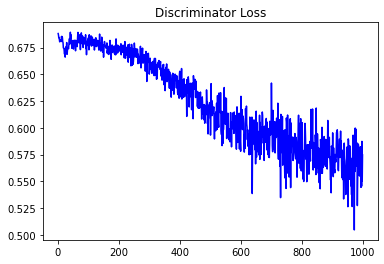

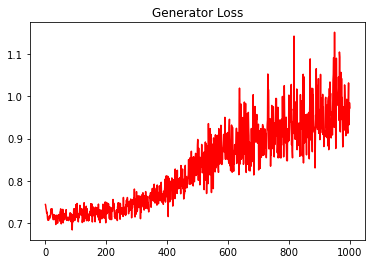

In [8]:
performanceMetrics.plotTrainingLoss2(discLossG1,genLossG1,np.linspace(1,n_epochs,n_epochs).astype(int))

In [9]:
GAN1_metrics = train_test.test_generator(generator,test_data,device)
sb.glue("GAN_1 Metrics",GAN1_metrics)

tensor([[ 0.4027],
        [-2.3366],
        [ 0.1223],
        [-2.7709],
        [ 0.5245],
        [ 0.2710],
        [-0.5352],
        [ 0.3331],
        [ 0.7772],
        [ 0.4411],
        [-0.1030],
        [ 0.1601],
        [-0.5783],
        [ 0.7279],
        [ 0.1980],
        [ 0.7372],
        [ 0.7087],
        [ 0.2868],
        [-0.4751],
        [ 0.6587]], grad_fn=<MmBackward>)
tensor([[ 0.5642],
        [-1.9414],
        [-0.0456],
        [-2.8336],
        [ 0.4413],
        [ 0.2140],
        [-0.6812],
        [ 0.2024],
        [ 0.6238],
        [ 0.4781],
        [ 0.3266],
        [ 0.0984],
        [-0.2980],
        [ 0.6761],
        [ 0.1577],
        [ 0.7279],
        [ 0.7210],
        [ 0.3266],
        [-0.4860],
        [ 0.7466]], grad_fn=<MmBackward>)
tensor([[ 0.5534],
        [-1.7805],
        [-0.0651],
        [-2.8880],
        [ 0.5530],
        [ 0.2131],
        [-0.5662],
        [ 0.1884],
        [ 0.6949],
        [ 0.4668],
    

tensor([[ 0.3750],
        [-2.2737],
        [ 0.0032],
        [-2.7696],
        [ 0.5203],
        [ 0.2209],
        [-0.7296],
        [ 0.3638],
        [ 0.6550],
        [ 0.3809],
        [ 0.6467],
        [ 0.1329],
        [-0.3422],
        [ 0.6290],
        [ 0.1261],
        [ 0.7135],
        [ 0.7286],
        [ 0.2642],
        [-0.5497],
        [ 0.6733]], grad_fn=<MmBackward>)
tensor([[ 0.4195],
        [-2.1585],
        [-0.0358],
        [-2.7433],
        [ 0.4417],
        [ 0.2559],
        [-0.6595],
        [ 0.2495],
        [ 0.6742],
        [ 0.4685],
        [ 0.1711],
        [ 0.1795],
        [-0.4001],
        [ 0.7131],
        [ 0.0878],
        [ 0.7770],
        [ 0.7062],
        [ 0.3189],
        [-0.4993],
        [ 0.7481]], grad_fn=<MmBackward>)
tensor([[ 0.4337],
        [-2.0465],
        [-0.0696],
        [-2.7565],
        [ 0.5198],
        [ 0.2151],
        [-0.7624],
        [ 0.1679],
        [ 0.6380],
        [ 0.5163],
    

tensor([[ 0.4262],
        [-2.3128],
        [-0.0869],
        [-2.6990],
        [ 0.4883],
        [ 0.2884],
        [-0.7567],
        [ 0.3441],
        [ 0.7005],
        [ 0.4227],
        [ 0.1109],
        [ 0.1635],
        [-0.4543],
        [ 0.6996],
        [ 0.3515],
        [ 0.7428],
        [ 0.7207],
        [ 0.3098],
        [-0.5262],
        [ 0.7456]], grad_fn=<MmBackward>)
tensor([[ 0.5215],
        [-1.9433],
        [ 0.0114],
        [-2.7451],
        [ 0.5173],
        [ 0.2101],
        [-0.6869],
        [ 0.3113],
        [ 0.5926],
        [ 0.5464],
        [ 0.1646],
        [ 0.0236],
        [-0.3815],
        [ 0.6430],
        [ 0.2884],
        [ 0.6541],
        [ 0.7427],
        [ 0.2039],
        [-0.5954],
        [ 0.6978]], grad_fn=<MmBackward>)
tensor([[ 0.4374],
        [-2.1218],
        [-0.0219],
        [-2.7777],
        [ 0.5661],
        [ 0.3084],
        [-0.6066],
        [ 0.3353],
        [ 0.6657],
        [ 0.3588],
    

tensor([[ 0.4363],
        [-2.0078],
        [-0.0291],
        [-2.7754],
        [ 0.4757],
        [ 0.1929],
        [-0.6257],
        [ 0.2554],
        [ 0.7692],
        [ 0.5202],
        [ 0.1584],
        [ 0.2197],
        [-0.4758],
        [ 0.7138],
        [ 0.0706],
        [ 0.7172],
        [ 0.7068],
        [ 0.3195],
        [-0.6426],
        [ 0.6118]], grad_fn=<MmBackward>)
tensor([[ 0.4039],
        [-2.4381],
        [ 0.0632],
        [-2.7588],
        [ 0.3791],
        [ 0.2855],
        [-0.5535],
        [ 0.3333],
        [ 0.6992],
        [ 0.4107],
        [ 0.1972],
        [ 0.1802],
        [-0.5116],
        [ 0.7315],
        [ 0.2389],
        [ 0.6839],
        [ 0.6924],
        [ 0.3026],
        [-0.4362],
        [ 0.7746]], grad_fn=<MmBackward>)
tensor([[ 0.3982],
        [-2.2922],
        [ 0.0622],
        [-2.7352],
        [ 0.5967],
        [ 0.2501],
        [-0.6016],
        [ 0.3243],
        [ 0.7522],
        [ 0.4143],
    

tensor([[ 0.3971],
        [-2.1689],
        [ 0.0078],
        [-2.6796],
        [ 0.5281],
        [ 0.2628],
        [-0.7651],
        [ 0.3732],
        [ 0.6876],
        [ 0.4241],
        [-0.1297],
        [ 0.1820],
        [-0.5681],
        [ 0.7255],
        [ 0.2820],
        [ 0.6905],
        [ 0.7275],
        [ 0.3026],
        [-0.5321],
        [ 0.7375]], grad_fn=<MmBackward>)
tensor([[ 0.4799],
        [-1.9943],
        [-0.0297],
        [-2.7792],
        [ 0.5145],
        [ 0.2467],
        [-0.6603],
        [ 0.2036],
        [ 0.6673],
        [ 0.5085],
        [-0.1325],
        [ 0.2470],
        [-0.3173],
        [ 0.7040],
        [ 0.1547],
        [ 0.7571],
        [ 0.7013],
        [ 0.2841],
        [-0.4963],
        [ 0.7475]], grad_fn=<MmBackward>)
tensor([[ 0.5325],
        [-1.9033],
        [-0.0784],
        [-2.7843],
        [ 0.5275],
        [ 0.2445],
        [-0.6711],
        [ 0.2972],
        [ 0.6510],
        [ 0.4200],
    

tensor([[ 0.4376],
        [-2.1565],
        [ 0.0987],
        [-2.7085],
        [ 0.3904],
        [ 0.3097],
        [-0.6166],
        [ 0.3747],
        [ 0.6613],
        [ 0.3613],
        [-0.1032],
        [ 0.1724],
        [-0.3615],
        [ 0.7406],
        [ 0.1923],
        [ 0.7430],
        [ 0.7143],
        [ 0.3120],
        [-0.4358],
        [ 0.7758]], grad_fn=<MmBackward>)
tensor([[ 0.3984],
        [-2.1537],
        [-0.0087],
        [-2.7360],
        [ 0.5689],
        [ 0.2604],
        [-0.5271],
        [ 0.2946],
        [ 0.6491],
        [ 0.3609],
        [ 0.0268],
        [ 0.1726],
        [-0.3710],
        [ 0.6752],
        [ 0.1579],
        [ 0.6936],
        [ 0.6841],
        [ 0.2611],
        [-0.4361],
        [ 0.7231]], grad_fn=<MmBackward>)
tensor([[ 0.4348],
        [-2.2422],
        [ 0.2107],
        [-2.7329],
        [ 0.5646],
        [ 0.2577],
        [-0.6238],
        [ 0.4092],
        [ 0.7571],
        [ 0.3955],
    

tensor([[ 0.5388],
        [-1.8176],
        [-0.0814],
        [-2.7463],
        [ 0.5329],
        [ 0.2559],
        [-0.5688],
        [ 0.2181],
        [ 0.6815],
        [ 0.4901],
        [-0.1737],
        [ 0.1704],
        [-0.2770],
        [ 0.7161],
        [ 0.0877],
        [ 0.6934],
        [ 0.6789],
        [ 0.2523],
        [-0.4740],
        [ 0.7108]], grad_fn=<MmBackward>)
tensor([[ 0.5045],
        [-1.8756],
        [ 0.0517],
        [-2.7382],
        [ 0.5885],
        [ 0.2763],
        [-0.5690],
        [ 0.2994],
        [ 0.6705],
        [ 0.3958],
        [-0.1533],
        [ 0.1098],
        [-0.2670],
        [ 0.6998],
        [ 0.2754],
        [ 0.7663],
        [ 0.6980],
        [ 0.2513],
        [-0.3931],
        [ 0.7429]], grad_fn=<MmBackward>)
tensor([[ 0.5102],
        [-1.8849],
        [-0.0259],
        [-2.7221],
        [ 0.5193],
        [ 0.1870],
        [-0.7401],
        [ 0.2707],
        [ 0.6348],
        [ 0.5088],
    

tensor([[ 0.4273],
        [-2.2972],
        [-0.0078],
        [-2.7263],
        [ 0.4976],
        [ 0.2434],
        [-0.7169],
        [ 0.2870],
        [ 0.6882],
        [ 0.4393],
        [ 0.2410],
        [ 0.1832],
        [-0.4287],
        [ 0.7054],
        [ 0.3337],
        [ 0.7649],
        [ 0.7077],
        [ 0.2993],
        [-0.4858],
        [ 0.7377]], grad_fn=<MmBackward>)
tensor([[ 0.4176],
        [-2.0654],
        [-0.0240],
        [-2.7724],
        [ 0.5558],
        [ 0.2487],
        [-0.6178],
        [ 0.3294],
        [ 0.7235],
        [ 0.3664],
        [-0.1062],
        [ 0.2680],
        [-0.4926],
        [ 0.7132],
        [ 0.0534],
        [ 0.7027],
        [ 0.6932],
        [ 0.2727],
        [-0.5126],
        [ 0.6942]], grad_fn=<MmBackward>)
tensor([[ 0.4860],
        [-1.8181],
        [-0.1311],
        [-2.8369],
        [ 0.4717],
        [ 0.1968],
        [-0.5619],
        [ 0.2286],
        [ 0.6942],
        [ 0.4036],
    

tensor([[ 0.3706],
        [-2.1311],
        [-0.0612],
        [-2.7638],
        [ 0.5461],
        [ 0.2423],
        [-0.4814],
        [ 0.2802],
        [ 0.7663],
        [ 0.3972],
        [-0.1241],
        [ 0.1740],
        [-0.3581],
        [ 0.7330],
        [-0.0043],
        [ 0.7349],
        [ 0.6710],
        [ 0.2612],
        [-0.3620],
        [ 0.7017]], grad_fn=<MmBackward>)
tensor([[ 0.4904],
        [-1.9981],
        [ 0.0060],
        [-2.8779],
        [ 0.5476],
        [ 0.1968],
        [-0.6283],
        [ 0.1534],
        [ 0.6622],
        [ 0.4953],
        [ 0.5370],
        [ 0.1528],
        [-0.3261],
        [ 0.6537],
        [ 0.2497],
        [ 0.6843],
        [ 0.6883],
        [ 0.2483],
        [-0.4280],
        [ 0.7038]], grad_fn=<MmBackward>)
tensor([[ 0.4381],
        [-2.1845],
        [-0.0298],
        [-2.7368],
        [ 0.5231],
        [ 0.2355],
        [-0.6619],
        [ 0.3571],
        [ 0.6506],
        [ 0.3616],
    

tensor([[ 0.3718],
        [-2.2103],
        [-0.0212],
        [-2.7510],
        [ 0.4719],
        [ 0.2669],
        [-0.6354],
        [ 0.3424],
        [ 0.6551],
        [ 0.3615],
        [ 0.4048],
        [ 0.0979],
        [-0.3391],
        [ 0.7074],
        [ 0.2925],
        [ 0.7019],
        [ 0.6988],
        [ 0.2554],
        [-0.4432],
        [ 0.7330]], grad_fn=<MmBackward>)
tensor([[ 0.5788],
        [-1.8171],
        [-0.0166],
        [-2.7251],
        [ 0.5276],
        [ 0.1953],
        [-0.6677],
        [ 0.2391],
        [ 0.6548],
        [ 0.5017],
        [-0.1409],
        [ 0.0837],
        [-0.2489],
        [ 0.6833],
        [ 0.2660],
        [ 0.7046],
        [ 0.7326],
        [ 0.3123],
        [-0.5305],
        [ 0.6593]], grad_fn=<MmBackward>)
tensor([[ 0.4282],
        [-2.3587],
        [ 0.1179],
        [-2.6998],
        [ 0.4559],
        [ 0.3389],
        [-0.6223],
        [ 0.3396],
        [ 0.7104],
        [ 0.4246],
    

tensor([[ 0.4339],
        [-2.4484],
        [ 0.0457],
        [-2.7086],
        [ 0.5780],
        [ 0.3482],
        [-0.5180],
        [ 0.3321],
        [ 0.6807],
        [ 0.4411],
        [-0.1219],
        [ 0.2106],
        [-0.4852],
        [ 0.6251],
        [ 0.2085],
        [ 0.7409],
        [ 0.6966],
        [ 0.3341],
        [-0.4228],
        [ 0.7972]], grad_fn=<MmBackward>)
tensor([[ 0.5172],
        [-2.0884],
        [-0.0653],
        [-2.7757],
        [ 0.5039],
        [ 0.2177],
        [-0.6628],
        [ 0.2510],
        [ 0.6237],
        [ 0.3916],
        [ 0.6270],
        [ 0.1695],
        [-0.1983],
        [ 0.6260],
        [ 0.2222],
        [ 0.7178],
        [ 0.6962],
        [ 0.2598],
        [-0.4597],
        [ 0.6935]], grad_fn=<MmBackward>)
tensor([[ 0.4192],
        [-2.1720],
        [-0.0148],
        [-2.7297],
        [ 0.5561],
        [ 0.2294],
        [-0.6176],
        [ 0.2612],
        [ 0.7204],
        [ 0.5132],
    

tensor([[ 0.3660],
        [-1.8057],
        [-0.1037],
        [-2.7981],
        [ 0.5124],
        [ 0.1982],
        [-0.6176],
        [ 0.3186],
        [ 0.7150],
        [ 0.4520],
        [ 0.0896],
        [ 0.1635],
        [-0.4946],
        [ 0.7095],
        [ 0.3448],
        [ 0.6911],
        [ 0.7023],
        [ 0.2478],
        [-0.5054],
        [ 0.7013]], grad_fn=<MmBackward>)
tensor([[ 4.6384e-01],
        [-2.3810e+00],
        [ 7.0238e-04],
        [-2.7462e+00],
        [ 4.9708e-01],
        [ 2.6442e-01],
        [-6.0882e-01],
        [ 3.2241e-01],
        [ 6.8352e-01],
        [ 4.3999e-01],
        [ 1.3187e-01],
        [ 2.3661e-01],
        [-6.6298e-01],
        [ 6.6500e-01],
        [ 2.1232e-01],
        [ 7.3266e-01],
        [ 7.0256e-01],
        [ 2.7137e-01],
        [-5.4345e-01],
        [ 7.2184e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5556],
        [-1.9660],
        [ 0.0239],
        [-2.8193],
        [ 0.4595],
        [ 0.2115],


tensor([[ 0.5040],
        [-1.5917],
        [-0.0927],
        [-2.7824],
        [ 0.4657],
        [ 0.2650],
        [-0.5679],
        [ 0.2915],
        [ 0.7541],
        [ 0.4174],
        [-0.0076],
        [ 0.1628],
        [-0.2667],
        [ 0.7195],
        [ 0.1673],
        [ 0.7176],
        [ 0.6750],
        [ 0.2030],
        [-0.5695],
        [ 0.6281]], grad_fn=<MmBackward>)
tensor([[ 0.4290],
        [-2.3712],
        [ 0.0936],
        [-2.5973],
        [ 0.4307],
        [ 0.2651],
        [-0.8842],
        [ 0.2635],
        [ 0.6851],
        [ 0.5234],
        [ 0.0551],
        [ 0.2147],
        [-0.5825],
        [ 0.7168],
        [ 0.3294],
        [ 0.7489],
        [ 0.7617],
        [ 0.3554],
        [-0.4963],
        [ 0.7702]], grad_fn=<MmBackward>)
tensor([[ 0.4903],
        [-1.9820],
        [-0.0582],
        [-2.7530],
        [ 0.5135],
        [ 0.2262],
        [-0.5506],
        [ 0.3555],
        [ 0.7042],
        [ 0.3813],
    

tensor([[ 0.5122],
        [-1.8282],
        [-0.0972],
        [-2.7210],
        [ 0.5428],
        [ 0.2429],
        [-0.7214],
        [ 0.2936],
        [ 0.6768],
        [ 0.4704],
        [-0.1531],
        [ 0.1623],
        [-0.3184],
        [ 0.7231],
        [ 0.1601],
        [ 0.7131],
        [ 0.7218],
        [ 0.2397],
        [-0.6087],
        [ 0.6746]], grad_fn=<MmBackward>)
tensor([[ 0.5252],
        [-1.8780],
        [-0.0700],
        [-2.7393],
        [ 0.4469],
        [ 0.1877],
        [-0.6180],
        [ 0.2436],
        [ 0.6413],
        [ 0.4183],
        [ 0.5151],
        [ 0.1676],
        [-0.2895],
        [ 0.6763],
        [ 0.1847],
        [ 0.6997],
        [ 0.6908],
        [ 0.2119],
        [-0.5214],
        [ 0.6823]], grad_fn=<MmBackward>)
tensor([[ 0.4094],
        [-2.1379],
        [ 0.0108],
        [-2.7546],
        [ 0.5020],
        [ 0.2355],
        [-0.5682],
        [ 0.3036],
        [ 0.7256],
        [ 0.5300],
    

tensor([[ 0.5719],
        [-1.6947],
        [-0.1002],
        [-2.8995],
        [ 0.5314],
        [ 0.1567],
        [-0.6117],
        [ 0.1964],
        [ 0.6610],
        [ 0.5067],
        [ 0.1703],
        [ 0.1428],
        [-0.3654],
        [ 0.6828],
        [ 0.1468],
        [ 0.6536],
        [ 0.7134],
        [ 0.1777],
        [-0.5283],
        [ 0.6732]], grad_fn=<MmBackward>)
tensor([[ 0.4192],
        [-2.2212],
        [-0.0436],
        [-2.8327],
        [ 0.5466],
        [ 0.2471],
        [-0.7166],
        [ 0.3236],
        [ 0.7249],
        [ 0.4525],
        [ 0.1079],
        [ 0.2287],
        [-0.6421],
        [ 0.7456],
        [ 0.0030],
        [ 0.7253],
        [ 0.7092],
        [ 0.2924],
        [-0.5569],
        [ 0.7796]], grad_fn=<MmBackward>)
tensor([[ 0.4708],
        [-2.0397],
        [ 0.0532],
        [-2.7258],
        [ 0.5239],
        [ 0.2072],
        [-0.6814],
        [ 0.2075],
        [ 0.6839],
        [ 0.5484],
    

tensor([[ 0.5820],
        [-1.9452],
        [-0.0029],
        [-2.8355],
        [ 0.5169],
        [ 0.2059],
        [-0.5837],
        [ 0.2039],
        [ 0.6494],
        [ 0.4989],
        [ 0.2051],
        [ 0.0383],
        [-0.3004],
        [ 0.6468],
        [ 0.1359],
        [ 0.7017],
        [ 0.7190],
        [ 0.2170],
        [-0.4060],
        [ 0.7254]], grad_fn=<MmBackward>)
tensor([[ 0.5427],
        [-1.9743],
        [-0.0441],
        [-2.7894],
        [ 0.5429],
        [ 0.2416],
        [-0.6497],
        [ 0.1840],
        [ 0.6395],
        [ 0.4694],
        [ 0.1957],
        [ 0.1658],
        [-0.2529],
        [ 0.6581],
        [ 0.2452],
        [ 0.7341],
        [ 0.7111],
        [ 0.2787],
        [-0.4656],
        [ 0.7379]], grad_fn=<MmBackward>)
tensor([[ 0.4037],
        [-2.5036],
        [ 0.1017],
        [-2.7910],
        [ 0.5080],
        [ 0.3000],
        [-0.6052],
        [ 0.2830],
        [ 0.7551],
        [ 0.4931],
    

tensor([[ 0.3775],
        [-2.1880],
        [ 0.0367],
        [-2.6966],
        [ 0.3735],
        [ 0.3065],
        [-0.6433],
        [ 0.2829],
        [ 0.6802],
        [ 0.4832],
        [ 0.1840],
        [ 0.1582],
        [-0.5401],
        [ 0.7206],
        [ 0.3421],
        [ 0.7520],
        [ 0.6987],
        [ 0.2768],
        [-0.5208],
        [ 0.7356]], grad_fn=<MmBackward>)
tensor([[ 0.4197],
        [-2.1245],
        [ 0.0074],
        [-2.8442],
        [ 0.5094],
        [ 0.2032],
        [-0.6444],
        [ 0.2553],
        [ 0.7035],
        [ 0.4149],
        [ 0.4869],
        [ 0.1416],
        [-0.3028],
        [ 0.6679],
        [ 0.3165],
        [ 0.7268],
        [ 0.7004],
        [ 0.2555],
        [-0.4229],
        [ 0.6910]], grad_fn=<MmBackward>)
tensor([[ 0.4481],
        [-2.1920],
        [ 0.0494],
        [-2.6778],
        [ 0.5215],
        [ 0.2467],
        [-0.8154],
        [ 0.2799],
        [ 0.6954],
        [ 0.5303],
    

tensor([[ 0.3638],
        [-2.1954],
        [-0.0454],
        [-2.7681],
        [ 0.5041],
        [ 0.2037],
        [-0.6023],
        [ 0.3100],
        [ 0.6812],
        [ 0.3374],
        [ 0.3785],
        [ 0.1905],
        [-0.4689],
        [ 0.7434],
        [ 0.1333],
        [ 0.7084],
        [ 0.6802],
        [ 0.2705],
        [-0.4159],
        [ 0.7480]], grad_fn=<MmBackward>)
tensor([[ 0.4779],
        [-2.0891],
        [-0.0244],
        [-2.7303],
        [ 0.4745],
        [ 0.2468],
        [-0.6712],
        [ 0.2190],
        [ 0.6850],
        [ 0.4776],
        [-0.1405],
        [ 0.2023],
        [-0.3145],
        [ 0.7088],
        [ 0.1745],
        [ 0.7364],
        [ 0.7162],
        [ 0.3063],
        [-0.4422],
        [ 0.7643]], grad_fn=<MmBackward>)
tensor([[ 5.2852e-01],
        [-1.9213e+00],
        [-7.0279e-02],
        [-2.8378e+00],
        [ 4.9429e-01],
        [ 1.9853e-01],
        [-6.7134e-01],
        [ 2.2349e-01],
        [ 

tensor([[ 0.4686],
        [-2.0719],
        [-0.0549],
        [-2.7895],
        [ 0.4944],
        [ 0.2042],
        [-0.6297],
        [ 0.2329],
        [ 0.6741],
        [ 0.4357],
        [ 0.3913],
        [ 0.1657],
        [-0.2250],
        [ 0.6576],
        [ 0.2826],
        [ 0.6996],
        [ 0.7072],
        [ 0.2537],
        [-0.4284],
        [ 0.6808]], grad_fn=<MmBackward>)
tensor([[ 0.4935],
        [-2.0523],
        [-0.0706],
        [-2.7925],
        [ 0.5175],
        [ 0.2489],
        [-0.7137],
        [ 0.2217],
        [ 0.6355],
        [ 0.4491],
        [ 0.2521],
        [ 0.1481],
        [-0.2751],
        [ 0.6397],
        [ 0.2942],
        [ 0.6966],
        [ 0.7271],
        [ 0.2744],
        [-0.4919],
        [ 0.6926]], grad_fn=<MmBackward>)
tensor([[ 0.4166],
        [-2.0989],
        [ 0.0275],
        [-2.6829],
        [ 0.5477],
        [ 0.2610],
        [-0.6852],
        [ 0.4275],
        [ 0.7102],
        [ 0.3829],
    

tensor([[ 0.4204],
        [-2.1250],
        [-0.0192],
        [-2.7239],
        [ 0.4120],
        [ 0.2561],
        [-0.6286],
        [ 0.2993],
        [ 0.6938],
        [ 0.4488],
        [-0.1343],
        [ 0.2061],
        [-0.4594],
        [ 0.7412],
        [ 0.3242],
        [ 0.7058],
        [ 0.7020],
        [ 0.2823],
        [-0.4350],
        [ 0.7515]], grad_fn=<MmBackward>)
tensor([[ 0.5818],
        [-2.0140],
        [ 0.0926],
        [-2.7956],
        [ 0.4700],
        [ 0.2303],
        [-0.6132],
        [ 0.2600],
        [ 0.6707],
        [ 0.4596],
        [ 0.1879],
        [ 0.0296],
        [-0.1950],
        [ 0.6437],
        [ 0.2636],
        [ 0.7217],
        [ 0.7371],
        [ 0.2355],
        [-0.3896],
        [ 0.6730]], grad_fn=<MmBackward>)
tensor([[ 0.4956],
        [-1.9315],
        [-0.0095],
        [-2.7494],
        [ 0.5135],
        [ 0.2654],
        [-0.6754],
        [ 0.1845],
        [ 0.6409],
        [ 0.4977],
    

tensor([[ 0.4521],
        [-2.1798],
        [ 0.0836],
        [-2.7211],
        [ 0.4556],
        [ 0.2627],
        [-0.7327],
        [ 0.3181],
        [ 0.6617],
        [ 0.4771],
        [ 0.0535],
        [ 0.0988],
        [-0.3894],
        [ 0.6530],
        [ 0.4074],
        [ 0.7156],
        [ 0.7374],
        [ 0.2830],
        [-0.4584],
        [ 0.7708]], grad_fn=<MmBackward>)
tensor([[ 0.3812],
        [-2.2365],
        [ 0.0076],
        [-2.6849],
        [ 0.5195],
        [ 0.2413],
        [-0.7873],
        [ 0.3261],
        [ 0.6812],
        [ 0.4798],
        [-0.0793],
        [ 0.0971],
        [-0.3915],
        [ 0.7001],
        [ 0.3938],
        [ 0.7138],
        [ 0.7414],
        [ 0.2842],
        [-0.4958],
        [ 0.7196]], grad_fn=<MmBackward>)
tensor([[ 0.4932],
        [-2.0022],
        [-0.1093],
        [-2.7119],
        [ 0.5218],
        [ 0.2524],
        [-0.6888],
        [ 0.3766],
        [ 0.7009],
        [ 0.3848],
    

tensor([[ 0.4769],
        [-1.5603],
        [-0.0706],
        [-2.8771],
        [ 0.5261],
        [ 0.1400],
        [-0.5819],
        [ 0.2103],
        [ 0.6664],
        [ 0.5135],
        [ 0.4371],
        [ 0.1056],
        [-0.4644],
        [ 0.6965],
        [ 0.2990],
        [ 0.6640],
        [ 0.6669],
        [ 0.1614],
        [-0.5516],
        [ 0.6244]], grad_fn=<MmBackward>)
tensor([[ 0.4548],
        [-2.1057],
        [-0.0693],
        [-2.7146],
        [ 0.4741],
        [ 0.2701],
        [-0.5892],
        [ 0.2882],
        [ 0.7037],
        [ 0.4034],
        [-0.1193],
        [ 0.2513],
        [-0.3694],
        [ 0.7408],
        [ 0.1651],
        [ 0.7260],
        [ 0.6869],
        [ 0.2773],
        [-0.4685],
        [ 0.7350]], grad_fn=<MmBackward>)
tensor([[ 0.3900],
        [-2.1268],
        [ 0.0454],
        [-2.7514],
        [ 0.5212],
        [ 0.2662],
        [-0.5453],
        [ 0.2812],
        [ 0.7232],
        [ 0.4638],
    

tensor([[ 0.5437],
        [-1.8784],
        [-0.0379],
        [-2.7714],
        [ 0.5108],
        [ 0.2229],
        [-0.5495],
        [ 0.1849],
        [ 0.6705],
        [ 0.5138],
        [-0.0928],
        [ 0.2214],
        [-0.1996],
        [ 0.6575],
        [ 0.2192],
        [ 0.7140],
        [ 0.6886],
        [ 0.2398],
        [-0.4432],
        [ 0.7057]], grad_fn=<MmBackward>)
tensor([[ 0.3717],
        [-2.2058],
        [-0.0031],
        [-2.7491],
        [ 0.5446],
        [ 0.2501],
        [-0.6016],
        [ 0.2682],
        [ 0.6713],
        [ 0.4093],
        [ 0.3085],
        [ 0.1741],
        [-0.4393],
        [ 0.7010],
        [ 0.1802],
        [ 0.7469],
        [ 0.6956],
        [ 0.2798],
        [-0.4750],
        [ 0.7450]], grad_fn=<MmBackward>)
tensor([[ 0.5083],
        [-1.8727],
        [-0.0647],
        [-2.8299],
        [ 0.5034],
        [ 0.2195],
        [-0.6638],
        [ 0.2990],
        [ 0.6912],
        [ 0.4300],
    

tensor([[ 0.4607],
        [-2.0111],
        [-0.0123],
        [-2.8220],
        [ 0.4853],
        [ 0.2592],
        [-0.5516],
        [ 0.2159],
        [ 0.6919],
        [ 0.4611],
        [-0.0215],
        [ 0.1802],
        [-0.2331],
        [ 0.6699],
        [ 0.0432],
        [ 0.7679],
        [ 0.6941],
        [ 0.3025],
        [-0.4273],
        [ 0.7348]], grad_fn=<MmBackward>)
tensor([[ 0.5556],
        [-1.8204],
        [-0.0628],
        [-2.7957],
        [ 0.5372],
        [ 0.1894],
        [-0.6810],
        [ 0.3813],
        [ 0.6743],
        [ 0.4070],
        [ 0.1275],
        [ 0.0898],
        [-0.3314],
        [ 0.6944],
        [ 0.2166],
        [ 0.6962],
        [ 0.7052],
        [ 0.2100],
        [-0.6031],
        [ 0.6787]], grad_fn=<MmBackward>)
tensor([[ 0.4289],
        [-2.2537],
        [-0.0094],
        [-2.7381],
        [ 0.5371],
        [ 0.2285],
        [-0.6975],
        [ 0.1907],
        [ 0.5904],
        [ 0.5075],
    

tensor([[ 0.6133],
        [-1.8639],
        [-0.0655],
        [-2.7953],
        [ 0.5006],
        [ 0.2065],
        [-0.6007],
        [ 0.3161],
        [ 0.6608],
        [ 0.4176],
        [-0.0753],
        [ 0.2177],
        [-0.2734],
        [ 0.6678],
        [ 0.2313],
        [ 0.6877],
        [ 0.7203],
        [ 0.2048],
        [-0.4796],
        [ 0.6353]], grad_fn=<MmBackward>)
tensor([[ 0.3713],
        [-2.2774],
        [-0.0325],
        [-2.7240],
        [ 0.5303],
        [ 0.2890],
        [-0.6764],
        [ 0.3073],
        [ 0.6606],
        [ 0.3570],
        [ 0.2089],
        [ 0.2496],
        [-0.4482],
        [ 0.6571],
        [ 0.0568],
        [ 0.7183],
        [ 0.6885],
        [ 0.3102],
        [-0.5230],
        [ 0.7416]], grad_fn=<MmBackward>)
tensor([[ 0.4392],
        [-2.1805],
        [-0.1208],
        [-2.7053],
        [ 0.5017],
        [ 0.2623],
        [-0.7080],
        [ 0.2358],
        [ 0.6672],
        [ 0.4744],
    

tensor([[ 0.4082],
        [-1.9023],
        [-0.0565],
        [-2.7553],
        [ 0.5637],
        [ 0.2248],
        [-0.7292],
        [ 0.2853],
        [ 0.7273],
        [ 0.5187],
        [ 0.0721],
        [ 0.0945],
        [-0.6435],
        [ 0.7299],
        [ 0.3766],
        [ 0.6855],
        [ 0.7063],
        [ 0.2690],
        [-0.6333],
        [ 0.6613]], grad_fn=<MmBackward>)
tensor([[ 0.6160],
        [-1.9400],
        [-0.0723],
        [-2.8117],
        [ 0.4981],
        [ 0.1942],
        [-0.5417],
        [ 0.1974],
        [ 0.6753],
        [ 0.4579],
        [ 0.0931],
        [ 0.0942],
        [-0.3118],
        [ 0.6427],
        [ 0.1076],
        [ 0.6543],
        [ 0.6921],
        [ 0.2131],
        [-0.3557],
        [ 0.6950]], grad_fn=<MmBackward>)
tensor([[ 0.3922],
        [-2.0884],
        [ 0.0072],
        [-2.7726],
        [ 0.5191],
        [ 0.2414],
        [-0.6057],
        [ 0.2563],
        [ 0.6969],
        [ 0.4699],
    

tensor([[ 0.3756],
        [-2.2333],
        [-0.0816],
        [-2.8087],
        [ 0.5448],
        [ 0.2280],
        [-0.6322],
        [ 0.1951],
        [ 0.6648],
        [ 0.4285],
        [ 0.5976],
        [ 0.0896],
        [-0.3486],
        [ 0.6719],
        [-0.0134],
        [ 0.7310],
        [ 0.6900],
        [ 0.3119],
        [-0.4440],
        [ 0.7306]], grad_fn=<MmBackward>)
tensor([[ 0.4602],
        [-2.0327],
        [-0.0076],
        [-2.8372],
        [ 0.4538],
        [ 0.2094],
        [-0.6117],
        [ 0.2369],
        [ 0.6821],
        [ 0.4210],
        [ 0.3271],
        [ 0.0544],
        [-0.2749],
        [ 0.6937],
        [ 0.3425],
        [ 0.7327],
        [ 0.6992],
        [ 0.2486],
        [-0.4202],
        [ 0.6953]], grad_fn=<MmBackward>)
tensor([[ 0.4154],
        [-2.1292],
        [-0.0277],
        [-2.7098],
        [ 0.5634],
        [ 0.2572],
        [-0.6977],
        [ 0.4033],
        [ 0.6791],
        [ 0.3793],
    

tensor([[ 0.4876],
        [-2.0517],
        [ 0.0897],
        [-2.7128],
        [ 0.4426],
        [ 0.1972],
        [-0.7041],
        [ 0.3749],
        [ 0.6858],
        [ 0.4114],
        [ 0.2719],
        [ 0.1905],
        [-0.4182],
        [ 0.7222],
        [ 0.2659],
        [ 0.6389],
        [ 0.7306],
        [ 0.2793],
        [-0.6082],
        [ 0.6438]], grad_fn=<MmBackward>)
tensor([[ 0.5208],
        [-1.9479],
        [-0.0254],
        [-2.8124],
        [ 0.3958],
        [ 0.2244],
        [-0.6494],
        [ 0.1856],
        [ 0.6193],
        [ 0.4731],
        [ 0.4785],
        [ 0.1358],
        [-0.1541],
        [ 0.6859],
        [ 0.1915],
        [ 0.7445],
        [ 0.7118],
        [ 0.2440],
        [-0.4868],
        [ 0.7003]], grad_fn=<MmBackward>)
tensor([[ 0.3720],
        [-2.1636],
        [ 0.0742],
        [-2.7391],
        [ 0.4591],
        [ 0.2681],
        [-0.6392],
        [ 0.4006],
        [ 0.6886],
        [ 0.3752],
    

tensor([[ 0.3893],
        [-2.3774],
        [ 0.1226],
        [-2.7586],
        [ 0.5150],
        [ 0.2018],
        [-0.6675],
        [ 0.2936],
        [ 0.7551],
        [ 0.4965],
        [ 0.4981],
        [ 0.1734],
        [-0.5246],
        [ 0.6715],
        [ 0.2869],
        [ 0.6906],
        [ 0.7138],
        [ 0.3447],
        [-0.5815],
        [ 0.6325]], grad_fn=<MmBackward>)
tensor([[ 0.4257],
        [-2.4006],
        [ 0.1386],
        [-2.7304],
        [ 0.3723],
        [ 0.2456],
        [-0.6502],
        [ 0.3223],
        [ 0.6884],
        [ 0.4964],
        [ 0.2494],
        [ 0.2148],
        [-0.5625],
        [ 0.7261],
        [ 0.3290],
        [ 0.7251],
        [ 0.7230],
        [ 0.3082],
        [-0.5481],
        [ 0.6657]], grad_fn=<MmBackward>)
tensor([[ 0.4159],
        [-2.1083],
        [-0.0286],
        [-2.7542],
        [ 0.4688],
        [ 0.2727],
        [-0.6876],
        [ 0.3245],
        [ 0.7096],
        [ 0.3974],
    

tensor([[ 0.4557],
        [-2.2330],
        [ 0.0113],
        [-2.7584],
        [ 0.5213],
        [ 0.1796],
        [-0.6695],
        [ 0.3683],
        [ 0.7757],
        [ 0.4192],
        [ 0.1059],
        [ 0.2284],
        [-0.5197],
        [ 0.7224],
        [ 0.2520],
        [ 0.6841],
        [ 0.6995],
        [ 0.2733],
        [-0.5083],
        [ 0.6060]], grad_fn=<MmBackward>)
tensor([[ 0.4457],
        [-2.0022],
        [-0.0055],
        [-2.8130],
        [ 0.5408],
        [ 0.2173],
        [-0.6760],
        [ 0.2480],
        [ 0.6626],
        [ 0.4439],
        [ 0.4021],
        [ 0.1699],
        [-0.3944],
        [ 0.7023],
        [ 0.2243],
        [ 0.7492],
        [ 0.6959],
        [ 0.3546],
        [-0.5672],
        [ 0.6815]], grad_fn=<MmBackward>)
tensor([[ 0.4933],
        [-2.0189],
        [-0.0331],
        [-2.7079],
        [ 0.4894],
        [ 0.2431],
        [-0.6909],
        [ 0.2750],
        [ 0.7191],
        [ 0.5016],
    

tensor([[ 0.4281],
        [-2.0962],
        [-0.0430],
        [-2.7592],
        [ 0.4945],
        [ 0.2062],
        [-0.6961],
        [ 0.2912],
        [ 0.7008],
        [ 0.4298],
        [ 0.4682],
        [ 0.2335],
        [-0.4631],
        [ 0.7492],
        [ 0.2367],
        [ 0.7199],
        [ 0.7140],
        [ 0.2499],
        [-0.5673],
        [ 0.6788]], grad_fn=<MmBackward>)
tensor([[ 0.3858],
        [-2.4229],
        [ 0.0305],
        [-2.7566],
        [ 0.4846],
        [ 0.2645],
        [-0.6309],
        [ 0.3623],
        [ 0.6992],
        [ 0.3949],
        [ 0.4396],
        [ 0.2101],
        [-0.6121],
        [ 0.7419],
        [ 0.2685],
        [ 0.7729],
        [ 0.6947],
        [ 0.2834],
        [-0.5075],
        [ 0.7772]], grad_fn=<MmBackward>)
tensor([[ 0.5164],
        [-1.9684],
        [ 0.0575],
        [-2.8184],
        [ 0.4981],
        [ 0.1906],
        [-0.5949],
        [ 0.3231],
        [ 0.7376],
        [ 0.4013],
    

tensor([[ 0.4292],
        [-2.0507],
        [-0.0964],
        [-2.7160],
        [ 0.5311],
        [ 0.2445],
        [-0.7136],
        [ 0.3965],
        [ 0.6933],
        [ 0.3939],
        [-0.1253],
        [ 0.0877],
        [-0.2670],
        [ 0.7105],
        [ 0.2303],
        [ 0.7481],
        [ 0.7234],
        [ 0.2502],
        [-0.5535],
        [ 0.7477]], grad_fn=<MmBackward>)
tensor([[ 0.5741],
        [-1.9351],
        [ 0.0782],
        [-2.7996],
        [ 0.4930],
        [ 0.2141],
        [-0.6470],
        [ 0.2496],
        [ 0.7269],
        [ 0.4768],
        [-0.1257],
        [ 0.1576],
        [-0.1675],
        [ 0.6981],
        [ 0.3503],
        [ 0.7297],
        [ 0.7268],
        [ 0.2619],
        [-0.4207],
        [ 0.6185]], grad_fn=<MmBackward>)
tensor([[ 0.4027],
        [-2.2128],
        [-0.0349],
        [-2.7066],
        [ 0.5529],
        [ 0.2795],
        [-0.6397],
        [ 0.3687],
        [ 0.6548],
        [ 0.3453],
    

tensor([[ 5.1295e-01],
        [-1.8295e+00],
        [-8.8371e-04],
        [-2.7621e+00],
        [ 5.0644e-01],
        [ 2.3562e-01],
        [-6.5691e-01],
        [ 3.3679e-01],
        [ 6.9497e-01],
        [ 4.0325e-01],
        [-5.2894e-03],
        [ 2.2311e-01],
        [-2.1684e-01],
        [ 7.2194e-01],
        [ 2.7350e-01],
        [ 7.2817e-01],
        [ 7.1379e-01],
        [ 2.3460e-01],
        [-5.4818e-01],
        [ 6.8134e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3971],
        [-2.2308],
        [ 0.0760],
        [-2.7047],
        [ 0.3965],
        [ 0.2964],
        [-0.6361],
        [ 0.2812],
        [ 0.6891],
        [ 0.5184],
        [ 0.0339],
        [ 0.2116],
        [-0.5904],
        [ 0.7002],
        [ 0.1798],
        [ 0.7445],
        [ 0.6925],
        [ 0.3164],
        [-0.5490],
        [ 0.7374]], grad_fn=<MmBackward>)
tensor([[ 0.3789],
        [-2.3809],
        [-0.0047],
        [-2.7353],
        [ 0.5375],
        [ 0.2614],


tensor([[ 0.4684],
        [-1.8952],
        [-0.0329],
        [-2.6797],
        [ 0.5497],
        [ 0.2521],
        [-0.7534],
        [ 0.2845],
        [ 0.6866],
        [ 0.5101],
        [-0.1014],
        [ 0.2459],
        [-0.6056],
        [ 0.6962],
        [ 0.3287],
        [ 0.6435],
        [ 0.7248],
        [ 0.3113],
        [-0.5436],
        [ 0.7106]], grad_fn=<MmBackward>)
tensor([[ 0.4131],
        [-2.4097],
        [-0.0238],
        [-2.6946],
        [ 0.5859],
        [ 0.2968],
        [-0.7541],
        [ 0.2771],
        [ 0.7170],
        [ 0.4915],
        [-0.1080],
        [ 0.2529],
        [-0.6869],
        [ 0.7124],
        [ 0.0863],
        [ 0.7611],
        [ 0.7084],
        [ 0.3274],
        [-0.5241],
        [ 0.7317]], grad_fn=<MmBackward>)
tensor([[ 0.5242],
        [-1.9644],
        [-0.0576],
        [-2.6917],
        [ 0.5688],
        [ 0.2178],
        [-0.6911],
        [ 0.2610],
        [ 0.6888],
        [ 0.4654],
    

tensor([[ 0.4270],
        [-2.0214],
        [-0.1158],
        [-2.7789],
        [ 0.5489],
        [ 0.2428],
        [-0.7418],
        [ 0.3488],
        [ 0.7012],
        [ 0.4446],
        [-0.1113],
        [ 0.0564],
        [-0.3368],
        [ 0.7075],
        [ 0.1678],
        [ 0.7627],
        [ 0.7416],
        [ 0.2456],
        [-0.5040],
        [ 0.7385]], grad_fn=<MmBackward>)
tensor([[ 0.4156],
        [-2.1482],
        [ 0.0455],
        [-2.7306],
        [ 0.4877],
        [ 0.2552],
        [-0.6639],
        [ 0.3569],
        [ 0.6602],
        [ 0.3919],
        [ 0.2174],
        [ 0.1039],
        [-0.3946],
        [ 0.6758],
        [ 0.3306],
        [ 0.7105],
        [ 0.7237],
        [ 0.2597],
        [-0.4641],
        [ 0.7041]], grad_fn=<MmBackward>)
tensor([[ 0.3293],
        [-2.2187],
        [ 0.0066],
        [-2.7099],
        [ 0.4832],
        [ 0.2502],
        [-0.4888],
        [ 0.2545],
        [ 0.6893],
        [ 0.4569],
    

tensor([[ 0.5264],
        [-1.8690],
        [-0.2010],
        [-2.7942],
        [ 0.5627],
        [ 0.1505],
        [-0.5986],
        [ 0.2103],
        [ 0.7244],
        [ 0.4626],
        [-0.0790],
        [ 0.1753],
        [-0.3046],
        [ 0.7140],
        [ 0.0431],
        [ 0.6171],
        [ 0.6879],
        [ 0.2089],
        [-0.3866],
        [ 0.6146]], grad_fn=<MmBackward>)
tensor([[ 0.4320],
        [-2.0741],
        [-0.0828],
        [-2.7397],
        [ 0.4946],
        [ 0.2095],
        [-0.6555],
        [ 0.2792],
        [ 0.7014],
        [ 0.4109],
        [ 0.4926],
        [ 0.2369],
        [-0.5049],
        [ 0.7332],
        [-0.0518],
        [ 0.7022],
        [ 0.6945],
        [ 0.2972],
        [-0.5967],
        [ 0.6575]], grad_fn=<MmBackward>)
tensor([[ 0.5770],
        [-1.9725],
        [ 0.0055],
        [-2.7517],
        [ 0.5054],
        [ 0.2450],
        [-0.6042],
        [ 0.2567],
        [ 0.6165],
        [ 0.4401],
    

tensor([[ 0.4726],
        [-1.9699],
        [-0.0657],
        [-2.7569],
        [ 0.4775],
        [ 0.2388],
        [-0.6214],
        [ 0.1910],
        [ 0.6773],
        [ 0.4860],
        [-0.1166],
        [ 0.1583],
        [-0.2540],
        [ 0.7230],
        [ 0.1893],
        [ 0.6763],
        [ 0.7013],
        [ 0.2547],
        [-0.4631],
        [ 0.7217]], grad_fn=<MmBackward>)
tensor([[ 0.3589],
        [-2.1265],
        [-0.0312],
        [-2.7973],
        [ 0.5444],
        [ 0.1786],
        [-0.5797],
        [ 0.2439],
        [ 0.7474],
        [ 0.5040],
        [ 0.2318],
        [ 0.2061],
        [-0.3887],
        [ 0.7221],
        [ 0.1373],
        [ 0.7189],
        [ 0.6824],
        [ 0.2790],
        [-0.5147],
        [ 0.6863]], grad_fn=<MmBackward>)
tensor([[ 0.5639],
        [-1.8927],
        [ 0.1617],
        [-2.8176],
        [ 0.4688],
        [ 0.2072],
        [-0.5762],
        [ 0.3199],
        [ 0.6652],
        [ 0.4846],
    

tensor([[ 0.4712],
        [-1.7767],
        [-0.0480],
        [-2.7322],
        [ 0.4161],
        [ 0.2170],
        [-0.5694],
        [ 0.1713],
        [ 0.6771],
        [ 0.5738],
        [-0.1003],
        [ 0.2002],
        [-0.3033],
        [ 0.6971],
        [ 0.1902],
        [ 0.6701],
        [ 0.6779],
        [ 0.2107],
        [-0.6065],
        [ 0.6555]], grad_fn=<MmBackward>)
tensor([[ 0.5135],
        [-1.8031],
        [-0.0496],
        [-2.8479],
        [ 0.4337],
        [ 0.1436],
        [-0.6148],
        [ 0.1948],
        [ 0.6382],
        [ 0.4998],
        [ 0.6666],
        [ 0.1820],
        [-0.5365],
        [ 0.6453],
        [ 0.2408],
        [ 0.5792],
        [ 0.6959],
        [ 0.1630],
        [-0.5314],
        [ 0.6402]], grad_fn=<MmBackward>)
tensor([[ 0.3847],
        [-2.3007],
        [ 0.0123],
        [-2.7006],
        [ 0.5161],
        [ 0.2333],
        [-0.7113],
        [ 0.3072],
        [ 0.6590],
        [ 0.3920],
    

tensor([[ 0.4407],
        [-2.1189],
        [-0.0244],
        [-2.7918],
        [ 0.5110],
        [ 0.2834],
        [-0.6491],
        [ 0.2912],
        [ 0.6903],
        [ 0.4425],
        [-0.1238],
        [ 0.1757],
        [-0.2538],
        [ 0.6835],
        [ 0.3171],
        [ 0.8054],
        [ 0.7294],
        [ 0.2919],
        [-0.4567],
        [ 0.7561]], grad_fn=<MmBackward>)
tensor([[ 0.4910],
        [-2.0235],
        [-0.0367],
        [-2.8016],
        [ 0.4978],
        [ 0.2192],
        [-0.6777],
        [ 0.3074],
        [ 0.6396],
        [ 0.3901],
        [ 0.3450],
        [ 0.1801],
        [-0.2582],
        [ 0.6589],
        [ 0.1979],
        [ 0.6921],
        [ 0.7174],
        [ 0.2393],
        [-0.4489],
        [ 0.7583]], grad_fn=<MmBackward>)
tensor([[ 0.4214],
        [-2.1558],
        [ 0.0450],
        [-2.7640],
        [ 0.2959],
        [ 0.2674],
        [-0.5854],
        [ 0.2877],
        [ 0.6830],
        [ 0.4025],
    

tensor([[ 0.5085],
        [-1.7482],
        [-0.0234],
        [-2.6807],
        [ 0.5047],
        [ 0.1799],
        [-0.5684],
        [ 0.1740],
        [ 0.6973],
        [ 0.5189],
        [ 0.4898],
        [ 0.0986],
        [-0.3938],
        [ 0.6795],
        [ 0.2456],
        [ 0.6434],
        [ 0.6898],
        [ 0.2100],
        [-0.6320],
        [ 0.5666]], grad_fn=<MmBackward>)
tensor([[ 0.3870],
        [-2.0514],
        [-0.0102],
        [-2.7536],
        [ 0.4710],
        [ 0.2208],
        [-0.6910],
        [ 0.1526],
        [ 0.6614],
        [ 0.5391],
        [ 0.4579],
        [ 0.1119],
        [-0.3927],
        [ 0.6645],
        [ 0.2523],
        [ 0.7404],
        [ 0.7133],
        [ 0.2548],
        [-0.5582],
        [ 0.7216]], grad_fn=<MmBackward>)
tensor([[ 0.5563],
        [-2.0275],
        [-0.0483],
        [-2.7289],
        [ 0.4941],
        [ 0.2523],
        [-0.6350],
        [ 0.2306],
        [ 0.6325],
        [ 0.4696],
    

tensor([[ 0.4276],
        [-2.1728],
        [-0.0781],
        [-2.6462],
        [ 0.5175],
        [ 0.2666],
        [-0.8340],
        [ 0.3599],
        [ 0.6820],
        [ 0.4493],
        [-0.0622],
        [ 0.2499],
        [-0.5543],
        [ 0.7269],
        [ 0.2891],
        [ 0.6665],
        [ 0.7327],
        [ 0.3117],
        [-0.5644],
        [ 0.7156]], grad_fn=<MmBackward>)
tensor([[ 0.5231],
        [-1.9558],
        [-0.0096],
        [-2.8178],
        [ 0.4819],
        [ 0.2211],
        [-0.6254],
        [ 0.3547],
        [ 0.6204],
        [ 0.3870],
        [ 0.3979],
        [ 0.0661],
        [-0.1684],
        [ 0.6114],
        [ 0.1925],
        [ 0.7217],
        [ 0.7086],
        [ 0.2398],
        [-0.4945],
        [ 0.6930]], grad_fn=<MmBackward>)
tensor([[ 0.3723],
        [-2.1316],
        [ 0.0819],
        [-2.7858],
        [ 0.5684],
        [ 0.2661],
        [-0.6509],
        [ 0.2747],
        [ 0.7705],
        [ 0.4708],
    

tensor([[ 0.4841],
        [-1.8313],
        [-0.0166],
        [-2.8581],
        [ 0.5056],
        [ 0.2407],
        [-0.6366],
        [ 0.1862],
        [ 0.6809],
        [ 0.5181],
        [-0.1305],
        [ 0.1474],
        [-0.2413],
        [ 0.6922],
        [ 0.3556],
        [ 0.7819],
        [ 0.7038],
        [ 0.2504],
        [-0.5245],
        [ 0.7264]], grad_fn=<MmBackward>)
tensor([[ 0.5176],
        [-1.9577],
        [ 0.0299],
        [-2.8221],
        [ 0.4939],
        [ 0.2018],
        [-0.6538],
        [ 0.1864],
        [ 0.6115],
        [ 0.4718],
        [ 0.6069],
        [ 0.1101],
        [-0.2468],
        [ 0.6359],
        [ 0.2060],
        [ 0.6990],
        [ 0.7311],
        [ 0.2393],
        [-0.5143],
        [ 0.6837]], grad_fn=<MmBackward>)
tensor([[ 0.4913],
        [-1.9424],
        [-0.0322],
        [-2.8616],
        [ 0.4392],
        [ 0.2412],
        [-0.6378],
        [ 0.1803],
        [ 0.6476],
        [ 0.5295],
    

tensor([[ 0.4758],
        [-1.8835],
        [-0.1000],
        [-2.8074],
        [ 0.5482],
        [ 0.1866],
        [-0.6543],
        [ 0.2117],
        [ 0.6808],
        [ 0.4916],
        [ 0.0704],
        [ 0.2411],
        [-0.1816],
        [ 0.6972],
        [ 0.2113],
        [ 0.7163],
        [ 0.7018],
        [ 0.2337],
        [-0.5668],
        [ 0.6679]], grad_fn=<MmBackward>)
tensor([[ 0.5318],
        [-1.7753],
        [-0.0052],
        [-2.8044],
        [ 0.5786],
        [ 0.2188],
        [-0.5657],
        [ 0.3252],
        [ 0.7236],
        [ 0.4007],
        [-0.1592],
        [ 0.1725],
        [-0.2871],
        [ 0.7283],
        [ 0.2701],
        [ 0.7316],
        [ 0.6862],
        [ 0.2254],
        [-0.3950],
        [ 0.6875]], grad_fn=<MmBackward>)
tensor([[ 0.4789],
        [-2.1122],
        [ 0.1431],
        [-2.7756],
        [ 0.3969],
        [ 0.2345],
        [-0.6326],
        [ 0.2544],
        [ 0.6971],
        [ 0.4503],
    

tensor([[ 0.4506],
        [-2.1762],
        [-0.0214],
        [-2.7269],
        [ 0.5913],
        [ 0.2210],
        [-0.7517],
        [ 0.2485],
        [ 0.6885],
        [ 0.4867],
        [ 0.0358],
        [ 0.2680],
        [-0.5021],
        [ 0.7162],
        [ 0.1189],
        [ 0.7425],
        [ 0.7259],
        [ 0.3166],
        [-0.5435],
        [ 0.7076]], grad_fn=<MmBackward>)
tensor([[ 0.4219],
        [-2.0938],
        [ 0.0165],
        [-2.7561],
        [ 0.5210],
        [ 0.2498],
        [-0.6463],
        [ 0.2900],
        [ 0.6520],
        [ 0.3903],
        [ 0.4063],
        [ 0.1306],
        [-0.2962],
        [ 0.6480],
        [ 0.3049],
        [ 0.7481],
        [ 0.7146],
        [ 0.2642],
        [-0.4979],
        [ 0.7037]], grad_fn=<MmBackward>)
tensor([[ 0.4667],
        [-1.9267],
        [-0.0213],
        [-2.8030],
        [ 0.5006],
        [ 0.2546],
        [-0.6039],
        [ 0.1304],
        [ 0.6265],
        [ 0.5489],
    

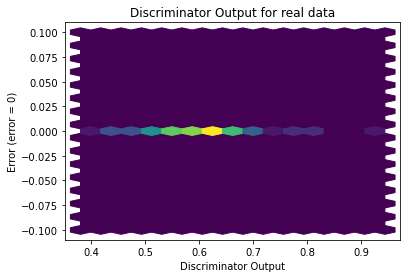

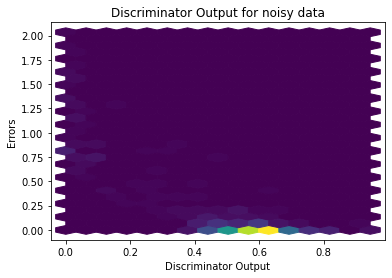

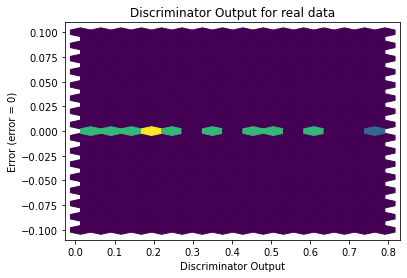

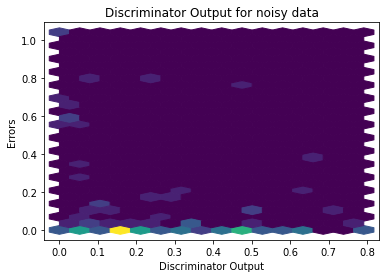

In [10]:
sanityChecks.discProbVsError(train_data,discriminator,device)
sanityChecks.discProbVsError(test_data,discriminator,device)